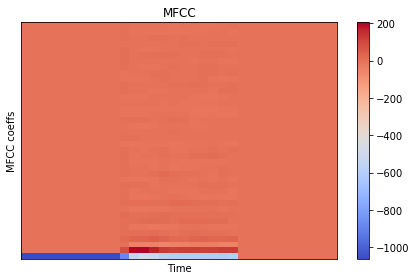

In [51]:
from python_speech_features import mfcc
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
from preprocess import *

mfcc_feat = wav2mfcc("./test/cat/ybtw2f3ue7jctgaltrwcd.wav")
librosa.display.specshow(mfcc_feat)
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC')
plt.colorbar()
plt.tight_layout()

In [53]:
import IPython.display as ipd
wave, sr = librosa.load("./test/cat/Recording-_3_.wav", mono=True, sr=None)
print(sr)
samples_cut = wave[4000:14000]
ipd.Audio(samples_cut, rate=sr)

44100


In [22]:
%load_ext autoreload
%autoreload 2

from preprocess import *
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras import metrics
import time

start_time = time.time() 

# Second dimension of the feature is dim2
feature_dim_2 =22

# Save data to array file first
save_data_to_array("./data1/",max_len=feature_dim_2)
#save_data_to_array("./test/",max_len=feature_dim_2)
# # Loading train set and test set
X_train, X_test, y_train, y_test = get_train_test()
#X_test,y_test = get_test()
# # Feature dimension
feature_dim_1 = 40
channel = 1
epochs = 30
batch_size = 30
verbose = 1
num_classes = 10

# Reshaping to perform 2D convolution
X_train = X_train.reshape(X_train.shape[0], feature_dim_1, feature_dim_2, channel)
X_test = X_test.reshape(X_test.shape[0], feature_dim_1, feature_dim_2, channel)

y_train_hot = to_categorical(y_train)
y_test_hot = to_categorical(y_test)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Saving vectors of label - 'happy': 100%|██████████████████████████████████████████| 1700/1700 [00:06<00:00, 254.06it/s]


In [66]:
print(y_train.shape)

(17554,)


# Building The Model Then Training it

# Test et Train accuracy

In [4]:
y_pred = model.predict(X_test)
#y_pred = (y_pred > 0.5)
y_pred=np.argmax(y_pred,axis=1)
y_pred1 = model.predict(X_train)
y_pred1=np.argmax(y_pred1,axis=1)

print(y_test)
print(y_pred)
print(history.history.keys())


[ 1.  1.  0.  0.  0.  1.  1.  1.  0.  2.  2.  1.  1.  1.  0.  2.  2.  0.
  2.  2.  2.  1.  0.  0.  2.  1.  1.  1.  1.  0.  0.  0.  1.  1.  2.  2.
  1.  1.  2.  0.  0.  0.  1.  0.  1.  1.  2.  2.  1.  1.  0.  0.  1.  0.
  1.  0.  1.  0.  0.  1.  0.  0.  1.  1.  0.  1.  0.  0.  1.  0.  1.  1.
  1.  1.  2.  0.  1.  2.  1.  1.  0.  1.  1.  1.  0.  2.  0.  0.  2.  0.
  1.  2.  1.  1.  1.  0.  0.  1.  1.  1.  0.  2.  2.  0.  2.  1.  1.  0.
  1.  0.  2.  0.  2.  1.  2.  0.  1.  1.  1.  1.  1.  0.  2.  1.  1.  0.
  2.  1.  0.  0.  0.  1.  1.  0.  1.  0.  0.  1.  0.  1.  0.  0.  0.  0.
  0.  1.  2.  1.  0.  0.  0.]
[1 1 1 1 0 1 1 1 0 2 2 0 1 1 1 2 2 0 2 2 2 0 0 0 2 1 1 1 1 0 0 1 0 0 2 2 1
 1 2 1 1 0 1 0 0 1 2 2 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 1 1 1
 2 1 1 2 0 0 0 1 0 1 0 2 1 0 2 0 1 2 1 1 0 0 1 1 1 1 0 2 2 0 2 1 1 0 1 0 2
 1 2 1 2 0 1 1 0 1 1 0 2 0 1 1 2 1 0 1 0 1 1 0 1 0 0 1 1 1 0 0 1 1 0 0 2 1
 1 1 0]
dict_keys(['val_loss', 'val_categorical_accuracy', 'categorical_accuracy', 'lo

In [5]:
def acc(y_true, y_pred):
    return np.equal(y_true,y_pred).mean()

print("Train accuracy: " + str(acc(y_train, y_pred1)))
print("Test accuracy : " + str(acc(y_test, y_pred))) 



Train accuracy: 1.0
Test accuracy : 0.761589403974


## Prediction

In [ ]:
from matplotlib import pyplot as plt
start_time=time.time()
model11 = get_model1()
history=model11.fit(X_train, y_train_hot, batch_size=batch_size, epochs=50, verbose=verbose, validation_data=(X_test, y_test_hot))
plt.plot(history.history['val_categorical_accuracy'])
print(time.time() -start_time)

In [ ]:
y_pred1 = model.predict(X_test)
#y_pred = (y_pred > 0.5)
y_pred1=np.argmax(y_pred1,axis=1)
y_pred2= model11.predict(X_train)
y_pred2=np.argmax(y_pred2,axis=1)

In [ ]:
def acc(y_true, y_pred):
    return np.equal(y_true,y_pred).mean()

print("Train accuracy: " + str(acc(y_train, y_pred2)))
print("Test accuracy : " + str(acc(y_test, y_pred1))) 

******************************************************************************************

In [23]:
sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
def get_model3():
    model3 = Sequential()
    model3.add(Conv2D(16, kernel_size=(2, 2),padding='same', input_shape=(feature_dim_1, feature_dim_2, channel), activation='relu'))
    model3.add(Conv2D(16, kernel_size=(2, 2),padding='same', activation='relu'))
    model3.add(MaxPooling2D(pool_size=(2, 2)))
    model3.add(Conv2D(32, kernel_size=(2, 2),padding='same', activation='relu'))
    model3.add(Conv2D(32, kernel_size=(2, 2),padding='same', activation='relu'))
    model3.add(MaxPooling2D(pool_size=(2, 2)))
    model3.add(Conv2D(64, kernel_size=(2, 2),padding='same', activation='relu'))
    model3.add(Conv2D(64, kernel_size=(2, 2),padding='same', activation='relu'))
    model3.add(MaxPooling2D(pool_size=(2,2)))
    model3.add(Flatten())
    model3.add(Dense(128, activation='relu'))
    model3.add(Dense(10, activation='softmax'))
    model3.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(lr=0.01),
                  metrics=[metrics.categorical_accuracy])
    return model3


Train on 13600 samples, validate on 3400 samples
Epoch 1/20


 5290/13600 [==========>...................] - ETA: 32s - loss: 1.1413 - categorical_accuracy: 0.500 - ETA: 28s - loss: 0.7269 - categorical_accuracy: 0.750 - ETA: 28s - loss: 0.7973 - categorical_accuracy: 0.714 - ETA: 24s - loss: 0.8590 - categorical_accuracy: 0.681 - ETA: 23s - loss: 0.8565 - categorical_accuracy: 0.693 - ETA: 22s - loss: 0.8510 - categorical_accuracy: 0.710 - ETA: 22s - loss: 0.9710 - categorical_accuracy: 0.678 - ETA: 21s - loss: 0.9533 - categorical_accuracy: 0.681 - ETA: 21s - loss: 0.9475 - categorical_accuracy: 0.683 - ETA: 21s - loss: 0.9648 - categorical_accuracy: 0.680 - ETA: 21s - loss: 0.9669 - categorical_accuracy: 0.674 - ETA: 20s - loss: 0.9668 - categorical_accuracy: 0.674 - ETA: 20s - loss: 0.9629 - categorical_accuracy: 0.678 - ETA: 20s - loss: 0.9557 - categorical_accuracy: 0.684 - ETA: 20s - loss: 0.9662 - categorical_accuracy: 0.681 - ETA: 20s - loss: 0.9521 - categorical_accuracy: 0.686 - ETA: 20s - loss: 0.9832 - categorical_accuracy: 0.682 - E

10920/13600 [=======================>......] - ETA: 13s - loss: 0.9403 - categorical_accuracy: 0.682 - ETA: 12s - loss: 0.9393 - categorical_accuracy: 0.682 - ETA: 12s - loss: 0.9378 - categorical_accuracy: 0.683 - ETA: 12s - loss: 0.9360 - categorical_accuracy: 0.683 - ETA: 12s - loss: 0.9346 - categorical_accuracy: 0.683 - ETA: 12s - loss: 0.9334 - categorical_accuracy: 0.684 - ETA: 12s - loss: 0.9326 - categorical_accuracy: 0.684 - ETA: 12s - loss: 0.9319 - categorical_accuracy: 0.684 - ETA: 12s - loss: 0.9325 - categorical_accuracy: 0.684 - ETA: 12s - loss: 0.9334 - categorical_accuracy: 0.684 - ETA: 12s - loss: 0.9324 - categorical_accuracy: 0.684 - ETA: 12s - loss: 0.9331 - categorical_accuracy: 0.684 - ETA: 12s - loss: 0.9326 - categorical_accuracy: 0.683 - ETA: 12s - loss: 0.9315 - categorical_accuracy: 0.684 - ETA: 12s - loss: 0.9307 - categorical_accuracy: 0.684 - ETA: 12s - loss: 0.9319 - categorical_accuracy: 0.684 - ETA: 12s - loss: 0.9333 - categorical_accuracy: 0.683 - E

13600/13600 [==============================] - ETA: 4s - loss: 0.9289 - categorical_accuracy: 0.68 - ETA: 4s - loss: 0.9292 - categorical_accuracy: 0.68 - ETA: 3s - loss: 0.9299 - categorical_accuracy: 0.69 - ETA: 3s - loss: 0.9297 - categorical_accuracy: 0.68 - ETA: 3s - loss: 0.9297 - categorical_accuracy: 0.68 - ETA: 3s - loss: 0.9297 - categorical_accuracy: 0.68 - ETA: 3s - loss: 0.9295 - categorical_accuracy: 0.68 - ETA: 3s - loss: 0.9289 - categorical_accuracy: 0.68 - ETA: 3s - loss: 0.9276 - categorical_accuracy: 0.69 - ETA: 3s - loss: 0.9272 - categorical_accuracy: 0.69 - ETA: 3s - loss: 0.9269 - categorical_accuracy: 0.69 - ETA: 3s - loss: 0.9273 - categorical_accuracy: 0.69 - ETA: 3s - loss: 0.9273 - categorical_accuracy: 0.69 - ETA: 3s - loss: 0.9279 - categorical_accuracy: 0.68 - ETA: 3s - loss: 0.9282 - categorical_accuracy: 0.68 - ETA: 3s - loss: 0.9291 - categorical_accuracy: 0.68 - ETA: 3s - loss: 0.9291 - categorical_accuracy: 0.68 - ETA: 3s - loss: 0.9295 - categorica

 5440/13600 [===========>..................] - ETA: 23s - loss: 0.5897 - categorical_accuracy: 0.800 - ETA: 46s - loss: 1.0715 - categorical_accuracy: 0.566 - ETA: 41s - loss: 1.1030 - categorical_accuracy: 0.600 - ETA: 35s - loss: 1.0217 - categorical_accuracy: 0.637 - ETA: 30s - loss: 0.9620 - categorical_accuracy: 0.641 - ETA: 27s - loss: 0.9336 - categorical_accuracy: 0.637 - ETA: 26s - loss: 0.8955 - categorical_accuracy: 0.660 - ETA: 24s - loss: 0.8838 - categorical_accuracy: 0.670 - ETA: 23s - loss: 0.8856 - categorical_accuracy: 0.678 - ETA: 23s - loss: 0.8627 - categorical_accuracy: 0.687 - ETA: 22s - loss: 0.8528 - categorical_accuracy: 0.688 - ETA: 22s - loss: 0.8598 - categorical_accuracy: 0.687 - ETA: 21s - loss: 0.8602 - categorical_accuracy: 0.684 - ETA: 21s - loss: 0.8634 - categorical_accuracy: 0.679 - ETA: 21s - loss: 0.8592 - categorical_accuracy: 0.686 - ETA: 20s - loss: 0.8798 - categorical_accuracy: 0.685 - ETA: 20s - loss: 0.8887 - categorical_accuracy: 0.680 - E

11130/13600 [=======================>......] - ETA: 12s - loss: 0.8965 - categorical_accuracy: 0.698 - ETA: 12s - loss: 0.8946 - categorical_accuracy: 0.699 - ETA: 12s - loss: 0.8936 - categorical_accuracy: 0.699 - ETA: 12s - loss: 0.8961 - categorical_accuracy: 0.699 - ETA: 12s - loss: 0.8976 - categorical_accuracy: 0.698 - ETA: 12s - loss: 0.9003 - categorical_accuracy: 0.697 - ETA: 12s - loss: 0.9012 - categorical_accuracy: 0.697 - ETA: 12s - loss: 0.8996 - categorical_accuracy: 0.698 - ETA: 12s - loss: 0.8986 - categorical_accuracy: 0.698 - ETA: 12s - loss: 0.9017 - categorical_accuracy: 0.698 - ETA: 11s - loss: 0.9001 - categorical_accuracy: 0.698 - ETA: 11s - loss: 0.9006 - categorical_accuracy: 0.698 - ETA: 11s - loss: 0.8984 - categorical_accuracy: 0.699 - ETA: 11s - loss: 0.8981 - categorical_accuracy: 0.699 - ETA: 11s - loss: 0.8994 - categorical_accuracy: 0.699 - ETA: 11s - loss: 0.8983 - categorical_accuracy: 0.699 - ETA: 11s - loss: 0.8974 - categorical_accuracy: 0.700 - E

13600/13600 [==============================] - ETA: 3s - loss: 0.9165 - categorical_accuracy: 0.69 - ETA: 3s - loss: 0.9156 - categorical_accuracy: 0.69 - ETA: 3s - loss: 0.9159 - categorical_accuracy: 0.69 - ETA: 3s - loss: 0.9166 - categorical_accuracy: 0.69 - ETA: 3s - loss: 0.9164 - categorical_accuracy: 0.69 - ETA: 3s - loss: 0.9156 - categorical_accuracy: 0.69 - ETA: 3s - loss: 0.9160 - categorical_accuracy: 0.69 - ETA: 3s - loss: 0.9158 - categorical_accuracy: 0.69 - ETA: 3s - loss: 0.9167 - categorical_accuracy: 0.69 - ETA: 3s - loss: 0.9162 - categorical_accuracy: 0.69 - ETA: 3s - loss: 0.9160 - categorical_accuracy: 0.69 - ETA: 3s - loss: 0.9163 - categorical_accuracy: 0.69 - ETA: 3s - loss: 0.9168 - categorical_accuracy: 0.69 - ETA: 2s - loss: 0.9180 - categorical_accuracy: 0.69 - ETA: 2s - loss: 0.9181 - categorical_accuracy: 0.69 - ETA: 2s - loss: 0.9184 - categorical_accuracy: 0.69 - ETA: 2s - loss: 0.9190 - categorical_accuracy: 0.69 - ETA: 2s - loss: 0.9183 - categorica

 5470/13600 [===========>..................] - ETA: 28s - loss: 0.9030 - categorical_accuracy: 0.800 - ETA: 27s - loss: 0.8827 - categorical_accuracy: 0.750 - ETA: 25s - loss: 0.9406 - categorical_accuracy: 0.712 - ETA: 25s - loss: 0.8543 - categorical_accuracy: 0.754 - ETA: 23s - loss: 0.8620 - categorical_accuracy: 0.766 - ETA: 22s - loss: 0.8562 - categorical_accuracy: 0.757 - ETA: 22s - loss: 0.8747 - categorical_accuracy: 0.730 - ETA: 22s - loss: 0.8995 - categorical_accuracy: 0.718 - ETA: 21s - loss: 0.8985 - categorical_accuracy: 0.712 - ETA: 21s - loss: 0.8802 - categorical_accuracy: 0.717 - ETA: 21s - loss: 0.8913 - categorical_accuracy: 0.710 - ETA: 20s - loss: 0.8898 - categorical_accuracy: 0.707 - ETA: 20s - loss: 0.8932 - categorical_accuracy: 0.706 - ETA: 20s - loss: 0.8766 - categorical_accuracy: 0.719 - ETA: 20s - loss: 0.8782 - categorical_accuracy: 0.720 - ETA: 19s - loss: 0.8830 - categorical_accuracy: 0.718 - ETA: 19s - loss: 0.8959 - categorical_accuracy: 0.709 - E

11280/13600 [=======================>......] - ETA: 12s - loss: 0.8872 - categorical_accuracy: 0.706 - ETA: 12s - loss: 0.8859 - categorical_accuracy: 0.707 - ETA: 12s - loss: 0.8852 - categorical_accuracy: 0.707 - ETA: 12s - loss: 0.8837 - categorical_accuracy: 0.708 - ETA: 12s - loss: 0.8840 - categorical_accuracy: 0.708 - ETA: 12s - loss: 0.8841 - categorical_accuracy: 0.707 - ETA: 12s - loss: 0.8832 - categorical_accuracy: 0.707 - ETA: 12s - loss: 0.8827 - categorical_accuracy: 0.707 - ETA: 12s - loss: 0.8833 - categorical_accuracy: 0.707 - ETA: 11s - loss: 0.8834 - categorical_accuracy: 0.706 - ETA: 11s - loss: 0.8848 - categorical_accuracy: 0.706 - ETA: 11s - loss: 0.8858 - categorical_accuracy: 0.706 - ETA: 11s - loss: 0.8868 - categorical_accuracy: 0.706 - ETA: 11s - loss: 0.8868 - categorical_accuracy: 0.707 - ETA: 11s - loss: 0.8858 - categorical_accuracy: 0.707 - ETA: 11s - loss: 0.8856 - categorical_accuracy: 0.707 - ETA: 11s - loss: 0.8846 - categorical_accuracy: 0.708 - E

13600/13600 [==============================] - ETA: 3s - loss: 0.8990 - categorical_accuracy: 0.70 - ETA: 3s - loss: 0.8985 - categorical_accuracy: 0.70 - ETA: 3s - loss: 0.8994 - categorical_accuracy: 0.70 - ETA: 3s - loss: 0.8984 - categorical_accuracy: 0.70 - ETA: 3s - loss: 0.8991 - categorical_accuracy: 0.70 - ETA: 3s - loss: 0.9002 - categorical_accuracy: 0.70 - ETA: 3s - loss: 0.9004 - categorical_accuracy: 0.70 - ETA: 3s - loss: 0.9004 - categorical_accuracy: 0.70 - ETA: 2s - loss: 0.9005 - categorical_accuracy: 0.70 - ETA: 2s - loss: 0.9002 - categorical_accuracy: 0.70 - ETA: 2s - loss: 0.8995 - categorical_accuracy: 0.70 - ETA: 2s - loss: 0.8995 - categorical_accuracy: 0.70 - ETA: 2s - loss: 0.8997 - categorical_accuracy: 0.70 - ETA: 2s - loss: 0.8994 - categorical_accuracy: 0.70 - ETA: 2s - loss: 0.8993 - categorical_accuracy: 0.70 - ETA: 2s - loss: 0.8993 - categorical_accuracy: 0.70 - ETA: 2s - loss: 0.9010 - categorical_accuracy: 0.70 - ETA: 2s - loss: 0.9010 - categorica

 5340/13600 [==========>...................] - ETA: 20s - loss: 1.4220 - categorical_accuracy: 0.600 - ETA: 18s - loss: 0.9206 - categorical_accuracy: 0.740 - ETA: 19s - loss: 0.9662 - categorical_accuracy: 0.733 - ETA: 18s - loss: 0.9026 - categorical_accuracy: 0.730 - ETA: 18s - loss: 0.8952 - categorical_accuracy: 0.723 - ETA: 18s - loss: 0.9055 - categorical_accuracy: 0.709 - ETA: 18s - loss: 0.8615 - categorical_accuracy: 0.724 - ETA: 18s - loss: 0.8541 - categorical_accuracy: 0.731 - ETA: 18s - loss: 0.8316 - categorical_accuracy: 0.736 - ETA: 18s - loss: 0.8202 - categorical_accuracy: 0.737 - ETA: 18s - loss: 0.8343 - categorical_accuracy: 0.734 - ETA: 18s - loss: 0.8610 - categorical_accuracy: 0.728 - ETA: 18s - loss: 0.8641 - categorical_accuracy: 0.725 - ETA: 19s - loss: 0.8792 - categorical_accuracy: 0.725 - ETA: 18s - loss: 0.8600 - categorical_accuracy: 0.730 - ETA: 18s - loss: 0.8550 - categorical_accuracy: 0.732 - ETA: 18s - loss: 0.8553 - categorical_accuracy: 0.730 - E

11250/13600 [=======================>......] - ETA: 12s - loss: 0.8931 - categorical_accuracy: 0.707 - ETA: 12s - loss: 0.8915 - categorical_accuracy: 0.707 - ETA: 12s - loss: 0.8903 - categorical_accuracy: 0.707 - ETA: 12s - loss: 0.8888 - categorical_accuracy: 0.708 - ETA: 12s - loss: 0.8887 - categorical_accuracy: 0.708 - ETA: 12s - loss: 0.8875 - categorical_accuracy: 0.708 - ETA: 12s - loss: 0.8859 - categorical_accuracy: 0.708 - ETA: 12s - loss: 0.8846 - categorical_accuracy: 0.708 - ETA: 12s - loss: 0.8830 - categorical_accuracy: 0.709 - ETA: 12s - loss: 0.8839 - categorical_accuracy: 0.708 - ETA: 12s - loss: 0.8848 - categorical_accuracy: 0.708 - ETA: 12s - loss: 0.8829 - categorical_accuracy: 0.709 - ETA: 12s - loss: 0.8825 - categorical_accuracy: 0.709 - ETA: 12s - loss: 0.8813 - categorical_accuracy: 0.710 - ETA: 11s - loss: 0.8823 - categorical_accuracy: 0.710 - ETA: 11s - loss: 0.8860 - categorical_accuracy: 0.709 - ETA: 11s - loss: 0.8860 - categorical_accuracy: 0.708 - E

13600/13600 [==============================] - ETA: 3s - loss: 0.8824 - categorical_accuracy: 0.71 - ETA: 3s - loss: 0.8833 - categorical_accuracy: 0.71 - ETA: 3s - loss: 0.8831 - categorical_accuracy: 0.71 - ETA: 3s - loss: 0.8827 - categorical_accuracy: 0.71 - ETA: 3s - loss: 0.8826 - categorical_accuracy: 0.71 - ETA: 3s - loss: 0.8825 - categorical_accuracy: 0.71 - ETA: 3s - loss: 0.8826 - categorical_accuracy: 0.71 - ETA: 3s - loss: 0.8822 - categorical_accuracy: 0.71 - ETA: 2s - loss: 0.8830 - categorical_accuracy: 0.71 - ETA: 2s - loss: 0.8821 - categorical_accuracy: 0.71 - ETA: 2s - loss: 0.8818 - categorical_accuracy: 0.71 - ETA: 2s - loss: 0.8817 - categorical_accuracy: 0.71 - ETA: 2s - loss: 0.8817 - categorical_accuracy: 0.71 - ETA: 2s - loss: 0.8810 - categorical_accuracy: 0.71 - ETA: 2s - loss: 0.8808 - categorical_accuracy: 0.71 - ETA: 2s - loss: 0.8804 - categorical_accuracy: 0.71 - ETA: 2s - loss: 0.8804 - categorical_accuracy: 0.71 - ETA: 2s - loss: 0.8808 - categorica

 5600/13600 [===========>..................] - ETA: 25s - loss: 0.8340 - categorical_accuracy: 0.800 - ETA: 21s - loss: 1.1091 - categorical_accuracy: 0.640 - ETA: 20s - loss: 0.9344 - categorical_accuracy: 0.700 - ETA: 20s - loss: 0.9168 - categorical_accuracy: 0.700 - ETA: 19s - loss: 0.9496 - categorical_accuracy: 0.664 - ETA: 19s - loss: 0.9550 - categorical_accuracy: 0.661 - ETA: 19s - loss: 1.0450 - categorical_accuracy: 0.632 - ETA: 19s - loss: 1.0237 - categorical_accuracy: 0.637 - ETA: 19s - loss: 1.0418 - categorical_accuracy: 0.636 - ETA: 19s - loss: 1.0353 - categorical_accuracy: 0.632 - ETA: 19s - loss: 1.0362 - categorical_accuracy: 0.634 - ETA: 18s - loss: 1.0070 - categorical_accuracy: 0.644 - ETA: 18s - loss: 0.9844 - categorical_accuracy: 0.657 - ETA: 18s - loss: 0.9782 - categorical_accuracy: 0.658 - ETA: 18s - loss: 0.9588 - categorical_accuracy: 0.670 - ETA: 18s - loss: 0.9379 - categorical_accuracy: 0.677 - ETA: 18s - loss: 0.9697 - categorical_accuracy: 0.667 - E

11430/13600 [========================>.....] - ETA: 11s - loss: 0.8732 - categorical_accuracy: 0.708 - ETA: 11s - loss: 0.8709 - categorical_accuracy: 0.709 - ETA: 11s - loss: 0.8721 - categorical_accuracy: 0.709 - ETA: 11s - loss: 0.8718 - categorical_accuracy: 0.709 - ETA: 11s - loss: 0.8714 - categorical_accuracy: 0.710 - ETA: 11s - loss: 0.8725 - categorical_accuracy: 0.709 - ETA: 11s - loss: 0.8731 - categorical_accuracy: 0.708 - ETA: 11s - loss: 0.8729 - categorical_accuracy: 0.708 - ETA: 11s - loss: 0.8714 - categorical_accuracy: 0.708 - ETA: 11s - loss: 0.8724 - categorical_accuracy: 0.708 - ETA: 11s - loss: 0.8715 - categorical_accuracy: 0.708 - ETA: 11s - loss: 0.8711 - categorical_accuracy: 0.708 - ETA: 10s - loss: 0.8711 - categorical_accuracy: 0.708 - ETA: 10s - loss: 0.8705 - categorical_accuracy: 0.709 - ETA: 10s - loss: 0.8706 - categorical_accuracy: 0.709 - ETA: 10s - loss: 0.8726 - categorical_accuracy: 0.708 - ETA: 10s - loss: 0.8716 - categorical_accuracy: 0.709 - E

13600/13600 [==============================] - ETA: 3s - loss: 0.8736 - categorical_accuracy: 0.71 - ETA: 3s - loss: 0.8730 - categorical_accuracy: 0.71 - ETA: 3s - loss: 0.8733 - categorical_accuracy: 0.71 - ETA: 2s - loss: 0.8729 - categorical_accuracy: 0.70 - ETA: 2s - loss: 0.8727 - categorical_accuracy: 0.71 - ETA: 2s - loss: 0.8721 - categorical_accuracy: 0.71 - ETA: 2s - loss: 0.8723 - categorical_accuracy: 0.71 - ETA: 2s - loss: 0.8724 - categorical_accuracy: 0.71 - ETA: 2s - loss: 0.8719 - categorical_accuracy: 0.71 - ETA: 2s - loss: 0.8722 - categorical_accuracy: 0.71 - ETA: 2s - loss: 0.8723 - categorical_accuracy: 0.71 - ETA: 2s - loss: 0.8717 - categorical_accuracy: 0.71 - ETA: 2s - loss: 0.8720 - categorical_accuracy: 0.71 - ETA: 2s - loss: 0.8720 - categorical_accuracy: 0.71 - ETA: 2s - loss: 0.8726 - categorical_accuracy: 0.71 - ETA: 2s - loss: 0.8718 - categorical_accuracy: 0.71 - ETA: 2s - loss: 0.8710 - categorical_accuracy: 0.71 - ETA: 2s - loss: 0.8710 - categorica

 5510/13600 [===========>..................] - ETA: 20s - loss: 0.7755 - categorical_accuracy: 0.700 - ETA: 25s - loss: 0.8695 - categorical_accuracy: 0.675 - ETA: 24s - loss: 0.8012 - categorical_accuracy: 0.714 - ETA: 24s - loss: 0.7903 - categorical_accuracy: 0.720 - ETA: 22s - loss: 0.8027 - categorical_accuracy: 0.750 - ETA: 22s - loss: 0.8029 - categorical_accuracy: 0.766 - ETA: 21s - loss: 0.7620 - categorical_accuracy: 0.786 - ETA: 21s - loss: 0.7926 - categorical_accuracy: 0.765 - ETA: 21s - loss: 0.8410 - categorical_accuracy: 0.753 - ETA: 21s - loss: 0.8286 - categorical_accuracy: 0.754 - ETA: 21s - loss: 0.8480 - categorical_accuracy: 0.747 - ETA: 21s - loss: 0.8644 - categorical_accuracy: 0.737 - ETA: 21s - loss: 0.8588 - categorical_accuracy: 0.736 - ETA: 20s - loss: 0.8447 - categorical_accuracy: 0.743 - ETA: 20s - loss: 0.8452 - categorical_accuracy: 0.736 - ETA: 20s - loss: 0.8398 - categorical_accuracy: 0.737 - ETA: 20s - loss: 0.8556 - categorical_accuracy: 0.735 - E

11430/13600 [========================>.....] - ETA: 12s - loss: 0.8621 - categorical_accuracy: 0.715 - ETA: 12s - loss: 0.8607 - categorical_accuracy: 0.715 - ETA: 11s - loss: 0.8605 - categorical_accuracy: 0.715 - ETA: 11s - loss: 0.8608 - categorical_accuracy: 0.715 - ETA: 11s - loss: 0.8599 - categorical_accuracy: 0.715 - ETA: 11s - loss: 0.8609 - categorical_accuracy: 0.715 - ETA: 11s - loss: 0.8607 - categorical_accuracy: 0.715 - ETA: 11s - loss: 0.8595 - categorical_accuracy: 0.715 - ETA: 11s - loss: 0.8592 - categorical_accuracy: 0.715 - ETA: 11s - loss: 0.8570 - categorical_accuracy: 0.716 - ETA: 11s - loss: 0.8569 - categorical_accuracy: 0.717 - ETA: 11s - loss: 0.8565 - categorical_accuracy: 0.717 - ETA: 11s - loss: 0.8570 - categorical_accuracy: 0.716 - ETA: 11s - loss: 0.8571 - categorical_accuracy: 0.715 - ETA: 11s - loss: 0.8560 - categorical_accuracy: 0.716 - ETA: 11s - loss: 0.8554 - categorical_accuracy: 0.716 - ETA: 11s - loss: 0.8554 - categorical_accuracy: 0.716 - E

13600/13600 [==============================] - ETA: 3s - loss: 0.8624 - categorical_accuracy: 0.71 - ETA: 3s - loss: 0.8627 - categorical_accuracy: 0.71 - ETA: 2s - loss: 0.8625 - categorical_accuracy: 0.71 - ETA: 2s - loss: 0.8624 - categorical_accuracy: 0.71 - ETA: 2s - loss: 0.8627 - categorical_accuracy: 0.71 - ETA: 2s - loss: 0.8628 - categorical_accuracy: 0.71 - ETA: 2s - loss: 0.8629 - categorical_accuracy: 0.71 - ETA: 2s - loss: 0.8631 - categorical_accuracy: 0.71 - ETA: 2s - loss: 0.8625 - categorical_accuracy: 0.71 - ETA: 2s - loss: 0.8626 - categorical_accuracy: 0.71 - ETA: 2s - loss: 0.8622 - categorical_accuracy: 0.71 - ETA: 2s - loss: 0.8625 - categorical_accuracy: 0.71 - ETA: 2s - loss: 0.8625 - categorical_accuracy: 0.71 - ETA: 2s - loss: 0.8626 - categorical_accuracy: 0.71 - ETA: 2s - loss: 0.8631 - categorical_accuracy: 0.71 - ETA: 2s - loss: 0.8630 - categorical_accuracy: 0.71 - ETA: 2s - loss: 0.8631 - categorical_accuracy: 0.71 - ETA: 2s - loss: 0.8632 - categorica

 5190/13600 [==========>...................] - ETA: 24s - loss: 0.9014 - categorical_accuracy: 0.600 - ETA: 23s - loss: 0.9571 - categorical_accuracy: 0.725 - ETA: 21s - loss: 0.9274 - categorical_accuracy: 0.750 - ETA: 20s - loss: 0.9868 - categorical_accuracy: 0.733 - ETA: 20s - loss: 0.9634 - categorical_accuracy: 0.718 - ETA: 19s - loss: 0.9618 - categorical_accuracy: 0.710 - ETA: 20s - loss: 0.9554 - categorical_accuracy: 0.713 - ETA: 20s - loss: 0.9352 - categorical_accuracy: 0.707 - ETA: 20s - loss: 0.9500 - categorical_accuracy: 0.703 - ETA: 20s - loss: 0.9312 - categorical_accuracy: 0.714 - ETA: 19s - loss: 0.9434 - categorical_accuracy: 0.705 - ETA: 19s - loss: 0.9395 - categorical_accuracy: 0.704 - ETA: 19s - loss: 0.9663 - categorical_accuracy: 0.689 - ETA: 19s - loss: 0.9291 - categorical_accuracy: 0.702 - ETA: 19s - loss: 0.9142 - categorical_accuracy: 0.703 - ETA: 19s - loss: 0.9030 - categorical_accuracy: 0.706 - ETA: 19s - loss: 0.9103 - categorical_accuracy: 0.711 - E

10710/13600 [======================>.......] - ETA: 13s - loss: 0.8584 - categorical_accuracy: 0.716 - ETA: 13s - loss: 0.8601 - categorical_accuracy: 0.715 - ETA: 13s - loss: 0.8602 - categorical_accuracy: 0.715 - ETA: 13s - loss: 0.8610 - categorical_accuracy: 0.715 - ETA: 13s - loss: 0.8621 - categorical_accuracy: 0.714 - ETA: 13s - loss: 0.8618 - categorical_accuracy: 0.714 - ETA: 13s - loss: 0.8590 - categorical_accuracy: 0.716 - ETA: 13s - loss: 0.8600 - categorical_accuracy: 0.715 - ETA: 12s - loss: 0.8595 - categorical_accuracy: 0.715 - ETA: 12s - loss: 0.8586 - categorical_accuracy: 0.715 - ETA: 12s - loss: 0.8604 - categorical_accuracy: 0.715 - ETA: 12s - loss: 0.8612 - categorical_accuracy: 0.715 - ETA: 12s - loss: 0.8615 - categorical_accuracy: 0.715 - ETA: 12s - loss: 0.8613 - categorical_accuracy: 0.715 - ETA: 12s - loss: 0.8607 - categorical_accuracy: 0.715 - ETA: 12s - loss: 0.8656 - categorical_accuracy: 0.714 - ETA: 12s - loss: 0.8646 - categorical_accuracy: 0.714 - E

13600/13600 [==============================] - ETA: 4s - loss: 0.8493 - categorical_accuracy: 0.71 - ETA: 4s - loss: 0.8492 - categorical_accuracy: 0.71 - ETA: 4s - loss: 0.8485 - categorical_accuracy: 0.71 - ETA: 4s - loss: 0.8481 - categorical_accuracy: 0.71 - ETA: 4s - loss: 0.8471 - categorical_accuracy: 0.71 - ETA: 4s - loss: 0.8461 - categorical_accuracy: 0.71 - ETA: 4s - loss: 0.8466 - categorical_accuracy: 0.71 - ETA: 4s - loss: 0.8462 - categorical_accuracy: 0.71 - ETA: 3s - loss: 0.8460 - categorical_accuracy: 0.71 - ETA: 3s - loss: 0.8464 - categorical_accuracy: 0.71 - ETA: 3s - loss: 0.8459 - categorical_accuracy: 0.71 - ETA: 3s - loss: 0.8455 - categorical_accuracy: 0.71 - ETA: 3s - loss: 0.8462 - categorical_accuracy: 0.71 - ETA: 3s - loss: 0.8465 - categorical_accuracy: 0.71 - ETA: 3s - loss: 0.8461 - categorical_accuracy: 0.71 - ETA: 3s - loss: 0.8465 - categorical_accuracy: 0.71 - ETA: 3s - loss: 0.8471 - categorical_accuracy: 0.71 - ETA: 3s - loss: 0.8476 - categorica

 5680/13600 [===========>..................] - ETA: 20s - loss: 1.0123 - categorical_accuracy: 0.700 - ETA: 19s - loss: 0.8245 - categorical_accuracy: 0.700 - ETA: 19s - loss: 0.8707 - categorical_accuracy: 0.711 - ETA: 19s - loss: 0.7850 - categorical_accuracy: 0.738 - ETA: 19s - loss: 0.7913 - categorical_accuracy: 0.747 - ETA: 18s - loss: 0.7839 - categorical_accuracy: 0.757 - ETA: 18s - loss: 0.7519 - categorical_accuracy: 0.764 - ETA: 18s - loss: 0.7342 - categorical_accuracy: 0.765 - ETA: 18s - loss: 0.7567 - categorical_accuracy: 0.760 - ETA: 18s - loss: 0.7687 - categorical_accuracy: 0.758 - ETA: 19s - loss: 0.7687 - categorical_accuracy: 0.755 - ETA: 18s - loss: 0.7762 - categorical_accuracy: 0.752 - ETA: 18s - loss: 0.7795 - categorical_accuracy: 0.750 - ETA: 18s - loss: 0.7700 - categorical_accuracy: 0.755 - ETA: 18s - loss: 0.8006 - categorical_accuracy: 0.744 - ETA: 18s - loss: 0.8037 - categorical_accuracy: 0.745 - ETA: 18s - loss: 0.7867 - categorical_accuracy: 0.748 - E

11490/13600 [========================>.....] - ETA: 11s - loss: 0.8211 - categorical_accuracy: 0.733 - ETA: 11s - loss: 0.8217 - categorical_accuracy: 0.733 - ETA: 11s - loss: 0.8221 - categorical_accuracy: 0.733 - ETA: 11s - loss: 0.8206 - categorical_accuracy: 0.733 - ETA: 11s - loss: 0.8190 - categorical_accuracy: 0.733 - ETA: 11s - loss: 0.8181 - categorical_accuracy: 0.733 - ETA: 11s - loss: 0.8172 - categorical_accuracy: 0.734 - ETA: 11s - loss: 0.8175 - categorical_accuracy: 0.733 - ETA: 10s - loss: 0.8186 - categorical_accuracy: 0.733 - ETA: 10s - loss: 0.8171 - categorical_accuracy: 0.733 - ETA: 10s - loss: 0.8156 - categorical_accuracy: 0.734 - ETA: 10s - loss: 0.8141 - categorical_accuracy: 0.734 - ETA: 10s - loss: 0.8129 - categorical_accuracy: 0.735 - ETA: 10s - loss: 0.8128 - categorical_accuracy: 0.734 - ETA: 10s - loss: 0.8137 - categorical_accuracy: 0.734 - ETA: 10s - loss: 0.8131 - categorical_accuracy: 0.733 - ETA: 10s - loss: 0.8116 - categorical_accuracy: 0.734 - E

13600/13600 [==============================] - ETA: 3s - loss: 0.8266 - categorical_accuracy: 0.72 - ETA: 2s - loss: 0.8263 - categorical_accuracy: 0.72 - ETA: 2s - loss: 0.8264 - categorical_accuracy: 0.72 - ETA: 2s - loss: 0.8266 - categorical_accuracy: 0.72 - ETA: 2s - loss: 0.8275 - categorical_accuracy: 0.72 - ETA: 2s - loss: 0.8277 - categorical_accuracy: 0.72 - ETA: 2s - loss: 0.8292 - categorical_accuracy: 0.72 - ETA: 2s - loss: 0.8297 - categorical_accuracy: 0.72 - ETA: 2s - loss: 0.8300 - categorical_accuracy: 0.72 - ETA: 2s - loss: 0.8310 - categorical_accuracy: 0.72 - ETA: 2s - loss: 0.8320 - categorical_accuracy: 0.72 - ETA: 2s - loss: 0.8320 - categorical_accuracy: 0.72 - ETA: 2s - loss: 0.8326 - categorical_accuracy: 0.72 - ETA: 2s - loss: 0.8320 - categorical_accuracy: 0.72 - ETA: 2s - loss: 0.8332 - categorical_accuracy: 0.72 - ETA: 2s - loss: 0.8329 - categorical_accuracy: 0.72 - ETA: 2s - loss: 0.8335 - categorical_accuracy: 0.72 - ETA: 2s - loss: 0.8333 - categorica

 5610/13600 [===========>..................] - ETA: 20s - loss: 1.0514 - categorical_accuracy: 0.600 - ETA: 20s - loss: 0.8764 - categorical_accuracy: 0.720 - ETA: 20s - loss: 0.7933 - categorical_accuracy: 0.733 - ETA: 20s - loss: 0.7629 - categorical_accuracy: 0.761 - ETA: 20s - loss: 0.7815 - categorical_accuracy: 0.741 - ETA: 20s - loss: 0.7369 - categorical_accuracy: 0.757 - ETA: 19s - loss: 0.8047 - categorical_accuracy: 0.740 - ETA: 19s - loss: 0.8057 - categorical_accuracy: 0.737 - ETA: 19s - loss: 0.8397 - categorical_accuracy: 0.721 - ETA: 19s - loss: 0.8125 - categorical_accuracy: 0.727 - ETA: 19s - loss: 0.8043 - categorical_accuracy: 0.729 - ETA: 19s - loss: 0.8066 - categorical_accuracy: 0.724 - ETA: 19s - loss: 0.7995 - categorical_accuracy: 0.728 - ETA: 18s - loss: 0.8074 - categorical_accuracy: 0.726 - ETA: 18s - loss: 0.8157 - categorical_accuracy: 0.728 - ETA: 18s - loss: 0.8298 - categorical_accuracy: 0.727 - ETA: 18s - loss: 0.8413 - categorical_accuracy: 0.724 - E

11480/13600 [========================>.....] - ETA: 11s - loss: 0.8138 - categorical_accuracy: 0.727 - ETA: 11s - loss: 0.8121 - categorical_accuracy: 0.727 - ETA: 11s - loss: 0.8120 - categorical_accuracy: 0.728 - ETA: 11s - loss: 0.8133 - categorical_accuracy: 0.727 - ETA: 11s - loss: 0.8135 - categorical_accuracy: 0.727 - ETA: 11s - loss: 0.8156 - categorical_accuracy: 0.726 - ETA: 11s - loss: 0.8140 - categorical_accuracy: 0.727 - ETA: 11s - loss: 0.8157 - categorical_accuracy: 0.727 - ETA: 11s - loss: 0.8181 - categorical_accuracy: 0.727 - ETA: 11s - loss: 0.8176 - categorical_accuracy: 0.728 - ETA: 11s - loss: 0.8201 - categorical_accuracy: 0.727 - ETA: 10s - loss: 0.8204 - categorical_accuracy: 0.727 - ETA: 10s - loss: 0.8207 - categorical_accuracy: 0.727 - ETA: 10s - loss: 0.8259 - categorical_accuracy: 0.726 - ETA: 10s - loss: 0.8260 - categorical_accuracy: 0.726 - ETA: 10s - loss: 0.8262 - categorical_accuracy: 0.727 - ETA: 10s - loss: 0.8265 - categorical_accuracy: 0.727 - E

13600/13600 [==============================] - ETA: 3s - loss: 0.8269 - categorical_accuracy: 0.72 - ETA: 2s - loss: 0.8271 - categorical_accuracy: 0.72 - ETA: 2s - loss: 0.8272 - categorical_accuracy: 0.72 - ETA: 2s - loss: 0.8268 - categorical_accuracy: 0.72 - ETA: 2s - loss: 0.8289 - categorical_accuracy: 0.72 - ETA: 2s - loss: 0.8290 - categorical_accuracy: 0.72 - ETA: 2s - loss: 0.8284 - categorical_accuracy: 0.72 - ETA: 2s - loss: 0.8290 - categorical_accuracy: 0.72 - ETA: 2s - loss: 0.8285 - categorical_accuracy: 0.72 - ETA: 2s - loss: 0.8284 - categorical_accuracy: 0.72 - ETA: 2s - loss: 0.8293 - categorical_accuracy: 0.72 - ETA: 2s - loss: 0.8288 - categorical_accuracy: 0.72 - ETA: 2s - loss: 0.8284 - categorical_accuracy: 0.72 - ETA: 2s - loss: 0.8291 - categorical_accuracy: 0.72 - ETA: 2s - loss: 0.8294 - categorical_accuracy: 0.72 - ETA: 2s - loss: 0.8296 - categorical_accuracy: 0.72 - ETA: 2s - loss: 0.8302 - categorical_accuracy: 0.72 - ETA: 2s - loss: 0.8304 - categorica

 5630/13600 [===========>..................] - ETA: 20s - loss: 1.8420 - categorical_accuracy: 0.600 - ETA: 22s - loss: 1.3733 - categorical_accuracy: 0.650 - ETA: 20s - loss: 0.9926 - categorical_accuracy: 0.737 - ETA: 20s - loss: 0.9378 - categorical_accuracy: 0.750 - ETA: 19s - loss: 0.8786 - categorical_accuracy: 0.762 - ETA: 19s - loss: 0.8412 - categorical_accuracy: 0.760 - ETA: 19s - loss: 0.8599 - categorical_accuracy: 0.750 - ETA: 19s - loss: 0.8633 - categorical_accuracy: 0.753 - ETA: 19s - loss: 0.8490 - categorical_accuracy: 0.756 - ETA: 19s - loss: 0.8662 - categorical_accuracy: 0.744 - ETA: 18s - loss: 0.8432 - categorical_accuracy: 0.747 - ETA: 18s - loss: 0.8596 - categorical_accuracy: 0.740 - ETA: 18s - loss: 0.8414 - categorical_accuracy: 0.745 - ETA: 18s - loss: 0.8364 - categorical_accuracy: 0.740 - ETA: 18s - loss: 0.8377 - categorical_accuracy: 0.739 - ETA: 18s - loss: 0.8394 - categorical_accuracy: 0.735 - ETA: 18s - loss: 0.8232 - categorical_accuracy: 0.743 - E

11430/13600 [========================>.....] - ETA: 11s - loss: 0.8192 - categorical_accuracy: 0.736 - ETA: 11s - loss: 0.8178 - categorical_accuracy: 0.736 - ETA: 11s - loss: 0.8179 - categorical_accuracy: 0.736 - ETA: 11s - loss: 0.8182 - categorical_accuracy: 0.736 - ETA: 11s - loss: 0.8177 - categorical_accuracy: 0.736 - ETA: 11s - loss: 0.8189 - categorical_accuracy: 0.736 - ETA: 11s - loss: 0.8198 - categorical_accuracy: 0.736 - ETA: 11s - loss: 0.8190 - categorical_accuracy: 0.736 - ETA: 11s - loss: 0.8191 - categorical_accuracy: 0.735 - ETA: 10s - loss: 0.8185 - categorical_accuracy: 0.735 - ETA: 10s - loss: 0.8175 - categorical_accuracy: 0.735 - ETA: 10s - loss: 0.8194 - categorical_accuracy: 0.735 - ETA: 10s - loss: 0.8214 - categorical_accuracy: 0.734 - ETA: 10s - loss: 0.8199 - categorical_accuracy: 0.734 - ETA: 10s - loss: 0.8211 - categorical_accuracy: 0.734 - ETA: 10s - loss: 0.8213 - categorical_accuracy: 0.734 - ETA: 10s - loss: 0.8211 - categorical_accuracy: 0.734 - E

13600/13600 [==============================] - ETA: 3s - loss: 0.8259 - categorical_accuracy: 0.72 - ETA: 3s - loss: 0.8259 - categorical_accuracy: 0.72 - ETA: 2s - loss: 0.8253 - categorical_accuracy: 0.73 - ETA: 2s - loss: 0.8242 - categorical_accuracy: 0.73 - ETA: 2s - loss: 0.8241 - categorical_accuracy: 0.73 - ETA: 2s - loss: 0.8244 - categorical_accuracy: 0.73 - ETA: 2s - loss: 0.8250 - categorical_accuracy: 0.73 - ETA: 2s - loss: 0.8251 - categorical_accuracy: 0.73 - ETA: 2s - loss: 0.8246 - categorical_accuracy: 0.73 - ETA: 2s - loss: 0.8241 - categorical_accuracy: 0.73 - ETA: 2s - loss: 0.8249 - categorical_accuracy: 0.73 - ETA: 2s - loss: 0.8239 - categorical_accuracy: 0.73 - ETA: 2s - loss: 0.8232 - categorical_accuracy: 0.73 - ETA: 2s - loss: 0.8227 - categorical_accuracy: 0.73 - ETA: 2s - loss: 0.8236 - categorical_accuracy: 0.73 - ETA: 2s - loss: 0.8239 - categorical_accuracy: 0.73 - ETA: 2s - loss: 0.8241 - categorical_accuracy: 0.73 - ETA: 2s - loss: 0.8240 - categorica

 5640/13600 [===========>..................] - ETA: 28s - loss: 0.9265 - categorical_accuracy: 0.700 - ETA: 22s - loss: 0.9751 - categorical_accuracy: 0.660 - ETA: 21s - loss: 0.9570 - categorical_accuracy: 0.633 - ETA: 20s - loss: 0.8210 - categorical_accuracy: 0.692 - ETA: 20s - loss: 0.8718 - categorical_accuracy: 0.676 - ETA: 20s - loss: 0.8429 - categorical_accuracy: 0.681 - ETA: 19s - loss: 0.8159 - categorical_accuracy: 0.692 - ETA: 19s - loss: 0.7673 - categorical_accuracy: 0.713 - ETA: 19s - loss: 0.7701 - categorical_accuracy: 0.709 - ETA: 19s - loss: 0.7780 - categorical_accuracy: 0.716 - ETA: 19s - loss: 0.7682 - categorical_accuracy: 0.731 - ETA: 19s - loss: 0.7718 - categorical_accuracy: 0.734 - ETA: 19s - loss: 0.7675 - categorical_accuracy: 0.734 - ETA: 19s - loss: 0.7912 - categorical_accuracy: 0.727 - ETA: 19s - loss: 0.7894 - categorical_accuracy: 0.729 - ETA: 19s - loss: 0.7696 - categorical_accuracy: 0.733 - ETA: 19s - loss: 0.7909 - categorical_accuracy: 0.723 - E

11500/13600 [========================>.....] - ETA: 11s - loss: 0.7925 - categorical_accuracy: 0.736 - ETA: 11s - loss: 0.7931 - categorical_accuracy: 0.735 - ETA: 11s - loss: 0.7924 - categorical_accuracy: 0.736 - ETA: 11s - loss: 0.7924 - categorical_accuracy: 0.736 - ETA: 11s - loss: 0.7941 - categorical_accuracy: 0.736 - ETA: 11s - loss: 0.7949 - categorical_accuracy: 0.735 - ETA: 11s - loss: 0.7946 - categorical_accuracy: 0.735 - ETA: 11s - loss: 0.7952 - categorical_accuracy: 0.735 - ETA: 11s - loss: 0.7957 - categorical_accuracy: 0.735 - ETA: 11s - loss: 0.7982 - categorical_accuracy: 0.734 - ETA: 10s - loss: 0.7978 - categorical_accuracy: 0.734 - ETA: 10s - loss: 0.7969 - categorical_accuracy: 0.735 - ETA: 10s - loss: 0.7964 - categorical_accuracy: 0.735 - ETA: 10s - loss: 0.7971 - categorical_accuracy: 0.735 - ETA: 10s - loss: 0.7971 - categorical_accuracy: 0.735 - ETA: 10s - loss: 0.7968 - categorical_accuracy: 0.735 - ETA: 10s - loss: 0.7959 - categorical_accuracy: 0.735 - E

13600/13600 [==============================] - ETA: 3s - loss: 0.8143 - categorical_accuracy: 0.72 - ETA: 2s - loss: 0.8134 - categorical_accuracy: 0.72 - ETA: 2s - loss: 0.8137 - categorical_accuracy: 0.72 - ETA: 2s - loss: 0.8133 - categorical_accuracy: 0.72 - ETA: 2s - loss: 0.8119 - categorical_accuracy: 0.72 - ETA: 2s - loss: 0.8124 - categorical_accuracy: 0.72 - ETA: 2s - loss: 0.8122 - categorical_accuracy: 0.72 - ETA: 2s - loss: 0.8122 - categorical_accuracy: 0.72 - ETA: 2s - loss: 0.8124 - categorical_accuracy: 0.72 - ETA: 2s - loss: 0.8125 - categorical_accuracy: 0.72 - ETA: 2s - loss: 0.8123 - categorical_accuracy: 0.72 - ETA: 2s - loss: 0.8130 - categorical_accuracy: 0.72 - ETA: 2s - loss: 0.8128 - categorical_accuracy: 0.72 - ETA: 2s - loss: 0.8122 - categorical_accuracy: 0.72 - ETA: 2s - loss: 0.8117 - categorical_accuracy: 0.72 - ETA: 2s - loss: 0.8115 - categorical_accuracy: 0.72 - ETA: 2s - loss: 0.8116 - categorical_accuracy: 0.72 - ETA: 2s - loss: 0.8118 - categorica

 5660/13600 [===========>..................] - ETA: 25s - loss: 0.7071 - categorical_accuracy: 0.800 - ETA: 20s - loss: 0.8707 - categorical_accuracy: 0.700 - ETA: 20s - loss: 0.9833 - categorical_accuracy: 0.688 - ETA: 19s - loss: 0.8622 - categorical_accuracy: 0.715 - ETA: 19s - loss: 0.9074 - categorical_accuracy: 0.700 - ETA: 19s - loss: 0.8878 - categorical_accuracy: 0.709 - ETA: 19s - loss: 0.8605 - categorical_accuracy: 0.724 - ETA: 19s - loss: 0.8777 - categorical_accuracy: 0.724 - ETA: 19s - loss: 0.8777 - categorical_accuracy: 0.721 - ETA: 18s - loss: 0.8728 - categorical_accuracy: 0.724 - ETA: 18s - loss: 0.8507 - categorical_accuracy: 0.734 - ETA: 18s - loss: 0.8481 - categorical_accuracy: 0.731 - ETA: 18s - loss: 0.8288 - categorical_accuracy: 0.738 - ETA: 18s - loss: 0.8325 - categorical_accuracy: 0.737 - ETA: 18s - loss: 0.8241 - categorical_accuracy: 0.740 - ETA: 18s - loss: 0.8046 - categorical_accuracy: 0.747 - ETA: 18s - loss: 0.8001 - categorical_accuracy: 0.749 - E

11580/13600 [========================>.....] - ETA: 11s - loss: 0.8084 - categorical_accuracy: 0.738 - ETA: 11s - loss: 0.8072 - categorical_accuracy: 0.738 - ETA: 11s - loss: 0.8064 - categorical_accuracy: 0.739 - ETA: 11s - loss: 0.8052 - categorical_accuracy: 0.739 - ETA: 11s - loss: 0.8041 - categorical_accuracy: 0.740 - ETA: 11s - loss: 0.8042 - categorical_accuracy: 0.740 - ETA: 11s - loss: 0.8052 - categorical_accuracy: 0.739 - ETA: 11s - loss: 0.8058 - categorical_accuracy: 0.739 - ETA: 10s - loss: 0.8056 - categorical_accuracy: 0.739 - ETA: 10s - loss: 0.8066 - categorical_accuracy: 0.738 - ETA: 10s - loss: 0.8068 - categorical_accuracy: 0.738 - ETA: 10s - loss: 0.8077 - categorical_accuracy: 0.738 - ETA: 10s - loss: 0.8076 - categorical_accuracy: 0.738 - ETA: 10s - loss: 0.8077 - categorical_accuracy: 0.738 - ETA: 10s - loss: 0.8075 - categorical_accuracy: 0.737 - ETA: 10s - loss: 0.8086 - categorical_accuracy: 0.737 - ETA: 10s - loss: 0.8078 - categorical_accuracy: 0.737 - E

13600/13600 [==============================] - ETA: 2s - loss: 0.7966 - categorical_accuracy: 0.73 - ETA: 2s - loss: 0.7961 - categorical_accuracy: 0.73 - ETA: 2s - loss: 0.7956 - categorical_accuracy: 0.73 - ETA: 2s - loss: 0.7950 - categorical_accuracy: 0.73 - ETA: 2s - loss: 0.7958 - categorical_accuracy: 0.73 - ETA: 2s - loss: 0.7969 - categorical_accuracy: 0.73 - ETA: 2s - loss: 0.7966 - categorical_accuracy: 0.73 - ETA: 2s - loss: 0.7969 - categorical_accuracy: 0.73 - ETA: 2s - loss: 0.7974 - categorical_accuracy: 0.73 - ETA: 2s - loss: 0.7975 - categorical_accuracy: 0.73 - ETA: 2s - loss: 0.7981 - categorical_accuracy: 0.73 - ETA: 2s - loss: 0.7988 - categorical_accuracy: 0.73 - ETA: 2s - loss: 0.7976 - categorical_accuracy: 0.73 - ETA: 2s - loss: 0.7968 - categorical_accuracy: 0.73 - ETA: 2s - loss: 0.7962 - categorical_accuracy: 0.73 - ETA: 1s - loss: 0.7961 - categorical_accuracy: 0.73 - ETA: 1s - loss: 0.7958 - categorical_accuracy: 0.73 - ETA: 1s - loss: 0.7958 - categorica

 5650/13600 [===========>..................] - ETA: 21s - loss: 0.8492 - categorical_accuracy: 0.600 - ETA: 24s - loss: 0.9152 - categorical_accuracy: 0.650 - ETA: 21s - loss: 0.8179 - categorical_accuracy: 0.725 - ETA: 20s - loss: 0.8061 - categorical_accuracy: 0.750 - ETA: 20s - loss: 0.8106 - categorical_accuracy: 0.737 - ETA: 20s - loss: 0.8362 - categorical_accuracy: 0.740 - ETA: 19s - loss: 0.8588 - categorical_accuracy: 0.725 - ETA: 19s - loss: 0.8700 - categorical_accuracy: 0.721 - ETA: 19s - loss: 0.8172 - categorical_accuracy: 0.734 - ETA: 19s - loss: 0.8080 - categorical_accuracy: 0.742 - ETA: 19s - loss: 0.8232 - categorical_accuracy: 0.733 - ETA: 19s - loss: 0.8204 - categorical_accuracy: 0.725 - ETA: 19s - loss: 0.8281 - categorical_accuracy: 0.725 - ETA: 19s - loss: 0.8352 - categorical_accuracy: 0.725 - ETA: 19s - loss: 0.8215 - categorical_accuracy: 0.732 - ETA: 19s - loss: 0.8254 - categorical_accuracy: 0.733 - ETA: 18s - loss: 0.8469 - categorical_accuracy: 0.730 - E

11440/13600 [========================>.....] - ETA: 11s - loss: 0.7988 - categorical_accuracy: 0.735 - ETA: 11s - loss: 0.7979 - categorical_accuracy: 0.736 - ETA: 11s - loss: 0.7976 - categorical_accuracy: 0.735 - ETA: 11s - loss: 0.7984 - categorical_accuracy: 0.735 - ETA: 11s - loss: 0.7982 - categorical_accuracy: 0.735 - ETA: 11s - loss: 0.7980 - categorical_accuracy: 0.736 - ETA: 11s - loss: 0.7990 - categorical_accuracy: 0.736 - ETA: 11s - loss: 0.8016 - categorical_accuracy: 0.735 - ETA: 11s - loss: 0.8020 - categorical_accuracy: 0.735 - ETA: 10s - loss: 0.8028 - categorical_accuracy: 0.735 - ETA: 10s - loss: 0.8029 - categorical_accuracy: 0.735 - ETA: 10s - loss: 0.8018 - categorical_accuracy: 0.735 - ETA: 10s - loss: 0.7998 - categorical_accuracy: 0.736 - ETA: 10s - loss: 0.7982 - categorical_accuracy: 0.736 - ETA: 10s - loss: 0.7974 - categorical_accuracy: 0.737 - ETA: 10s - loss: 0.7966 - categorical_accuracy: 0.737 - ETA: 10s - loss: 0.7958 - categorical_accuracy: 0.738 - E

13600/13600 [==============================] - ETA: 3s - loss: 0.7877 - categorical_accuracy: 0.74 - ETA: 3s - loss: 0.7874 - categorical_accuracy: 0.74 - ETA: 2s - loss: 0.7874 - categorical_accuracy: 0.74 - ETA: 2s - loss: 0.7876 - categorical_accuracy: 0.74 - ETA: 2s - loss: 0.7878 - categorical_accuracy: 0.74 - ETA: 2s - loss: 0.7890 - categorical_accuracy: 0.74 - ETA: 2s - loss: 0.7891 - categorical_accuracy: 0.74 - ETA: 2s - loss: 0.7892 - categorical_accuracy: 0.74 - ETA: 2s - loss: 0.7897 - categorical_accuracy: 0.74 - ETA: 2s - loss: 0.7908 - categorical_accuracy: 0.74 - ETA: 2s - loss: 0.7911 - categorical_accuracy: 0.74 - ETA: 2s - loss: 0.7908 - categorical_accuracy: 0.74 - ETA: 2s - loss: 0.7915 - categorical_accuracy: 0.74 - ETA: 2s - loss: 0.7911 - categorical_accuracy: 0.74 - ETA: 2s - loss: 0.7911 - categorical_accuracy: 0.74 - ETA: 2s - loss: 0.7904 - categorical_accuracy: 0.74 - ETA: 2s - loss: 0.7907 - categorical_accuracy: 0.74 - ETA: 2s - loss: 0.7908 - categorica

 5650/13600 [===========>..................] - ETA: 20s - loss: 0.8410 - categorical_accuracy: 0.600 - ETA: 19s - loss: 0.6610 - categorical_accuracy: 0.740 - ETA: 19s - loss: 0.6334 - categorical_accuracy: 0.755 - ETA: 19s - loss: 0.6432 - categorical_accuracy: 0.730 - ETA: 19s - loss: 0.6881 - categorical_accuracy: 0.741 - ETA: 19s - loss: 0.6857 - categorical_accuracy: 0.742 - ETA: 18s - loss: 0.7095 - categorical_accuracy: 0.720 - ETA: 18s - loss: 0.7018 - categorical_accuracy: 0.727 - ETA: 18s - loss: 0.7087 - categorical_accuracy: 0.730 - ETA: 18s - loss: 0.7444 - categorical_accuracy: 0.718 - ETA: 18s - loss: 0.7269 - categorical_accuracy: 0.731 - ETA: 18s - loss: 0.7185 - categorical_accuracy: 0.735 - ETA: 18s - loss: 0.7279 - categorical_accuracy: 0.736 - ETA: 18s - loss: 0.7218 - categorical_accuracy: 0.737 - ETA: 18s - loss: 0.7357 - categorical_accuracy: 0.735 - ETA: 18s - loss: 0.7290 - categorical_accuracy: 0.739 - ETA: 18s - loss: 0.7164 - categorical_accuracy: 0.744 - E

11470/13600 [========================>.....] - ETA: 11s - loss: 0.7834 - categorical_accuracy: 0.746 - ETA: 11s - loss: 0.7838 - categorical_accuracy: 0.746 - ETA: 11s - loss: 0.7822 - categorical_accuracy: 0.747 - ETA: 11s - loss: 0.7809 - categorical_accuracy: 0.748 - ETA: 11s - loss: 0.7814 - categorical_accuracy: 0.747 - ETA: 11s - loss: 0.7831 - categorical_accuracy: 0.746 - ETA: 11s - loss: 0.7819 - categorical_accuracy: 0.747 - ETA: 11s - loss: 0.7805 - categorical_accuracy: 0.747 - ETA: 11s - loss: 0.7816 - categorical_accuracy: 0.746 - ETA: 11s - loss: 0.7818 - categorical_accuracy: 0.746 - ETA: 10s - loss: 0.7807 - categorical_accuracy: 0.747 - ETA: 10s - loss: 0.7795 - categorical_accuracy: 0.747 - ETA: 10s - loss: 0.7804 - categorical_accuracy: 0.747 - ETA: 10s - loss: 0.7779 - categorical_accuracy: 0.748 - ETA: 10s - loss: 0.7769 - categorical_accuracy: 0.748 - ETA: 10s - loss: 0.7774 - categorical_accuracy: 0.747 - ETA: 10s - loss: 0.7782 - categorical_accuracy: 0.747 - E

13600/13600 [==============================] - ETA: 3s - loss: 0.7718 - categorical_accuracy: 0.74 - ETA: 3s - loss: 0.7711 - categorical_accuracy: 0.74 - ETA: 3s - loss: 0.7714 - categorical_accuracy: 0.74 - ETA: 2s - loss: 0.7717 - categorical_accuracy: 0.74 - ETA: 2s - loss: 0.7722 - categorical_accuracy: 0.74 - ETA: 2s - loss: 0.7726 - categorical_accuracy: 0.74 - ETA: 2s - loss: 0.7728 - categorical_accuracy: 0.74 - ETA: 2s - loss: 0.7721 - categorical_accuracy: 0.74 - ETA: 2s - loss: 0.7736 - categorical_accuracy: 0.74 - ETA: 2s - loss: 0.7739 - categorical_accuracy: 0.74 - ETA: 2s - loss: 0.7743 - categorical_accuracy: 0.74 - ETA: 2s - loss: 0.7742 - categorical_accuracy: 0.74 - ETA: 2s - loss: 0.7743 - categorical_accuracy: 0.74 - ETA: 2s - loss: 0.7748 - categorical_accuracy: 0.74 - ETA: 2s - loss: 0.7745 - categorical_accuracy: 0.74 - ETA: 2s - loss: 0.7750 - categorical_accuracy: 0.74 - ETA: 2s - loss: 0.7744 - categorical_accuracy: 0.74 - ETA: 2s - loss: 0.7742 - categorica

 5580/13600 [===========>..................] - ETA: 21s - loss: 0.2484 - categorical_accuracy: 1.000 - ETA: 19s - loss: 0.6239 - categorical_accuracy: 0.780 - ETA: 19s - loss: 0.6505 - categorical_accuracy: 0.766 - ETA: 19s - loss: 0.6503 - categorical_accuracy: 0.753 - ETA: 19s - loss: 0.7053 - categorical_accuracy: 0.747 - ETA: 19s - loss: 0.7217 - categorical_accuracy: 0.757 - ETA: 19s - loss: 0.7135 - categorical_accuracy: 0.748 - ETA: 19s - loss: 0.7273 - categorical_accuracy: 0.750 - ETA: 19s - loss: 0.7276 - categorical_accuracy: 0.753 - ETA: 20s - loss: 0.7041 - categorical_accuracy: 0.762 - ETA: 19s - loss: 0.7226 - categorical_accuracy: 0.759 - ETA: 19s - loss: 0.7518 - categorical_accuracy: 0.753 - ETA: 19s - loss: 0.7526 - categorical_accuracy: 0.746 - ETA: 20s - loss: 0.7856 - categorical_accuracy: 0.736 - ETA: 20s - loss: 0.8042 - categorical_accuracy: 0.735 - ETA: 20s - loss: 0.7915 - categorical_accuracy: 0.738 - ETA: 20s - loss: 0.8026 - categorical_accuracy: 0.733 - E

11430/13600 [========================>.....] - ETA: 11s - loss: 0.7756 - categorical_accuracy: 0.738 - ETA: 11s - loss: 0.7757 - categorical_accuracy: 0.738 - ETA: 11s - loss: 0.7749 - categorical_accuracy: 0.739 - ETA: 11s - loss: 0.7765 - categorical_accuracy: 0.738 - ETA: 11s - loss: 0.7773 - categorical_accuracy: 0.738 - ETA: 11s - loss: 0.7768 - categorical_accuracy: 0.738 - ETA: 11s - loss: 0.7755 - categorical_accuracy: 0.738 - ETA: 11s - loss: 0.7734 - categorical_accuracy: 0.739 - ETA: 11s - loss: 0.7728 - categorical_accuracy: 0.739 - ETA: 11s - loss: 0.7731 - categorical_accuracy: 0.739 - ETA: 11s - loss: 0.7723 - categorical_accuracy: 0.739 - ETA: 11s - loss: 0.7705 - categorical_accuracy: 0.739 - ETA: 11s - loss: 0.7718 - categorical_accuracy: 0.739 - ETA: 11s - loss: 0.7730 - categorical_accuracy: 0.739 - ETA: 11s - loss: 0.7729 - categorical_accuracy: 0.739 - ETA: 10s - loss: 0.7706 - categorical_accuracy: 0.740 - ETA: 10s - loss: 0.7699 - categorical_accuracy: 0.740 - E

13600/13600 [==============================] - ETA: 3s - loss: 0.7678 - categorical_accuracy: 0.74 - ETA: 3s - loss: 0.7674 - categorical_accuracy: 0.74 - ETA: 3s - loss: 0.7671 - categorical_accuracy: 0.74 - ETA: 2s - loss: 0.7672 - categorical_accuracy: 0.74 - ETA: 2s - loss: 0.7682 - categorical_accuracy: 0.74 - ETA: 2s - loss: 0.7678 - categorical_accuracy: 0.74 - ETA: 2s - loss: 0.7677 - categorical_accuracy: 0.74 - ETA: 2s - loss: 0.7673 - categorical_accuracy: 0.74 - ETA: 2s - loss: 0.7666 - categorical_accuracy: 0.74 - ETA: 2s - loss: 0.7667 - categorical_accuracy: 0.74 - ETA: 2s - loss: 0.7667 - categorical_accuracy: 0.74 - ETA: 2s - loss: 0.7668 - categorical_accuracy: 0.74 - ETA: 2s - loss: 0.7664 - categorical_accuracy: 0.74 - ETA: 2s - loss: 0.7666 - categorical_accuracy: 0.74 - ETA: 2s - loss: 0.7666 - categorical_accuracy: 0.74 - ETA: 2s - loss: 0.7665 - categorical_accuracy: 0.74 - ETA: 2s - loss: 0.7658 - categorical_accuracy: 0.74 - ETA: 2s - loss: 0.7675 - categorica

 5670/13600 [===========>..................] - ETA: 21s - loss: 1.5371 - categorical_accuracy: 0.500 - ETA: 20s - loss: 0.8175 - categorical_accuracy: 0.680 - ETA: 20s - loss: 0.7545 - categorical_accuracy: 0.711 - ETA: 20s - loss: 0.7834 - categorical_accuracy: 0.707 - ETA: 19s - loss: 0.7442 - categorical_accuracy: 0.717 - ETA: 19s - loss: 0.7451 - categorical_accuracy: 0.723 - ETA: 19s - loss: 0.7176 - categorical_accuracy: 0.748 - ETA: 19s - loss: 0.7472 - categorical_accuracy: 0.734 - ETA: 18s - loss: 0.7451 - categorical_accuracy: 0.733 - ETA: 18s - loss: 0.7284 - categorical_accuracy: 0.745 - ETA: 18s - loss: 0.7273 - categorical_accuracy: 0.748 - ETA: 18s - loss: 0.7315 - categorical_accuracy: 0.744 - ETA: 18s - loss: 0.7261 - categorical_accuracy: 0.746 - ETA: 18s - loss: 0.7310 - categorical_accuracy: 0.752 - ETA: 18s - loss: 0.7356 - categorical_accuracy: 0.750 - ETA: 18s - loss: 0.7446 - categorical_accuracy: 0.747 - ETA: 18s - loss: 0.7422 - categorical_accuracy: 0.743 - E

11500/13600 [========================>.....] - ETA: 11s - loss: 0.7614 - categorical_accuracy: 0.749 - ETA: 11s - loss: 0.7608 - categorical_accuracy: 0.749 - ETA: 11s - loss: 0.7602 - categorical_accuracy: 0.749 - ETA: 11s - loss: 0.7593 - categorical_accuracy: 0.749 - ETA: 11s - loss: 0.7599 - categorical_accuracy: 0.749 - ETA: 11s - loss: 0.7596 - categorical_accuracy: 0.749 - ETA: 11s - loss: 0.7572 - categorical_accuracy: 0.750 - ETA: 11s - loss: 0.7563 - categorical_accuracy: 0.751 - ETA: 10s - loss: 0.7556 - categorical_accuracy: 0.751 - ETA: 10s - loss: 0.7561 - categorical_accuracy: 0.751 - ETA: 10s - loss: 0.7582 - categorical_accuracy: 0.750 - ETA: 10s - loss: 0.7594 - categorical_accuracy: 0.750 - ETA: 10s - loss: 0.7589 - categorical_accuracy: 0.750 - ETA: 10s - loss: 0.7599 - categorical_accuracy: 0.750 - ETA: 10s - loss: 0.7602 - categorical_accuracy: 0.750 - ETA: 10s - loss: 0.7596 - categorical_accuracy: 0.750 - ETA: 10s - loss: 0.7584 - categorical_accuracy: 0.750 - E

13600/13600 [==============================] - ETA: 3s - loss: 0.7592 - categorical_accuracy: 0.74 - ETA: 2s - loss: 0.7588 - categorical_accuracy: 0.75 - ETA: 2s - loss: 0.7577 - categorical_accuracy: 0.75 - ETA: 2s - loss: 0.7572 - categorical_accuracy: 0.75 - ETA: 2s - loss: 0.7566 - categorical_accuracy: 0.75 - ETA: 2s - loss: 0.7566 - categorical_accuracy: 0.75 - ETA: 2s - loss: 0.7564 - categorical_accuracy: 0.75 - ETA: 2s - loss: 0.7566 - categorical_accuracy: 0.75 - ETA: 2s - loss: 0.7561 - categorical_accuracy: 0.75 - ETA: 2s - loss: 0.7562 - categorical_accuracy: 0.75 - ETA: 2s - loss: 0.7566 - categorical_accuracy: 0.75 - ETA: 2s - loss: 0.7569 - categorical_accuracy: 0.75 - ETA: 2s - loss: 0.7565 - categorical_accuracy: 0.75 - ETA: 2s - loss: 0.7564 - categorical_accuracy: 0.75 - ETA: 2s - loss: 0.7575 - categorical_accuracy: 0.75 - ETA: 2s - loss: 0.7588 - categorical_accuracy: 0.74 - ETA: 2s - loss: 0.7591 - categorical_accuracy: 0.74 - ETA: 2s - loss: 0.7584 - categorica

 5590/13600 [===========>..................] - ETA: 25s - loss: 0.5606 - categorical_accuracy: 0.800 - ETA: 20s - loss: 0.7480 - categorical_accuracy: 0.780 - ETA: 19s - loss: 0.8082 - categorical_accuracy: 0.766 - ETA: 19s - loss: 0.7560 - categorical_accuracy: 0.784 - ETA: 19s - loss: 0.7003 - categorical_accuracy: 0.788 - ETA: 19s - loss: 0.7224 - categorical_accuracy: 0.766 - ETA: 19s - loss: 0.7624 - categorical_accuracy: 0.736 - ETA: 18s - loss: 0.8118 - categorical_accuracy: 0.717 - ETA: 18s - loss: 0.7872 - categorical_accuracy: 0.727 - ETA: 18s - loss: 0.8273 - categorical_accuracy: 0.727 - ETA: 18s - loss: 0.8326 - categorical_accuracy: 0.729 - ETA: 18s - loss: 0.8006 - categorical_accuracy: 0.740 - ETA: 18s - loss: 0.7968 - categorical_accuracy: 0.736 - ETA: 18s - loss: 0.7925 - categorical_accuracy: 0.739 - ETA: 18s - loss: 0.7737 - categorical_accuracy: 0.745 - ETA: 18s - loss: 0.7627 - categorical_accuracy: 0.744 - ETA: 18s - loss: 0.7784 - categorical_accuracy: 0.743 - E

11340/13600 [========================>.....] - ETA: 11s - loss: 0.7653 - categorical_accuracy: 0.741 - ETA: 11s - loss: 0.7643 - categorical_accuracy: 0.741 - ETA: 11s - loss: 0.7641 - categorical_accuracy: 0.741 - ETA: 11s - loss: 0.7627 - categorical_accuracy: 0.742 - ETA: 11s - loss: 0.7634 - categorical_accuracy: 0.742 - ETA: 11s - loss: 0.7622 - categorical_accuracy: 0.742 - ETA: 11s - loss: 0.7618 - categorical_accuracy: 0.742 - ETA: 11s - loss: 0.7609 - categorical_accuracy: 0.743 - ETA: 11s - loss: 0.7610 - categorical_accuracy: 0.743 - ETA: 11s - loss: 0.7614 - categorical_accuracy: 0.743 - ETA: 11s - loss: 0.7628 - categorical_accuracy: 0.742 - ETA: 11s - loss: 0.7615 - categorical_accuracy: 0.743 - ETA: 11s - loss: 0.7610 - categorical_accuracy: 0.742 - ETA: 11s - loss: 0.7598 - categorical_accuracy: 0.743 - ETA: 10s - loss: 0.7617 - categorical_accuracy: 0.742 - ETA: 10s - loss: 0.7617 - categorical_accuracy: 0.742 - ETA: 10s - loss: 0.7612 - categorical_accuracy: 0.742 - E

13600/13600 [==============================] - ETA: 3s - loss: 0.7539 - categorical_accuracy: 0.75 - ETA: 3s - loss: 0.7547 - categorical_accuracy: 0.74 - ETA: 3s - loss: 0.7544 - categorical_accuracy: 0.74 - ETA: 3s - loss: 0.7557 - categorical_accuracy: 0.74 - ETA: 3s - loss: 0.7554 - categorical_accuracy: 0.74 - ETA: 3s - loss: 0.7556 - categorical_accuracy: 0.74 - ETA: 3s - loss: 0.7553 - categorical_accuracy: 0.74 - ETA: 2s - loss: 0.7550 - categorical_accuracy: 0.74 - ETA: 2s - loss: 0.7546 - categorical_accuracy: 0.74 - ETA: 2s - loss: 0.7542 - categorical_accuracy: 0.74 - ETA: 2s - loss: 0.7531 - categorical_accuracy: 0.75 - ETA: 2s - loss: 0.7523 - categorical_accuracy: 0.75 - ETA: 2s - loss: 0.7528 - categorical_accuracy: 0.75 - ETA: 2s - loss: 0.7523 - categorical_accuracy: 0.75 - ETA: 2s - loss: 0.7518 - categorical_accuracy: 0.75 - ETA: 2s - loss: 0.7513 - categorical_accuracy: 0.75 - ETA: 2s - loss: 0.7506 - categorical_accuracy: 0.75 - ETA: 2s - loss: 0.7502 - categorica

 5620/13600 [===========>..................] - ETA: 24s - loss: 0.3061 - categorical_accuracy: 0.800 - ETA: 21s - loss: 0.5694 - categorical_accuracy: 0.780 - ETA: 20s - loss: 0.5768 - categorical_accuracy: 0.777 - ETA: 20s - loss: 0.6992 - categorical_accuracy: 0.753 - ETA: 19s - loss: 0.7683 - categorical_accuracy: 0.735 - ETA: 19s - loss: 0.7396 - categorical_accuracy: 0.738 - ETA: 19s - loss: 0.6911 - categorical_accuracy: 0.760 - ETA: 19s - loss: 0.7024 - categorical_accuracy: 0.762 - ETA: 19s - loss: 0.6817 - categorical_accuracy: 0.769 - ETA: 18s - loss: 0.6924 - categorical_accuracy: 0.773 - ETA: 18s - loss: 0.7168 - categorical_accuracy: 0.765 - ETA: 18s - loss: 0.7169 - categorical_accuracy: 0.766 - ETA: 19s - loss: 0.7237 - categorical_accuracy: 0.768 - ETA: 19s - loss: 0.7469 - categorical_accuracy: 0.763 - ETA: 18s - loss: 0.7561 - categorical_accuracy: 0.762 - ETA: 18s - loss: 0.7458 - categorical_accuracy: 0.766 - ETA: 18s - loss: 0.7391 - categorical_accuracy: 0.770 - E

11540/13600 [========================>.....] - ETA: 11s - loss: 0.7480 - categorical_accuracy: 0.753 - ETA: 11s - loss: 0.7472 - categorical_accuracy: 0.754 - ETA: 11s - loss: 0.7469 - categorical_accuracy: 0.754 - ETA: 11s - loss: 0.7463 - categorical_accuracy: 0.754 - ETA: 11s - loss: 0.7448 - categorical_accuracy: 0.755 - ETA: 11s - loss: 0.7441 - categorical_accuracy: 0.755 - ETA: 11s - loss: 0.7434 - categorical_accuracy: 0.756 - ETA: 11s - loss: 0.7463 - categorical_accuracy: 0.755 - ETA: 11s - loss: 0.7484 - categorical_accuracy: 0.754 - ETA: 10s - loss: 0.7484 - categorical_accuracy: 0.754 - ETA: 10s - loss: 0.7494 - categorical_accuracy: 0.754 - ETA: 10s - loss: 0.7477 - categorical_accuracy: 0.755 - ETA: 10s - loss: 0.7480 - categorical_accuracy: 0.755 - ETA: 10s - loss: 0.7496 - categorical_accuracy: 0.754 - ETA: 10s - loss: 0.7497 - categorical_accuracy: 0.754 - ETA: 10s - loss: 0.7508 - categorical_accuracy: 0.753 - ETA: 10s - loss: 0.7532 - categorical_accuracy: 0.753 - E

13600/13600 [==============================] - ETA: 2s - loss: 0.7475 - categorical_accuracy: 0.75 - ETA: 2s - loss: 0.7486 - categorical_accuracy: 0.75 - ETA: 2s - loss: 0.7492 - categorical_accuracy: 0.75 - ETA: 2s - loss: 0.7484 - categorical_accuracy: 0.75 - ETA: 2s - loss: 0.7490 - categorical_accuracy: 0.75 - ETA: 2s - loss: 0.7477 - categorical_accuracy: 0.75 - ETA: 2s - loss: 0.7483 - categorical_accuracy: 0.75 - ETA: 2s - loss: 0.7488 - categorical_accuracy: 0.75 - ETA: 2s - loss: 0.7490 - categorical_accuracy: 0.75 - ETA: 2s - loss: 0.7483 - categorical_accuracy: 0.75 - ETA: 2s - loss: 0.7483 - categorical_accuracy: 0.75 - ETA: 2s - loss: 0.7483 - categorical_accuracy: 0.75 - ETA: 2s - loss: 0.7486 - categorical_accuracy: 0.75 - ETA: 2s - loss: 0.7486 - categorical_accuracy: 0.75 - ETA: 2s - loss: 0.7481 - categorical_accuracy: 0.75 - ETA: 2s - loss: 0.7486 - categorical_accuracy: 0.75 - ETA: 1s - loss: 0.7488 - categorical_accuracy: 0.75 - ETA: 1s - loss: 0.7484 - categorica

 5610/13600 [===========>..................] - ETA: 21s - loss: 0.2389 - categorical_accuracy: 1.000 - ETA: 20s - loss: 0.6464 - categorical_accuracy: 0.780 - ETA: 19s - loss: 0.6757 - categorical_accuracy: 0.744 - ETA: 19s - loss: 0.6460 - categorical_accuracy: 0.776 - ETA: 19s - loss: 0.7548 - categorical_accuracy: 0.735 - ETA: 19s - loss: 0.7622 - categorical_accuracy: 0.738 - ETA: 19s - loss: 0.7360 - categorical_accuracy: 0.752 - ETA: 20s - loss: 0.7371 - categorical_accuracy: 0.750 - ETA: 19s - loss: 0.7390 - categorical_accuracy: 0.756 - ETA: 19s - loss: 0.7421 - categorical_accuracy: 0.755 - ETA: 19s - loss: 0.7845 - categorical_accuracy: 0.742 - ETA: 19s - loss: 0.7677 - categorical_accuracy: 0.750 - ETA: 19s - loss: 0.7763 - categorical_accuracy: 0.743 - ETA: 19s - loss: 0.7701 - categorical_accuracy: 0.744 - ETA: 18s - loss: 0.7547 - categorical_accuracy: 0.748 - ETA: 18s - loss: 0.7549 - categorical_accuracy: 0.743 - ETA: 18s - loss: 0.7579 - categorical_accuracy: 0.739 - E

11460/13600 [========================>.....] - ETA: 11s - loss: 0.7493 - categorical_accuracy: 0.756 - ETA: 11s - loss: 0.7498 - categorical_accuracy: 0.755 - ETA: 11s - loss: 0.7499 - categorical_accuracy: 0.755 - ETA: 11s - loss: 0.7491 - categorical_accuracy: 0.755 - ETA: 11s - loss: 0.7492 - categorical_accuracy: 0.755 - ETA: 11s - loss: 0.7485 - categorical_accuracy: 0.755 - ETA: 11s - loss: 0.7481 - categorical_accuracy: 0.755 - ETA: 11s - loss: 0.7488 - categorical_accuracy: 0.755 - ETA: 11s - loss: 0.7488 - categorical_accuracy: 0.755 - ETA: 10s - loss: 0.7483 - categorical_accuracy: 0.755 - ETA: 10s - loss: 0.7470 - categorical_accuracy: 0.755 - ETA: 10s - loss: 0.7465 - categorical_accuracy: 0.755 - ETA: 10s - loss: 0.7477 - categorical_accuracy: 0.755 - ETA: 10s - loss: 0.7458 - categorical_accuracy: 0.755 - ETA: 10s - loss: 0.7448 - categorical_accuracy: 0.756 - ETA: 10s - loss: 0.7443 - categorical_accuracy: 0.756 - ETA: 10s - loss: 0.7460 - categorical_accuracy: 0.754 - E

13600/13600 [==============================] - ETA: 3s - loss: 0.7445 - categorical_accuracy: 0.75 - ETA: 2s - loss: 0.7444 - categorical_accuracy: 0.75 - ETA: 2s - loss: 0.7441 - categorical_accuracy: 0.75 - ETA: 2s - loss: 0.7429 - categorical_accuracy: 0.75 - ETA: 2s - loss: 0.7425 - categorical_accuracy: 0.75 - ETA: 2s - loss: 0.7424 - categorical_accuracy: 0.75 - ETA: 2s - loss: 0.7424 - categorical_accuracy: 0.75 - ETA: 2s - loss: 0.7420 - categorical_accuracy: 0.75 - ETA: 2s - loss: 0.7419 - categorical_accuracy: 0.75 - ETA: 2s - loss: 0.7414 - categorical_accuracy: 0.75 - ETA: 2s - loss: 0.7418 - categorical_accuracy: 0.75 - ETA: 2s - loss: 0.7416 - categorical_accuracy: 0.75 - ETA: 2s - loss: 0.7430 - categorical_accuracy: 0.75 - ETA: 2s - loss: 0.7425 - categorical_accuracy: 0.75 - ETA: 2s - loss: 0.7422 - categorical_accuracy: 0.75 - ETA: 2s - loss: 0.7414 - categorical_accuracy: 0.75 - ETA: 2s - loss: 0.7405 - categorical_accuracy: 0.75 - ETA: 2s - loss: 0.7409 - categorica

 5550/13600 [===========>..................] - ETA: 21s - loss: 0.9033 - categorical_accuracy: 0.800 - ETA: 20s - loss: 0.6367 - categorical_accuracy: 0.840 - ETA: 19s - loss: 0.6468 - categorical_accuracy: 0.800 - ETA: 19s - loss: 0.6686 - categorical_accuracy: 0.792 - ETA: 19s - loss: 0.6950 - categorical_accuracy: 0.776 - ETA: 19s - loss: 0.6774 - categorical_accuracy: 0.785 - ETA: 20s - loss: 0.6666 - categorical_accuracy: 0.787 - ETA: 20s - loss: 0.6950 - categorical_accuracy: 0.774 - ETA: 20s - loss: 0.7160 - categorical_accuracy: 0.771 - ETA: 20s - loss: 0.7217 - categorical_accuracy: 0.765 - ETA: 20s - loss: 0.7144 - categorical_accuracy: 0.769 - ETA: 19s - loss: 0.7032 - categorical_accuracy: 0.772 - ETA: 20s - loss: 0.7057 - categorical_accuracy: 0.772 - ETA: 20s - loss: 0.7001 - categorical_accuracy: 0.772 - ETA: 20s - loss: 0.7000 - categorical_accuracy: 0.772 - ETA: 20s - loss: 0.6957 - categorical_accuracy: 0.772 - ETA: 20s - loss: 0.6849 - categorical_accuracy: 0.777 - E

11320/13600 [=======================>......] - ETA: 12s - loss: 0.7393 - categorical_accuracy: 0.755 - ETA: 11s - loss: 0.7387 - categorical_accuracy: 0.755 - ETA: 11s - loss: 0.7384 - categorical_accuracy: 0.756 - ETA: 11s - loss: 0.7371 - categorical_accuracy: 0.756 - ETA: 11s - loss: 0.7367 - categorical_accuracy: 0.756 - ETA: 11s - loss: 0.7368 - categorical_accuracy: 0.756 - ETA: 11s - loss: 0.7368 - categorical_accuracy: 0.756 - ETA: 11s - loss: 0.7356 - categorical_accuracy: 0.756 - ETA: 11s - loss: 0.7353 - categorical_accuracy: 0.756 - ETA: 11s - loss: 0.7361 - categorical_accuracy: 0.755 - ETA: 11s - loss: 0.7359 - categorical_accuracy: 0.756 - ETA: 11s - loss: 0.7361 - categorical_accuracy: 0.755 - ETA: 11s - loss: 0.7385 - categorical_accuracy: 0.755 - ETA: 11s - loss: 0.7393 - categorical_accuracy: 0.754 - ETA: 11s - loss: 0.7383 - categorical_accuracy: 0.755 - ETA: 11s - loss: 0.7375 - categorical_accuracy: 0.755 - ETA: 11s - loss: 0.7360 - categorical_accuracy: 0.756 - E

13600/13600 [==============================] - ETA: 3s - loss: 0.7359 - categorical_accuracy: 0.75 - ETA: 3s - loss: 0.7356 - categorical_accuracy: 0.75 - ETA: 3s - loss: 0.7354 - categorical_accuracy: 0.75 - ETA: 3s - loss: 0.7344 - categorical_accuracy: 0.75 - ETA: 3s - loss: 0.7339 - categorical_accuracy: 0.75 - ETA: 3s - loss: 0.7339 - categorical_accuracy: 0.75 - ETA: 2s - loss: 0.7338 - categorical_accuracy: 0.75 - ETA: 2s - loss: 0.7333 - categorical_accuracy: 0.75 - ETA: 2s - loss: 0.7335 - categorical_accuracy: 0.75 - ETA: 2s - loss: 0.7335 - categorical_accuracy: 0.75 - ETA: 2s - loss: 0.7331 - categorical_accuracy: 0.75 - ETA: 2s - loss: 0.7339 - categorical_accuracy: 0.75 - ETA: 2s - loss: 0.7346 - categorical_accuracy: 0.75 - ETA: 2s - loss: 0.7347 - categorical_accuracy: 0.75 - ETA: 2s - loss: 0.7346 - categorical_accuracy: 0.75 - ETA: 2s - loss: 0.7351 - categorical_accuracy: 0.75 - ETA: 2s - loss: 0.7352 - categorical_accuracy: 0.75 - ETA: 2s - loss: 0.7358 - categorica

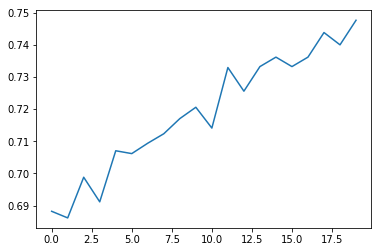

In [31]:
from matplotlib import pyplot as plt
from keras.callbacks import ModelCheckpoint    
#model3H8 = get_model3()
checkpointer = ModelCheckpoint(filepath='./models/'+'modelData10.h5', verbose=0)
history=model3H8.fit(X_train, y_train_hot, batch_size=10, epochs=20, verbose=verbose, validation_data=(X_test, y_test_hot),callbacks=[checkpointer])
plt.plot(history.history['val_categorical_accuracy'])

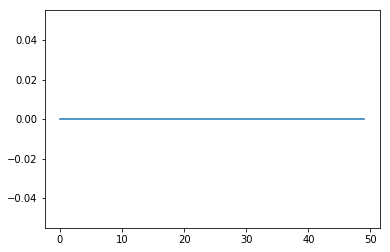

In [76]:
plt.plot(history.history['val_categorical_accuracy'])

Train on 13806 samples, validate on 13806 samples
Epoch 1/50


 1450/13806 [==>...........................] - ETA: 24:35 - loss: 3.7181 - categorical_accuracy: 0.100 - ETA: 13:11 - loss: 3.6421 - categorical_accuracy: 0.050 - ETA: 9:27 - loss: 3.6566 - categorical_accuracy: 0.033 - ETA: 7:30 - loss: 3.6208 - categorical_accuracy: 0.02 - ETA: 6:18 - loss: 3.6212 - categorical_accuracy: 0.02 - ETA: 5:31 - loss: 3.5950 - categorical_accuracy: 0.05 - ETA: 4:57 - loss: 3.5435 - categorical_accuracy: 0.05 - ETA: 4:31 - loss: 3.5204 - categorical_accuracy: 0.06 - ETA: 4:11 - loss: 3.5145 - categorical_accuracy: 0.05 - ETA: 3:56 - loss: 3.5173 - categorical_accuracy: 0.05 - ETA: 3:43 - loss: 3.5273 - categorical_accuracy: 0.04 - ETA: 3:32 - loss: 3.5095 - categorical_accuracy: 0.04 - ETA: 3:23 - loss: 3.4870 - categorical_accuracy: 0.03 - ETA: 3:15 - loss: 3.4805 - categorical_accuracy: 0.04 - ETA: 3:08 - loss: 3.4799 - categorical_accuracy: 0.04 - ETA: 3:02 - loss: 3.4595 - categorical_accuracy: 0.05 - ETA: 2:56 - loss: 3.4736 - categorical_accuracy: 0.0

 5830/13806 [===========>..................] - ETA: 1:06 - loss: 3.2274 - categorical_accuracy: 0.05 - ETA: 1:06 - loss: 3.2278 - categorical_accuracy: 0.05 - ETA: 1:06 - loss: 3.2276 - categorical_accuracy: 0.05 - ETA: 1:06 - loss: 3.2273 - categorical_accuracy: 0.05 - ETA: 1:06 - loss: 3.2274 - categorical_accuracy: 0.05 - ETA: 1:06 - loss: 3.2273 - categorical_accuracy: 0.05 - ETA: 1:06 - loss: 3.2268 - categorical_accuracy: 0.05 - ETA: 1:06 - loss: 3.2270 - categorical_accuracy: 0.05 - ETA: 1:06 - loss: 3.2270 - categorical_accuracy: 0.05 - ETA: 1:05 - loss: 3.2272 - categorical_accuracy: 0.05 - ETA: 1:05 - loss: 3.2274 - categorical_accuracy: 0.05 - ETA: 1:05 - loss: 3.2272 - categorical_accuracy: 0.05 - ETA: 1:05 - loss: 3.2268 - categorical_accuracy: 0.05 - ETA: 1:05 - loss: 3.2268 - categorical_accuracy: 0.05 - ETA: 1:05 - loss: 3.2269 - categorical_accuracy: 0.05 - ETA: 1:05 - loss: 3.2267 - categorical_accuracy: 0.05 - ETA: 1:05 - loss: 3.2268 - categorical_accuracy: 0.05 - E

 7290/13806 [==============>...............] - ETA: 55s - loss: 3.2123 - categorical_accuracy: 0.054 - ETA: 55s - loss: 3.2123 - categorical_accuracy: 0.054 - ETA: 55s - loss: 3.2121 - categorical_accuracy: 0.054 - ETA: 55s - loss: 3.2120 - categorical_accuracy: 0.054 - ETA: 55s - loss: 3.2117 - categorical_accuracy: 0.054 - ETA: 55s - loss: 3.2119 - categorical_accuracy: 0.054 - ETA: 55s - loss: 3.2119 - categorical_accuracy: 0.054 - ETA: 55s - loss: 3.2120 - categorical_accuracy: 0.054 - ETA: 55s - loss: 3.2117 - categorical_accuracy: 0.054 - ETA: 55s - loss: 3.2118 - categorical_accuracy: 0.054 - ETA: 55s - loss: 3.2114 - categorical_accuracy: 0.054 - ETA: 55s - loss: 3.2113 - categorical_accuracy: 0.054 - ETA: 55s - loss: 3.2110 - categorical_accuracy: 0.054 - ETA: 54s - loss: 3.2109 - categorical_accuracy: 0.054 - ETA: 54s - loss: 3.2107 - categorical_accuracy: 0.054 - ETA: 54s - loss: 3.2110 - categorical_accuracy: 0.054 - ETA: 54s - loss: 3.2113 - categorical_accuracy: 0.054 - E

 8750/13806 [==================>...........] - ETA: 45s - loss: 3.1998 - categorical_accuracy: 0.057 - ETA: 45s - loss: 3.1997 - categorical_accuracy: 0.057 - ETA: 45s - loss: 3.2003 - categorical_accuracy: 0.057 - ETA: 45s - loss: 3.2002 - categorical_accuracy: 0.057 - ETA: 45s - loss: 3.2000 - categorical_accuracy: 0.057 - ETA: 45s - loss: 3.2000 - categorical_accuracy: 0.057 - ETA: 45s - loss: 3.2001 - categorical_accuracy: 0.057 - ETA: 45s - loss: 3.2000 - categorical_accuracy: 0.057 - ETA: 45s - loss: 3.1999 - categorical_accuracy: 0.057 - ETA: 45s - loss: 3.1998 - categorical_accuracy: 0.057 - ETA: 45s - loss: 3.1999 - categorical_accuracy: 0.057 - ETA: 45s - loss: 3.1999 - categorical_accuracy: 0.057 - ETA: 44s - loss: 3.1996 - categorical_accuracy: 0.057 - ETA: 44s - loss: 3.1996 - categorical_accuracy: 0.057 - ETA: 44s - loss: 3.1994 - categorical_accuracy: 0.057 - ETA: 44s - loss: 3.1996 - categorical_accuracy: 0.057 - ETA: 44s - loss: 3.1995 - categorical_accuracy: 0.057 - E

10210/13806 [=====================>........] - ETA: 35s - loss: 3.1932 - categorical_accuracy: 0.057 - ETA: 35s - loss: 3.1930 - categorical_accuracy: 0.057 - ETA: 35s - loss: 3.1929 - categorical_accuracy: 0.058 - ETA: 35s - loss: 3.1928 - categorical_accuracy: 0.058 - ETA: 35s - loss: 3.1927 - categorical_accuracy: 0.058 - ETA: 35s - loss: 3.1925 - categorical_accuracy: 0.058 - ETA: 34s - loss: 3.1923 - categorical_accuracy: 0.058 - ETA: 34s - loss: 3.1924 - categorical_accuracy: 0.058 - ETA: 34s - loss: 3.1924 - categorical_accuracy: 0.058 - ETA: 34s - loss: 3.1922 - categorical_accuracy: 0.058 - ETA: 34s - loss: 3.1923 - categorical_accuracy: 0.058 - ETA: 34s - loss: 3.1924 - categorical_accuracy: 0.058 - ETA: 34s - loss: 3.1923 - categorical_accuracy: 0.058 - ETA: 34s - loss: 3.1920 - categorical_accuracy: 0.058 - ETA: 34s - loss: 3.1919 - categorical_accuracy: 0.058 - ETA: 34s - loss: 3.1917 - categorical_accuracy: 0.058 - ETA: 34s - loss: 3.1917 - categorical_accuracy: 0.058 - E

11670/13806 [========================>.....] - ETA: 24s - loss: 3.1842 - categorical_accuracy: 0.059 - ETA: 24s - loss: 3.1841 - categorical_accuracy: 0.059 - ETA: 24s - loss: 3.1843 - categorical_accuracy: 0.059 - ETA: 24s - loss: 3.1845 - categorical_accuracy: 0.059 - ETA: 24s - loss: 3.1845 - categorical_accuracy: 0.059 - ETA: 24s - loss: 3.1843 - categorical_accuracy: 0.059 - ETA: 24s - loss: 3.1842 - categorical_accuracy: 0.059 - ETA: 24s - loss: 3.1844 - categorical_accuracy: 0.059 - ETA: 24s - loss: 3.1843 - categorical_accuracy: 0.059 - ETA: 24s - loss: 3.1841 - categorical_accuracy: 0.059 - ETA: 24s - loss: 3.1842 - categorical_accuracy: 0.059 - ETA: 24s - loss: 3.1842 - categorical_accuracy: 0.059 - ETA: 24s - loss: 3.1841 - categorical_accuracy: 0.059 - ETA: 24s - loss: 3.1843 - categorical_accuracy: 0.059 - ETA: 23s - loss: 3.1842 - categorical_accuracy: 0.059 - ETA: 23s - loss: 3.1841 - categorical_accuracy: 0.059 - ETA: 23s - loss: 3.1840 - categorical_accuracy: 0.059 - E

13160/13806 [===========================>..] - ETA: 14s - loss: 3.1785 - categorical_accuracy: 0.060 - ETA: 14s - loss: 3.1786 - categorical_accuracy: 0.060 - ETA: 14s - loss: 3.1786 - categorical_accuracy: 0.060 - ETA: 14s - loss: 3.1786 - categorical_accuracy: 0.060 - ETA: 14s - loss: 3.1789 - categorical_accuracy: 0.060 - ETA: 14s - loss: 3.1787 - categorical_accuracy: 0.060 - ETA: 14s - loss: 3.1786 - categorical_accuracy: 0.060 - ETA: 14s - loss: 3.1787 - categorical_accuracy: 0.060 - ETA: 14s - loss: 3.1785 - categorical_accuracy: 0.060 - ETA: 14s - loss: 3.1786 - categorical_accuracy: 0.060 - ETA: 14s - loss: 3.1785 - categorical_accuracy: 0.060 - ETA: 13s - loss: 3.1784 - categorical_accuracy: 0.060 - ETA: 13s - loss: 3.1783 - categorical_accuracy: 0.060 - ETA: 13s - loss: 3.1783 - categorical_accuracy: 0.060 - ETA: 13s - loss: 3.1782 - categorical_accuracy: 0.060 - ETA: 13s - loss: 3.1783 - categorical_accuracy: 0.060 - ETA: 13s - loss: 3.1781 - categorical_accuracy: 0.060 - E

13806/13806 [==============================] - ETA: 4s - loss: 3.1735 - categorical_accuracy: 0.06 - ETA: 4s - loss: 3.1734 - categorical_accuracy: 0.06 - ETA: 4s - loss: 3.1734 - categorical_accuracy: 0.06 - ETA: 4s - loss: 3.1733 - categorical_accuracy: 0.06 - ETA: 4s - loss: 3.1735 - categorical_accuracy: 0.06 - ETA: 4s - loss: 3.1735 - categorical_accuracy: 0.06 - ETA: 3s - loss: 3.1736 - categorical_accuracy: 0.06 - ETA: 3s - loss: 3.1735 - categorical_accuracy: 0.06 - ETA: 3s - loss: 3.1734 - categorical_accuracy: 0.06 - ETA: 3s - loss: 3.1734 - categorical_accuracy: 0.06 - ETA: 3s - loss: 3.1733 - categorical_accuracy: 0.06 - ETA: 3s - loss: 3.1734 - categorical_accuracy: 0.06 - ETA: 3s - loss: 3.1733 - categorical_accuracy: 0.06 - ETA: 3s - loss: 3.1732 - categorical_accuracy: 0.06 - ETA: 3s - loss: 3.1731 - categorical_accuracy: 0.06 - ETA: 3s - loss: 3.1730 - categorical_accuracy: 0.06 - ETA: 3s - loss: 3.1728 - categorical_accuracy: 0.06 - ETA: 3s - loss: 3.1728 - categorica

 1460/13806 [==>...........................] - ETA: 1:28 - loss: 2.9796 - categorical_accuracy: 0.0000e+ - ETA: 1:29 - loss: 3.0311 - categorical_accuracy: 0.0500   - ETA: 1:28 - loss: 3.0147 - categorical_accuracy: 0.06 - ETA: 1:29 - loss: 3.0607 - categorical_accuracy: 0.07 - ETA: 1:29 - loss: 3.0950 - categorical_accuracy: 0.06 - ETA: 1:29 - loss: 3.0904 - categorical_accuracy: 0.05 - ETA: 1:29 - loss: 3.1057 - categorical_accuracy: 0.04 - ETA: 1:29 - loss: 3.1140 - categorical_accuracy: 0.03 - ETA: 1:28 - loss: 3.1145 - categorical_accuracy: 0.03 - ETA: 1:29 - loss: 3.1183 - categorical_accuracy: 0.05 - ETA: 1:30 - loss: 3.1258 - categorical_accuracy: 0.04 - ETA: 1:29 - loss: 3.1230 - categorical_accuracy: 0.05 - ETA: 1:29 - loss: 3.1225 - categorical_accuracy: 0.04 - ETA: 1:29 - loss: 3.1255 - categorical_accuracy: 0.04 - ETA: 1:29 - loss: 3.1370 - categorical_accuracy: 0.04 - ETA: 1:29 - loss: 3.1311 - categorical_accuracy: 0.04 - ETA: 1:29 - loss: 3.1355 - categorical_accuracy: 

 5840/13806 [===========>..................] - ETA: 1:04 - loss: 3.1125 - categorical_accuracy: 0.07 - ETA: 1:04 - loss: 3.1122 - categorical_accuracy: 0.07 - ETA: 1:04 - loss: 3.1120 - categorical_accuracy: 0.07 - ETA: 1:04 - loss: 3.1120 - categorical_accuracy: 0.07 - ETA: 1:03 - loss: 3.1118 - categorical_accuracy: 0.07 - ETA: 1:03 - loss: 3.1116 - categorical_accuracy: 0.07 - ETA: 1:03 - loss: 3.1111 - categorical_accuracy: 0.07 - ETA: 1:03 - loss: 3.1113 - categorical_accuracy: 0.07 - ETA: 1:03 - loss: 3.1118 - categorical_accuracy: 0.07 - ETA: 1:03 - loss: 3.1117 - categorical_accuracy: 0.07 - ETA: 1:03 - loss: 3.1115 - categorical_accuracy: 0.07 - ETA: 1:03 - loss: 3.1111 - categorical_accuracy: 0.07 - ETA: 1:03 - loss: 3.1110 - categorical_accuracy: 0.07 - ETA: 1:03 - loss: 3.1115 - categorical_accuracy: 0.07 - ETA: 1:03 - loss: 3.1123 - categorical_accuracy: 0.07 - ETA: 1:03 - loss: 3.1123 - categorical_accuracy: 0.07 - ETA: 1:03 - loss: 3.1119 - categorical_accuracy: 0.07 - E

 7300/13806 [==============>...............] - ETA: 54s - loss: 3.1094 - categorical_accuracy: 0.080 - ETA: 54s - loss: 3.1094 - categorical_accuracy: 0.080 - ETA: 54s - loss: 3.1098 - categorical_accuracy: 0.080 - ETA: 53s - loss: 3.1096 - categorical_accuracy: 0.080 - ETA: 53s - loss: 3.1096 - categorical_accuracy: 0.080 - ETA: 53s - loss: 3.1094 - categorical_accuracy: 0.080 - ETA: 53s - loss: 3.1095 - categorical_accuracy: 0.080 - ETA: 53s - loss: 3.1097 - categorical_accuracy: 0.080 - ETA: 53s - loss: 3.1095 - categorical_accuracy: 0.080 - ETA: 53s - loss: 3.1094 - categorical_accuracy: 0.080 - ETA: 53s - loss: 3.1091 - categorical_accuracy: 0.080 - ETA: 53s - loss: 3.1091 - categorical_accuracy: 0.080 - ETA: 53s - loss: 3.1092 - categorical_accuracy: 0.080 - ETA: 53s - loss: 3.1088 - categorical_accuracy: 0.080 - ETA: 53s - loss: 3.1085 - categorical_accuracy: 0.080 - ETA: 53s - loss: 3.1082 - categorical_accuracy: 0.080 - ETA: 53s - loss: 3.1081 - categorical_accuracy: 0.080 - E

 8760/13806 [==================>...........] - ETA: 44s - loss: 3.1055 - categorical_accuracy: 0.082 - ETA: 43s - loss: 3.1054 - categorical_accuracy: 0.082 - ETA: 43s - loss: 3.1056 - categorical_accuracy: 0.082 - ETA: 43s - loss: 3.1059 - categorical_accuracy: 0.082 - ETA: 43s - loss: 3.1059 - categorical_accuracy: 0.082 - ETA: 43s - loss: 3.1058 - categorical_accuracy: 0.081 - ETA: 43s - loss: 3.1056 - categorical_accuracy: 0.082 - ETA: 43s - loss: 3.1056 - categorical_accuracy: 0.082 - ETA: 43s - loss: 3.1056 - categorical_accuracy: 0.082 - ETA: 43s - loss: 3.1058 - categorical_accuracy: 0.082 - ETA: 43s - loss: 3.1060 - categorical_accuracy: 0.082 - ETA: 43s - loss: 3.1061 - categorical_accuracy: 0.082 - ETA: 43s - loss: 3.1063 - categorical_accuracy: 0.082 - ETA: 43s - loss: 3.1066 - categorical_accuracy: 0.082 - ETA: 43s - loss: 3.1066 - categorical_accuracy: 0.082 - ETA: 43s - loss: 3.1065 - categorical_accuracy: 0.082 - ETA: 42s - loss: 3.1069 - categorical_accuracy: 0.082 - E

10220/13806 [=====================>........] - ETA: 34s - loss: 3.1016 - categorical_accuracy: 0.084 - ETA: 34s - loss: 3.1018 - categorical_accuracy: 0.084 - ETA: 34s - loss: 3.1017 - categorical_accuracy: 0.084 - ETA: 34s - loss: 3.1018 - categorical_accuracy: 0.084 - ETA: 33s - loss: 3.1015 - categorical_accuracy: 0.084 - ETA: 33s - loss: 3.1014 - categorical_accuracy: 0.084 - ETA: 33s - loss: 3.1013 - categorical_accuracy: 0.084 - ETA: 33s - loss: 3.1012 - categorical_accuracy: 0.084 - ETA: 33s - loss: 3.1010 - categorical_accuracy: 0.084 - ETA: 33s - loss: 3.1012 - categorical_accuracy: 0.084 - ETA: 33s - loss: 3.1012 - categorical_accuracy: 0.084 - ETA: 33s - loss: 3.1011 - categorical_accuracy: 0.084 - ETA: 33s - loss: 3.1015 - categorical_accuracy: 0.084 - ETA: 33s - loss: 3.1016 - categorical_accuracy: 0.084 - ETA: 33s - loss: 3.1014 - categorical_accuracy: 0.084 - ETA: 33s - loss: 3.1014 - categorical_accuracy: 0.084 - ETA: 33s - loss: 3.1012 - categorical_accuracy: 0.084 - E

11680/13806 [========================>.....] - ETA: 24s - loss: 3.0967 - categorical_accuracy: 0.085 - ETA: 24s - loss: 3.0966 - categorical_accuracy: 0.085 - ETA: 24s - loss: 3.0965 - categorical_accuracy: 0.085 - ETA: 24s - loss: 3.0966 - categorical_accuracy: 0.085 - ETA: 24s - loss: 3.0969 - categorical_accuracy: 0.085 - ETA: 24s - loss: 3.0968 - categorical_accuracy: 0.085 - ETA: 23s - loss: 3.0968 - categorical_accuracy: 0.085 - ETA: 23s - loss: 3.0965 - categorical_accuracy: 0.085 - ETA: 23s - loss: 3.0965 - categorical_accuracy: 0.085 - ETA: 23s - loss: 3.0964 - categorical_accuracy: 0.085 - ETA: 23s - loss: 3.0963 - categorical_accuracy: 0.085 - ETA: 23s - loss: 3.0962 - categorical_accuracy: 0.085 - ETA: 23s - loss: 3.0962 - categorical_accuracy: 0.085 - ETA: 23s - loss: 3.0962 - categorical_accuracy: 0.085 - ETA: 23s - loss: 3.0961 - categorical_accuracy: 0.085 - ETA: 23s - loss: 3.0962 - categorical_accuracy: 0.085 - ETA: 23s - loss: 3.0964 - categorical_accuracy: 0.085 - E

13170/13806 [===========================>..] - ETA: 14s - loss: 3.0955 - categorical_accuracy: 0.086 - ETA: 14s - loss: 3.0954 - categorical_accuracy: 0.086 - ETA: 14s - loss: 3.0956 - categorical_accuracy: 0.086 - ETA: 14s - loss: 3.0955 - categorical_accuracy: 0.086 - ETA: 14s - loss: 3.0955 - categorical_accuracy: 0.086 - ETA: 14s - loss: 3.0955 - categorical_accuracy: 0.086 - ETA: 14s - loss: 3.0954 - categorical_accuracy: 0.087 - ETA: 14s - loss: 3.0954 - categorical_accuracy: 0.086 - ETA: 13s - loss: 3.0952 - categorical_accuracy: 0.086 - ETA: 13s - loss: 3.0952 - categorical_accuracy: 0.086 - ETA: 13s - loss: 3.0950 - categorical_accuracy: 0.087 - ETA: 13s - loss: 3.0951 - categorical_accuracy: 0.086 - ETA: 13s - loss: 3.0952 - categorical_accuracy: 0.087 - ETA: 13s - loss: 3.0952 - categorical_accuracy: 0.087 - ETA: 13s - loss: 3.0951 - categorical_accuracy: 0.086 - ETA: 13s - loss: 3.0951 - categorical_accuracy: 0.086 - ETA: 13s - loss: 3.0950 - categorical_accuracy: 0.087 - E

13806/13806 [==============================] - ETA: 4s - loss: 3.0928 - categorical_accuracy: 0.08 - ETA: 4s - loss: 3.0927 - categorical_accuracy: 0.08 - ETA: 4s - loss: 3.0926 - categorical_accuracy: 0.08 - ETA: 4s - loss: 3.0925 - categorical_accuracy: 0.08 - ETA: 4s - loss: 3.0924 - categorical_accuracy: 0.08 - ETA: 3s - loss: 3.0925 - categorical_accuracy: 0.08 - ETA: 3s - loss: 3.0924 - categorical_accuracy: 0.08 - ETA: 3s - loss: 3.0923 - categorical_accuracy: 0.08 - ETA: 3s - loss: 3.0922 - categorical_accuracy: 0.08 - ETA: 3s - loss: 3.0921 - categorical_accuracy: 0.08 - ETA: 3s - loss: 3.0922 - categorical_accuracy: 0.08 - ETA: 3s - loss: 3.0923 - categorical_accuracy: 0.08 - ETA: 3s - loss: 3.0924 - categorical_accuracy: 0.08 - ETA: 3s - loss: 3.0923 - categorical_accuracy: 0.08 - ETA: 3s - loss: 3.0922 - categorical_accuracy: 0.08 - ETA: 3s - loss: 3.0921 - categorical_accuracy: 0.08 - ETA: 3s - loss: 3.0920 - categorical_accuracy: 0.08 - ETA: 3s - loss: 3.0920 - categorica

 1460/13806 [==>...........................] - ETA: 1:37 - loss: 2.9120 - categorical_accuracy: 0.20 - ETA: 1:34 - loss: 3.0461 - categorical_accuracy: 0.15 - ETA: 1:40 - loss: 3.0165 - categorical_accuracy: 0.16 - ETA: 1:42 - loss: 3.0996 - categorical_accuracy: 0.17 - ETA: 1:43 - loss: 3.0853 - categorical_accuracy: 0.14 - ETA: 1:47 - loss: 3.0636 - categorical_accuracy: 0.15 - ETA: 1:45 - loss: 3.0537 - categorical_accuracy: 0.12 - ETA: 1:45 - loss: 3.0357 - categorical_accuracy: 0.11 - ETA: 1:44 - loss: 3.0153 - categorical_accuracy: 0.12 - ETA: 1:43 - loss: 3.0254 - categorical_accuracy: 0.11 - ETA: 1:42 - loss: 3.0237 - categorical_accuracy: 0.12 - ETA: 1:42 - loss: 3.0485 - categorical_accuracy: 0.11 - ETA: 1:42 - loss: 3.0538 - categorical_accuracy: 0.12 - ETA: 1:41 - loss: 3.0488 - categorical_accuracy: 0.11 - ETA: 1:42 - loss: 3.0432 - categorical_accuracy: 0.10 - ETA: 1:41 - loss: 3.0418 - categorical_accuracy: 0.11 - ETA: 1:41 - loss: 3.0396 - categorical_accuracy: 0.11 - E

 5840/13806 [===========>..................] - ETA: 1:03 - loss: 3.0350 - categorical_accuracy: 0.12 - ETA: 1:03 - loss: 3.0350 - categorical_accuracy: 0.12 - ETA: 1:02 - loss: 3.0346 - categorical_accuracy: 0.12 - ETA: 1:02 - loss: 3.0344 - categorical_accuracy: 0.12 - ETA: 1:02 - loss: 3.0355 - categorical_accuracy: 0.12 - ETA: 1:02 - loss: 3.0355 - categorical_accuracy: 0.12 - ETA: 1:02 - loss: 3.0355 - categorical_accuracy: 0.12 - ETA: 1:02 - loss: 3.0358 - categorical_accuracy: 0.12 - ETA: 1:02 - loss: 3.0361 - categorical_accuracy: 0.12 - ETA: 1:02 - loss: 3.0357 - categorical_accuracy: 0.12 - ETA: 1:02 - loss: 3.0353 - categorical_accuracy: 0.12 - ETA: 1:02 - loss: 3.0358 - categorical_accuracy: 0.12 - ETA: 1:02 - loss: 3.0355 - categorical_accuracy: 0.12 - ETA: 1:02 - loss: 3.0351 - categorical_accuracy: 0.12 - ETA: 1:02 - loss: 3.0351 - categorical_accuracy: 0.12 - ETA: 1:02 - loss: 3.0356 - categorical_accuracy: 0.12 - ETA: 1:01 - loss: 3.0356 - categorical_accuracy: 0.12 - E

 7300/13806 [==============>...............] - ETA: 53s - loss: 3.0289 - categorical_accuracy: 0.127 - ETA: 53s - loss: 3.0291 - categorical_accuracy: 0.127 - ETA: 53s - loss: 3.0291 - categorical_accuracy: 0.127 - ETA: 52s - loss: 3.0294 - categorical_accuracy: 0.127 - ETA: 52s - loss: 3.0296 - categorical_accuracy: 0.126 - ETA: 52s - loss: 3.0297 - categorical_accuracy: 0.126 - ETA: 52s - loss: 3.0297 - categorical_accuracy: 0.126 - ETA: 52s - loss: 3.0296 - categorical_accuracy: 0.126 - ETA: 52s - loss: 3.0296 - categorical_accuracy: 0.126 - ETA: 52s - loss: 3.0298 - categorical_accuracy: 0.126 - ETA: 52s - loss: 3.0297 - categorical_accuracy: 0.126 - ETA: 52s - loss: 3.0294 - categorical_accuracy: 0.126 - ETA: 52s - loss: 3.0299 - categorical_accuracy: 0.127 - ETA: 52s - loss: 3.0296 - categorical_accuracy: 0.126 - ETA: 52s - loss: 3.0296 - categorical_accuracy: 0.126 - ETA: 52s - loss: 3.0297 - categorical_accuracy: 0.126 - ETA: 52s - loss: 3.0295 - categorical_accuracy: 0.127 - E

 8760/13806 [==================>...........] - ETA: 43s - loss: 3.0262 - categorical_accuracy: 0.126 - ETA: 43s - loss: 3.0262 - categorical_accuracy: 0.126 - ETA: 42s - loss: 3.0264 - categorical_accuracy: 0.126 - ETA: 42s - loss: 3.0261 - categorical_accuracy: 0.126 - ETA: 42s - loss: 3.0258 - categorical_accuracy: 0.126 - ETA: 42s - loss: 3.0259 - categorical_accuracy: 0.126 - ETA: 42s - loss: 3.0258 - categorical_accuracy: 0.127 - ETA: 42s - loss: 3.0257 - categorical_accuracy: 0.127 - ETA: 42s - loss: 3.0258 - categorical_accuracy: 0.127 - ETA: 42s - loss: 3.0256 - categorical_accuracy: 0.127 - ETA: 42s - loss: 3.0254 - categorical_accuracy: 0.127 - ETA: 42s - loss: 3.0253 - categorical_accuracy: 0.127 - ETA: 42s - loss: 3.0253 - categorical_accuracy: 0.127 - ETA: 42s - loss: 3.0251 - categorical_accuracy: 0.127 - ETA: 42s - loss: 3.0248 - categorical_accuracy: 0.127 - ETA: 42s - loss: 3.0250 - categorical_accuracy: 0.127 - ETA: 42s - loss: 3.0249 - categorical_accuracy: 0.127 - E

10220/13806 [=====================>........] - ETA: 33s - loss: 3.0216 - categorical_accuracy: 0.127 - ETA: 33s - loss: 3.0214 - categorical_accuracy: 0.127 - ETA: 33s - loss: 3.0217 - categorical_accuracy: 0.127 - ETA: 33s - loss: 3.0214 - categorical_accuracy: 0.127 - ETA: 33s - loss: 3.0214 - categorical_accuracy: 0.127 - ETA: 33s - loss: 3.0213 - categorical_accuracy: 0.127 - ETA: 33s - loss: 3.0216 - categorical_accuracy: 0.127 - ETA: 33s - loss: 3.0215 - categorical_accuracy: 0.127 - ETA: 33s - loss: 3.0215 - categorical_accuracy: 0.127 - ETA: 32s - loss: 3.0215 - categorical_accuracy: 0.127 - ETA: 32s - loss: 3.0214 - categorical_accuracy: 0.127 - ETA: 32s - loss: 3.0218 - categorical_accuracy: 0.127 - ETA: 32s - loss: 3.0215 - categorical_accuracy: 0.127 - ETA: 32s - loss: 3.0217 - categorical_accuracy: 0.127 - ETA: 32s - loss: 3.0217 - categorical_accuracy: 0.128 - ETA: 32s - loss: 3.0215 - categorical_accuracy: 0.128 - ETA: 32s - loss: 3.0216 - categorical_accuracy: 0.128 - E

11680/13806 [========================>.....] - ETA: 23s - loss: 3.0150 - categorical_accuracy: 0.132 - ETA: 23s - loss: 3.0151 - categorical_accuracy: 0.132 - ETA: 23s - loss: 3.0149 - categorical_accuracy: 0.132 - ETA: 23s - loss: 3.0149 - categorical_accuracy: 0.132 - ETA: 23s - loss: 3.0148 - categorical_accuracy: 0.132 - ETA: 23s - loss: 3.0147 - categorical_accuracy: 0.132 - ETA: 23s - loss: 3.0146 - categorical_accuracy: 0.132 - ETA: 23s - loss: 3.0145 - categorical_accuracy: 0.132 - ETA: 23s - loss: 3.0144 - categorical_accuracy: 0.132 - ETA: 23s - loss: 3.0143 - categorical_accuracy: 0.132 - ETA: 23s - loss: 3.0141 - categorical_accuracy: 0.132 - ETA: 23s - loss: 3.0141 - categorical_accuracy: 0.132 - ETA: 23s - loss: 3.0142 - categorical_accuracy: 0.132 - ETA: 23s - loss: 3.0142 - categorical_accuracy: 0.132 - ETA: 23s - loss: 3.0141 - categorical_accuracy: 0.132 - ETA: 22s - loss: 3.0138 - categorical_accuracy: 0.132 - ETA: 22s - loss: 3.0139 - categorical_accuracy: 0.132 - E

13170/13806 [===========================>..] - ETA: 14s - loss: 3.0125 - categorical_accuracy: 0.134 - ETA: 14s - loss: 3.0126 - categorical_accuracy: 0.133 - ETA: 14s - loss: 3.0125 - categorical_accuracy: 0.134 - ETA: 13s - loss: 3.0129 - categorical_accuracy: 0.134 - ETA: 13s - loss: 3.0128 - categorical_accuracy: 0.134 - ETA: 13s - loss: 3.0127 - categorical_accuracy: 0.134 - ETA: 13s - loss: 3.0128 - categorical_accuracy: 0.134 - ETA: 13s - loss: 3.0127 - categorical_accuracy: 0.134 - ETA: 13s - loss: 3.0127 - categorical_accuracy: 0.134 - ETA: 13s - loss: 3.0126 - categorical_accuracy: 0.134 - ETA: 13s - loss: 3.0126 - categorical_accuracy: 0.134 - ETA: 13s - loss: 3.0125 - categorical_accuracy: 0.134 - ETA: 13s - loss: 3.0125 - categorical_accuracy: 0.134 - ETA: 13s - loss: 3.0122 - categorical_accuracy: 0.134 - ETA: 13s - loss: 3.0121 - categorical_accuracy: 0.134 - ETA: 13s - loss: 3.0121 - categorical_accuracy: 0.134 - ETA: 13s - loss: 3.0122 - categorical_accuracy: 0.134 - E

13806/13806 [==============================] - ETA: 4s - loss: 3.0049 - categorical_accuracy: 0.13 - ETA: 4s - loss: 3.0048 - categorical_accuracy: 0.13 - ETA: 4s - loss: 3.0047 - categorical_accuracy: 0.13 - ETA: 3s - loss: 3.0046 - categorical_accuracy: 0.13 - ETA: 3s - loss: 3.0046 - categorical_accuracy: 0.13 - ETA: 3s - loss: 3.0044 - categorical_accuracy: 0.13 - ETA: 3s - loss: 3.0044 - categorical_accuracy: 0.13 - ETA: 3s - loss: 3.0046 - categorical_accuracy: 0.13 - ETA: 3s - loss: 3.0047 - categorical_accuracy: 0.13 - ETA: 3s - loss: 3.0047 - categorical_accuracy: 0.13 - ETA: 3s - loss: 3.0049 - categorical_accuracy: 0.13 - ETA: 3s - loss: 3.0049 - categorical_accuracy: 0.13 - ETA: 3s - loss: 3.0049 - categorical_accuracy: 0.13 - ETA: 3s - loss: 3.0048 - categorical_accuracy: 0.13 - ETA: 3s - loss: 3.0047 - categorical_accuracy: 0.13 - ETA: 3s - loss: 3.0044 - categorical_accuracy: 0.13 - ETA: 3s - loss: 3.0044 - categorical_accuracy: 0.13 - ETA: 3s - loss: 3.0046 - categorica

 1460/13806 [==>...........................] - ETA: 1:25 - loss: 2.9467 - categorical_accuracy: 0.20 - ETA: 1:24 - loss: 2.8121 - categorical_accuracy: 0.30 - ETA: 1:25 - loss: 2.7779 - categorical_accuracy: 0.30 - ETA: 1:26 - loss: 2.8247 - categorical_accuracy: 0.25 - ETA: 1:26 - loss: 2.8534 - categorical_accuracy: 0.22 - ETA: 1:26 - loss: 2.8918 - categorical_accuracy: 0.18 - ETA: 1:26 - loss: 2.8748 - categorical_accuracy: 0.18 - ETA: 1:26 - loss: 2.8783 - categorical_accuracy: 0.17 - ETA: 1:26 - loss: 2.9059 - categorical_accuracy: 0.17 - ETA: 1:26 - loss: 2.9115 - categorical_accuracy: 0.18 - ETA: 1:26 - loss: 2.9231 - categorical_accuracy: 0.16 - ETA: 1:26 - loss: 2.9278 - categorical_accuracy: 0.18 - ETA: 1:26 - loss: 2.9506 - categorical_accuracy: 0.16 - ETA: 1:26 - loss: 2.9489 - categorical_accuracy: 0.16 - ETA: 1:26 - loss: 2.9379 - categorical_accuracy: 0.18 - ETA: 1:26 - loss: 2.9405 - categorical_accuracy: 0.18 - ETA: 1:26 - loss: 2.9510 - categorical_accuracy: 0.17 - E

 5840/13806 [===========>..................] - ETA: 1:02 - loss: 2.9349 - categorical_accuracy: 0.16 - ETA: 1:02 - loss: 2.9357 - categorical_accuracy: 0.16 - ETA: 1:02 - loss: 2.9362 - categorical_accuracy: 0.16 - ETA: 1:02 - loss: 2.9361 - categorical_accuracy: 0.16 - ETA: 1:02 - loss: 2.9361 - categorical_accuracy: 0.16 - ETA: 1:02 - loss: 2.9363 - categorical_accuracy: 0.16 - ETA: 1:02 - loss: 2.9359 - categorical_accuracy: 0.16 - ETA: 1:02 - loss: 2.9358 - categorical_accuracy: 0.16 - ETA: 1:02 - loss: 2.9358 - categorical_accuracy: 0.16 - ETA: 1:02 - loss: 2.9361 - categorical_accuracy: 0.16 - ETA: 1:02 - loss: 2.9357 - categorical_accuracy: 0.16 - ETA: 1:02 - loss: 2.9354 - categorical_accuracy: 0.16 - ETA: 1:02 - loss: 2.9352 - categorical_accuracy: 0.16 - ETA: 1:02 - loss: 2.9348 - categorical_accuracy: 0.16 - ETA: 1:01 - loss: 2.9341 - categorical_accuracy: 0.16 - ETA: 1:01 - loss: 2.9342 - categorical_accuracy: 0.16 - ETA: 1:01 - loss: 2.9340 - categorical_accuracy: 0.16 - E

 7300/13806 [==============>...............] - ETA: 52s - loss: 2.9280 - categorical_accuracy: 0.169 - ETA: 52s - loss: 2.9280 - categorical_accuracy: 0.169 - ETA: 52s - loss: 2.9281 - categorical_accuracy: 0.169 - ETA: 52s - loss: 2.9280 - categorical_accuracy: 0.169 - ETA: 52s - loss: 2.9277 - categorical_accuracy: 0.169 - ETA: 52s - loss: 2.9274 - categorical_accuracy: 0.169 - ETA: 52s - loss: 2.9271 - categorical_accuracy: 0.169 - ETA: 52s - loss: 2.9270 - categorical_accuracy: 0.169 - ETA: 52s - loss: 2.9269 - categorical_accuracy: 0.170 - ETA: 52s - loss: 2.9274 - categorical_accuracy: 0.170 - ETA: 52s - loss: 2.9278 - categorical_accuracy: 0.170 - ETA: 52s - loss: 2.9281 - categorical_accuracy: 0.170 - ETA: 51s - loss: 2.9282 - categorical_accuracy: 0.169 - ETA: 51s - loss: 2.9294 - categorical_accuracy: 0.169 - ETA: 51s - loss: 2.9294 - categorical_accuracy: 0.169 - ETA: 51s - loss: 2.9296 - categorical_accuracy: 0.170 - ETA: 51s - loss: 2.9300 - categorical_accuracy: 0.169 - E

 8760/13806 [==================>...........] - ETA: 42s - loss: 2.9190 - categorical_accuracy: 0.175 - ETA: 42s - loss: 2.9193 - categorical_accuracy: 0.175 - ETA: 42s - loss: 2.9192 - categorical_accuracy: 0.175 - ETA: 42s - loss: 2.9188 - categorical_accuracy: 0.175 - ETA: 42s - loss: 2.9186 - categorical_accuracy: 0.175 - ETA: 42s - loss: 2.9182 - categorical_accuracy: 0.175 - ETA: 42s - loss: 2.9182 - categorical_accuracy: 0.175 - ETA: 42s - loss: 2.9179 - categorical_accuracy: 0.175 - ETA: 42s - loss: 2.9179 - categorical_accuracy: 0.175 - ETA: 42s - loss: 2.9178 - categorical_accuracy: 0.175 - ETA: 42s - loss: 2.9176 - categorical_accuracy: 0.175 - ETA: 42s - loss: 2.9177 - categorical_accuracy: 0.175 - ETA: 42s - loss: 2.9178 - categorical_accuracy: 0.175 - ETA: 41s - loss: 2.9177 - categorical_accuracy: 0.175 - ETA: 41s - loss: 2.9178 - categorical_accuracy: 0.175 - ETA: 41s - loss: 2.9177 - categorical_accuracy: 0.175 - ETA: 41s - loss: 2.9176 - categorical_accuracy: 0.175 - E

10220/13806 [=====================>........] - ETA: 33s - loss: 2.9118 - categorical_accuracy: 0.180 - ETA: 33s - loss: 2.9121 - categorical_accuracy: 0.180 - ETA: 33s - loss: 2.9120 - categorical_accuracy: 0.180 - ETA: 33s - loss: 2.9118 - categorical_accuracy: 0.180 - ETA: 33s - loss: 2.9117 - categorical_accuracy: 0.180 - ETA: 32s - loss: 2.9114 - categorical_accuracy: 0.180 - ETA: 32s - loss: 2.9111 - categorical_accuracy: 0.180 - ETA: 32s - loss: 2.9110 - categorical_accuracy: 0.180 - ETA: 32s - loss: 2.9113 - categorical_accuracy: 0.180 - ETA: 32s - loss: 2.9115 - categorical_accuracy: 0.180 - ETA: 32s - loss: 2.9114 - categorical_accuracy: 0.180 - ETA: 32s - loss: 2.9112 - categorical_accuracy: 0.180 - ETA: 32s - loss: 2.9110 - categorical_accuracy: 0.180 - ETA: 32s - loss: 2.9111 - categorical_accuracy: 0.180 - ETA: 32s - loss: 2.9111 - categorical_accuracy: 0.180 - ETA: 32s - loss: 2.9111 - categorical_accuracy: 0.180 - ETA: 32s - loss: 2.9110 - categorical_accuracy: 0.180 - E

11680/13806 [========================>.....] - ETA: 23s - loss: 2.9020 - categorical_accuracy: 0.185 - ETA: 23s - loss: 2.9022 - categorical_accuracy: 0.185 - ETA: 23s - loss: 2.9022 - categorical_accuracy: 0.185 - ETA: 23s - loss: 2.9021 - categorical_accuracy: 0.185 - ETA: 23s - loss: 2.9020 - categorical_accuracy: 0.185 - ETA: 23s - loss: 2.9019 - categorical_accuracy: 0.185 - ETA: 23s - loss: 2.9017 - categorical_accuracy: 0.185 - ETA: 23s - loss: 2.9015 - categorical_accuracy: 0.185 - ETA: 23s - loss: 2.9018 - categorical_accuracy: 0.185 - ETA: 23s - loss: 2.9015 - categorical_accuracy: 0.185 - ETA: 23s - loss: 2.9012 - categorical_accuracy: 0.185 - ETA: 23s - loss: 2.9012 - categorical_accuracy: 0.185 - ETA: 22s - loss: 2.9010 - categorical_accuracy: 0.185 - ETA: 22s - loss: 2.9010 - categorical_accuracy: 0.185 - ETA: 22s - loss: 2.9014 - categorical_accuracy: 0.185 - ETA: 22s - loss: 2.9013 - categorical_accuracy: 0.185 - ETA: 22s - loss: 2.9011 - categorical_accuracy: 0.186 - E

13170/13806 [===========================>..] - ETA: 14s - loss: 2.8980 - categorical_accuracy: 0.188 - ETA: 13s - loss: 2.8980 - categorical_accuracy: 0.188 - ETA: 13s - loss: 2.8979 - categorical_accuracy: 0.188 - ETA: 13s - loss: 2.8978 - categorical_accuracy: 0.188 - ETA: 13s - loss: 2.8979 - categorical_accuracy: 0.188 - ETA: 13s - loss: 2.8980 - categorical_accuracy: 0.188 - ETA: 13s - loss: 2.8978 - categorical_accuracy: 0.188 - ETA: 13s - loss: 2.8979 - categorical_accuracy: 0.188 - ETA: 13s - loss: 2.8979 - categorical_accuracy: 0.188 - ETA: 13s - loss: 2.8978 - categorical_accuracy: 0.188 - ETA: 13s - loss: 2.8978 - categorical_accuracy: 0.188 - ETA: 13s - loss: 2.8978 - categorical_accuracy: 0.188 - ETA: 13s - loss: 2.8977 - categorical_accuracy: 0.188 - ETA: 13s - loss: 2.8975 - categorical_accuracy: 0.188 - ETA: 13s - loss: 2.8974 - categorical_accuracy: 0.188 - ETA: 13s - loss: 2.8971 - categorical_accuracy: 0.188 - ETA: 12s - loss: 2.8969 - categorical_accuracy: 0.189 - E

13806/13806 [==============================] - ETA: 4s - loss: 2.8881 - categorical_accuracy: 0.19 - ETA: 4s - loss: 2.8883 - categorical_accuracy: 0.19 - ETA: 4s - loss: 2.8883 - categorical_accuracy: 0.19 - ETA: 3s - loss: 2.8883 - categorical_accuracy: 0.19 - ETA: 3s - loss: 2.8884 - categorical_accuracy: 0.19 - ETA: 3s - loss: 2.8882 - categorical_accuracy: 0.19 - ETA: 3s - loss: 2.8881 - categorical_accuracy: 0.19 - ETA: 3s - loss: 2.8880 - categorical_accuracy: 0.19 - ETA: 3s - loss: 2.8878 - categorical_accuracy: 0.19 - ETA: 3s - loss: 2.8878 - categorical_accuracy: 0.19 - ETA: 3s - loss: 2.8876 - categorical_accuracy: 0.19 - ETA: 3s - loss: 2.8876 - categorical_accuracy: 0.19 - ETA: 3s - loss: 2.8875 - categorical_accuracy: 0.19 - ETA: 3s - loss: 2.8879 - categorical_accuracy: 0.19 - ETA: 3s - loss: 2.8878 - categorical_accuracy: 0.19 - ETA: 3s - loss: 2.8877 - categorical_accuracy: 0.19 - ETA: 3s - loss: 2.8879 - categorical_accuracy: 0.19 - ETA: 3s - loss: 2.8880 - categorica

 1460/13806 [==>...........................] - ETA: 1:22 - loss: 2.7618 - categorical_accuracy: 0.30 - ETA: 1:25 - loss: 2.7058 - categorical_accuracy: 0.20 - ETA: 1:25 - loss: 2.8260 - categorical_accuracy: 0.13 - ETA: 1:26 - loss: 2.8394 - categorical_accuracy: 0.12 - ETA: 1:26 - loss: 2.7941 - categorical_accuracy: 0.16 - ETA: 1:26 - loss: 2.8407 - categorical_accuracy: 0.20 - ETA: 1:26 - loss: 2.8416 - categorical_accuracy: 0.21 - ETA: 1:26 - loss: 2.8514 - categorical_accuracy: 0.22 - ETA: 1:26 - loss: 2.8505 - categorical_accuracy: 0.23 - ETA: 1:26 - loss: 2.8431 - categorical_accuracy: 0.23 - ETA: 1:25 - loss: 2.8563 - categorical_accuracy: 0.22 - ETA: 1:25 - loss: 2.8661 - categorical_accuracy: 0.22 - ETA: 1:25 - loss: 2.8600 - categorical_accuracy: 0.22 - ETA: 1:25 - loss: 2.8626 - categorical_accuracy: 0.22 - ETA: 1:25 - loss: 2.8409 - categorical_accuracy: 0.23 - ETA: 1:25 - loss: 2.8569 - categorical_accuracy: 0.23 - ETA: 1:25 - loss: 2.8443 - categorical_accuracy: 0.22 - E

 5840/13806 [===========>..................] - ETA: 1:00 - loss: 2.7903 - categorical_accuracy: 0.24 - ETA: 1:00 - loss: 2.7905 - categorical_accuracy: 0.24 - ETA: 1:00 - loss: 2.7901 - categorical_accuracy: 0.23 - ETA: 1:00 - loss: 2.7905 - categorical_accuracy: 0.23 - ETA: 1:00 - loss: 2.7907 - categorical_accuracy: 0.23 - ETA: 1:00 - loss: 2.7911 - categorical_accuracy: 0.23 - ETA: 59s - loss: 2.7907 - categorical_accuracy: 0.2398 - ETA: 59s - loss: 2.7919 - categorical_accuracy: 0.239 - ETA: 59s - loss: 2.7913 - categorical_accuracy: 0.240 - ETA: 59s - loss: 2.7913 - categorical_accuracy: 0.240 - ETA: 59s - loss: 2.7912 - categorical_accuracy: 0.240 - ETA: 59s - loss: 2.7910 - categorical_accuracy: 0.240 - ETA: 59s - loss: 2.7904 - categorical_accuracy: 0.240 - ETA: 59s - loss: 2.7900 - categorical_accuracy: 0.240 - ETA: 59s - loss: 2.7900 - categorical_accuracy: 0.240 - ETA: 59s - loss: 2.7893 - categorical_accuracy: 0.241 - ETA: 59s - loss: 2.7889 - categorical_accuracy: 0.241 - 

 7300/13806 [==============>...............] - ETA: 51s - loss: 2.7868 - categorical_accuracy: 0.242 - ETA: 51s - loss: 2.7863 - categorical_accuracy: 0.243 - ETA: 51s - loss: 2.7862 - categorical_accuracy: 0.243 - ETA: 51s - loss: 2.7861 - categorical_accuracy: 0.243 - ETA: 50s - loss: 2.7856 - categorical_accuracy: 0.243 - ETA: 50s - loss: 2.7857 - categorical_accuracy: 0.243 - ETA: 50s - loss: 2.7853 - categorical_accuracy: 0.244 - ETA: 50s - loss: 2.7858 - categorical_accuracy: 0.244 - ETA: 50s - loss: 2.7857 - categorical_accuracy: 0.244 - ETA: 50s - loss: 2.7858 - categorical_accuracy: 0.244 - ETA: 50s - loss: 2.7858 - categorical_accuracy: 0.243 - ETA: 50s - loss: 2.7854 - categorical_accuracy: 0.244 - ETA: 50s - loss: 2.7850 - categorical_accuracy: 0.244 - ETA: 50s - loss: 2.7848 - categorical_accuracy: 0.244 - ETA: 50s - loss: 2.7849 - categorical_accuracy: 0.243 - ETA: 50s - loss: 2.7850 - categorical_accuracy: 0.244 - ETA: 50s - loss: 2.7849 - categorical_accuracy: 0.243 - E

 8760/13806 [==================>...........] - ETA: 42s - loss: 2.7869 - categorical_accuracy: 0.240 - ETA: 42s - loss: 2.7872 - categorical_accuracy: 0.240 - ETA: 41s - loss: 2.7874 - categorical_accuracy: 0.240 - ETA: 41s - loss: 2.7876 - categorical_accuracy: 0.240 - ETA: 41s - loss: 2.7878 - categorical_accuracy: 0.240 - ETA: 41s - loss: 2.7877 - categorical_accuracy: 0.240 - ETA: 41s - loss: 2.7875 - categorical_accuracy: 0.240 - ETA: 41s - loss: 2.7874 - categorical_accuracy: 0.240 - ETA: 41s - loss: 2.7876 - categorical_accuracy: 0.240 - ETA: 41s - loss: 2.7874 - categorical_accuracy: 0.240 - ETA: 41s - loss: 2.7875 - categorical_accuracy: 0.240 - ETA: 41s - loss: 2.7877 - categorical_accuracy: 0.240 - ETA: 41s - loss: 2.7878 - categorical_accuracy: 0.240 - ETA: 41s - loss: 2.7876 - categorical_accuracy: 0.240 - ETA: 41s - loss: 2.7877 - categorical_accuracy: 0.239 - ETA: 41s - loss: 2.7870 - categorical_accuracy: 0.240 - ETA: 41s - loss: 2.7866 - categorical_accuracy: 0.240 - E

10220/13806 [=====================>........] - ETA: 32s - loss: 2.7781 - categorical_accuracy: 0.241 - ETA: 32s - loss: 2.7778 - categorical_accuracy: 0.241 - ETA: 32s - loss: 2.7775 - categorical_accuracy: 0.241 - ETA: 32s - loss: 2.7773 - categorical_accuracy: 0.241 - ETA: 32s - loss: 2.7773 - categorical_accuracy: 0.241 - ETA: 32s - loss: 2.7773 - categorical_accuracy: 0.241 - ETA: 32s - loss: 2.7772 - categorical_accuracy: 0.241 - ETA: 32s - loss: 2.7771 - categorical_accuracy: 0.241 - ETA: 32s - loss: 2.7771 - categorical_accuracy: 0.241 - ETA: 32s - loss: 2.7770 - categorical_accuracy: 0.241 - ETA: 32s - loss: 2.7768 - categorical_accuracy: 0.241 - ETA: 32s - loss: 2.7764 - categorical_accuracy: 0.241 - ETA: 32s - loss: 2.7764 - categorical_accuracy: 0.241 - ETA: 32s - loss: 2.7769 - categorical_accuracy: 0.241 - ETA: 32s - loss: 2.7768 - categorical_accuracy: 0.241 - ETA: 31s - loss: 2.7764 - categorical_accuracy: 0.242 - ETA: 31s - loss: 2.7762 - categorical_accuracy: 0.242 - E

11680/13806 [========================>.....] - ETA: 23s - loss: 2.7676 - categorical_accuracy: 0.245 - ETA: 23s - loss: 2.7675 - categorical_accuracy: 0.245 - ETA: 23s - loss: 2.7675 - categorical_accuracy: 0.245 - ETA: 23s - loss: 2.7676 - categorical_accuracy: 0.244 - ETA: 23s - loss: 2.7675 - categorical_accuracy: 0.244 - ETA: 23s - loss: 2.7677 - categorical_accuracy: 0.244 - ETA: 23s - loss: 2.7674 - categorical_accuracy: 0.244 - ETA: 23s - loss: 2.7674 - categorical_accuracy: 0.244 - ETA: 22s - loss: 2.7676 - categorical_accuracy: 0.244 - ETA: 22s - loss: 2.7676 - categorical_accuracy: 0.244 - ETA: 22s - loss: 2.7673 - categorical_accuracy: 0.244 - ETA: 22s - loss: 2.7672 - categorical_accuracy: 0.244 - ETA: 22s - loss: 2.7673 - categorical_accuracy: 0.244 - ETA: 22s - loss: 2.7670 - categorical_accuracy: 0.245 - ETA: 22s - loss: 2.7670 - categorical_accuracy: 0.244 - ETA: 22s - loss: 2.7671 - categorical_accuracy: 0.244 - ETA: 22s - loss: 2.7673 - categorical_accuracy: 0.244 - E

13170/13806 [===========================>..] - ETA: 13s - loss: 2.7645 - categorical_accuracy: 0.245 - ETA: 13s - loss: 2.7646 - categorical_accuracy: 0.245 - ETA: 13s - loss: 2.7645 - categorical_accuracy: 0.245 - ETA: 13s - loss: 2.7643 - categorical_accuracy: 0.245 - ETA: 13s - loss: 2.7644 - categorical_accuracy: 0.245 - ETA: 13s - loss: 2.7645 - categorical_accuracy: 0.245 - ETA: 13s - loss: 2.7645 - categorical_accuracy: 0.245 - ETA: 13s - loss: 2.7644 - categorical_accuracy: 0.245 - ETA: 13s - loss: 2.7643 - categorical_accuracy: 0.245 - ETA: 13s - loss: 2.7643 - categorical_accuracy: 0.245 - ETA: 13s - loss: 2.7643 - categorical_accuracy: 0.245 - ETA: 13s - loss: 2.7642 - categorical_accuracy: 0.245 - ETA: 13s - loss: 2.7642 - categorical_accuracy: 0.245 - ETA: 13s - loss: 2.7640 - categorical_accuracy: 0.245 - ETA: 13s - loss: 2.7641 - categorical_accuracy: 0.245 - ETA: 12s - loss: 2.7641 - categorical_accuracy: 0.245 - ETA: 12s - loss: 2.7642 - categorical_accuracy: 0.245 - E

13806/13806 [==============================] - ETA: 4s - loss: 2.7610 - categorical_accuracy: 0.24 - ETA: 4s - loss: 2.7609 - categorical_accuracy: 0.24 - ETA: 4s - loss: 2.7611 - categorical_accuracy: 0.24 - ETA: 3s - loss: 2.7609 - categorical_accuracy: 0.24 - ETA: 3s - loss: 2.7609 - categorical_accuracy: 0.24 - ETA: 3s - loss: 2.7607 - categorical_accuracy: 0.24 - ETA: 3s - loss: 2.7606 - categorical_accuracy: 0.24 - ETA: 3s - loss: 2.7601 - categorical_accuracy: 0.24 - ETA: 3s - loss: 2.7602 - categorical_accuracy: 0.24 - ETA: 3s - loss: 2.7599 - categorical_accuracy: 0.24 - ETA: 3s - loss: 2.7597 - categorical_accuracy: 0.24 - ETA: 3s - loss: 2.7595 - categorical_accuracy: 0.24 - ETA: 3s - loss: 2.7595 - categorical_accuracy: 0.24 - ETA: 3s - loss: 2.7595 - categorical_accuracy: 0.24 - ETA: 3s - loss: 2.7594 - categorical_accuracy: 0.24 - ETA: 3s - loss: 2.7594 - categorical_accuracy: 0.24 - ETA: 3s - loss: 2.7593 - categorical_accuracy: 0.24 - ETA: 3s - loss: 2.7592 - categorica

 1460/13806 [==>...........................] - ETA: 1:45 - loss: 2.8003 - categorical_accuracy: 0.30 - ETA: 1:54 - loss: 2.7127 - categorical_accuracy: 0.25 - ETA: 1:52 - loss: 2.8222 - categorical_accuracy: 0.23 - ETA: 1:51 - loss: 2.8013 - categorical_accuracy: 0.22 - ETA: 1:50 - loss: 2.7996 - categorical_accuracy: 0.22 - ETA: 1:49 - loss: 2.7193 - categorical_accuracy: 0.25 - ETA: 1:52 - loss: 2.7887 - categorical_accuracy: 0.21 - ETA: 1:52 - loss: 2.7758 - categorical_accuracy: 0.20 - ETA: 1:51 - loss: 2.7670 - categorical_accuracy: 0.21 - ETA: 1:50 - loss: 2.7499 - categorical_accuracy: 0.22 - ETA: 1:48 - loss: 2.7248 - categorical_accuracy: 0.21 - ETA: 1:46 - loss: 2.7483 - categorical_accuracy: 0.20 - ETA: 1:46 - loss: 2.7520 - categorical_accuracy: 0.20 - ETA: 1:45 - loss: 2.7424 - categorical_accuracy: 0.21 - ETA: 1:44 - loss: 2.7424 - categorical_accuracy: 0.21 - ETA: 1:44 - loss: 2.7346 - categorical_accuracy: 0.21 - ETA: 1:43 - loss: 2.7181 - categorical_accuracy: 0.21 - E

 5840/13806 [===========>..................] - ETA: 1:03 - loss: 2.6733 - categorical_accuracy: 0.27 - ETA: 1:03 - loss: 2.6740 - categorical_accuracy: 0.27 - ETA: 1:03 - loss: 2.6748 - categorical_accuracy: 0.27 - ETA: 1:03 - loss: 2.6748 - categorical_accuracy: 0.27 - ETA: 1:03 - loss: 2.6750 - categorical_accuracy: 0.27 - ETA: 1:03 - loss: 2.6750 - categorical_accuracy: 0.27 - ETA: 1:03 - loss: 2.6758 - categorical_accuracy: 0.27 - ETA: 1:03 - loss: 2.6750 - categorical_accuracy: 0.27 - ETA: 1:03 - loss: 2.6749 - categorical_accuracy: 0.27 - ETA: 1:03 - loss: 2.6743 - categorical_accuracy: 0.27 - ETA: 1:03 - loss: 2.6739 - categorical_accuracy: 0.27 - ETA: 1:02 - loss: 2.6739 - categorical_accuracy: 0.27 - ETA: 1:02 - loss: 2.6736 - categorical_accuracy: 0.27 - ETA: 1:02 - loss: 2.6738 - categorical_accuracy: 0.27 - ETA: 1:02 - loss: 2.6731 - categorical_accuracy: 0.27 - ETA: 1:02 - loss: 2.6724 - categorical_accuracy: 0.27 - ETA: 1:02 - loss: 2.6719 - categorical_accuracy: 0.27 - E

 7300/13806 [==============>...............] - ETA: 53s - loss: 2.6630 - categorical_accuracy: 0.280 - ETA: 53s - loss: 2.6625 - categorical_accuracy: 0.280 - ETA: 53s - loss: 2.6624 - categorical_accuracy: 0.280 - ETA: 53s - loss: 2.6623 - categorical_accuracy: 0.279 - ETA: 53s - loss: 2.6627 - categorical_accuracy: 0.279 - ETA: 53s - loss: 2.6623 - categorical_accuracy: 0.280 - ETA: 53s - loss: 2.6623 - categorical_accuracy: 0.280 - ETA: 53s - loss: 2.6620 - categorical_accuracy: 0.280 - ETA: 53s - loss: 2.6620 - categorical_accuracy: 0.280 - ETA: 53s - loss: 2.6623 - categorical_accuracy: 0.280 - ETA: 52s - loss: 2.6620 - categorical_accuracy: 0.280 - ETA: 52s - loss: 2.6625 - categorical_accuracy: 0.279 - ETA: 52s - loss: 2.6622 - categorical_accuracy: 0.280 - ETA: 52s - loss: 2.6622 - categorical_accuracy: 0.280 - ETA: 52s - loss: 2.6621 - categorical_accuracy: 0.280 - ETA: 52s - loss: 2.6625 - categorical_accuracy: 0.281 - ETA: 52s - loss: 2.6623 - categorical_accuracy: 0.281 - E

 8760/13806 [==================>...........] - ETA: 43s - loss: 2.6628 - categorical_accuracy: 0.280 - ETA: 43s - loss: 2.6625 - categorical_accuracy: 0.281 - ETA: 43s - loss: 2.6626 - categorical_accuracy: 0.281 - ETA: 43s - loss: 2.6625 - categorical_accuracy: 0.281 - ETA: 43s - loss: 2.6622 - categorical_accuracy: 0.281 - ETA: 43s - loss: 2.6621 - categorical_accuracy: 0.281 - ETA: 43s - loss: 2.6615 - categorical_accuracy: 0.282 - ETA: 43s - loss: 2.6615 - categorical_accuracy: 0.282 - ETA: 43s - loss: 2.6613 - categorical_accuracy: 0.282 - ETA: 43s - loss: 2.6614 - categorical_accuracy: 0.282 - ETA: 43s - loss: 2.6614 - categorical_accuracy: 0.282 - ETA: 43s - loss: 2.6610 - categorical_accuracy: 0.282 - ETA: 43s - loss: 2.6606 - categorical_accuracy: 0.282 - ETA: 43s - loss: 2.6610 - categorical_accuracy: 0.282 - ETA: 42s - loss: 2.6608 - categorical_accuracy: 0.282 - ETA: 42s - loss: 2.6606 - categorical_accuracy: 0.282 - ETA: 42s - loss: 2.6601 - categorical_accuracy: 0.282 - E

10220/13806 [=====================>........] - ETA: 33s - loss: 2.6566 - categorical_accuracy: 0.286 - ETA: 33s - loss: 2.6564 - categorical_accuracy: 0.286 - ETA: 33s - loss: 2.6564 - categorical_accuracy: 0.286 - ETA: 33s - loss: 2.6564 - categorical_accuracy: 0.287 - ETA: 33s - loss: 2.6563 - categorical_accuracy: 0.287 - ETA: 33s - loss: 2.6566 - categorical_accuracy: 0.287 - ETA: 33s - loss: 2.6572 - categorical_accuracy: 0.286 - ETA: 33s - loss: 2.6569 - categorical_accuracy: 0.286 - ETA: 33s - loss: 2.6571 - categorical_accuracy: 0.286 - ETA: 33s - loss: 2.6575 - categorical_accuracy: 0.286 - ETA: 33s - loss: 2.6575 - categorical_accuracy: 0.286 - ETA: 33s - loss: 2.6573 - categorical_accuracy: 0.286 - ETA: 33s - loss: 2.6568 - categorical_accuracy: 0.286 - ETA: 33s - loss: 2.6567 - categorical_accuracy: 0.286 - ETA: 32s - loss: 2.6565 - categorical_accuracy: 0.286 - ETA: 32s - loss: 2.6563 - categorical_accuracy: 0.286 - ETA: 32s - loss: 2.6561 - categorical_accuracy: 0.286 - E

11680/13806 [========================>.....] - ETA: 24s - loss: 2.6546 - categorical_accuracy: 0.287 - ETA: 24s - loss: 2.6549 - categorical_accuracy: 0.288 - ETA: 23s - loss: 2.6550 - categorical_accuracy: 0.288 - ETA: 23s - loss: 2.6553 - categorical_accuracy: 0.287 - ETA: 23s - loss: 2.6551 - categorical_accuracy: 0.287 - ETA: 23s - loss: 2.6547 - categorical_accuracy: 0.287 - ETA: 23s - loss: 2.6547 - categorical_accuracy: 0.287 - ETA: 23s - loss: 2.6548 - categorical_accuracy: 0.287 - ETA: 23s - loss: 2.6546 - categorical_accuracy: 0.288 - ETA: 23s - loss: 2.6545 - categorical_accuracy: 0.288 - ETA: 23s - loss: 2.6543 - categorical_accuracy: 0.288 - ETA: 23s - loss: 2.6542 - categorical_accuracy: 0.288 - ETA: 23s - loss: 2.6541 - categorical_accuracy: 0.288 - ETA: 23s - loss: 2.6539 - categorical_accuracy: 0.288 - ETA: 23s - loss: 2.6539 - categorical_accuracy: 0.288 - ETA: 23s - loss: 2.6538 - categorical_accuracy: 0.288 - ETA: 23s - loss: 2.6537 - categorical_accuracy: 0.288 - E

13170/13806 [===========================>..] - ETA: 14s - loss: 2.6534 - categorical_accuracy: 0.289 - ETA: 14s - loss: 2.6533 - categorical_accuracy: 0.289 - ETA: 14s - loss: 2.6534 - categorical_accuracy: 0.289 - ETA: 14s - loss: 2.6532 - categorical_accuracy: 0.289 - ETA: 13s - loss: 2.6530 - categorical_accuracy: 0.289 - ETA: 13s - loss: 2.6529 - categorical_accuracy: 0.289 - ETA: 13s - loss: 2.6532 - categorical_accuracy: 0.289 - ETA: 13s - loss: 2.6532 - categorical_accuracy: 0.289 - ETA: 13s - loss: 2.6528 - categorical_accuracy: 0.289 - ETA: 13s - loss: 2.6527 - categorical_accuracy: 0.289 - ETA: 13s - loss: 2.6527 - categorical_accuracy: 0.289 - ETA: 13s - loss: 2.6523 - categorical_accuracy: 0.289 - ETA: 13s - loss: 2.6527 - categorical_accuracy: 0.289 - ETA: 13s - loss: 2.6528 - categorical_accuracy: 0.289 - ETA: 13s - loss: 2.6528 - categorical_accuracy: 0.289 - ETA: 13s - loss: 2.6529 - categorical_accuracy: 0.289 - ETA: 13s - loss: 2.6528 - categorical_accuracy: 0.289 - E

13806/13806 [==============================] - ETA: 4s - loss: 2.6473 - categorical_accuracy: 0.29 - ETA: 4s - loss: 2.6473 - categorical_accuracy: 0.29 - ETA: 4s - loss: 2.6470 - categorical_accuracy: 0.29 - ETA: 4s - loss: 2.6472 - categorical_accuracy: 0.29 - ETA: 3s - loss: 2.6470 - categorical_accuracy: 0.29 - ETA: 3s - loss: 2.6470 - categorical_accuracy: 0.29 - ETA: 3s - loss: 2.6470 - categorical_accuracy: 0.29 - ETA: 3s - loss: 2.6470 - categorical_accuracy: 0.29 - ETA: 3s - loss: 2.6471 - categorical_accuracy: 0.29 - ETA: 3s - loss: 2.6468 - categorical_accuracy: 0.29 - ETA: 3s - loss: 2.6467 - categorical_accuracy: 0.29 - ETA: 3s - loss: 2.6464 - categorical_accuracy: 0.29 - ETA: 3s - loss: 2.6465 - categorical_accuracy: 0.29 - ETA: 3s - loss: 2.6465 - categorical_accuracy: 0.29 - ETA: 3s - loss: 2.6464 - categorical_accuracy: 0.29 - ETA: 3s - loss: 2.6462 - categorical_accuracy: 0.29 - ETA: 3s - loss: 2.6461 - categorical_accuracy: 0.29 - ETA: 3s - loss: 2.6461 - categorica

 1460/13806 [==>...........................] - ETA: 1:35 - loss: 3.7873 - categorical_accuracy: 0.10 - ETA: 1:34 - loss: 3.1961 - categorical_accuracy: 0.25 - ETA: 1:33 - loss: 2.9045 - categorical_accuracy: 0.30 - ETA: 1:33 - loss: 2.8868 - categorical_accuracy: 0.25 - ETA: 1:33 - loss: 2.8029 - categorical_accuracy: 0.24 - ETA: 1:32 - loss: 2.7251 - categorical_accuracy: 0.23 - ETA: 1:32 - loss: 2.7481 - categorical_accuracy: 0.25 - ETA: 1:32 - loss: 2.6818 - categorical_accuracy: 0.28 - ETA: 1:31 - loss: 2.6808 - categorical_accuracy: 0.30 - ETA: 1:31 - loss: 2.6670 - categorical_accuracy: 0.30 - ETA: 1:31 - loss: 2.6516 - categorical_accuracy: 0.30 - ETA: 1:31 - loss: 2.6229 - categorical_accuracy: 0.32 - ETA: 1:31 - loss: 2.5963 - categorical_accuracy: 0.32 - ETA: 1:31 - loss: 2.5934 - categorical_accuracy: 0.31 - ETA: 1:31 - loss: 2.5845 - categorical_accuracy: 0.32 - ETA: 1:31 - loss: 2.5951 - categorical_accuracy: 0.30 - ETA: 1:31 - loss: 2.6157 - categorical_accuracy: 0.28 - E

 5840/13806 [===========>..................] - ETA: 1:03 - loss: 2.5715 - categorical_accuracy: 0.31 - ETA: 1:02 - loss: 2.5712 - categorical_accuracy: 0.31 - ETA: 1:02 - loss: 2.5711 - categorical_accuracy: 0.31 - ETA: 1:02 - loss: 2.5712 - categorical_accuracy: 0.31 - ETA: 1:02 - loss: 2.5714 - categorical_accuracy: 0.31 - ETA: 1:02 - loss: 2.5734 - categorical_accuracy: 0.31 - ETA: 1:02 - loss: 2.5727 - categorical_accuracy: 0.31 - ETA: 1:02 - loss: 2.5726 - categorical_accuracy: 0.31 - ETA: 1:02 - loss: 2.5729 - categorical_accuracy: 0.31 - ETA: 1:02 - loss: 2.5724 - categorical_accuracy: 0.31 - ETA: 1:02 - loss: 2.5722 - categorical_accuracy: 0.31 - ETA: 1:02 - loss: 2.5719 - categorical_accuracy: 0.31 - ETA: 1:02 - loss: 2.5725 - categorical_accuracy: 0.31 - ETA: 1:02 - loss: 2.5719 - categorical_accuracy: 0.31 - ETA: 1:02 - loss: 2.5715 - categorical_accuracy: 0.31 - ETA: 1:02 - loss: 2.5714 - categorical_accuracy: 0.31 - ETA: 1:01 - loss: 2.5718 - categorical_accuracy: 0.31 - E

 7300/13806 [==============>...............] - ETA: 53s - loss: 2.5704 - categorical_accuracy: 0.320 - ETA: 53s - loss: 2.5698 - categorical_accuracy: 0.321 - ETA: 53s - loss: 2.5698 - categorical_accuracy: 0.321 - ETA: 53s - loss: 2.5695 - categorical_accuracy: 0.321 - ETA: 53s - loss: 2.5694 - categorical_accuracy: 0.321 - ETA: 52s - loss: 2.5695 - categorical_accuracy: 0.321 - ETA: 52s - loss: 2.5697 - categorical_accuracy: 0.321 - ETA: 52s - loss: 2.5699 - categorical_accuracy: 0.321 - ETA: 52s - loss: 2.5697 - categorical_accuracy: 0.321 - ETA: 52s - loss: 2.5706 - categorical_accuracy: 0.321 - ETA: 52s - loss: 2.5702 - categorical_accuracy: 0.321 - ETA: 52s - loss: 2.5700 - categorical_accuracy: 0.321 - ETA: 52s - loss: 2.5697 - categorical_accuracy: 0.321 - ETA: 52s - loss: 2.5697 - categorical_accuracy: 0.321 - ETA: 52s - loss: 2.5695 - categorical_accuracy: 0.321 - ETA: 52s - loss: 2.5693 - categorical_accuracy: 0.321 - ETA: 52s - loss: 2.5692 - categorical_accuracy: 0.322 - E

 8760/13806 [==================>...........] - ETA: 43s - loss: 2.5637 - categorical_accuracy: 0.323 - ETA: 43s - loss: 2.5644 - categorical_accuracy: 0.323 - ETA: 43s - loss: 2.5642 - categorical_accuracy: 0.323 - ETA: 43s - loss: 2.5642 - categorical_accuracy: 0.323 - ETA: 43s - loss: 2.5639 - categorical_accuracy: 0.323 - ETA: 43s - loss: 2.5640 - categorical_accuracy: 0.324 - ETA: 43s - loss: 2.5639 - categorical_accuracy: 0.324 - ETA: 43s - loss: 2.5640 - categorical_accuracy: 0.324 - ETA: 43s - loss: 2.5636 - categorical_accuracy: 0.324 - ETA: 42s - loss: 2.5637 - categorical_accuracy: 0.324 - ETA: 42s - loss: 2.5633 - categorical_accuracy: 0.324 - ETA: 42s - loss: 2.5629 - categorical_accuracy: 0.324 - ETA: 42s - loss: 2.5632 - categorical_accuracy: 0.324 - ETA: 42s - loss: 2.5628 - categorical_accuracy: 0.324 - ETA: 42s - loss: 2.5634 - categorical_accuracy: 0.324 - ETA: 42s - loss: 2.5635 - categorical_accuracy: 0.323 - ETA: 42s - loss: 2.5637 - categorical_accuracy: 0.324 - E

10220/13806 [=====================>........] - ETA: 33s - loss: 2.5614 - categorical_accuracy: 0.324 - ETA: 33s - loss: 2.5617 - categorical_accuracy: 0.324 - ETA: 33s - loss: 2.5619 - categorical_accuracy: 0.324 - ETA: 33s - loss: 2.5618 - categorical_accuracy: 0.324 - ETA: 33s - loss: 2.5621 - categorical_accuracy: 0.324 - ETA: 33s - loss: 2.5627 - categorical_accuracy: 0.324 - ETA: 33s - loss: 2.5624 - categorical_accuracy: 0.324 - ETA: 33s - loss: 2.5619 - categorical_accuracy: 0.324 - ETA: 33s - loss: 2.5625 - categorical_accuracy: 0.324 - ETA: 33s - loss: 2.5624 - categorical_accuracy: 0.324 - ETA: 33s - loss: 2.5624 - categorical_accuracy: 0.324 - ETA: 33s - loss: 2.5625 - categorical_accuracy: 0.324 - ETA: 33s - loss: 2.5625 - categorical_accuracy: 0.324 - ETA: 33s - loss: 2.5629 - categorical_accuracy: 0.324 - ETA: 33s - loss: 2.5625 - categorical_accuracy: 0.325 - ETA: 32s - loss: 2.5627 - categorical_accuracy: 0.325 - ETA: 32s - loss: 2.5630 - categorical_accuracy: 0.325 - E

11680/13806 [========================>.....] - ETA: 24s - loss: 2.5549 - categorical_accuracy: 0.328 - ETA: 24s - loss: 2.5549 - categorical_accuracy: 0.328 - ETA: 24s - loss: 2.5548 - categorical_accuracy: 0.328 - ETA: 23s - loss: 2.5548 - categorical_accuracy: 0.328 - ETA: 23s - loss: 2.5546 - categorical_accuracy: 0.328 - ETA: 23s - loss: 2.5546 - categorical_accuracy: 0.328 - ETA: 23s - loss: 2.5545 - categorical_accuracy: 0.328 - ETA: 23s - loss: 2.5544 - categorical_accuracy: 0.328 - ETA: 23s - loss: 2.5544 - categorical_accuracy: 0.328 - ETA: 23s - loss: 2.5541 - categorical_accuracy: 0.328 - ETA: 23s - loss: 2.5542 - categorical_accuracy: 0.328 - ETA: 23s - loss: 2.5539 - categorical_accuracy: 0.328 - ETA: 23s - loss: 2.5538 - categorical_accuracy: 0.328 - ETA: 23s - loss: 2.5542 - categorical_accuracy: 0.328 - ETA: 23s - loss: 2.5540 - categorical_accuracy: 0.328 - ETA: 23s - loss: 2.5537 - categorical_accuracy: 0.329 - ETA: 23s - loss: 2.5535 - categorical_accuracy: 0.329 - E

13170/13806 [===========================>..] - ETA: 14s - loss: 2.5487 - categorical_accuracy: 0.332 - ETA: 14s - loss: 2.5486 - categorical_accuracy: 0.332 - ETA: 14s - loss: 2.5484 - categorical_accuracy: 0.332 - ETA: 14s - loss: 2.5485 - categorical_accuracy: 0.332 - ETA: 14s - loss: 2.5487 - categorical_accuracy: 0.332 - ETA: 13s - loss: 2.5485 - categorical_accuracy: 0.332 - ETA: 13s - loss: 2.5487 - categorical_accuracy: 0.332 - ETA: 13s - loss: 2.5485 - categorical_accuracy: 0.332 - ETA: 13s - loss: 2.5484 - categorical_accuracy: 0.332 - ETA: 13s - loss: 2.5485 - categorical_accuracy: 0.332 - ETA: 13s - loss: 2.5484 - categorical_accuracy: 0.332 - ETA: 13s - loss: 2.5483 - categorical_accuracy: 0.332 - ETA: 13s - loss: 2.5484 - categorical_accuracy: 0.332 - ETA: 13s - loss: 2.5486 - categorical_accuracy: 0.332 - ETA: 13s - loss: 2.5484 - categorical_accuracy: 0.332 - ETA: 13s - loss: 2.5483 - categorical_accuracy: 0.332 - ETA: 13s - loss: 2.5482 - categorical_accuracy: 0.332 - E

13806/13806 [==============================] - ETA: 4s - loss: 2.5448 - categorical_accuracy: 0.33 - ETA: 4s - loss: 2.5447 - categorical_accuracy: 0.33 - ETA: 4s - loss: 2.5446 - categorical_accuracy: 0.33 - ETA: 4s - loss: 2.5443 - categorical_accuracy: 0.33 - ETA: 3s - loss: 2.5444 - categorical_accuracy: 0.33 - ETA: 3s - loss: 2.5444 - categorical_accuracy: 0.33 - ETA: 3s - loss: 2.5444 - categorical_accuracy: 0.33 - ETA: 3s - loss: 2.5443 - categorical_accuracy: 0.33 - ETA: 3s - loss: 2.5442 - categorical_accuracy: 0.33 - ETA: 3s - loss: 2.5441 - categorical_accuracy: 0.33 - ETA: 3s - loss: 2.5438 - categorical_accuracy: 0.33 - ETA: 3s - loss: 2.5440 - categorical_accuracy: 0.33 - ETA: 3s - loss: 2.5439 - categorical_accuracy: 0.33 - ETA: 3s - loss: 2.5438 - categorical_accuracy: 0.33 - ETA: 3s - loss: 2.5438 - categorical_accuracy: 0.33 - ETA: 3s - loss: 2.5440 - categorical_accuracy: 0.33 - ETA: 3s - loss: 2.5437 - categorical_accuracy: 0.33 - ETA: 3s - loss: 2.5441 - categorica

 1460/13806 [==>...........................] - ETA: 2:03 - loss: 2.4879 - categorical_accuracy: 0.50 - ETA: 1:53 - loss: 2.5801 - categorical_accuracy: 0.45 - ETA: 1:48 - loss: 2.7577 - categorical_accuracy: 0.33 - ETA: 1:44 - loss: 2.7117 - categorical_accuracy: 0.27 - ETA: 1:42 - loss: 2.6501 - categorical_accuracy: 0.28 - ETA: 1:40 - loss: 2.6264 - categorical_accuracy: 0.26 - ETA: 1:40 - loss: 2.6021 - categorical_accuracy: 0.27 - ETA: 1:39 - loss: 2.5530 - categorical_accuracy: 0.26 - ETA: 1:37 - loss: 2.5419 - categorical_accuracy: 0.26 - ETA: 1:37 - loss: 2.5685 - categorical_accuracy: 0.27 - ETA: 1:36 - loss: 2.5324 - categorical_accuracy: 0.30 - ETA: 1:36 - loss: 2.5073 - categorical_accuracy: 0.32 - ETA: 1:35 - loss: 2.4894 - categorical_accuracy: 0.34 - ETA: 1:35 - loss: 2.4900 - categorical_accuracy: 0.33 - ETA: 1:34 - loss: 2.4821 - categorical_accuracy: 0.34 - ETA: 1:34 - loss: 2.4948 - categorical_accuracy: 0.34 - ETA: 1:33 - loss: 2.5248 - categorical_accuracy: 0.34 - E

 5840/13806 [===========>..................] - ETA: 1:02 - loss: 2.4928 - categorical_accuracy: 0.36 - ETA: 1:02 - loss: 2.4925 - categorical_accuracy: 0.36 - ETA: 1:02 - loss: 2.4919 - categorical_accuracy: 0.36 - ETA: 1:02 - loss: 2.4915 - categorical_accuracy: 0.36 - ETA: 1:02 - loss: 2.4906 - categorical_accuracy: 0.36 - ETA: 1:02 - loss: 2.4905 - categorical_accuracy: 0.36 - ETA: 1:02 - loss: 2.4895 - categorical_accuracy: 0.37 - ETA: 1:02 - loss: 2.4902 - categorical_accuracy: 0.37 - ETA: 1:02 - loss: 2.4900 - categorical_accuracy: 0.37 - ETA: 1:02 - loss: 2.4897 - categorical_accuracy: 0.36 - ETA: 1:02 - loss: 2.4896 - categorical_accuracy: 0.36 - ETA: 1:02 - loss: 2.4900 - categorical_accuracy: 0.36 - ETA: 1:01 - loss: 2.4907 - categorical_accuracy: 0.36 - ETA: 1:01 - loss: 2.4914 - categorical_accuracy: 0.36 - ETA: 1:01 - loss: 2.4906 - categorical_accuracy: 0.36 - ETA: 1:01 - loss: 2.4899 - categorical_accuracy: 0.37 - ETA: 1:01 - loss: 2.4894 - categorical_accuracy: 0.37 - E

 7300/13806 [==============>...............] - ETA: 53s - loss: 2.4820 - categorical_accuracy: 0.371 - ETA: 53s - loss: 2.4818 - categorical_accuracy: 0.371 - ETA: 53s - loss: 2.4818 - categorical_accuracy: 0.371 - ETA: 53s - loss: 2.4820 - categorical_accuracy: 0.371 - ETA: 53s - loss: 2.4816 - categorical_accuracy: 0.371 - ETA: 53s - loss: 2.4816 - categorical_accuracy: 0.371 - ETA: 53s - loss: 2.4818 - categorical_accuracy: 0.371 - ETA: 52s - loss: 2.4821 - categorical_accuracy: 0.370 - ETA: 52s - loss: 2.4820 - categorical_accuracy: 0.371 - ETA: 52s - loss: 2.4817 - categorical_accuracy: 0.371 - ETA: 52s - loss: 2.4816 - categorical_accuracy: 0.371 - ETA: 52s - loss: 2.4808 - categorical_accuracy: 0.372 - ETA: 52s - loss: 2.4801 - categorical_accuracy: 0.372 - ETA: 52s - loss: 2.4800 - categorical_accuracy: 0.372 - ETA: 52s - loss: 2.4801 - categorical_accuracy: 0.372 - ETA: 52s - loss: 2.4808 - categorical_accuracy: 0.371 - ETA: 52s - loss: 2.4814 - categorical_accuracy: 0.371 - E

 8760/13806 [==================>...........] - ETA: 43s - loss: 2.4764 - categorical_accuracy: 0.375 - ETA: 43s - loss: 2.4766 - categorical_accuracy: 0.375 - ETA: 43s - loss: 2.4765 - categorical_accuracy: 0.375 - ETA: 43s - loss: 2.4764 - categorical_accuracy: 0.375 - ETA: 43s - loss: 2.4760 - categorical_accuracy: 0.376 - ETA: 43s - loss: 2.4761 - categorical_accuracy: 0.375 - ETA: 43s - loss: 2.4759 - categorical_accuracy: 0.375 - ETA: 43s - loss: 2.4754 - categorical_accuracy: 0.375 - ETA: 43s - loss: 2.4754 - categorical_accuracy: 0.375 - ETA: 43s - loss: 2.4750 - categorical_accuracy: 0.376 - ETA: 42s - loss: 2.4748 - categorical_accuracy: 0.376 - ETA: 42s - loss: 2.4753 - categorical_accuracy: 0.376 - ETA: 42s - loss: 2.4753 - categorical_accuracy: 0.376 - ETA: 42s - loss: 2.4757 - categorical_accuracy: 0.375 - ETA: 42s - loss: 2.4756 - categorical_accuracy: 0.376 - ETA: 42s - loss: 2.4761 - categorical_accuracy: 0.376 - ETA: 42s - loss: 2.4766 - categorical_accuracy: 0.375 - E

10220/13806 [=====================>........] - ETA: 34s - loss: 2.4738 - categorical_accuracy: 0.374 - ETA: 34s - loss: 2.4739 - categorical_accuracy: 0.374 - ETA: 34s - loss: 2.4741 - categorical_accuracy: 0.374 - ETA: 34s - loss: 2.4741 - categorical_accuracy: 0.374 - ETA: 34s - loss: 2.4740 - categorical_accuracy: 0.374 - ETA: 34s - loss: 2.4736 - categorical_accuracy: 0.374 - ETA: 34s - loss: 2.4737 - categorical_accuracy: 0.375 - ETA: 33s - loss: 2.4737 - categorical_accuracy: 0.374 - ETA: 33s - loss: 2.4745 - categorical_accuracy: 0.374 - ETA: 33s - loss: 2.4745 - categorical_accuracy: 0.374 - ETA: 33s - loss: 2.4743 - categorical_accuracy: 0.374 - ETA: 33s - loss: 2.4747 - categorical_accuracy: 0.374 - ETA: 33s - loss: 2.4751 - categorical_accuracy: 0.374 - ETA: 33s - loss: 2.4754 - categorical_accuracy: 0.374 - ETA: 33s - loss: 2.4747 - categorical_accuracy: 0.375 - ETA: 33s - loss: 2.4747 - categorical_accuracy: 0.375 - ETA: 33s - loss: 2.4746 - categorical_accuracy: 0.375 - E

11680/13806 [========================>.....] - ETA: 24s - loss: 2.4696 - categorical_accuracy: 0.377 - ETA: 24s - loss: 2.4698 - categorical_accuracy: 0.377 - ETA: 24s - loss: 2.4697 - categorical_accuracy: 0.377 - ETA: 24s - loss: 2.4693 - categorical_accuracy: 0.377 - ETA: 24s - loss: 2.4692 - categorical_accuracy: 0.377 - ETA: 24s - loss: 2.4688 - categorical_accuracy: 0.377 - ETA: 23s - loss: 2.4689 - categorical_accuracy: 0.377 - ETA: 23s - loss: 2.4694 - categorical_accuracy: 0.377 - ETA: 23s - loss: 2.4700 - categorical_accuracy: 0.377 - ETA: 23s - loss: 2.4702 - categorical_accuracy: 0.377 - ETA: 23s - loss: 2.4705 - categorical_accuracy: 0.377 - ETA: 23s - loss: 2.4705 - categorical_accuracy: 0.377 - ETA: 23s - loss: 2.4705 - categorical_accuracy: 0.377 - ETA: 23s - loss: 2.4706 - categorical_accuracy: 0.377 - ETA: 23s - loss: 2.4704 - categorical_accuracy: 0.377 - ETA: 23s - loss: 2.4704 - categorical_accuracy: 0.377 - ETA: 23s - loss: 2.4706 - categorical_accuracy: 0.377 - E

13170/13806 [===========================>..] - ETA: 14s - loss: 2.4679 - categorical_accuracy: 0.375 - ETA: 14s - loss: 2.4677 - categorical_accuracy: 0.375 - ETA: 14s - loss: 2.4675 - categorical_accuracy: 0.375 - ETA: 14s - loss: 2.4675 - categorical_accuracy: 0.375 - ETA: 14s - loss: 2.4675 - categorical_accuracy: 0.375 - ETA: 13s - loss: 2.4675 - categorical_accuracy: 0.375 - ETA: 13s - loss: 2.4674 - categorical_accuracy: 0.375 - ETA: 13s - loss: 2.4670 - categorical_accuracy: 0.375 - ETA: 13s - loss: 2.4671 - categorical_accuracy: 0.375 - ETA: 13s - loss: 2.4673 - categorical_accuracy: 0.375 - ETA: 13s - loss: 2.4670 - categorical_accuracy: 0.375 - ETA: 13s - loss: 2.4667 - categorical_accuracy: 0.375 - ETA: 13s - loss: 2.4668 - categorical_accuracy: 0.375 - ETA: 13s - loss: 2.4666 - categorical_accuracy: 0.375 - ETA: 13s - loss: 2.4665 - categorical_accuracy: 0.375 - ETA: 13s - loss: 2.4663 - categorical_accuracy: 0.375 - ETA: 13s - loss: 2.4662 - categorical_accuracy: 0.375 - E

13806/13806 [==============================] - ETA: 4s - loss: 2.4582 - categorical_accuracy: 0.37 - ETA: 4s - loss: 2.4581 - categorical_accuracy: 0.37 - ETA: 4s - loss: 2.4579 - categorical_accuracy: 0.37 - ETA: 4s - loss: 2.4578 - categorical_accuracy: 0.37 - ETA: 3s - loss: 2.4579 - categorical_accuracy: 0.37 - ETA: 3s - loss: 2.4575 - categorical_accuracy: 0.37 - ETA: 3s - loss: 2.4575 - categorical_accuracy: 0.37 - ETA: 3s - loss: 2.4574 - categorical_accuracy: 0.37 - ETA: 3s - loss: 2.4575 - categorical_accuracy: 0.37 - ETA: 3s - loss: 2.4575 - categorical_accuracy: 0.37 - ETA: 3s - loss: 2.4577 - categorical_accuracy: 0.37 - ETA: 3s - loss: 2.4576 - categorical_accuracy: 0.37 - ETA: 3s - loss: 2.4574 - categorical_accuracy: 0.37 - ETA: 3s - loss: 2.4576 - categorical_accuracy: 0.37 - ETA: 3s - loss: 2.4576 - categorical_accuracy: 0.37 - ETA: 3s - loss: 2.4578 - categorical_accuracy: 0.37 - ETA: 3s - loss: 2.4575 - categorical_accuracy: 0.37 - ETA: 3s - loss: 2.4572 - categorica

 1460/13806 [==>...........................] - ETA: 1:23 - loss: 2.6491 - categorical_accuracy: 0.40 - ETA: 1:24 - loss: 2.6261 - categorical_accuracy: 0.35 - ETA: 1:24 - loss: 2.5083 - categorical_accuracy: 0.33 - ETA: 1:25 - loss: 2.4730 - categorical_accuracy: 0.35 - ETA: 1:25 - loss: 2.4696 - categorical_accuracy: 0.32 - ETA: 1:25 - loss: 2.4416 - categorical_accuracy: 0.33 - ETA: 1:25 - loss: 2.4833 - categorical_accuracy: 0.34 - ETA: 1:25 - loss: 2.4899 - categorical_accuracy: 0.32 - ETA: 1:25 - loss: 2.4565 - categorical_accuracy: 0.32 - ETA: 1:25 - loss: 2.4316 - categorical_accuracy: 0.36 - ETA: 1:25 - loss: 2.4312 - categorical_accuracy: 0.36 - ETA: 1:25 - loss: 2.4534 - categorical_accuracy: 0.34 - ETA: 1:25 - loss: 2.4880 - categorical_accuracy: 0.33 - ETA: 1:25 - loss: 2.4663 - categorical_accuracy: 0.35 - ETA: 1:25 - loss: 2.4617 - categorical_accuracy: 0.35 - ETA: 1:25 - loss: 2.4923 - categorical_accuracy: 0.33 - ETA: 1:25 - loss: 2.4785 - categorical_accuracy: 0.33 - E

 5840/13806 [===========>..................] - ETA: 1:00 - loss: 2.4210 - categorical_accuracy: 0.39 - ETA: 1:00 - loss: 2.4209 - categorical_accuracy: 0.39 - ETA: 1:00 - loss: 2.4215 - categorical_accuracy: 0.39 - ETA: 1:00 - loss: 2.4202 - categorical_accuracy: 0.39 - ETA: 1:00 - loss: 2.4206 - categorical_accuracy: 0.39 - ETA: 59s - loss: 2.4210 - categorical_accuracy: 0.3962 - ETA: 59s - loss: 2.4200 - categorical_accuracy: 0.397 - ETA: 59s - loss: 2.4192 - categorical_accuracy: 0.397 - ETA: 59s - loss: 2.4189 - categorical_accuracy: 0.397 - ETA: 59s - loss: 2.4194 - categorical_accuracy: 0.396 - ETA: 59s - loss: 2.4184 - categorical_accuracy: 0.397 - ETA: 59s - loss: 2.4177 - categorical_accuracy: 0.397 - ETA: 59s - loss: 2.4174 - categorical_accuracy: 0.396 - ETA: 59s - loss: 2.4176 - categorical_accuracy: 0.396 - ETA: 59s - loss: 2.4186 - categorical_accuracy: 0.395 - ETA: 59s - loss: 2.4194 - categorical_accuracy: 0.395 - ETA: 59s - loss: 2.4202 - categorical_accuracy: 0.394 - 

 7300/13806 [==============>...............] - ETA: 51s - loss: 2.4073 - categorical_accuracy: 0.398 - ETA: 50s - loss: 2.4074 - categorical_accuracy: 0.398 - ETA: 50s - loss: 2.4074 - categorical_accuracy: 0.398 - ETA: 50s - loss: 2.4078 - categorical_accuracy: 0.398 - ETA: 50s - loss: 2.4080 - categorical_accuracy: 0.398 - ETA: 50s - loss: 2.4077 - categorical_accuracy: 0.398 - ETA: 50s - loss: 2.4079 - categorical_accuracy: 0.397 - ETA: 50s - loss: 2.4086 - categorical_accuracy: 0.398 - ETA: 50s - loss: 2.4083 - categorical_accuracy: 0.398 - ETA: 50s - loss: 2.4087 - categorical_accuracy: 0.398 - ETA: 50s - loss: 2.4090 - categorical_accuracy: 0.397 - ETA: 50s - loss: 2.4086 - categorical_accuracy: 0.398 - ETA: 50s - loss: 2.4092 - categorical_accuracy: 0.397 - ETA: 50s - loss: 2.4089 - categorical_accuracy: 0.397 - ETA: 50s - loss: 2.4087 - categorical_accuracy: 0.398 - ETA: 50s - loss: 2.4086 - categorical_accuracy: 0.398 - ETA: 49s - loss: 2.4087 - categorical_accuracy: 0.398 - E

 8760/13806 [==================>...........] - ETA: 41s - loss: 2.3967 - categorical_accuracy: 0.401 - ETA: 41s - loss: 2.3960 - categorical_accuracy: 0.402 - ETA: 41s - loss: 2.3960 - categorical_accuracy: 0.401 - ETA: 41s - loss: 2.3958 - categorical_accuracy: 0.401 - ETA: 41s - loss: 2.3963 - categorical_accuracy: 0.401 - ETA: 41s - loss: 2.3961 - categorical_accuracy: 0.401 - ETA: 41s - loss: 2.3969 - categorical_accuracy: 0.401 - ETA: 41s - loss: 2.3974 - categorical_accuracy: 0.401 - ETA: 41s - loss: 2.3969 - categorical_accuracy: 0.401 - ETA: 41s - loss: 2.3963 - categorical_accuracy: 0.401 - ETA: 40s - loss: 2.3967 - categorical_accuracy: 0.401 - ETA: 40s - loss: 2.3963 - categorical_accuracy: 0.401 - ETA: 40s - loss: 2.3960 - categorical_accuracy: 0.402 - ETA: 40s - loss: 2.3962 - categorical_accuracy: 0.401 - ETA: 40s - loss: 2.3961 - categorical_accuracy: 0.401 - ETA: 40s - loss: 2.3961 - categorical_accuracy: 0.401 - ETA: 40s - loss: 2.3960 - categorical_accuracy: 0.401 - E

10220/13806 [=====================>........] - ETA: 32s - loss: 2.3931 - categorical_accuracy: 0.403 - ETA: 32s - loss: 2.3930 - categorical_accuracy: 0.403 - ETA: 32s - loss: 2.3927 - categorical_accuracy: 0.404 - ETA: 32s - loss: 2.3927 - categorical_accuracy: 0.404 - ETA: 32s - loss: 2.3926 - categorical_accuracy: 0.404 - ETA: 32s - loss: 2.3927 - categorical_accuracy: 0.404 - ETA: 32s - loss: 2.3926 - categorical_accuracy: 0.404 - ETA: 31s - loss: 2.3930 - categorical_accuracy: 0.403 - ETA: 31s - loss: 2.3935 - categorical_accuracy: 0.403 - ETA: 31s - loss: 2.3936 - categorical_accuracy: 0.403 - ETA: 31s - loss: 2.3936 - categorical_accuracy: 0.403 - ETA: 31s - loss: 2.3933 - categorical_accuracy: 0.403 - ETA: 31s - loss: 2.3935 - categorical_accuracy: 0.403 - ETA: 31s - loss: 2.3929 - categorical_accuracy: 0.403 - ETA: 31s - loss: 2.3923 - categorical_accuracy: 0.404 - ETA: 31s - loss: 2.3921 - categorical_accuracy: 0.404 - ETA: 31s - loss: 2.3919 - categorical_accuracy: 0.404 - E

11680/13806 [========================>.....] - ETA: 23s - loss: 2.3892 - categorical_accuracy: 0.406 - ETA: 22s - loss: 2.3889 - categorical_accuracy: 0.406 - ETA: 22s - loss: 2.3888 - categorical_accuracy: 0.406 - ETA: 22s - loss: 2.3887 - categorical_accuracy: 0.406 - ETA: 22s - loss: 2.3886 - categorical_accuracy: 0.406 - ETA: 22s - loss: 2.3882 - categorical_accuracy: 0.406 - ETA: 22s - loss: 2.3878 - categorical_accuracy: 0.407 - ETA: 22s - loss: 2.3877 - categorical_accuracy: 0.407 - ETA: 22s - loss: 2.3876 - categorical_accuracy: 0.407 - ETA: 22s - loss: 2.3876 - categorical_accuracy: 0.407 - ETA: 22s - loss: 2.3875 - categorical_accuracy: 0.407 - ETA: 22s - loss: 2.3873 - categorical_accuracy: 0.407 - ETA: 22s - loss: 2.3871 - categorical_accuracy: 0.407 - ETA: 22s - loss: 2.3873 - categorical_accuracy: 0.407 - ETA: 22s - loss: 2.3876 - categorical_accuracy: 0.406 - ETA: 22s - loss: 2.3874 - categorical_accuracy: 0.406 - ETA: 21s - loss: 2.3872 - categorical_accuracy: 0.406 - E

13170/13806 [===========================>..] - ETA: 13s - loss: 2.3819 - categorical_accuracy: 0.408 - ETA: 13s - loss: 2.3817 - categorical_accuracy: 0.409 - ETA: 13s - loss: 2.3821 - categorical_accuracy: 0.408 - ETA: 13s - loss: 2.3819 - categorical_accuracy: 0.408 - ETA: 13s - loss: 2.3819 - categorical_accuracy: 0.408 - ETA: 13s - loss: 2.3819 - categorical_accuracy: 0.408 - ETA: 13s - loss: 2.3817 - categorical_accuracy: 0.408 - ETA: 13s - loss: 2.3816 - categorical_accuracy: 0.408 - ETA: 13s - loss: 2.3817 - categorical_accuracy: 0.408 - ETA: 13s - loss: 2.3815 - categorical_accuracy: 0.409 - ETA: 12s - loss: 2.3812 - categorical_accuracy: 0.409 - ETA: 12s - loss: 2.3811 - categorical_accuracy: 0.409 - ETA: 12s - loss: 2.3813 - categorical_accuracy: 0.409 - ETA: 12s - loss: 2.3820 - categorical_accuracy: 0.408 - ETA: 12s - loss: 2.3817 - categorical_accuracy: 0.409 - ETA: 12s - loss: 2.3818 - categorical_accuracy: 0.408 - ETA: 12s - loss: 2.3815 - categorical_accuracy: 0.409 - E

13806/13806 [==============================] - ETA: 4s - loss: 2.3765 - categorical_accuracy: 0.40 - ETA: 3s - loss: 2.3764 - categorical_accuracy: 0.40 - ETA: 3s - loss: 2.3765 - categorical_accuracy: 0.40 - ETA: 3s - loss: 2.3767 - categorical_accuracy: 0.40 - ETA: 3s - loss: 2.3771 - categorical_accuracy: 0.40 - ETA: 3s - loss: 2.3770 - categorical_accuracy: 0.40 - ETA: 3s - loss: 2.3770 - categorical_accuracy: 0.40 - ETA: 3s - loss: 2.3768 - categorical_accuracy: 0.40 - ETA: 3s - loss: 2.3769 - categorical_accuracy: 0.40 - ETA: 3s - loss: 2.3768 - categorical_accuracy: 0.40 - ETA: 3s - loss: 2.3767 - categorical_accuracy: 0.40 - ETA: 3s - loss: 2.3766 - categorical_accuracy: 0.40 - ETA: 3s - loss: 2.3767 - categorical_accuracy: 0.40 - ETA: 3s - loss: 2.3768 - categorical_accuracy: 0.40 - ETA: 3s - loss: 2.3769 - categorical_accuracy: 0.40 - ETA: 3s - loss: 2.3769 - categorical_accuracy: 0.40 - ETA: 3s - loss: 2.3768 - categorical_accuracy: 0.40 - ETA: 2s - loss: 2.3770 - categorica

 1460/13806 [==>...........................] - ETA: 1:30 - loss: 1.9026 - categorical_accuracy: 0.70 - ETA: 1:28 - loss: 1.8956 - categorical_accuracy: 0.70 - ETA: 1:28 - loss: 2.1731 - categorical_accuracy: 0.53 - ETA: 1:28 - loss: 2.3899 - categorical_accuracy: 0.45 - ETA: 1:29 - loss: 2.3241 - categorical_accuracy: 0.48 - ETA: 1:29 - loss: 2.2701 - categorical_accuracy: 0.50 - ETA: 1:29 - loss: 2.3258 - categorical_accuracy: 0.50 - ETA: 1:28 - loss: 2.3487 - categorical_accuracy: 0.45 - ETA: 1:32 - loss: 2.3350 - categorical_accuracy: 0.43 - ETA: 1:33 - loss: 2.3425 - categorical_accuracy: 0.45 - ETA: 1:33 - loss: 2.3597 - categorical_accuracy: 0.44 - ETA: 1:34 - loss: 2.3830 - categorical_accuracy: 0.45 - ETA: 1:34 - loss: 2.3674 - categorical_accuracy: 0.45 - ETA: 1:33 - loss: 2.3727 - categorical_accuracy: 0.45 - ETA: 1:34 - loss: 2.3756 - categorical_accuracy: 0.45 - ETA: 1:34 - loss: 2.3563 - categorical_accuracy: 0.45 - ETA: 1:33 - loss: 2.3449 - categorical_accuracy: 0.45 - E

 5840/13806 [===========>..................] - ETA: 1:02 - loss: 2.3078 - categorical_accuracy: 0.43 - ETA: 1:02 - loss: 2.3075 - categorical_accuracy: 0.43 - ETA: 1:02 - loss: 2.3078 - categorical_accuracy: 0.43 - ETA: 1:02 - loss: 2.3082 - categorical_accuracy: 0.43 - ETA: 1:01 - loss: 2.3088 - categorical_accuracy: 0.43 - ETA: 1:01 - loss: 2.3088 - categorical_accuracy: 0.43 - ETA: 1:01 - loss: 2.3089 - categorical_accuracy: 0.43 - ETA: 1:01 - loss: 2.3086 - categorical_accuracy: 0.43 - ETA: 1:01 - loss: 2.3094 - categorical_accuracy: 0.43 - ETA: 1:01 - loss: 2.3089 - categorical_accuracy: 0.43 - ETA: 1:01 - loss: 2.3095 - categorical_accuracy: 0.43 - ETA: 1:01 - loss: 2.3093 - categorical_accuracy: 0.43 - ETA: 1:01 - loss: 2.3096 - categorical_accuracy: 0.43 - ETA: 1:01 - loss: 2.3092 - categorical_accuracy: 0.43 - ETA: 1:01 - loss: 2.3094 - categorical_accuracy: 0.43 - ETA: 1:01 - loss: 2.3092 - categorical_accuracy: 0.43 - ETA: 1:01 - loss: 2.3089 - categorical_accuracy: 0.43 - E

 7300/13806 [==============>...............] - ETA: 52s - loss: 2.3030 - categorical_accuracy: 0.437 - ETA: 52s - loss: 2.3029 - categorical_accuracy: 0.437 - ETA: 52s - loss: 2.3037 - categorical_accuracy: 0.436 - ETA: 52s - loss: 2.3041 - categorical_accuracy: 0.436 - ETA: 52s - loss: 2.3042 - categorical_accuracy: 0.436 - ETA: 51s - loss: 2.3041 - categorical_accuracy: 0.436 - ETA: 51s - loss: 2.3038 - categorical_accuracy: 0.436 - ETA: 51s - loss: 2.3038 - categorical_accuracy: 0.436 - ETA: 51s - loss: 2.3043 - categorical_accuracy: 0.435 - ETA: 51s - loss: 2.3044 - categorical_accuracy: 0.435 - ETA: 51s - loss: 2.3038 - categorical_accuracy: 0.436 - ETA: 51s - loss: 2.3034 - categorical_accuracy: 0.436 - ETA: 51s - loss: 2.3033 - categorical_accuracy: 0.436 - ETA: 51s - loss: 2.3028 - categorical_accuracy: 0.436 - ETA: 51s - loss: 2.3025 - categorical_accuracy: 0.436 - ETA: 51s - loss: 2.3021 - categorical_accuracy: 0.436 - ETA: 51s - loss: 2.3025 - categorical_accuracy: 0.436 - E

 8760/13806 [==================>...........] - ETA: 42s - loss: 2.3060 - categorical_accuracy: 0.434 - ETA: 42s - loss: 2.3057 - categorical_accuracy: 0.434 - ETA: 42s - loss: 2.3054 - categorical_accuracy: 0.434 - ETA: 42s - loss: 2.3056 - categorical_accuracy: 0.434 - ETA: 42s - loss: 2.3063 - categorical_accuracy: 0.434 - ETA: 42s - loss: 2.3062 - categorical_accuracy: 0.434 - ETA: 42s - loss: 2.3065 - categorical_accuracy: 0.434 - ETA: 42s - loss: 2.3068 - categorical_accuracy: 0.434 - ETA: 41s - loss: 2.3067 - categorical_accuracy: 0.434 - ETA: 41s - loss: 2.3068 - categorical_accuracy: 0.434 - ETA: 41s - loss: 2.3069 - categorical_accuracy: 0.433 - ETA: 41s - loss: 2.3069 - categorical_accuracy: 0.433 - ETA: 41s - loss: 2.3069 - categorical_accuracy: 0.433 - ETA: 41s - loss: 2.3069 - categorical_accuracy: 0.433 - ETA: 41s - loss: 2.3068 - categorical_accuracy: 0.433 - ETA: 41s - loss: 2.3071 - categorical_accuracy: 0.433 - ETA: 41s - loss: 2.3072 - categorical_accuracy: 0.433 - E

10220/13806 [=====================>........] - ETA: 33s - loss: 2.3061 - categorical_accuracy: 0.431 - ETA: 33s - loss: 2.3062 - categorical_accuracy: 0.431 - ETA: 33s - loss: 2.3063 - categorical_accuracy: 0.430 - ETA: 33s - loss: 2.3060 - categorical_accuracy: 0.430 - ETA: 32s - loss: 2.3062 - categorical_accuracy: 0.430 - ETA: 32s - loss: 2.3065 - categorical_accuracy: 0.430 - ETA: 32s - loss: 2.3070 - categorical_accuracy: 0.429 - ETA: 32s - loss: 2.3067 - categorical_accuracy: 0.430 - ETA: 32s - loss: 2.3071 - categorical_accuracy: 0.430 - ETA: 32s - loss: 2.3075 - categorical_accuracy: 0.429 - ETA: 32s - loss: 2.3076 - categorical_accuracy: 0.429 - ETA: 32s - loss: 2.3078 - categorical_accuracy: 0.429 - ETA: 32s - loss: 2.3077 - categorical_accuracy: 0.429 - ETA: 32s - loss: 2.3079 - categorical_accuracy: 0.429 - ETA: 32s - loss: 2.3077 - categorical_accuracy: 0.429 - ETA: 32s - loss: 2.3083 - categorical_accuracy: 0.429 - ETA: 32s - loss: 2.3083 - categorical_accuracy: 0.429 - E

11680/13806 [========================>.....] - ETA: 23s - loss: 2.3095 - categorical_accuracy: 0.429 - ETA: 23s - loss: 2.3097 - categorical_accuracy: 0.429 - ETA: 23s - loss: 2.3107 - categorical_accuracy: 0.429 - ETA: 23s - loss: 2.3108 - categorical_accuracy: 0.428 - ETA: 23s - loss: 2.3111 - categorical_accuracy: 0.428 - ETA: 23s - loss: 2.3115 - categorical_accuracy: 0.428 - ETA: 23s - loss: 2.3116 - categorical_accuracy: 0.428 - ETA: 23s - loss: 2.3118 - categorical_accuracy: 0.428 - ETA: 23s - loss: 2.3117 - categorical_accuracy: 0.428 - ETA: 23s - loss: 2.3118 - categorical_accuracy: 0.428 - ETA: 22s - loss: 2.3118 - categorical_accuracy: 0.428 - ETA: 22s - loss: 2.3125 - categorical_accuracy: 0.428 - ETA: 22s - loss: 2.3124 - categorical_accuracy: 0.428 - ETA: 22s - loss: 2.3122 - categorical_accuracy: 0.428 - ETA: 22s - loss: 2.3120 - categorical_accuracy: 0.428 - ETA: 22s - loss: 2.3121 - categorical_accuracy: 0.428 - ETA: 22s - loss: 2.3121 - categorical_accuracy: 0.428 - E

13170/13806 [===========================>..] - ETA: 14s - loss: 2.3074 - categorical_accuracy: 0.431 - ETA: 13s - loss: 2.3074 - categorical_accuracy: 0.431 - ETA: 13s - loss: 2.3077 - categorical_accuracy: 0.430 - ETA: 13s - loss: 2.3074 - categorical_accuracy: 0.431 - ETA: 13s - loss: 2.3077 - categorical_accuracy: 0.430 - ETA: 13s - loss: 2.3077 - categorical_accuracy: 0.430 - ETA: 13s - loss: 2.3074 - categorical_accuracy: 0.430 - ETA: 13s - loss: 2.3081 - categorical_accuracy: 0.430 - ETA: 13s - loss: 2.3081 - categorical_accuracy: 0.430 - ETA: 13s - loss: 2.3078 - categorical_accuracy: 0.430 - ETA: 13s - loss: 2.3079 - categorical_accuracy: 0.430 - ETA: 13s - loss: 2.3082 - categorical_accuracy: 0.430 - ETA: 13s - loss: 2.3081 - categorical_accuracy: 0.430 - ETA: 13s - loss: 2.3082 - categorical_accuracy: 0.430 - ETA: 13s - loss: 2.3083 - categorical_accuracy: 0.430 - ETA: 13s - loss: 2.3081 - categorical_accuracy: 0.430 - ETA: 12s - loss: 2.3080 - categorical_accuracy: 0.430 - E

13806/13806 [==============================] - ETA: 4s - loss: 2.3051 - categorical_accuracy: 0.42 - ETA: 4s - loss: 2.3047 - categorical_accuracy: 0.42 - ETA: 4s - loss: 2.3048 - categorical_accuracy: 0.42 - ETA: 3s - loss: 2.3046 - categorical_accuracy: 0.42 - ETA: 3s - loss: 2.3046 - categorical_accuracy: 0.42 - ETA: 3s - loss: 2.3045 - categorical_accuracy: 0.42 - ETA: 3s - loss: 2.3053 - categorical_accuracy: 0.42 - ETA: 3s - loss: 2.3053 - categorical_accuracy: 0.42 - ETA: 3s - loss: 2.3051 - categorical_accuracy: 0.42 - ETA: 3s - loss: 2.3052 - categorical_accuracy: 0.42 - ETA: 3s - loss: 2.3052 - categorical_accuracy: 0.42 - ETA: 3s - loss: 2.3049 - categorical_accuracy: 0.42 - ETA: 3s - loss: 2.3050 - categorical_accuracy: 0.42 - ETA: 3s - loss: 2.3046 - categorical_accuracy: 0.42 - ETA: 3s - loss: 2.3046 - categorical_accuracy: 0.42 - ETA: 3s - loss: 2.3047 - categorical_accuracy: 0.42 - ETA: 3s - loss: 2.3045 - categorical_accuracy: 0.42 - ETA: 3s - loss: 2.3044 - categorica

 1460/13806 [==>...........................] - ETA: 1:23 - loss: 2.4077 - categorical_accuracy: 0.20 - ETA: 1:26 - loss: 2.4588 - categorical_accuracy: 0.30 - ETA: 1:26 - loss: 2.3923 - categorical_accuracy: 0.33 - ETA: 1:26 - loss: 2.2635 - categorical_accuracy: 0.42 - ETA: 1:28 - loss: 2.3197 - categorical_accuracy: 0.38 - ETA: 1:27 - loss: 2.4220 - categorical_accuracy: 0.36 - ETA: 1:27 - loss: 2.4236 - categorical_accuracy: 0.38 - ETA: 1:27 - loss: 2.3978 - categorical_accuracy: 0.38 - ETA: 1:27 - loss: 2.3670 - categorical_accuracy: 0.40 - ETA: 1:27 - loss: 2.3294 - categorical_accuracy: 0.41 - ETA: 1:26 - loss: 2.3208 - categorical_accuracy: 0.41 - ETA: 1:26 - loss: 2.3093 - categorical_accuracy: 0.42 - ETA: 1:26 - loss: 2.3055 - categorical_accuracy: 0.41 - ETA: 1:26 - loss: 2.2992 - categorical_accuracy: 0.42 - ETA: 1:26 - loss: 2.3134 - categorical_accuracy: 0.42 - ETA: 1:26 - loss: 2.3109 - categorical_accuracy: 0.43 - ETA: 1:26 - loss: 2.2922 - categorical_accuracy: 0.45 - E

 5840/13806 [===========>..................] - ETA: 1:02 - loss: 2.2683 - categorical_accuracy: 0.44 - ETA: 1:02 - loss: 2.2684 - categorical_accuracy: 0.44 - ETA: 1:02 - loss: 2.2687 - categorical_accuracy: 0.44 - ETA: 1:02 - loss: 2.2688 - categorical_accuracy: 0.44 - ETA: 1:02 - loss: 2.2695 - categorical_accuracy: 0.44 - ETA: 1:02 - loss: 2.2699 - categorical_accuracy: 0.44 - ETA: 1:02 - loss: 2.2706 - categorical_accuracy: 0.44 - ETA: 1:02 - loss: 2.2704 - categorical_accuracy: 0.44 - ETA: 1:02 - loss: 2.2704 - categorical_accuracy: 0.44 - ETA: 1:01 - loss: 2.2713 - categorical_accuracy: 0.44 - ETA: 1:01 - loss: 2.2719 - categorical_accuracy: 0.44 - ETA: 1:01 - loss: 2.2727 - categorical_accuracy: 0.44 - ETA: 1:01 - loss: 2.2722 - categorical_accuracy: 0.44 - ETA: 1:01 - loss: 2.2718 - categorical_accuracy: 0.44 - ETA: 1:01 - loss: 2.2722 - categorical_accuracy: 0.44 - ETA: 1:01 - loss: 2.2730 - categorical_accuracy: 0.44 - ETA: 1:01 - loss: 2.2729 - categorical_accuracy: 0.44 - E

 7300/13806 [==============>...............] - ETA: 52s - loss: 2.2709 - categorical_accuracy: 0.443 - ETA: 52s - loss: 2.2707 - categorical_accuracy: 0.443 - ETA: 52s - loss: 2.2704 - categorical_accuracy: 0.443 - ETA: 52s - loss: 2.2710 - categorical_accuracy: 0.443 - ETA: 52s - loss: 2.2711 - categorical_accuracy: 0.442 - ETA: 52s - loss: 2.2708 - categorical_accuracy: 0.442 - ETA: 52s - loss: 2.2725 - categorical_accuracy: 0.442 - ETA: 51s - loss: 2.2729 - categorical_accuracy: 0.442 - ETA: 51s - loss: 2.2731 - categorical_accuracy: 0.442 - ETA: 51s - loss: 2.2732 - categorical_accuracy: 0.441 - ETA: 51s - loss: 2.2725 - categorical_accuracy: 0.442 - ETA: 51s - loss: 2.2714 - categorical_accuracy: 0.442 - ETA: 51s - loss: 2.2713 - categorical_accuracy: 0.442 - ETA: 51s - loss: 2.2710 - categorical_accuracy: 0.442 - ETA: 51s - loss: 2.2705 - categorical_accuracy: 0.442 - ETA: 51s - loss: 2.2709 - categorical_accuracy: 0.442 - ETA: 51s - loss: 2.2718 - categorical_accuracy: 0.442 - E

 8760/13806 [==================>...........] - ETA: 42s - loss: 2.2656 - categorical_accuracy: 0.442 - ETA: 42s - loss: 2.2658 - categorical_accuracy: 0.441 - ETA: 42s - loss: 2.2657 - categorical_accuracy: 0.442 - ETA: 42s - loss: 2.2659 - categorical_accuracy: 0.441 - ETA: 42s - loss: 2.2657 - categorical_accuracy: 0.441 - ETA: 42s - loss: 2.2661 - categorical_accuracy: 0.441 - ETA: 42s - loss: 2.2656 - categorical_accuracy: 0.441 - ETA: 42s - loss: 2.2651 - categorical_accuracy: 0.441 - ETA: 42s - loss: 2.2652 - categorical_accuracy: 0.441 - ETA: 41s - loss: 2.2662 - categorical_accuracy: 0.441 - ETA: 41s - loss: 2.2661 - categorical_accuracy: 0.442 - ETA: 41s - loss: 2.2657 - categorical_accuracy: 0.442 - ETA: 41s - loss: 2.2659 - categorical_accuracy: 0.442 - ETA: 41s - loss: 2.2660 - categorical_accuracy: 0.441 - ETA: 41s - loss: 2.2659 - categorical_accuracy: 0.441 - ETA: 41s - loss: 2.2664 - categorical_accuracy: 0.441 - ETA: 41s - loss: 2.2666 - categorical_accuracy: 0.441 - E

10220/13806 [=====================>........] - ETA: 32s - loss: 2.2583 - categorical_accuracy: 0.443 - ETA: 32s - loss: 2.2586 - categorical_accuracy: 0.443 - ETA: 32s - loss: 2.2581 - categorical_accuracy: 0.443 - ETA: 32s - loss: 2.2582 - categorical_accuracy: 0.443 - ETA: 32s - loss: 2.2583 - categorical_accuracy: 0.443 - ETA: 32s - loss: 2.2590 - categorical_accuracy: 0.443 - ETA: 32s - loss: 2.2587 - categorical_accuracy: 0.443 - ETA: 32s - loss: 2.2585 - categorical_accuracy: 0.443 - ETA: 32s - loss: 2.2583 - categorical_accuracy: 0.443 - ETA: 32s - loss: 2.2577 - categorical_accuracy: 0.443 - ETA: 32s - loss: 2.2577 - categorical_accuracy: 0.444 - ETA: 32s - loss: 2.2576 - categorical_accuracy: 0.444 - ETA: 32s - loss: 2.2571 - categorical_accuracy: 0.444 - ETA: 31s - loss: 2.2576 - categorical_accuracy: 0.444 - ETA: 31s - loss: 2.2575 - categorical_accuracy: 0.444 - ETA: 31s - loss: 2.2570 - categorical_accuracy: 0.444 - ETA: 31s - loss: 2.2571 - categorical_accuracy: 0.444 - E

11680/13806 [========================>.....] - ETA: 23s - loss: 2.2493 - categorical_accuracy: 0.445 - ETA: 23s - loss: 2.2497 - categorical_accuracy: 0.444 - ETA: 23s - loss: 2.2498 - categorical_accuracy: 0.444 - ETA: 23s - loss: 2.2502 - categorical_accuracy: 0.444 - ETA: 22s - loss: 2.2497 - categorical_accuracy: 0.445 - ETA: 22s - loss: 2.2495 - categorical_accuracy: 0.445 - ETA: 22s - loss: 2.2492 - categorical_accuracy: 0.445 - ETA: 22s - loss: 2.2492 - categorical_accuracy: 0.445 - ETA: 22s - loss: 2.2493 - categorical_accuracy: 0.445 - ETA: 22s - loss: 2.2493 - categorical_accuracy: 0.445 - ETA: 22s - loss: 2.2491 - categorical_accuracy: 0.445 - ETA: 22s - loss: 2.2490 - categorical_accuracy: 0.445 - ETA: 22s - loss: 2.2492 - categorical_accuracy: 0.445 - ETA: 22s - loss: 2.2491 - categorical_accuracy: 0.445 - ETA: 22s - loss: 2.2492 - categorical_accuracy: 0.445 - ETA: 22s - loss: 2.2488 - categorical_accuracy: 0.445 - ETA: 22s - loss: 2.2484 - categorical_accuracy: 0.445 - E

13170/13806 [===========================>..] - ETA: 13s - loss: 2.2473 - categorical_accuracy: 0.447 - ETA: 13s - loss: 2.2474 - categorical_accuracy: 0.447 - ETA: 13s - loss: 2.2474 - categorical_accuracy: 0.447 - ETA: 13s - loss: 2.2475 - categorical_accuracy: 0.447 - ETA: 13s - loss: 2.2480 - categorical_accuracy: 0.447 - ETA: 13s - loss: 2.2475 - categorical_accuracy: 0.447 - ETA: 13s - loss: 2.2474 - categorical_accuracy: 0.447 - ETA: 13s - loss: 2.2478 - categorical_accuracy: 0.447 - ETA: 13s - loss: 2.2476 - categorical_accuracy: 0.447 - ETA: 13s - loss: 2.2478 - categorical_accuracy: 0.447 - ETA: 13s - loss: 2.2476 - categorical_accuracy: 0.447 - ETA: 13s - loss: 2.2475 - categorical_accuracy: 0.447 - ETA: 12s - loss: 2.2476 - categorical_accuracy: 0.447 - ETA: 12s - loss: 2.2474 - categorical_accuracy: 0.447 - ETA: 12s - loss: 2.2475 - categorical_accuracy: 0.447 - ETA: 12s - loss: 2.2478 - categorical_accuracy: 0.447 - ETA: 12s - loss: 2.2474 - categorical_accuracy: 0.447 - E

13806/13806 [==============================] - ETA: 4s - loss: 2.2392 - categorical_accuracy: 0.44 - ETA: 3s - loss: 2.2389 - categorical_accuracy: 0.45 - ETA: 3s - loss: 2.2389 - categorical_accuracy: 0.44 - ETA: 3s - loss: 2.2390 - categorical_accuracy: 0.44 - ETA: 3s - loss: 2.2389 - categorical_accuracy: 0.44 - ETA: 3s - loss: 2.2390 - categorical_accuracy: 0.44 - ETA: 3s - loss: 2.2392 - categorical_accuracy: 0.44 - ETA: 3s - loss: 2.2394 - categorical_accuracy: 0.44 - ETA: 3s - loss: 2.2393 - categorical_accuracy: 0.44 - ETA: 3s - loss: 2.2398 - categorical_accuracy: 0.44 - ETA: 3s - loss: 2.2400 - categorical_accuracy: 0.44 - ETA: 3s - loss: 2.2399 - categorical_accuracy: 0.44 - ETA: 3s - loss: 2.2396 - categorical_accuracy: 0.44 - ETA: 3s - loss: 2.2393 - categorical_accuracy: 0.44 - ETA: 3s - loss: 2.2391 - categorical_accuracy: 0.44 - ETA: 3s - loss: 2.2391 - categorical_accuracy: 0.44 - ETA: 3s - loss: 2.2391 - categorical_accuracy: 0.44 - ETA: 2s - loss: 2.2389 - categorica

 1460/13806 [==>...........................] - ETA: 1:22 - loss: 2.2734 - categorical_accuracy: 0.50 - ETA: 1:25 - loss: 2.0636 - categorical_accuracy: 0.55 - ETA: 1:26 - loss: 2.2134 - categorical_accuracy: 0.53 - ETA: 1:25 - loss: 2.3494 - categorical_accuracy: 0.42 - ETA: 1:25 - loss: 2.3336 - categorical_accuracy: 0.38 - ETA: 1:26 - loss: 2.2966 - categorical_accuracy: 0.41 - ETA: 1:27 - loss: 2.2841 - categorical_accuracy: 0.41 - ETA: 1:26 - loss: 2.3039 - categorical_accuracy: 0.41 - ETA: 1:26 - loss: 2.2544 - categorical_accuracy: 0.44 - ETA: 1:27 - loss: 2.2708 - categorical_accuracy: 0.44 - ETA: 1:27 - loss: 2.2503 - categorical_accuracy: 0.45 - ETA: 1:27 - loss: 2.2608 - categorical_accuracy: 0.45 - ETA: 1:28 - loss: 2.2385 - categorical_accuracy: 0.46 - ETA: 1:28 - loss: 2.2457 - categorical_accuracy: 0.45 - ETA: 1:28 - loss: 2.1996 - categorical_accuracy: 0.47 - ETA: 1:28 - loss: 2.2250 - categorical_accuracy: 0.46 - ETA: 1:27 - loss: 2.2164 - categorical_accuracy: 0.46 - E

 5840/13806 [===========>..................] - ETA: 1:02 - loss: 2.1823 - categorical_accuracy: 0.47 - ETA: 1:02 - loss: 2.1824 - categorical_accuracy: 0.47 - ETA: 1:02 - loss: 2.1822 - categorical_accuracy: 0.47 - ETA: 1:02 - loss: 2.1823 - categorical_accuracy: 0.47 - ETA: 1:02 - loss: 2.1817 - categorical_accuracy: 0.47 - ETA: 1:01 - loss: 2.1816 - categorical_accuracy: 0.47 - ETA: 1:01 - loss: 2.1814 - categorical_accuracy: 0.47 - ETA: 1:01 - loss: 2.1811 - categorical_accuracy: 0.47 - ETA: 1:01 - loss: 2.1801 - categorical_accuracy: 0.47 - ETA: 1:01 - loss: 2.1803 - categorical_accuracy: 0.47 - ETA: 1:01 - loss: 2.1815 - categorical_accuracy: 0.47 - ETA: 1:01 - loss: 2.1815 - categorical_accuracy: 0.47 - ETA: 1:01 - loss: 2.1814 - categorical_accuracy: 0.47 - ETA: 1:01 - loss: 2.1822 - categorical_accuracy: 0.47 - ETA: 1:01 - loss: 2.1822 - categorical_accuracy: 0.47 - ETA: 1:01 - loss: 2.1818 - categorical_accuracy: 0.47 - ETA: 1:01 - loss: 2.1822 - categorical_accuracy: 0.47 - E

 7300/13806 [==============>...............] - ETA: 52s - loss: 2.1816 - categorical_accuracy: 0.473 - ETA: 52s - loss: 2.1807 - categorical_accuracy: 0.474 - ETA: 52s - loss: 2.1811 - categorical_accuracy: 0.473 - ETA: 52s - loss: 2.1813 - categorical_accuracy: 0.473 - ETA: 52s - loss: 2.1818 - categorical_accuracy: 0.473 - ETA: 52s - loss: 2.1814 - categorical_accuracy: 0.473 - ETA: 52s - loss: 2.1812 - categorical_accuracy: 0.473 - ETA: 52s - loss: 2.1814 - categorical_accuracy: 0.472 - ETA: 52s - loss: 2.1819 - categorical_accuracy: 0.472 - ETA: 52s - loss: 2.1819 - categorical_accuracy: 0.472 - ETA: 52s - loss: 2.1811 - categorical_accuracy: 0.473 - ETA: 51s - loss: 2.1812 - categorical_accuracy: 0.473 - ETA: 51s - loss: 2.1814 - categorical_accuracy: 0.473 - ETA: 51s - loss: 2.1809 - categorical_accuracy: 0.473 - ETA: 51s - loss: 2.1810 - categorical_accuracy: 0.473 - ETA: 51s - loss: 2.1808 - categorical_accuracy: 0.473 - ETA: 51s - loss: 2.1807 - categorical_accuracy: 0.473 - E

 8760/13806 [==================>...........] - ETA: 43s - loss: 2.1721 - categorical_accuracy: 0.475 - ETA: 43s - loss: 2.1721 - categorical_accuracy: 0.475 - ETA: 42s - loss: 2.1719 - categorical_accuracy: 0.476 - ETA: 42s - loss: 2.1723 - categorical_accuracy: 0.475 - ETA: 42s - loss: 2.1721 - categorical_accuracy: 0.475 - ETA: 42s - loss: 2.1724 - categorical_accuracy: 0.476 - ETA: 42s - loss: 2.1720 - categorical_accuracy: 0.476 - ETA: 42s - loss: 2.1724 - categorical_accuracy: 0.476 - ETA: 42s - loss: 2.1727 - categorical_accuracy: 0.475 - ETA: 42s - loss: 2.1728 - categorical_accuracy: 0.475 - ETA: 42s - loss: 2.1726 - categorical_accuracy: 0.475 - ETA: 42s - loss: 2.1725 - categorical_accuracy: 0.475 - ETA: 42s - loss: 2.1722 - categorical_accuracy: 0.475 - ETA: 42s - loss: 2.1723 - categorical_accuracy: 0.475 - ETA: 42s - loss: 2.1725 - categorical_accuracy: 0.475 - ETA: 42s - loss: 2.1723 - categorical_accuracy: 0.475 - ETA: 42s - loss: 2.1727 - categorical_accuracy: 0.475 - E

10220/13806 [=====================>........] - ETA: 33s - loss: 2.1680 - categorical_accuracy: 0.476 - ETA: 33s - loss: 2.1686 - categorical_accuracy: 0.476 - ETA: 33s - loss: 2.1687 - categorical_accuracy: 0.476 - ETA: 33s - loss: 2.1683 - categorical_accuracy: 0.476 - ETA: 33s - loss: 2.1680 - categorical_accuracy: 0.476 - ETA: 33s - loss: 2.1678 - categorical_accuracy: 0.476 - ETA: 33s - loss: 2.1676 - categorical_accuracy: 0.476 - ETA: 33s - loss: 2.1682 - categorical_accuracy: 0.476 - ETA: 32s - loss: 2.1679 - categorical_accuracy: 0.476 - ETA: 32s - loss: 2.1677 - categorical_accuracy: 0.476 - ETA: 32s - loss: 2.1676 - categorical_accuracy: 0.476 - ETA: 32s - loss: 2.1675 - categorical_accuracy: 0.476 - ETA: 32s - loss: 2.1680 - categorical_accuracy: 0.476 - ETA: 32s - loss: 2.1681 - categorical_accuracy: 0.477 - ETA: 32s - loss: 2.1677 - categorical_accuracy: 0.477 - ETA: 32s - loss: 2.1673 - categorical_accuracy: 0.477 - ETA: 32s - loss: 2.1676 - categorical_accuracy: 0.477 - E

11680/13806 [========================>.....] - ETA: 23s - loss: 2.1657 - categorical_accuracy: 0.475 - ETA: 23s - loss: 2.1661 - categorical_accuracy: 0.475 - ETA: 23s - loss: 2.1661 - categorical_accuracy: 0.475 - ETA: 23s - loss: 2.1659 - categorical_accuracy: 0.475 - ETA: 23s - loss: 2.1660 - categorical_accuracy: 0.475 - ETA: 23s - loss: 2.1661 - categorical_accuracy: 0.475 - ETA: 23s - loss: 2.1659 - categorical_accuracy: 0.475 - ETA: 23s - loss: 2.1662 - categorical_accuracy: 0.475 - ETA: 23s - loss: 2.1663 - categorical_accuracy: 0.475 - ETA: 23s - loss: 2.1663 - categorical_accuracy: 0.475 - ETA: 23s - loss: 2.1659 - categorical_accuracy: 0.475 - ETA: 23s - loss: 2.1661 - categorical_accuracy: 0.475 - ETA: 23s - loss: 2.1660 - categorical_accuracy: 0.475 - ETA: 22s - loss: 2.1659 - categorical_accuracy: 0.475 - ETA: 22s - loss: 2.1659 - categorical_accuracy: 0.475 - ETA: 22s - loss: 2.1656 - categorical_accuracy: 0.475 - ETA: 22s - loss: 2.1660 - categorical_accuracy: 0.475 - E

13170/13806 [===========================>..] - ETA: 14s - loss: 2.1651 - categorical_accuracy: 0.475 - ETA: 14s - loss: 2.1648 - categorical_accuracy: 0.475 - ETA: 13s - loss: 2.1647 - categorical_accuracy: 0.475 - ETA: 13s - loss: 2.1645 - categorical_accuracy: 0.475 - ETA: 13s - loss: 2.1649 - categorical_accuracy: 0.475 - ETA: 13s - loss: 2.1650 - categorical_accuracy: 0.475 - ETA: 13s - loss: 2.1647 - categorical_accuracy: 0.475 - ETA: 13s - loss: 2.1650 - categorical_accuracy: 0.475 - ETA: 13s - loss: 2.1649 - categorical_accuracy: 0.475 - ETA: 13s - loss: 2.1653 - categorical_accuracy: 0.475 - ETA: 13s - loss: 2.1651 - categorical_accuracy: 0.475 - ETA: 13s - loss: 2.1646 - categorical_accuracy: 0.475 - ETA: 13s - loss: 2.1646 - categorical_accuracy: 0.475 - ETA: 13s - loss: 2.1644 - categorical_accuracy: 0.475 - ETA: 13s - loss: 2.1649 - categorical_accuracy: 0.475 - ETA: 13s - loss: 2.1649 - categorical_accuracy: 0.475 - ETA: 13s - loss: 2.1649 - categorical_accuracy: 0.475 - E

13806/13806 [==============================] - ETA: 4s - loss: 2.1682 - categorical_accuracy: 0.47 - ETA: 4s - loss: 2.1682 - categorical_accuracy: 0.47 - ETA: 4s - loss: 2.1681 - categorical_accuracy: 0.47 - ETA: 3s - loss: 2.1677 - categorical_accuracy: 0.47 - ETA: 3s - loss: 2.1677 - categorical_accuracy: 0.47 - ETA: 3s - loss: 2.1679 - categorical_accuracy: 0.47 - ETA: 3s - loss: 2.1677 - categorical_accuracy: 0.47 - ETA: 3s - loss: 2.1677 - categorical_accuracy: 0.47 - ETA: 3s - loss: 2.1674 - categorical_accuracy: 0.47 - ETA: 3s - loss: 2.1679 - categorical_accuracy: 0.47 - ETA: 3s - loss: 2.1678 - categorical_accuracy: 0.47 - ETA: 3s - loss: 2.1678 - categorical_accuracy: 0.47 - ETA: 3s - loss: 2.1678 - categorical_accuracy: 0.47 - ETA: 3s - loss: 2.1675 - categorical_accuracy: 0.47 - ETA: 3s - loss: 2.1680 - categorical_accuracy: 0.47 - ETA: 3s - loss: 2.1683 - categorical_accuracy: 0.47 - ETA: 3s - loss: 2.1687 - categorical_accuracy: 0.47 - ETA: 3s - loss: 2.1687 - categorica

 1460/13806 [==>...........................] - ETA: 1:34 - loss: 2.0586 - categorical_accuracy: 0.70 - ETA: 1:32 - loss: 1.9878 - categorical_accuracy: 0.60 - ETA: 1:31 - loss: 2.1121 - categorical_accuracy: 0.53 - ETA: 1:29 - loss: 2.2298 - categorical_accuracy: 0.50 - ETA: 1:31 - loss: 2.2141 - categorical_accuracy: 0.50 - ETA: 1:30 - loss: 2.1529 - categorical_accuracy: 0.50 - ETA: 1:34 - loss: 2.1298 - categorical_accuracy: 0.48 - ETA: 1:33 - loss: 2.0767 - categorical_accuracy: 0.50 - ETA: 1:32 - loss: 2.1096 - categorical_accuracy: 0.47 - ETA: 1:32 - loss: 2.1224 - categorical_accuracy: 0.46 - ETA: 1:32 - loss: 2.1264 - categorical_accuracy: 0.45 - ETA: 1:31 - loss: 2.1675 - categorical_accuracy: 0.45 - ETA: 1:32 - loss: 2.1374 - categorical_accuracy: 0.47 - ETA: 1:32 - loss: 2.1277 - categorical_accuracy: 0.47 - ETA: 1:32 - loss: 2.1249 - categorical_accuracy: 0.46 - ETA: 1:33 - loss: 2.1435 - categorical_accuracy: 0.46 - ETA: 1:33 - loss: 2.1429 - categorical_accuracy: 0.45 - E

 5840/13806 [===========>..................] - ETA: 1:00 - loss: 2.1195 - categorical_accuracy: 0.50 - ETA: 1:00 - loss: 2.1196 - categorical_accuracy: 0.50 - ETA: 1:00 - loss: 2.1210 - categorical_accuracy: 0.50 - ETA: 1:00 - loss: 2.1210 - categorical_accuracy: 0.50 - ETA: 1:00 - loss: 2.1206 - categorical_accuracy: 0.50 - ETA: 1:00 - loss: 2.1198 - categorical_accuracy: 0.50 - ETA: 1:00 - loss: 2.1209 - categorical_accuracy: 0.50 - ETA: 1:00 - loss: 2.1206 - categorical_accuracy: 0.50 - ETA: 1:00 - loss: 2.1209 - categorical_accuracy: 0.50 - ETA: 1:00 - loss: 2.1200 - categorical_accuracy: 0.50 - ETA: 1:00 - loss: 2.1192 - categorical_accuracy: 0.50 - ETA: 1:00 - loss: 2.1187 - categorical_accuracy: 0.50 - ETA: 1:00 - loss: 2.1189 - categorical_accuracy: 0.50 - ETA: 1:00 - loss: 2.1197 - categorical_accuracy: 0.50 - ETA: 1:00 - loss: 2.1191 - categorical_accuracy: 0.50 - ETA: 59s - loss: 2.1185 - categorical_accuracy: 0.5018 - ETA: 59s - loss: 2.1182 - categorical_accuracy: 0.502 - 

 7300/13806 [==============>...............] - ETA: 51s - loss: 2.1200 - categorical_accuracy: 0.501 - ETA: 51s - loss: 2.1194 - categorical_accuracy: 0.500 - ETA: 51s - loss: 2.1195 - categorical_accuracy: 0.500 - ETA: 51s - loss: 2.1190 - categorical_accuracy: 0.500 - ETA: 51s - loss: 2.1190 - categorical_accuracy: 0.500 - ETA: 51s - loss: 2.1194 - categorical_accuracy: 0.500 - ETA: 51s - loss: 2.1198 - categorical_accuracy: 0.499 - ETA: 51s - loss: 2.1197 - categorical_accuracy: 0.499 - ETA: 51s - loss: 2.1196 - categorical_accuracy: 0.499 - ETA: 50s - loss: 2.1199 - categorical_accuracy: 0.499 - ETA: 50s - loss: 2.1196 - categorical_accuracy: 0.499 - ETA: 50s - loss: 2.1194 - categorical_accuracy: 0.499 - ETA: 50s - loss: 2.1194 - categorical_accuracy: 0.499 - ETA: 50s - loss: 2.1187 - categorical_accuracy: 0.499 - ETA: 50s - loss: 2.1182 - categorical_accuracy: 0.499 - ETA: 50s - loss: 2.1182 - categorical_accuracy: 0.500 - ETA: 50s - loss: 2.1188 - categorical_accuracy: 0.499 - E

 8760/13806 [==================>...........] - ETA: 42s - loss: 2.1170 - categorical_accuracy: 0.499 - ETA: 42s - loss: 2.1166 - categorical_accuracy: 0.499 - ETA: 41s - loss: 2.1171 - categorical_accuracy: 0.498 - ETA: 41s - loss: 2.1171 - categorical_accuracy: 0.499 - ETA: 41s - loss: 2.1170 - categorical_accuracy: 0.499 - ETA: 41s - loss: 2.1166 - categorical_accuracy: 0.499 - ETA: 41s - loss: 2.1166 - categorical_accuracy: 0.499 - ETA: 41s - loss: 2.1161 - categorical_accuracy: 0.499 - ETA: 41s - loss: 2.1159 - categorical_accuracy: 0.499 - ETA: 41s - loss: 2.1165 - categorical_accuracy: 0.499 - ETA: 41s - loss: 2.1166 - categorical_accuracy: 0.499 - ETA: 41s - loss: 2.1164 - categorical_accuracy: 0.499 - ETA: 41s - loss: 2.1162 - categorical_accuracy: 0.499 - ETA: 41s - loss: 2.1155 - categorical_accuracy: 0.499 - ETA: 41s - loss: 2.1151 - categorical_accuracy: 0.499 - ETA: 41s - loss: 2.1151 - categorical_accuracy: 0.499 - ETA: 41s - loss: 2.1150 - categorical_accuracy: 0.499 - E

10220/13806 [=====================>........] - ETA: 32s - loss: 2.1164 - categorical_accuracy: 0.497 - ETA: 32s - loss: 2.1162 - categorical_accuracy: 0.497 - ETA: 32s - loss: 2.1167 - categorical_accuracy: 0.497 - ETA: 32s - loss: 2.1167 - categorical_accuracy: 0.497 - ETA: 32s - loss: 2.1173 - categorical_accuracy: 0.496 - ETA: 32s - loss: 2.1174 - categorical_accuracy: 0.496 - ETA: 32s - loss: 2.1172 - categorical_accuracy: 0.496 - ETA: 32s - loss: 2.1175 - categorical_accuracy: 0.496 - ETA: 32s - loss: 2.1172 - categorical_accuracy: 0.496 - ETA: 32s - loss: 2.1173 - categorical_accuracy: 0.497 - ETA: 32s - loss: 2.1178 - categorical_accuracy: 0.497 - ETA: 32s - loss: 2.1179 - categorical_accuracy: 0.497 - ETA: 32s - loss: 2.1177 - categorical_accuracy: 0.497 - ETA: 31s - loss: 2.1176 - categorical_accuracy: 0.497 - ETA: 31s - loss: 2.1176 - categorical_accuracy: 0.497 - ETA: 31s - loss: 2.1175 - categorical_accuracy: 0.497 - ETA: 31s - loss: 2.1177 - categorical_accuracy: 0.497 - E

11680/13806 [========================>.....] - ETA: 23s - loss: 2.1189 - categorical_accuracy: 0.493 - ETA: 23s - loss: 2.1185 - categorical_accuracy: 0.494 - ETA: 23s - loss: 2.1185 - categorical_accuracy: 0.494 - ETA: 23s - loss: 2.1185 - categorical_accuracy: 0.494 - ETA: 23s - loss: 2.1183 - categorical_accuracy: 0.494 - ETA: 22s - loss: 2.1180 - categorical_accuracy: 0.494 - ETA: 22s - loss: 2.1181 - categorical_accuracy: 0.494 - ETA: 22s - loss: 2.1183 - categorical_accuracy: 0.494 - ETA: 22s - loss: 2.1183 - categorical_accuracy: 0.493 - ETA: 22s - loss: 2.1183 - categorical_accuracy: 0.494 - ETA: 22s - loss: 2.1179 - categorical_accuracy: 0.494 - ETA: 22s - loss: 2.1180 - categorical_accuracy: 0.494 - ETA: 22s - loss: 2.1185 - categorical_accuracy: 0.493 - ETA: 22s - loss: 2.1185 - categorical_accuracy: 0.493 - ETA: 22s - loss: 2.1189 - categorical_accuracy: 0.493 - ETA: 22s - loss: 2.1188 - categorical_accuracy: 0.494 - ETA: 22s - loss: 2.1187 - categorical_accuracy: 0.494 - E

13170/13806 [===========================>..] - ETA: 13s - loss: 2.1146 - categorical_accuracy: 0.495 - ETA: 13s - loss: 2.1143 - categorical_accuracy: 0.496 - ETA: 13s - loss: 2.1139 - categorical_accuracy: 0.496 - ETA: 13s - loss: 2.1141 - categorical_accuracy: 0.495 - ETA: 13s - loss: 2.1138 - categorical_accuracy: 0.495 - ETA: 13s - loss: 2.1137 - categorical_accuracy: 0.495 - ETA: 13s - loss: 2.1140 - categorical_accuracy: 0.495 - ETA: 13s - loss: 2.1141 - categorical_accuracy: 0.495 - ETA: 13s - loss: 2.1138 - categorical_accuracy: 0.495 - ETA: 13s - loss: 2.1142 - categorical_accuracy: 0.495 - ETA: 13s - loss: 2.1141 - categorical_accuracy: 0.495 - ETA: 13s - loss: 2.1140 - categorical_accuracy: 0.495 - ETA: 13s - loss: 2.1138 - categorical_accuracy: 0.495 - ETA: 12s - loss: 2.1137 - categorical_accuracy: 0.495 - ETA: 12s - loss: 2.1135 - categorical_accuracy: 0.495 - ETA: 12s - loss: 2.1133 - categorical_accuracy: 0.495 - ETA: 12s - loss: 2.1138 - categorical_accuracy: 0.495 - E

13806/13806 [==============================] - ETA: 4s - loss: 2.1153 - categorical_accuracy: 0.49 - ETA: 4s - loss: 2.1153 - categorical_accuracy: 0.49 - ETA: 3s - loss: 2.1152 - categorical_accuracy: 0.49 - ETA: 3s - loss: 2.1151 - categorical_accuracy: 0.49 - ETA: 3s - loss: 2.1153 - categorical_accuracy: 0.49 - ETA: 3s - loss: 2.1152 - categorical_accuracy: 0.49 - ETA: 3s - loss: 2.1154 - categorical_accuracy: 0.49 - ETA: 3s - loss: 2.1155 - categorical_accuracy: 0.49 - ETA: 3s - loss: 2.1155 - categorical_accuracy: 0.49 - ETA: 3s - loss: 2.1158 - categorical_accuracy: 0.49 - ETA: 3s - loss: 2.1156 - categorical_accuracy: 0.49 - ETA: 3s - loss: 2.1154 - categorical_accuracy: 0.49 - ETA: 3s - loss: 2.1155 - categorical_accuracy: 0.49 - ETA: 3s - loss: 2.1151 - categorical_accuracy: 0.49 - ETA: 3s - loss: 2.1152 - categorical_accuracy: 0.49 - ETA: 3s - loss: 2.1150 - categorical_accuracy: 0.49 - ETA: 3s - loss: 2.1150 - categorical_accuracy: 0.49 - ETA: 3s - loss: 2.1148 - categorica

 1460/13806 [==>...........................] - ETA: 1:29 - loss: 1.7559 - categorical_accuracy: 0.70 - ETA: 1:31 - loss: 1.9655 - categorical_accuracy: 0.60 - ETA: 1:29 - loss: 2.0483 - categorical_accuracy: 0.63 - ETA: 1:29 - loss: 2.1063 - categorical_accuracy: 0.62 - ETA: 1:29 - loss: 2.1618 - categorical_accuracy: 0.54 - ETA: 1:30 - loss: 2.2124 - categorical_accuracy: 0.51 - ETA: 1:32 - loss: 2.2408 - categorical_accuracy: 0.48 - ETA: 1:33 - loss: 2.1908 - categorical_accuracy: 0.48 - ETA: 1:34 - loss: 2.1810 - categorical_accuracy: 0.47 - ETA: 1:33 - loss: 2.1578 - categorical_accuracy: 0.47 - ETA: 1:33 - loss: 2.1716 - categorical_accuracy: 0.47 - ETA: 1:33 - loss: 2.1465 - categorical_accuracy: 0.47 - ETA: 1:33 - loss: 2.1760 - categorical_accuracy: 0.46 - ETA: 1:33 - loss: 2.1906 - categorical_accuracy: 0.45 - ETA: 1:32 - loss: 2.2093 - categorical_accuracy: 0.43 - ETA: 1:31 - loss: 2.1875 - categorical_accuracy: 0.45 - ETA: 1:31 - loss: 2.1690 - categorical_accuracy: 0.46 - E

 5840/13806 [===========>..................] - ETA: 1:01 - loss: 2.0863 - categorical_accuracy: 0.49 - ETA: 1:01 - loss: 2.0861 - categorical_accuracy: 0.49 - ETA: 1:01 - loss: 2.0864 - categorical_accuracy: 0.49 - ETA: 1:00 - loss: 2.0865 - categorical_accuracy: 0.49 - ETA: 1:00 - loss: 2.0872 - categorical_accuracy: 0.49 - ETA: 1:00 - loss: 2.0882 - categorical_accuracy: 0.49 - ETA: 1:00 - loss: 2.0873 - categorical_accuracy: 0.49 - ETA: 1:00 - loss: 2.0882 - categorical_accuracy: 0.49 - ETA: 1:00 - loss: 2.0881 - categorical_accuracy: 0.49 - ETA: 1:00 - loss: 2.0873 - categorical_accuracy: 0.49 - ETA: 1:00 - loss: 2.0874 - categorical_accuracy: 0.49 - ETA: 1:00 - loss: 2.0890 - categorical_accuracy: 0.49 - ETA: 1:00 - loss: 2.0891 - categorical_accuracy: 0.49 - ETA: 1:00 - loss: 2.0888 - categorical_accuracy: 0.49 - ETA: 1:00 - loss: 2.0881 - categorical_accuracy: 0.49 - ETA: 1:00 - loss: 2.0875 - categorical_accuracy: 0.49 - ETA: 1:00 - loss: 2.0877 - categorical_accuracy: 0.49 - E

 7300/13806 [==============>...............] - ETA: 51s - loss: 2.0733 - categorical_accuracy: 0.502 - ETA: 51s - loss: 2.0725 - categorical_accuracy: 0.502 - ETA: 51s - loss: 2.0726 - categorical_accuracy: 0.501 - ETA: 51s - loss: 2.0730 - categorical_accuracy: 0.501 - ETA: 51s - loss: 2.0736 - categorical_accuracy: 0.501 - ETA: 51s - loss: 2.0734 - categorical_accuracy: 0.501 - ETA: 51s - loss: 2.0736 - categorical_accuracy: 0.501 - ETA: 51s - loss: 2.0736 - categorical_accuracy: 0.501 - ETA: 50s - loss: 2.0722 - categorical_accuracy: 0.501 - ETA: 50s - loss: 2.0722 - categorical_accuracy: 0.502 - ETA: 50s - loss: 2.0720 - categorical_accuracy: 0.501 - ETA: 50s - loss: 2.0726 - categorical_accuracy: 0.501 - ETA: 50s - loss: 2.0733 - categorical_accuracy: 0.501 - ETA: 50s - loss: 2.0729 - categorical_accuracy: 0.501 - ETA: 50s - loss: 2.0732 - categorical_accuracy: 0.501 - ETA: 50s - loss: 2.0739 - categorical_accuracy: 0.501 - ETA: 50s - loss: 2.0738 - categorical_accuracy: 0.501 - E

 8760/13806 [==================>...........] - ETA: 41s - loss: 2.0739 - categorical_accuracy: 0.499 - ETA: 41s - loss: 2.0742 - categorical_accuracy: 0.499 - ETA: 41s - loss: 2.0747 - categorical_accuracy: 0.498 - ETA: 41s - loss: 2.0743 - categorical_accuracy: 0.498 - ETA: 41s - loss: 2.0747 - categorical_accuracy: 0.498 - ETA: 41s - loss: 2.0741 - categorical_accuracy: 0.499 - ETA: 41s - loss: 2.0737 - categorical_accuracy: 0.499 - ETA: 41s - loss: 2.0733 - categorical_accuracy: 0.499 - ETA: 41s - loss: 2.0727 - categorical_accuracy: 0.499 - ETA: 41s - loss: 2.0723 - categorical_accuracy: 0.499 - ETA: 41s - loss: 2.0720 - categorical_accuracy: 0.499 - ETA: 41s - loss: 2.0718 - categorical_accuracy: 0.499 - ETA: 41s - loss: 2.0718 - categorical_accuracy: 0.499 - ETA: 41s - loss: 2.0717 - categorical_accuracy: 0.499 - ETA: 40s - loss: 2.0718 - categorical_accuracy: 0.499 - ETA: 40s - loss: 2.0715 - categorical_accuracy: 0.499 - ETA: 40s - loss: 2.0715 - categorical_accuracy: 0.499 - E

10220/13806 [=====================>........] - ETA: 32s - loss: 2.0653 - categorical_accuracy: 0.503 - ETA: 32s - loss: 2.0654 - categorical_accuracy: 0.503 - ETA: 32s - loss: 2.0651 - categorical_accuracy: 0.504 - ETA: 32s - loss: 2.0650 - categorical_accuracy: 0.504 - ETA: 32s - loss: 2.0649 - categorical_accuracy: 0.504 - ETA: 31s - loss: 2.0653 - categorical_accuracy: 0.504 - ETA: 31s - loss: 2.0652 - categorical_accuracy: 0.504 - ETA: 31s - loss: 2.0656 - categorical_accuracy: 0.504 - ETA: 31s - loss: 2.0653 - categorical_accuracy: 0.504 - ETA: 31s - loss: 2.0656 - categorical_accuracy: 0.504 - ETA: 31s - loss: 2.0653 - categorical_accuracy: 0.504 - ETA: 31s - loss: 2.0651 - categorical_accuracy: 0.504 - ETA: 31s - loss: 2.0656 - categorical_accuracy: 0.504 - ETA: 31s - loss: 2.0659 - categorical_accuracy: 0.503 - ETA: 31s - loss: 2.0660 - categorical_accuracy: 0.503 - ETA: 31s - loss: 2.0662 - categorical_accuracy: 0.503 - ETA: 31s - loss: 2.0658 - categorical_accuracy: 0.503 - E

11680/13806 [========================>.....] - ETA: 22s - loss: 2.0669 - categorical_accuracy: 0.502 - ETA: 22s - loss: 2.0673 - categorical_accuracy: 0.503 - ETA: 22s - loss: 2.0668 - categorical_accuracy: 0.503 - ETA: 22s - loss: 2.0668 - categorical_accuracy: 0.503 - ETA: 22s - loss: 2.0671 - categorical_accuracy: 0.503 - ETA: 22s - loss: 2.0672 - categorical_accuracy: 0.502 - ETA: 22s - loss: 2.0670 - categorical_accuracy: 0.503 - ETA: 22s - loss: 2.0673 - categorical_accuracy: 0.503 - ETA: 22s - loss: 2.0671 - categorical_accuracy: 0.503 - ETA: 22s - loss: 2.0676 - categorical_accuracy: 0.503 - ETA: 22s - loss: 2.0676 - categorical_accuracy: 0.503 - ETA: 22s - loss: 2.0673 - categorical_accuracy: 0.503 - ETA: 22s - loss: 2.0676 - categorical_accuracy: 0.503 - ETA: 22s - loss: 2.0676 - categorical_accuracy: 0.503 - ETA: 21s - loss: 2.0670 - categorical_accuracy: 0.503 - ETA: 21s - loss: 2.0670 - categorical_accuracy: 0.503 - ETA: 21s - loss: 2.0666 - categorical_accuracy: 0.503 - E

13170/13806 [===========================>..] - ETA: 13s - loss: 2.0632 - categorical_accuracy: 0.504 - ETA: 13s - loss: 2.0627 - categorical_accuracy: 0.504 - ETA: 13s - loss: 2.0623 - categorical_accuracy: 0.504 - ETA: 13s - loss: 2.0624 - categorical_accuracy: 0.504 - ETA: 13s - loss: 2.0622 - categorical_accuracy: 0.505 - ETA: 13s - loss: 2.0624 - categorical_accuracy: 0.505 - ETA: 13s - loss: 2.0623 - categorical_accuracy: 0.504 - ETA: 13s - loss: 2.0624 - categorical_accuracy: 0.504 - ETA: 13s - loss: 2.0624 - categorical_accuracy: 0.504 - ETA: 12s - loss: 2.0623 - categorical_accuracy: 0.504 - ETA: 12s - loss: 2.0620 - categorical_accuracy: 0.504 - ETA: 12s - loss: 2.0620 - categorical_accuracy: 0.504 - ETA: 12s - loss: 2.0622 - categorical_accuracy: 0.504 - ETA: 12s - loss: 2.0621 - categorical_accuracy: 0.504 - ETA: 12s - loss: 2.0630 - categorical_accuracy: 0.504 - ETA: 12s - loss: 2.0629 - categorical_accuracy: 0.504 - ETA: 12s - loss: 2.0629 - categorical_accuracy: 0.504 - E

13806/13806 [==============================] - ETA: 3s - loss: 2.0590 - categorical_accuracy: 0.50 - ETA: 3s - loss: 2.0591 - categorical_accuracy: 0.50 - ETA: 3s - loss: 2.0590 - categorical_accuracy: 0.50 - ETA: 3s - loss: 2.0590 - categorical_accuracy: 0.50 - ETA: 3s - loss: 2.0593 - categorical_accuracy: 0.50 - ETA: 3s - loss: 2.0592 - categorical_accuracy: 0.50 - ETA: 3s - loss: 2.0592 - categorical_accuracy: 0.50 - ETA: 3s - loss: 2.0594 - categorical_accuracy: 0.50 - ETA: 3s - loss: 2.0593 - categorical_accuracy: 0.50 - ETA: 3s - loss: 2.0590 - categorical_accuracy: 0.50 - ETA: 3s - loss: 2.0589 - categorical_accuracy: 0.50 - ETA: 3s - loss: 2.0592 - categorical_accuracy: 0.50 - ETA: 3s - loss: 2.0592 - categorical_accuracy: 0.50 - ETA: 3s - loss: 2.0593 - categorical_accuracy: 0.50 - ETA: 3s - loss: 2.0592 - categorical_accuracy: 0.50 - ETA: 3s - loss: 2.0594 - categorical_accuracy: 0.50 - ETA: 2s - loss: 2.0596 - categorical_accuracy: 0.50 - ETA: 2s - loss: 2.0598 - categorica

 1460/13806 [==>...........................] - ETA: 2:40 - loss: 2.0984 - categorical_accuracy: 0.40 - ETA: 2:07 - loss: 1.8584 - categorical_accuracy: 0.60 - ETA: 2:00 - loss: 1.8964 - categorical_accuracy: 0.56 - ETA: 1:55 - loss: 1.9008 - categorical_accuracy: 0.60 - ETA: 1:50 - loss: 1.9130 - categorical_accuracy: 0.58 - ETA: 1:48 - loss: 1.8769 - categorical_accuracy: 0.58 - ETA: 1:48 - loss: 1.9344 - categorical_accuracy: 0.54 - ETA: 1:45 - loss: 1.9682 - categorical_accuracy: 0.53 - ETA: 1:43 - loss: 1.9702 - categorical_accuracy: 0.53 - ETA: 1:41 - loss: 1.9476 - categorical_accuracy: 0.54 - ETA: 1:41 - loss: 1.9797 - categorical_accuracy: 0.53 - ETA: 1:40 - loss: 2.0327 - categorical_accuracy: 0.53 - ETA: 1:39 - loss: 2.0264 - categorical_accuracy: 0.54 - ETA: 1:40 - loss: 2.0044 - categorical_accuracy: 0.55 - ETA: 1:40 - loss: 2.0213 - categorical_accuracy: 0.54 - ETA: 1:40 - loss: 2.0560 - categorical_accuracy: 0.51 - ETA: 1:41 - loss: 2.0677 - categorical_accuracy: 0.52 - E

 5840/13806 [===========>..................] - ETA: 1:02 - loss: 2.0185 - categorical_accuracy: 0.51 - ETA: 1:02 - loss: 2.0181 - categorical_accuracy: 0.51 - ETA: 1:02 - loss: 2.0188 - categorical_accuracy: 0.51 - ETA: 1:02 - loss: 2.0189 - categorical_accuracy: 0.51 - ETA: 1:02 - loss: 2.0186 - categorical_accuracy: 0.51 - ETA: 1:02 - loss: 2.0193 - categorical_accuracy: 0.51 - ETA: 1:02 - loss: 2.0190 - categorical_accuracy: 0.51 - ETA: 1:02 - loss: 2.0192 - categorical_accuracy: 0.51 - ETA: 1:01 - loss: 2.0182 - categorical_accuracy: 0.51 - ETA: 1:01 - loss: 2.0182 - categorical_accuracy: 0.51 - ETA: 1:01 - loss: 2.0184 - categorical_accuracy: 0.51 - ETA: 1:01 - loss: 2.0203 - categorical_accuracy: 0.51 - ETA: 1:01 - loss: 2.0200 - categorical_accuracy: 0.51 - ETA: 1:01 - loss: 2.0208 - categorical_accuracy: 0.51 - ETA: 1:01 - loss: 2.0208 - categorical_accuracy: 0.51 - ETA: 1:01 - loss: 2.0208 - categorical_accuracy: 0.51 - ETA: 1:01 - loss: 2.0207 - categorical_accuracy: 0.51 - E

 7300/13806 [==============>...............] - ETA: 52s - loss: 2.0228 - categorical_accuracy: 0.513 - ETA: 52s - loss: 2.0228 - categorical_accuracy: 0.513 - ETA: 52s - loss: 2.0231 - categorical_accuracy: 0.512 - ETA: 52s - loss: 2.0233 - categorical_accuracy: 0.512 - ETA: 51s - loss: 2.0238 - categorical_accuracy: 0.512 - ETA: 51s - loss: 2.0233 - categorical_accuracy: 0.512 - ETA: 51s - loss: 2.0231 - categorical_accuracy: 0.512 - ETA: 51s - loss: 2.0227 - categorical_accuracy: 0.512 - ETA: 51s - loss: 2.0223 - categorical_accuracy: 0.512 - ETA: 51s - loss: 2.0227 - categorical_accuracy: 0.512 - ETA: 51s - loss: 2.0222 - categorical_accuracy: 0.512 - ETA: 51s - loss: 2.0221 - categorical_accuracy: 0.512 - ETA: 51s - loss: 2.0235 - categorical_accuracy: 0.512 - ETA: 51s - loss: 2.0238 - categorical_accuracy: 0.512 - ETA: 51s - loss: 2.0250 - categorical_accuracy: 0.511 - ETA: 51s - loss: 2.0244 - categorical_accuracy: 0.512 - ETA: 51s - loss: 2.0237 - categorical_accuracy: 0.512 - E

 8760/13806 [==================>...........] - ETA: 42s - loss: 2.0289 - categorical_accuracy: 0.509 - ETA: 42s - loss: 2.0283 - categorical_accuracy: 0.510 - ETA: 42s - loss: 2.0277 - categorical_accuracy: 0.510 - ETA: 42s - loss: 2.0274 - categorical_accuracy: 0.510 - ETA: 42s - loss: 2.0278 - categorical_accuracy: 0.510 - ETA: 41s - loss: 2.0281 - categorical_accuracy: 0.510 - ETA: 41s - loss: 2.0278 - categorical_accuracy: 0.510 - ETA: 41s - loss: 2.0277 - categorical_accuracy: 0.510 - ETA: 41s - loss: 2.0283 - categorical_accuracy: 0.510 - ETA: 41s - loss: 2.0278 - categorical_accuracy: 0.510 - ETA: 41s - loss: 2.0275 - categorical_accuracy: 0.510 - ETA: 41s - loss: 2.0281 - categorical_accuracy: 0.510 - ETA: 41s - loss: 2.0288 - categorical_accuracy: 0.511 - ETA: 41s - loss: 2.0292 - categorical_accuracy: 0.511 - ETA: 41s - loss: 2.0289 - categorical_accuracy: 0.511 - ETA: 41s - loss: 2.0289 - categorical_accuracy: 0.511 - ETA: 41s - loss: 2.0285 - categorical_accuracy: 0.511 - E

10220/13806 [=====================>........] - ETA: 32s - loss: 2.0232 - categorical_accuracy: 0.516 - ETA: 32s - loss: 2.0227 - categorical_accuracy: 0.516 - ETA: 32s - loss: 2.0227 - categorical_accuracy: 0.516 - ETA: 32s - loss: 2.0229 - categorical_accuracy: 0.516 - ETA: 32s - loss: 2.0229 - categorical_accuracy: 0.516 - ETA: 32s - loss: 2.0229 - categorical_accuracy: 0.516 - ETA: 32s - loss: 2.0234 - categorical_accuracy: 0.516 - ETA: 32s - loss: 2.0236 - categorical_accuracy: 0.516 - ETA: 32s - loss: 2.0232 - categorical_accuracy: 0.516 - ETA: 32s - loss: 2.0229 - categorical_accuracy: 0.516 - ETA: 31s - loss: 2.0228 - categorical_accuracy: 0.516 - ETA: 31s - loss: 2.0227 - categorical_accuracy: 0.517 - ETA: 31s - loss: 2.0230 - categorical_accuracy: 0.516 - ETA: 31s - loss: 2.0232 - categorical_accuracy: 0.517 - ETA: 31s - loss: 2.0227 - categorical_accuracy: 0.517 - ETA: 31s - loss: 2.0229 - categorical_accuracy: 0.517 - ETA: 31s - loss: 2.0233 - categorical_accuracy: 0.517 - E

11680/13806 [========================>.....] - ETA: 23s - loss: 2.0194 - categorical_accuracy: 0.517 - ETA: 22s - loss: 2.0194 - categorical_accuracy: 0.517 - ETA: 22s - loss: 2.0191 - categorical_accuracy: 0.517 - ETA: 22s - loss: 2.0189 - categorical_accuracy: 0.517 - ETA: 22s - loss: 2.0192 - categorical_accuracy: 0.517 - ETA: 22s - loss: 2.0191 - categorical_accuracy: 0.517 - ETA: 22s - loss: 2.0190 - categorical_accuracy: 0.517 - ETA: 22s - loss: 2.0187 - categorical_accuracy: 0.517 - ETA: 22s - loss: 2.0195 - categorical_accuracy: 0.517 - ETA: 22s - loss: 2.0194 - categorical_accuracy: 0.517 - ETA: 22s - loss: 2.0197 - categorical_accuracy: 0.517 - ETA: 22s - loss: 2.0196 - categorical_accuracy: 0.516 - ETA: 22s - loss: 2.0198 - categorical_accuracy: 0.516 - ETA: 22s - loss: 2.0196 - categorical_accuracy: 0.516 - ETA: 22s - loss: 2.0197 - categorical_accuracy: 0.516 - ETA: 22s - loss: 2.0195 - categorical_accuracy: 0.516 - ETA: 22s - loss: 2.0193 - categorical_accuracy: 0.516 - E

13170/13806 [===========================>..] - ETA: 13s - loss: 2.0150 - categorical_accuracy: 0.517 - ETA: 13s - loss: 2.0156 - categorical_accuracy: 0.517 - ETA: 13s - loss: 2.0153 - categorical_accuracy: 0.517 - ETA: 13s - loss: 2.0153 - categorical_accuracy: 0.517 - ETA: 13s - loss: 2.0153 - categorical_accuracy: 0.517 - ETA: 13s - loss: 2.0154 - categorical_accuracy: 0.517 - ETA: 13s - loss: 2.0153 - categorical_accuracy: 0.517 - ETA: 13s - loss: 2.0152 - categorical_accuracy: 0.517 - ETA: 13s - loss: 2.0155 - categorical_accuracy: 0.517 - ETA: 13s - loss: 2.0150 - categorical_accuracy: 0.517 - ETA: 12s - loss: 2.0148 - categorical_accuracy: 0.517 - ETA: 12s - loss: 2.0144 - categorical_accuracy: 0.517 - ETA: 12s - loss: 2.0148 - categorical_accuracy: 0.517 - ETA: 12s - loss: 2.0150 - categorical_accuracy: 0.517 - ETA: 12s - loss: 2.0155 - categorical_accuracy: 0.517 - ETA: 12s - loss: 2.0158 - categorical_accuracy: 0.517 - ETA: 12s - loss: 2.0158 - categorical_accuracy: 0.517 - E

13806/13806 [==============================] - ETA: 4s - loss: 2.0140 - categorical_accuracy: 0.51 - ETA: 3s - loss: 2.0139 - categorical_accuracy: 0.51 - ETA: 3s - loss: 2.0142 - categorical_accuracy: 0.51 - ETA: 3s - loss: 2.0139 - categorical_accuracy: 0.51 - ETA: 3s - loss: 2.0143 - categorical_accuracy: 0.51 - ETA: 3s - loss: 2.0143 - categorical_accuracy: 0.51 - ETA: 3s - loss: 2.0138 - categorical_accuracy: 0.51 - ETA: 3s - loss: 2.0139 - categorical_accuracy: 0.51 - ETA: 3s - loss: 2.0144 - categorical_accuracy: 0.51 - ETA: 3s - loss: 2.0142 - categorical_accuracy: 0.51 - ETA: 3s - loss: 2.0141 - categorical_accuracy: 0.51 - ETA: 3s - loss: 2.0138 - categorical_accuracy: 0.51 - ETA: 3s - loss: 2.0139 - categorical_accuracy: 0.51 - ETA: 3s - loss: 2.0143 - categorical_accuracy: 0.51 - ETA: 3s - loss: 2.0144 - categorical_accuracy: 0.51 - ETA: 3s - loss: 2.0145 - categorical_accuracy: 0.51 - ETA: 2s - loss: 2.0145 - categorical_accuracy: 0.51 - ETA: 2s - loss: 2.0148 - categorica

 1460/13806 [==>...........................] - ETA: 1:25 - loss: 2.0968 - categorical_accuracy: 0.60 - ETA: 1:25 - loss: 1.7853 - categorical_accuracy: 0.65 - ETA: 1:26 - loss: 1.8434 - categorical_accuracy: 0.66 - ETA: 1:27 - loss: 1.7693 - categorical_accuracy: 0.70 - ETA: 1:31 - loss: 1.8449 - categorical_accuracy: 0.66 - ETA: 1:31 - loss: 1.9457 - categorical_accuracy: 0.63 - ETA: 1:30 - loss: 1.9223 - categorical_accuracy: 0.61 - ETA: 1:30 - loss: 1.9252 - categorical_accuracy: 0.61 - ETA: 1:30 - loss: 1.9136 - categorical_accuracy: 0.61 - ETA: 1:31 - loss: 1.9157 - categorical_accuracy: 0.60 - ETA: 1:30 - loss: 1.9127 - categorical_accuracy: 0.60 - ETA: 1:30 - loss: 1.8640 - categorical_accuracy: 0.62 - ETA: 1:30 - loss: 1.8791 - categorical_accuracy: 0.60 - ETA: 1:29 - loss: 1.8686 - categorical_accuracy: 0.61 - ETA: 1:29 - loss: 1.8820 - categorical_accuracy: 0.60 - ETA: 1:29 - loss: 1.8936 - categorical_accuracy: 0.59 - ETA: 1:29 - loss: 1.8949 - categorical_accuracy: 0.58 - E

 5840/13806 [===========>..................] - ETA: 1:01 - loss: 1.9747 - categorical_accuracy: 0.52 - ETA: 1:00 - loss: 1.9743 - categorical_accuracy: 0.52 - ETA: 1:00 - loss: 1.9738 - categorical_accuracy: 0.52 - ETA: 1:00 - loss: 1.9736 - categorical_accuracy: 0.52 - ETA: 1:00 - loss: 1.9739 - categorical_accuracy: 0.52 - ETA: 1:00 - loss: 1.9732 - categorical_accuracy: 0.52 - ETA: 1:00 - loss: 1.9731 - categorical_accuracy: 0.52 - ETA: 1:00 - loss: 1.9741 - categorical_accuracy: 0.52 - ETA: 1:00 - loss: 1.9735 - categorical_accuracy: 0.52 - ETA: 1:00 - loss: 1.9727 - categorical_accuracy: 0.52 - ETA: 1:00 - loss: 1.9715 - categorical_accuracy: 0.52 - ETA: 1:00 - loss: 1.9717 - categorical_accuracy: 0.52 - ETA: 1:00 - loss: 1.9717 - categorical_accuracy: 0.52 - ETA: 1:00 - loss: 1.9719 - categorical_accuracy: 0.52 - ETA: 1:00 - loss: 1.9715 - categorical_accuracy: 0.52 - ETA: 1:00 - loss: 1.9717 - categorical_accuracy: 0.52 - ETA: 59s - loss: 1.9721 - categorical_accuracy: 0.5277 - 

 7300/13806 [==============>...............] - ETA: 52s - loss: 1.9690 - categorical_accuracy: 0.527 - ETA: 52s - loss: 1.9692 - categorical_accuracy: 0.527 - ETA: 51s - loss: 1.9689 - categorical_accuracy: 0.527 - ETA: 51s - loss: 1.9687 - categorical_accuracy: 0.527 - ETA: 51s - loss: 1.9685 - categorical_accuracy: 0.527 - ETA: 51s - loss: 1.9675 - categorical_accuracy: 0.528 - ETA: 51s - loss: 1.9672 - categorical_accuracy: 0.528 - ETA: 51s - loss: 1.9677 - categorical_accuracy: 0.528 - ETA: 51s - loss: 1.9679 - categorical_accuracy: 0.528 - ETA: 51s - loss: 1.9690 - categorical_accuracy: 0.527 - ETA: 51s - loss: 1.9693 - categorical_accuracy: 0.527 - ETA: 51s - loss: 1.9699 - categorical_accuracy: 0.527 - ETA: 51s - loss: 1.9703 - categorical_accuracy: 0.527 - ETA: 51s - loss: 1.9704 - categorical_accuracy: 0.526 - ETA: 51s - loss: 1.9703 - categorical_accuracy: 0.526 - ETA: 51s - loss: 1.9695 - categorical_accuracy: 0.527 - ETA: 51s - loss: 1.9694 - categorical_accuracy: 0.527 - E

 8760/13806 [==================>...........] - ETA: 42s - loss: 1.9608 - categorical_accuracy: 0.532 - ETA: 42s - loss: 1.9607 - categorical_accuracy: 0.532 - ETA: 42s - loss: 1.9604 - categorical_accuracy: 0.533 - ETA: 42s - loss: 1.9602 - categorical_accuracy: 0.533 - ETA: 42s - loss: 1.9602 - categorical_accuracy: 0.533 - ETA: 42s - loss: 1.9605 - categorical_accuracy: 0.532 - ETA: 42s - loss: 1.9609 - categorical_accuracy: 0.532 - ETA: 42s - loss: 1.9604 - categorical_accuracy: 0.532 - ETA: 41s - loss: 1.9600 - categorical_accuracy: 0.533 - ETA: 41s - loss: 1.9604 - categorical_accuracy: 0.533 - ETA: 41s - loss: 1.9602 - categorical_accuracy: 0.533 - ETA: 41s - loss: 1.9602 - categorical_accuracy: 0.533 - ETA: 41s - loss: 1.9599 - categorical_accuracy: 0.533 - ETA: 41s - loss: 1.9595 - categorical_accuracy: 0.533 - ETA: 41s - loss: 1.9596 - categorical_accuracy: 0.533 - ETA: 41s - loss: 1.9597 - categorical_accuracy: 0.533 - ETA: 41s - loss: 1.9602 - categorical_accuracy: 0.533 - E

10220/13806 [=====================>........] - ETA: 32s - loss: 1.9648 - categorical_accuracy: 0.528 - ETA: 32s - loss: 1.9645 - categorical_accuracy: 0.528 - ETA: 32s - loss: 1.9647 - categorical_accuracy: 0.528 - ETA: 32s - loss: 1.9648 - categorical_accuracy: 0.528 - ETA: 32s - loss: 1.9647 - categorical_accuracy: 0.528 - ETA: 32s - loss: 1.9648 - categorical_accuracy: 0.528 - ETA: 32s - loss: 1.9642 - categorical_accuracy: 0.528 - ETA: 32s - loss: 1.9639 - categorical_accuracy: 0.528 - ETA: 32s - loss: 1.9638 - categorical_accuracy: 0.528 - ETA: 32s - loss: 1.9639 - categorical_accuracy: 0.528 - ETA: 32s - loss: 1.9636 - categorical_accuracy: 0.528 - ETA: 32s - loss: 1.9634 - categorical_accuracy: 0.528 - ETA: 32s - loss: 1.9636 - categorical_accuracy: 0.528 - ETA: 32s - loss: 1.9641 - categorical_accuracy: 0.528 - ETA: 32s - loss: 1.9641 - categorical_accuracy: 0.528 - ETA: 31s - loss: 1.9644 - categorical_accuracy: 0.528 - ETA: 31s - loss: 1.9642 - categorical_accuracy: 0.528 - E

11680/13806 [========================>.....] - ETA: 23s - loss: 1.9611 - categorical_accuracy: 0.529 - ETA: 23s - loss: 1.9609 - categorical_accuracy: 0.529 - ETA: 23s - loss: 1.9608 - categorical_accuracy: 0.529 - ETA: 23s - loss: 1.9613 - categorical_accuracy: 0.529 - ETA: 23s - loss: 1.9609 - categorical_accuracy: 0.529 - ETA: 22s - loss: 1.9608 - categorical_accuracy: 0.529 - ETA: 22s - loss: 1.9609 - categorical_accuracy: 0.529 - ETA: 22s - loss: 1.9613 - categorical_accuracy: 0.529 - ETA: 22s - loss: 1.9611 - categorical_accuracy: 0.529 - ETA: 22s - loss: 1.9607 - categorical_accuracy: 0.529 - ETA: 22s - loss: 1.9605 - categorical_accuracy: 0.529 - ETA: 22s - loss: 1.9603 - categorical_accuracy: 0.529 - ETA: 22s - loss: 1.9602 - categorical_accuracy: 0.529 - ETA: 22s - loss: 1.9604 - categorical_accuracy: 0.529 - ETA: 22s - loss: 1.9605 - categorical_accuracy: 0.528 - ETA: 22s - loss: 1.9609 - categorical_accuracy: 0.528 - ETA: 22s - loss: 1.9609 - categorical_accuracy: 0.528 - E

13170/13806 [===========================>..] - ETA: 13s - loss: 1.9686 - categorical_accuracy: 0.525 - ETA: 13s - loss: 1.9688 - categorical_accuracy: 0.526 - ETA: 13s - loss: 1.9689 - categorical_accuracy: 0.525 - ETA: 13s - loss: 1.9691 - categorical_accuracy: 0.525 - ETA: 13s - loss: 1.9689 - categorical_accuracy: 0.525 - ETA: 13s - loss: 1.9689 - categorical_accuracy: 0.525 - ETA: 13s - loss: 1.9690 - categorical_accuracy: 0.525 - ETA: 13s - loss: 1.9691 - categorical_accuracy: 0.525 - ETA: 13s - loss: 1.9691 - categorical_accuracy: 0.525 - ETA: 13s - loss: 1.9694 - categorical_accuracy: 0.525 - ETA: 13s - loss: 1.9693 - categorical_accuracy: 0.525 - ETA: 13s - loss: 1.9691 - categorical_accuracy: 0.525 - ETA: 12s - loss: 1.9692 - categorical_accuracy: 0.526 - ETA: 12s - loss: 1.9690 - categorical_accuracy: 0.526 - ETA: 12s - loss: 1.9692 - categorical_accuracy: 0.526 - ETA: 12s - loss: 1.9692 - categorical_accuracy: 0.526 - ETA: 12s - loss: 1.9690 - categorical_accuracy: 0.526 - E

13806/13806 [==============================] - ETA: 4s - loss: 1.9686 - categorical_accuracy: 0.52 - ETA: 3s - loss: 1.9684 - categorical_accuracy: 0.52 - ETA: 3s - loss: 1.9683 - categorical_accuracy: 0.52 - ETA: 3s - loss: 1.9683 - categorical_accuracy: 0.52 - ETA: 3s - loss: 1.9685 - categorical_accuracy: 0.52 - ETA: 3s - loss: 1.9684 - categorical_accuracy: 0.52 - ETA: 3s - loss: 1.9696 - categorical_accuracy: 0.52 - ETA: 3s - loss: 1.9692 - categorical_accuracy: 0.52 - ETA: 3s - loss: 1.9691 - categorical_accuracy: 0.52 - ETA: 3s - loss: 1.9691 - categorical_accuracy: 0.52 - ETA: 3s - loss: 1.9695 - categorical_accuracy: 0.52 - ETA: 3s - loss: 1.9694 - categorical_accuracy: 0.52 - ETA: 3s - loss: 1.9696 - categorical_accuracy: 0.52 - ETA: 3s - loss: 1.9694 - categorical_accuracy: 0.52 - ETA: 3s - loss: 1.9693 - categorical_accuracy: 0.52 - ETA: 3s - loss: 1.9694 - categorical_accuracy: 0.52 - ETA: 3s - loss: 1.9691 - categorical_accuracy: 0.52 - ETA: 2s - loss: 1.9686 - categorica

 1460/13806 [==>...........................] - ETA: 1:21 - loss: 1.7014 - categorical_accuracy: 0.50 - ETA: 1:22 - loss: 2.0919 - categorical_accuracy: 0.50 - ETA: 1:23 - loss: 2.2332 - categorical_accuracy: 0.40 - ETA: 1:23 - loss: 2.1180 - categorical_accuracy: 0.45 - ETA: 1:23 - loss: 2.0257 - categorical_accuracy: 0.48 - ETA: 1:23 - loss: 1.9500 - categorical_accuracy: 0.50 - ETA: 1:23 - loss: 1.9402 - categorical_accuracy: 0.52 - ETA: 1:24 - loss: 2.0163 - categorical_accuracy: 0.51 - ETA: 1:23 - loss: 1.9646 - categorical_accuracy: 0.53 - ETA: 1:24 - loss: 2.0169 - categorical_accuracy: 0.53 - ETA: 1:23 - loss: 1.9814 - categorical_accuracy: 0.53 - ETA: 1:24 - loss: 1.9542 - categorical_accuracy: 0.54 - ETA: 1:24 - loss: 1.9765 - categorical_accuracy: 0.53 - ETA: 1:24 - loss: 1.9891 - categorical_accuracy: 0.52 - ETA: 1:24 - loss: 1.9669 - categorical_accuracy: 0.52 - ETA: 1:25 - loss: 1.9457 - categorical_accuracy: 0.53 - ETA: 1:25 - loss: 1.9403 - categorical_accuracy: 0.52 - E

 5840/13806 [===========>..................] - ETA: 59s - loss: 1.9271 - categorical_accuracy: 0.5426 - ETA: 59s - loss: 1.9272 - categorical_accuracy: 0.542 - ETA: 59s - loss: 1.9266 - categorical_accuracy: 0.542 - ETA: 59s - loss: 1.9261 - categorical_accuracy: 0.542 - ETA: 59s - loss: 1.9256 - categorical_accuracy: 0.542 - ETA: 59s - loss: 1.9250 - categorical_accuracy: 0.542 - ETA: 59s - loss: 1.9242 - categorical_accuracy: 0.542 - ETA: 59s - loss: 1.9250 - categorical_accuracy: 0.542 - ETA: 59s - loss: 1.9244 - categorical_accuracy: 0.542 - ETA: 59s - loss: 1.9246 - categorical_accuracy: 0.541 - ETA: 59s - loss: 1.9243 - categorical_accuracy: 0.542 - ETA: 59s - loss: 1.9242 - categorical_accuracy: 0.542 - ETA: 59s - loss: 1.9240 - categorical_accuracy: 0.542 - ETA: 59s - loss: 1.9250 - categorical_accuracy: 0.542 - ETA: 59s - loss: 1.9253 - categorical_accuracy: 0.542 - ETA: 58s - loss: 1.9246 - categorical_accuracy: 0.542 - ETA: 58s - loss: 1.9246 - categorical_accuracy: 0.542 - 

 7300/13806 [==============>...............] - ETA: 50s - loss: 1.9236 - categorical_accuracy: 0.539 - ETA: 50s - loss: 1.9234 - categorical_accuracy: 0.539 - ETA: 50s - loss: 1.9237 - categorical_accuracy: 0.539 - ETA: 50s - loss: 1.9238 - categorical_accuracy: 0.539 - ETA: 50s - loss: 1.9226 - categorical_accuracy: 0.540 - ETA: 50s - loss: 1.9230 - categorical_accuracy: 0.540 - ETA: 50s - loss: 1.9221 - categorical_accuracy: 0.540 - ETA: 50s - loss: 1.9220 - categorical_accuracy: 0.540 - ETA: 50s - loss: 1.9214 - categorical_accuracy: 0.541 - ETA: 50s - loss: 1.9216 - categorical_accuracy: 0.540 - ETA: 49s - loss: 1.9223 - categorical_accuracy: 0.540 - ETA: 49s - loss: 1.9228 - categorical_accuracy: 0.539 - ETA: 49s - loss: 1.9225 - categorical_accuracy: 0.540 - ETA: 49s - loss: 1.9231 - categorical_accuracy: 0.539 - ETA: 49s - loss: 1.9236 - categorical_accuracy: 0.539 - ETA: 49s - loss: 1.9233 - categorical_accuracy: 0.539 - ETA: 49s - loss: 1.9234 - categorical_accuracy: 0.539 - E

 8760/13806 [==================>...........] - ETA: 41s - loss: 1.9201 - categorical_accuracy: 0.542 - ETA: 41s - loss: 1.9194 - categorical_accuracy: 0.541 - ETA: 41s - loss: 1.9194 - categorical_accuracy: 0.541 - ETA: 41s - loss: 1.9192 - categorical_accuracy: 0.542 - ETA: 41s - loss: 1.9192 - categorical_accuracy: 0.541 - ETA: 40s - loss: 1.9196 - categorical_accuracy: 0.541 - ETA: 40s - loss: 1.9193 - categorical_accuracy: 0.542 - ETA: 40s - loss: 1.9194 - categorical_accuracy: 0.541 - ETA: 40s - loss: 1.9198 - categorical_accuracy: 0.541 - ETA: 40s - loss: 1.9197 - categorical_accuracy: 0.541 - ETA: 40s - loss: 1.9193 - categorical_accuracy: 0.542 - ETA: 40s - loss: 1.9193 - categorical_accuracy: 0.541 - ETA: 40s - loss: 1.9202 - categorical_accuracy: 0.541 - ETA: 40s - loss: 1.9207 - categorical_accuracy: 0.541 - ETA: 40s - loss: 1.9208 - categorical_accuracy: 0.541 - ETA: 40s - loss: 1.9208 - categorical_accuracy: 0.541 - ETA: 40s - loss: 1.9204 - categorical_accuracy: 0.541 - E

10220/13806 [=====================>........] - ETA: 31s - loss: 1.9265 - categorical_accuracy: 0.542 - ETA: 31s - loss: 1.9263 - categorical_accuracy: 0.542 - ETA: 31s - loss: 1.9262 - categorical_accuracy: 0.542 - ETA: 31s - loss: 1.9264 - categorical_accuracy: 0.542 - ETA: 31s - loss: 1.9264 - categorical_accuracy: 0.542 - ETA: 31s - loss: 1.9261 - categorical_accuracy: 0.543 - ETA: 31s - loss: 1.9260 - categorical_accuracy: 0.543 - ETA: 31s - loss: 1.9255 - categorical_accuracy: 0.543 - ETA: 31s - loss: 1.9254 - categorical_accuracy: 0.543 - ETA: 31s - loss: 1.9252 - categorical_accuracy: 0.543 - ETA: 31s - loss: 1.9250 - categorical_accuracy: 0.543 - ETA: 31s - loss: 1.9250 - categorical_accuracy: 0.543 - ETA: 31s - loss: 1.9258 - categorical_accuracy: 0.543 - ETA: 31s - loss: 1.9257 - categorical_accuracy: 0.543 - ETA: 31s - loss: 1.9258 - categorical_accuracy: 0.543 - ETA: 31s - loss: 1.9261 - categorical_accuracy: 0.543 - ETA: 30s - loss: 1.9260 - categorical_accuracy: 0.543 - E

11680/13806 [========================>.....] - ETA: 22s - loss: 1.9338 - categorical_accuracy: 0.542 - ETA: 22s - loss: 1.9341 - categorical_accuracy: 0.541 - ETA: 22s - loss: 1.9343 - categorical_accuracy: 0.541 - ETA: 22s - loss: 1.9341 - categorical_accuracy: 0.541 - ETA: 22s - loss: 1.9339 - categorical_accuracy: 0.542 - ETA: 22s - loss: 1.9335 - categorical_accuracy: 0.542 - ETA: 22s - loss: 1.9336 - categorical_accuracy: 0.542 - ETA: 22s - loss: 1.9338 - categorical_accuracy: 0.541 - ETA: 22s - loss: 1.9338 - categorical_accuracy: 0.541 - ETA: 22s - loss: 1.9339 - categorical_accuracy: 0.541 - ETA: 22s - loss: 1.9345 - categorical_accuracy: 0.541 - ETA: 21s - loss: 1.9347 - categorical_accuracy: 0.541 - ETA: 21s - loss: 1.9347 - categorical_accuracy: 0.541 - ETA: 21s - loss: 1.9345 - categorical_accuracy: 0.542 - ETA: 21s - loss: 1.9349 - categorical_accuracy: 0.541 - ETA: 21s - loss: 1.9347 - categorical_accuracy: 0.541 - ETA: 21s - loss: 1.9348 - categorical_accuracy: 0.541 - E

13170/13806 [===========================>..] - ETA: 13s - loss: 1.9342 - categorical_accuracy: 0.540 - ETA: 13s - loss: 1.9343 - categorical_accuracy: 0.540 - ETA: 13s - loss: 1.9345 - categorical_accuracy: 0.540 - ETA: 13s - loss: 1.9349 - categorical_accuracy: 0.539 - ETA: 13s - loss: 1.9350 - categorical_accuracy: 0.539 - ETA: 13s - loss: 1.9356 - categorical_accuracy: 0.539 - ETA: 13s - loss: 1.9358 - categorical_accuracy: 0.539 - ETA: 12s - loss: 1.9357 - categorical_accuracy: 0.539 - ETA: 12s - loss: 1.9356 - categorical_accuracy: 0.539 - ETA: 12s - loss: 1.9356 - categorical_accuracy: 0.539 - ETA: 12s - loss: 1.9352 - categorical_accuracy: 0.539 - ETA: 12s - loss: 1.9354 - categorical_accuracy: 0.539 - ETA: 12s - loss: 1.9360 - categorical_accuracy: 0.539 - ETA: 12s - loss: 1.9357 - categorical_accuracy: 0.539 - ETA: 12s - loss: 1.9358 - categorical_accuracy: 0.539 - ETA: 12s - loss: 1.9360 - categorical_accuracy: 0.539 - ETA: 12s - loss: 1.9361 - categorical_accuracy: 0.539 - E

13806/13806 [==============================] - ETA: 3s - loss: 1.9324 - categorical_accuracy: 0.53 - ETA: 3s - loss: 1.9321 - categorical_accuracy: 0.53 - ETA: 3s - loss: 1.9318 - categorical_accuracy: 0.53 - ETA: 3s - loss: 1.9317 - categorical_accuracy: 0.53 - ETA: 3s - loss: 1.9315 - categorical_accuracy: 0.53 - ETA: 3s - loss: 1.9318 - categorical_accuracy: 0.53 - ETA: 3s - loss: 1.9317 - categorical_accuracy: 0.53 - ETA: 3s - loss: 1.9312 - categorical_accuracy: 0.53 - ETA: 3s - loss: 1.9314 - categorical_accuracy: 0.53 - ETA: 3s - loss: 1.9314 - categorical_accuracy: 0.53 - ETA: 3s - loss: 1.9315 - categorical_accuracy: 0.53 - ETA: 3s - loss: 1.9313 - categorical_accuracy: 0.53 - ETA: 3s - loss: 1.9310 - categorical_accuracy: 0.53 - ETA: 3s - loss: 1.9316 - categorical_accuracy: 0.53 - ETA: 3s - loss: 1.9314 - categorical_accuracy: 0.53 - ETA: 3s - loss: 1.9313 - categorical_accuracy: 0.53 - ETA: 2s - loss: 1.9313 - categorical_accuracy: 0.53 - ETA: 2s - loss: 1.9313 - categorica

 1460/13806 [==>...........................] - ETA: 1:26 - loss: 2.1594 - categorical_accuracy: 0.30 - ETA: 1:25 - loss: 2.1578 - categorical_accuracy: 0.35 - ETA: 1:25 - loss: 2.0117 - categorical_accuracy: 0.40 - ETA: 1:24 - loss: 2.0486 - categorical_accuracy: 0.37 - ETA: 1:25 - loss: 2.0888 - categorical_accuracy: 0.36 - ETA: 1:25 - loss: 2.0270 - categorical_accuracy: 0.36 - ETA: 1:25 - loss: 2.0025 - categorical_accuracy: 0.38 - ETA: 1:25 - loss: 2.0138 - categorical_accuracy: 0.41 - ETA: 1:26 - loss: 1.9428 - categorical_accuracy: 0.43 - ETA: 1:26 - loss: 2.0064 - categorical_accuracy: 0.43 - ETA: 1:26 - loss: 2.0006 - categorical_accuracy: 0.45 - ETA: 1:26 - loss: 1.9983 - categorical_accuracy: 0.45 - ETA: 1:25 - loss: 2.0087 - categorical_accuracy: 0.45 - ETA: 1:25 - loss: 1.9942 - categorical_accuracy: 0.46 - ETA: 1:25 - loss: 1.9805 - categorical_accuracy: 0.46 - ETA: 1:25 - loss: 1.9728 - categorical_accuracy: 0.46 - ETA: 1:26 - loss: 1.9321 - categorical_accuracy: 0.48 - E

 5840/13806 [===========>..................] - ETA: 59s - loss: 1.8963 - categorical_accuracy: 0.542 - ETA: 59s - loss: 1.8965 - categorical_accuracy: 0.542 - ETA: 59s - loss: 1.8975 - categorical_accuracy: 0.542 - ETA: 59s - loss: 1.8981 - categorical_accuracy: 0.542 - ETA: 59s - loss: 1.8997 - categorical_accuracy: 0.541 - ETA: 59s - loss: 1.9000 - categorical_accuracy: 0.541 - ETA: 59s - loss: 1.9015 - categorical_accuracy: 0.541 - ETA: 59s - loss: 1.9022 - categorical_accuracy: 0.541 - ETA: 59s - loss: 1.9027 - categorical_accuracy: 0.541 - ETA: 59s - loss: 1.9022 - categorical_accuracy: 0.542 - ETA: 59s - loss: 1.9015 - categorical_accuracy: 0.542 - ETA: 59s - loss: 1.9008 - categorical_accuracy: 0.543 - ETA: 59s - loss: 1.9004 - categorical_accuracy: 0.543 - ETA: 58s - loss: 1.9024 - categorical_accuracy: 0.542 - ETA: 58s - loss: 1.9029 - categorical_accuracy: 0.542 - ETA: 58s - loss: 1.9022 - categorical_accuracy: 0.542 - ETA: 58s - loss: 1.9013 - categorical_accuracy: 0.542 - E

 7300/13806 [==============>...............] - ETA: 50s - loss: 1.8990 - categorical_accuracy: 0.545 - ETA: 50s - loss: 1.8991 - categorical_accuracy: 0.546 - ETA: 50s - loss: 1.8990 - categorical_accuracy: 0.546 - ETA: 50s - loss: 1.8983 - categorical_accuracy: 0.546 - ETA: 50s - loss: 1.8977 - categorical_accuracy: 0.546 - ETA: 50s - loss: 1.8990 - categorical_accuracy: 0.546 - ETA: 50s - loss: 1.8981 - categorical_accuracy: 0.546 - ETA: 50s - loss: 1.8977 - categorical_accuracy: 0.546 - ETA: 49s - loss: 1.8971 - categorical_accuracy: 0.547 - ETA: 49s - loss: 1.8968 - categorical_accuracy: 0.547 - ETA: 49s - loss: 1.8968 - categorical_accuracy: 0.547 - ETA: 49s - loss: 1.8975 - categorical_accuracy: 0.546 - ETA: 49s - loss: 1.8978 - categorical_accuracy: 0.546 - ETA: 49s - loss: 1.8970 - categorical_accuracy: 0.546 - ETA: 49s - loss: 1.8967 - categorical_accuracy: 0.547 - ETA: 49s - loss: 1.8963 - categorical_accuracy: 0.546 - ETA: 49s - loss: 1.8968 - categorical_accuracy: 0.546 - E

 8760/13806 [==================>...........] - ETA: 41s - loss: 1.8996 - categorical_accuracy: 0.550 - ETA: 41s - loss: 1.8992 - categorical_accuracy: 0.550 - ETA: 41s - loss: 1.8986 - categorical_accuracy: 0.550 - ETA: 40s - loss: 1.8989 - categorical_accuracy: 0.550 - ETA: 40s - loss: 1.8985 - categorical_accuracy: 0.550 - ETA: 40s - loss: 1.8981 - categorical_accuracy: 0.551 - ETA: 40s - loss: 1.8980 - categorical_accuracy: 0.551 - ETA: 40s - loss: 1.8972 - categorical_accuracy: 0.551 - ETA: 40s - loss: 1.8976 - categorical_accuracy: 0.550 - ETA: 40s - loss: 1.8978 - categorical_accuracy: 0.550 - ETA: 40s - loss: 1.8983 - categorical_accuracy: 0.550 - ETA: 40s - loss: 1.8979 - categorical_accuracy: 0.550 - ETA: 40s - loss: 1.8976 - categorical_accuracy: 0.550 - ETA: 40s - loss: 1.8979 - categorical_accuracy: 0.550 - ETA: 40s - loss: 1.8981 - categorical_accuracy: 0.550 - ETA: 40s - loss: 1.8984 - categorical_accuracy: 0.550 - ETA: 40s - loss: 1.8979 - categorical_accuracy: 0.550 - E

10220/13806 [=====================>........] - ETA: 31s - loss: 1.8919 - categorical_accuracy: 0.552 - ETA: 31s - loss: 1.8923 - categorical_accuracy: 0.552 - ETA: 31s - loss: 1.8924 - categorical_accuracy: 0.552 - ETA: 31s - loss: 1.8928 - categorical_accuracy: 0.551 - ETA: 31s - loss: 1.8927 - categorical_accuracy: 0.551 - ETA: 31s - loss: 1.8929 - categorical_accuracy: 0.551 - ETA: 31s - loss: 1.8937 - categorical_accuracy: 0.551 - ETA: 31s - loss: 1.8938 - categorical_accuracy: 0.551 - ETA: 31s - loss: 1.8939 - categorical_accuracy: 0.551 - ETA: 31s - loss: 1.8936 - categorical_accuracy: 0.551 - ETA: 31s - loss: 1.8945 - categorical_accuracy: 0.551 - ETA: 31s - loss: 1.8944 - categorical_accuracy: 0.551 - ETA: 31s - loss: 1.8945 - categorical_accuracy: 0.552 - ETA: 31s - loss: 1.8939 - categorical_accuracy: 0.552 - ETA: 31s - loss: 1.8951 - categorical_accuracy: 0.551 - ETA: 30s - loss: 1.8949 - categorical_accuracy: 0.551 - ETA: 30s - loss: 1.8946 - categorical_accuracy: 0.552 - E

11680/13806 [========================>.....] - ETA: 22s - loss: 1.8900 - categorical_accuracy: 0.550 - ETA: 22s - loss: 1.8905 - categorical_accuracy: 0.550 - ETA: 22s - loss: 1.8906 - categorical_accuracy: 0.550 - ETA: 22s - loss: 1.8904 - categorical_accuracy: 0.550 - ETA: 22s - loss: 1.8906 - categorical_accuracy: 0.550 - ETA: 22s - loss: 1.8905 - categorical_accuracy: 0.550 - ETA: 22s - loss: 1.8908 - categorical_accuracy: 0.550 - ETA: 22s - loss: 1.8904 - categorical_accuracy: 0.550 - ETA: 22s - loss: 1.8905 - categorical_accuracy: 0.550 - ETA: 22s - loss: 1.8904 - categorical_accuracy: 0.550 - ETA: 22s - loss: 1.8908 - categorical_accuracy: 0.550 - ETA: 21s - loss: 1.8906 - categorical_accuracy: 0.550 - ETA: 21s - loss: 1.8902 - categorical_accuracy: 0.550 - ETA: 21s - loss: 1.8899 - categorical_accuracy: 0.550 - ETA: 21s - loss: 1.8894 - categorical_accuracy: 0.551 - ETA: 21s - loss: 1.8891 - categorical_accuracy: 0.551 - ETA: 21s - loss: 1.8890 - categorical_accuracy: 0.551 - E

13170/13806 [===========================>..] - ETA: 13s - loss: 1.8857 - categorical_accuracy: 0.550 - ETA: 13s - loss: 1.8853 - categorical_accuracy: 0.550 - ETA: 13s - loss: 1.8853 - categorical_accuracy: 0.550 - ETA: 13s - loss: 1.8854 - categorical_accuracy: 0.550 - ETA: 13s - loss: 1.8857 - categorical_accuracy: 0.550 - ETA: 13s - loss: 1.8856 - categorical_accuracy: 0.550 - ETA: 13s - loss: 1.8857 - categorical_accuracy: 0.550 - ETA: 12s - loss: 1.8854 - categorical_accuracy: 0.550 - ETA: 12s - loss: 1.8858 - categorical_accuracy: 0.550 - ETA: 12s - loss: 1.8860 - categorical_accuracy: 0.550 - ETA: 12s - loss: 1.8858 - categorical_accuracy: 0.550 - ETA: 12s - loss: 1.8856 - categorical_accuracy: 0.550 - ETA: 12s - loss: 1.8854 - categorical_accuracy: 0.550 - ETA: 12s - loss: 1.8850 - categorical_accuracy: 0.550 - ETA: 12s - loss: 1.8850 - categorical_accuracy: 0.550 - ETA: 12s - loss: 1.8849 - categorical_accuracy: 0.550 - ETA: 12s - loss: 1.8852 - categorical_accuracy: 0.550 - E

13806/13806 [==============================] - ETA: 3s - loss: 1.8867 - categorical_accuracy: 0.54 - ETA: 3s - loss: 1.8869 - categorical_accuracy: 0.54 - ETA: 3s - loss: 1.8867 - categorical_accuracy: 0.54 - ETA: 3s - loss: 1.8868 - categorical_accuracy: 0.54 - ETA: 3s - loss: 1.8867 - categorical_accuracy: 0.54 - ETA: 3s - loss: 1.8867 - categorical_accuracy: 0.54 - ETA: 3s - loss: 1.8870 - categorical_accuracy: 0.54 - ETA: 3s - loss: 1.8872 - categorical_accuracy: 0.54 - ETA: 3s - loss: 1.8871 - categorical_accuracy: 0.54 - ETA: 3s - loss: 1.8874 - categorical_accuracy: 0.54 - ETA: 3s - loss: 1.8876 - categorical_accuracy: 0.54 - ETA: 3s - loss: 1.8877 - categorical_accuracy: 0.54 - ETA: 3s - loss: 1.8878 - categorical_accuracy: 0.54 - ETA: 3s - loss: 1.8878 - categorical_accuracy: 0.54 - ETA: 3s - loss: 1.8878 - categorical_accuracy: 0.54 - ETA: 3s - loss: 1.8876 - categorical_accuracy: 0.54 - ETA: 2s - loss: 1.8880 - categorical_accuracy: 0.54 - ETA: 2s - loss: 1.8881 - categorica

 1460/13806 [==>...........................] - ETA: 1:21 - loss: 2.2708 - categorical_accuracy: 0.50 - ETA: 1:23 - loss: 1.9901 - categorical_accuracy: 0.60 - ETA: 1:25 - loss: 1.8863 - categorical_accuracy: 0.63 - ETA: 1:25 - loss: 1.9249 - categorical_accuracy: 0.55 - ETA: 1:25 - loss: 2.0171 - categorical_accuracy: 0.48 - ETA: 1:25 - loss: 1.9476 - categorical_accuracy: 0.53 - ETA: 1:26 - loss: 1.8930 - categorical_accuracy: 0.57 - ETA: 1:26 - loss: 1.8679 - categorical_accuracy: 0.57 - ETA: 1:25 - loss: 1.9017 - categorical_accuracy: 0.55 - ETA: 1:25 - loss: 1.9283 - categorical_accuracy: 0.53 - ETA: 1:25 - loss: 1.9520 - categorical_accuracy: 0.50 - ETA: 1:25 - loss: 1.9177 - categorical_accuracy: 0.53 - ETA: 1:25 - loss: 1.8861 - categorical_accuracy: 0.53 - ETA: 1:25 - loss: 1.8867 - categorical_accuracy: 0.54 - ETA: 1:25 - loss: 1.8793 - categorical_accuracy: 0.54 - ETA: 1:25 - loss: 1.8626 - categorical_accuracy: 0.55 - ETA: 1:25 - loss: 1.8520 - categorical_accuracy: 0.55 - E

 5840/13806 [===========>..................] - ETA: 59s - loss: 1.8402 - categorical_accuracy: 0.575 - ETA: 59s - loss: 1.8395 - categorical_accuracy: 0.575 - ETA: 59s - loss: 1.8398 - categorical_accuracy: 0.575 - ETA: 59s - loss: 1.8394 - categorical_accuracy: 0.574 - ETA: 59s - loss: 1.8400 - categorical_accuracy: 0.574 - ETA: 59s - loss: 1.8407 - categorical_accuracy: 0.574 - ETA: 59s - loss: 1.8407 - categorical_accuracy: 0.574 - ETA: 59s - loss: 1.8407 - categorical_accuracy: 0.574 - ETA: 59s - loss: 1.8396 - categorical_accuracy: 0.574 - ETA: 59s - loss: 1.8398 - categorical_accuracy: 0.574 - ETA: 59s - loss: 1.8402 - categorical_accuracy: 0.573 - ETA: 59s - loss: 1.8397 - categorical_accuracy: 0.574 - ETA: 59s - loss: 1.8398 - categorical_accuracy: 0.573 - ETA: 58s - loss: 1.8413 - categorical_accuracy: 0.573 - ETA: 58s - loss: 1.8420 - categorical_accuracy: 0.572 - ETA: 58s - loss: 1.8415 - categorical_accuracy: 0.572 - ETA: 58s - loss: 1.8434 - categorical_accuracy: 0.572 - E

 7300/13806 [==============>...............] - ETA: 50s - loss: 1.8431 - categorical_accuracy: 0.569 - ETA: 50s - loss: 1.8429 - categorical_accuracy: 0.569 - ETA: 50s - loss: 1.8425 - categorical_accuracy: 0.569 - ETA: 50s - loss: 1.8420 - categorical_accuracy: 0.569 - ETA: 50s - loss: 1.8419 - categorical_accuracy: 0.569 - ETA: 50s - loss: 1.8430 - categorical_accuracy: 0.569 - ETA: 50s - loss: 1.8432 - categorical_accuracy: 0.568 - ETA: 50s - loss: 1.8439 - categorical_accuracy: 0.568 - ETA: 49s - loss: 1.8443 - categorical_accuracy: 0.568 - ETA: 49s - loss: 1.8443 - categorical_accuracy: 0.568 - ETA: 49s - loss: 1.8459 - categorical_accuracy: 0.567 - ETA: 49s - loss: 1.8457 - categorical_accuracy: 0.567 - ETA: 49s - loss: 1.8456 - categorical_accuracy: 0.567 - ETA: 49s - loss: 1.8459 - categorical_accuracy: 0.567 - ETA: 49s - loss: 1.8456 - categorical_accuracy: 0.567 - ETA: 49s - loss: 1.8455 - categorical_accuracy: 0.567 - ETA: 49s - loss: 1.8468 - categorical_accuracy: 0.567 - E

 8760/13806 [==================>...........] - ETA: 41s - loss: 1.8576 - categorical_accuracy: 0.562 - ETA: 41s - loss: 1.8574 - categorical_accuracy: 0.563 - ETA: 41s - loss: 1.8571 - categorical_accuracy: 0.563 - ETA: 41s - loss: 1.8571 - categorical_accuracy: 0.563 - ETA: 41s - loss: 1.8569 - categorical_accuracy: 0.563 - ETA: 40s - loss: 1.8569 - categorical_accuracy: 0.563 - ETA: 40s - loss: 1.8574 - categorical_accuracy: 0.563 - ETA: 40s - loss: 1.8567 - categorical_accuracy: 0.563 - ETA: 40s - loss: 1.8562 - categorical_accuracy: 0.564 - ETA: 40s - loss: 1.8564 - categorical_accuracy: 0.564 - ETA: 40s - loss: 1.8560 - categorical_accuracy: 0.564 - ETA: 40s - loss: 1.8563 - categorical_accuracy: 0.564 - ETA: 40s - loss: 1.8563 - categorical_accuracy: 0.564 - ETA: 40s - loss: 1.8561 - categorical_accuracy: 0.564 - ETA: 40s - loss: 1.8559 - categorical_accuracy: 0.564 - ETA: 40s - loss: 1.8561 - categorical_accuracy: 0.564 - ETA: 40s - loss: 1.8560 - categorical_accuracy: 0.564 - E

10220/13806 [=====================>........] - ETA: 31s - loss: 1.8564 - categorical_accuracy: 0.561 - ETA: 31s - loss: 1.8560 - categorical_accuracy: 0.561 - ETA: 31s - loss: 1.8558 - categorical_accuracy: 0.561 - ETA: 31s - loss: 1.8561 - categorical_accuracy: 0.561 - ETA: 31s - loss: 1.8558 - categorical_accuracy: 0.561 - ETA: 31s - loss: 1.8558 - categorical_accuracy: 0.561 - ETA: 31s - loss: 1.8557 - categorical_accuracy: 0.561 - ETA: 31s - loss: 1.8552 - categorical_accuracy: 0.561 - ETA: 31s - loss: 1.8551 - categorical_accuracy: 0.561 - ETA: 31s - loss: 1.8556 - categorical_accuracy: 0.561 - ETA: 31s - loss: 1.8556 - categorical_accuracy: 0.561 - ETA: 31s - loss: 1.8552 - categorical_accuracy: 0.561 - ETA: 31s - loss: 1.8548 - categorical_accuracy: 0.561 - ETA: 31s - loss: 1.8545 - categorical_accuracy: 0.561 - ETA: 31s - loss: 1.8546 - categorical_accuracy: 0.561 - ETA: 31s - loss: 1.8547 - categorical_accuracy: 0.561 - ETA: 30s - loss: 1.8547 - categorical_accuracy: 0.561 - E

11680/13806 [========================>.....] - ETA: 22s - loss: 1.8611 - categorical_accuracy: 0.558 - ETA: 22s - loss: 1.8610 - categorical_accuracy: 0.558 - ETA: 22s - loss: 1.8611 - categorical_accuracy: 0.558 - ETA: 22s - loss: 1.8605 - categorical_accuracy: 0.558 - ETA: 22s - loss: 1.8604 - categorical_accuracy: 0.558 - ETA: 22s - loss: 1.8602 - categorical_accuracy: 0.558 - ETA: 22s - loss: 1.8601 - categorical_accuracy: 0.558 - ETA: 22s - loss: 1.8602 - categorical_accuracy: 0.558 - ETA: 22s - loss: 1.8601 - categorical_accuracy: 0.558 - ETA: 22s - loss: 1.8601 - categorical_accuracy: 0.558 - ETA: 22s - loss: 1.8596 - categorical_accuracy: 0.559 - ETA: 22s - loss: 1.8591 - categorical_accuracy: 0.559 - ETA: 21s - loss: 1.8588 - categorical_accuracy: 0.559 - ETA: 21s - loss: 1.8585 - categorical_accuracy: 0.559 - ETA: 21s - loss: 1.8584 - categorical_accuracy: 0.559 - ETA: 21s - loss: 1.8589 - categorical_accuracy: 0.559 - ETA: 21s - loss: 1.8586 - categorical_accuracy: 0.559 - E

13170/13806 [===========================>..] - ETA: 13s - loss: 1.8540 - categorical_accuracy: 0.558 - ETA: 13s - loss: 1.8541 - categorical_accuracy: 0.558 - ETA: 13s - loss: 1.8539 - categorical_accuracy: 0.558 - ETA: 13s - loss: 1.8539 - categorical_accuracy: 0.558 - ETA: 13s - loss: 1.8541 - categorical_accuracy: 0.558 - ETA: 13s - loss: 1.8544 - categorical_accuracy: 0.558 - ETA: 13s - loss: 1.8542 - categorical_accuracy: 0.558 - ETA: 13s - loss: 1.8543 - categorical_accuracy: 0.558 - ETA: 12s - loss: 1.8539 - categorical_accuracy: 0.558 - ETA: 12s - loss: 1.8539 - categorical_accuracy: 0.558 - ETA: 12s - loss: 1.8537 - categorical_accuracy: 0.558 - ETA: 12s - loss: 1.8537 - categorical_accuracy: 0.558 - ETA: 12s - loss: 1.8543 - categorical_accuracy: 0.558 - ETA: 12s - loss: 1.8544 - categorical_accuracy: 0.558 - ETA: 12s - loss: 1.8545 - categorical_accuracy: 0.558 - ETA: 12s - loss: 1.8549 - categorical_accuracy: 0.558 - ETA: 12s - loss: 1.8552 - categorical_accuracy: 0.558 - E

13806/13806 [==============================] - ETA: 3s - loss: 1.8512 - categorical_accuracy: 0.55 - ETA: 3s - loss: 1.8509 - categorical_accuracy: 0.56 - ETA: 3s - loss: 1.8509 - categorical_accuracy: 0.55 - ETA: 3s - loss: 1.8513 - categorical_accuracy: 0.55 - ETA: 3s - loss: 1.8518 - categorical_accuracy: 0.55 - ETA: 3s - loss: 1.8517 - categorical_accuracy: 0.55 - ETA: 3s - loss: 1.8517 - categorical_accuracy: 0.55 - ETA: 3s - loss: 1.8515 - categorical_accuracy: 0.55 - ETA: 3s - loss: 1.8517 - categorical_accuracy: 0.55 - ETA: 3s - loss: 1.8517 - categorical_accuracy: 0.55 - ETA: 3s - loss: 1.8516 - categorical_accuracy: 0.55 - ETA: 3s - loss: 1.8515 - categorical_accuracy: 0.56 - ETA: 3s - loss: 1.8511 - categorical_accuracy: 0.56 - ETA: 3s - loss: 1.8506 - categorical_accuracy: 0.56 - ETA: 3s - loss: 1.8506 - categorical_accuracy: 0.56 - ETA: 3s - loss: 1.8504 - categorical_accuracy: 0.56 - ETA: 2s - loss: 1.8505 - categorical_accuracy: 0.56 - ETA: 2s - loss: 1.8504 - categorica

 1460/13806 [==>...........................] - ETA: 1:22 - loss: 1.2753 - categorical_accuracy: 0.80 - ETA: 1:23 - loss: 1.4369 - categorical_accuracy: 0.80 - ETA: 1:23 - loss: 1.4909 - categorical_accuracy: 0.80 - ETA: 1:25 - loss: 1.5973 - categorical_accuracy: 0.75 - ETA: 1:25 - loss: 1.6115 - categorical_accuracy: 0.72 - ETA: 1:26 - loss: 1.7090 - categorical_accuracy: 0.66 - ETA: 1:26 - loss: 1.7451 - categorical_accuracy: 0.61 - ETA: 1:26 - loss: 1.7395 - categorical_accuracy: 0.60 - ETA: 1:26 - loss: 1.7741 - categorical_accuracy: 0.60 - ETA: 1:26 - loss: 1.7557 - categorical_accuracy: 0.61 - ETA: 1:26 - loss: 1.7538 - categorical_accuracy: 0.62 - ETA: 1:26 - loss: 1.7552 - categorical_accuracy: 0.61 - ETA: 1:26 - loss: 1.7313 - categorical_accuracy: 0.63 - ETA: 1:25 - loss: 1.7380 - categorical_accuracy: 0.63 - ETA: 1:25 - loss: 1.7593 - categorical_accuracy: 0.61 - ETA: 1:25 - loss: 1.7876 - categorical_accuracy: 0.60 - ETA: 1:25 - loss: 1.8090 - categorical_accuracy: 0.60 - E

 5840/13806 [===========>..................] - ETA: 59s - loss: 1.8363 - categorical_accuracy: 0.565 - ETA: 59s - loss: 1.8367 - categorical_accuracy: 0.565 - ETA: 59s - loss: 1.8363 - categorical_accuracy: 0.565 - ETA: 59s - loss: 1.8366 - categorical_accuracy: 0.565 - ETA: 59s - loss: 1.8363 - categorical_accuracy: 0.565 - ETA: 59s - loss: 1.8355 - categorical_accuracy: 0.566 - ETA: 58s - loss: 1.8348 - categorical_accuracy: 0.566 - ETA: 58s - loss: 1.8348 - categorical_accuracy: 0.566 - ETA: 58s - loss: 1.8344 - categorical_accuracy: 0.566 - ETA: 58s - loss: 1.8333 - categorical_accuracy: 0.566 - ETA: 58s - loss: 1.8327 - categorical_accuracy: 0.567 - ETA: 58s - loss: 1.8310 - categorical_accuracy: 0.567 - ETA: 58s - loss: 1.8309 - categorical_accuracy: 0.568 - ETA: 58s - loss: 1.8310 - categorical_accuracy: 0.567 - ETA: 58s - loss: 1.8309 - categorical_accuracy: 0.567 - ETA: 58s - loss: 1.8300 - categorical_accuracy: 0.568 - ETA: 58s - loss: 1.8302 - categorical_accuracy: 0.568 - E

 7300/13806 [==============>...............] - ETA: 50s - loss: 1.8278 - categorical_accuracy: 0.570 - ETA: 50s - loss: 1.8271 - categorical_accuracy: 0.570 - ETA: 50s - loss: 1.8268 - categorical_accuracy: 0.570 - ETA: 50s - loss: 1.8275 - categorical_accuracy: 0.571 - ETA: 49s - loss: 1.8272 - categorical_accuracy: 0.571 - ETA: 49s - loss: 1.8277 - categorical_accuracy: 0.571 - ETA: 49s - loss: 1.8285 - categorical_accuracy: 0.570 - ETA: 49s - loss: 1.8283 - categorical_accuracy: 0.570 - ETA: 49s - loss: 1.8287 - categorical_accuracy: 0.570 - ETA: 49s - loss: 1.8280 - categorical_accuracy: 0.570 - ETA: 49s - loss: 1.8279 - categorical_accuracy: 0.570 - ETA: 49s - loss: 1.8270 - categorical_accuracy: 0.571 - ETA: 49s - loss: 1.8265 - categorical_accuracy: 0.571 - ETA: 49s - loss: 1.8259 - categorical_accuracy: 0.571 - ETA: 49s - loss: 1.8256 - categorical_accuracy: 0.571 - ETA: 49s - loss: 1.8261 - categorical_accuracy: 0.571 - ETA: 49s - loss: 1.8255 - categorical_accuracy: 0.571 - E

 8760/13806 [==================>...........] - ETA: 41s - loss: 1.8258 - categorical_accuracy: 0.570 - ETA: 41s - loss: 1.8259 - categorical_accuracy: 0.570 - ETA: 41s - loss: 1.8262 - categorical_accuracy: 0.570 - ETA: 41s - loss: 1.8254 - categorical_accuracy: 0.570 - ETA: 41s - loss: 1.8253 - categorical_accuracy: 0.570 - ETA: 40s - loss: 1.8250 - categorical_accuracy: 0.570 - ETA: 40s - loss: 1.8254 - categorical_accuracy: 0.570 - ETA: 40s - loss: 1.8252 - categorical_accuracy: 0.570 - ETA: 40s - loss: 1.8249 - categorical_accuracy: 0.570 - ETA: 40s - loss: 1.8242 - categorical_accuracy: 0.570 - ETA: 40s - loss: 1.8241 - categorical_accuracy: 0.570 - ETA: 40s - loss: 1.8241 - categorical_accuracy: 0.571 - ETA: 40s - loss: 1.8247 - categorical_accuracy: 0.570 - ETA: 40s - loss: 1.8246 - categorical_accuracy: 0.570 - ETA: 40s - loss: 1.8251 - categorical_accuracy: 0.570 - ETA: 40s - loss: 1.8254 - categorical_accuracy: 0.570 - ETA: 40s - loss: 1.8259 - categorical_accuracy: 0.570 - E

10220/13806 [=====================>........] - ETA: 31s - loss: 1.8237 - categorical_accuracy: 0.570 - ETA: 31s - loss: 1.8231 - categorical_accuracy: 0.570 - ETA: 31s - loss: 1.8230 - categorical_accuracy: 0.570 - ETA: 31s - loss: 1.8227 - categorical_accuracy: 0.570 - ETA: 31s - loss: 1.8223 - categorical_accuracy: 0.570 - ETA: 31s - loss: 1.8227 - categorical_accuracy: 0.570 - ETA: 31s - loss: 1.8222 - categorical_accuracy: 0.571 - ETA: 31s - loss: 1.8217 - categorical_accuracy: 0.571 - ETA: 31s - loss: 1.8217 - categorical_accuracy: 0.571 - ETA: 31s - loss: 1.8220 - categorical_accuracy: 0.571 - ETA: 31s - loss: 1.8218 - categorical_accuracy: 0.571 - ETA: 31s - loss: 1.8214 - categorical_accuracy: 0.571 - ETA: 31s - loss: 1.8218 - categorical_accuracy: 0.571 - ETA: 31s - loss: 1.8215 - categorical_accuracy: 0.571 - ETA: 31s - loss: 1.8208 - categorical_accuracy: 0.571 - ETA: 31s - loss: 1.8209 - categorical_accuracy: 0.571 - ETA: 30s - loss: 1.8208 - categorical_accuracy: 0.571 - E

11680/13806 [========================>.....] - ETA: 22s - loss: 1.8151 - categorical_accuracy: 0.573 - ETA: 22s - loss: 1.8150 - categorical_accuracy: 0.573 - ETA: 22s - loss: 1.8146 - categorical_accuracy: 0.573 - ETA: 22s - loss: 1.8145 - categorical_accuracy: 0.573 - ETA: 22s - loss: 1.8143 - categorical_accuracy: 0.573 - ETA: 22s - loss: 1.8145 - categorical_accuracy: 0.573 - ETA: 22s - loss: 1.8141 - categorical_accuracy: 0.573 - ETA: 22s - loss: 1.8138 - categorical_accuracy: 0.573 - ETA: 22s - loss: 1.8135 - categorical_accuracy: 0.573 - ETA: 22s - loss: 1.8136 - categorical_accuracy: 0.573 - ETA: 22s - loss: 1.8135 - categorical_accuracy: 0.573 - ETA: 21s - loss: 1.8136 - categorical_accuracy: 0.573 - ETA: 21s - loss: 1.8132 - categorical_accuracy: 0.573 - ETA: 21s - loss: 1.8132 - categorical_accuracy: 0.573 - ETA: 21s - loss: 1.8132 - categorical_accuracy: 0.573 - ETA: 21s - loss: 1.8133 - categorical_accuracy: 0.573 - ETA: 21s - loss: 1.8134 - categorical_accuracy: 0.573 - E

13170/13806 [===========================>..] - ETA: 13s - loss: 1.8082 - categorical_accuracy: 0.573 - ETA: 13s - loss: 1.8083 - categorical_accuracy: 0.573 - ETA: 13s - loss: 1.8081 - categorical_accuracy: 0.573 - ETA: 13s - loss: 1.8082 - categorical_accuracy: 0.573 - ETA: 13s - loss: 1.8081 - categorical_accuracy: 0.573 - ETA: 13s - loss: 1.8086 - categorical_accuracy: 0.573 - ETA: 13s - loss: 1.8085 - categorical_accuracy: 0.573 - ETA: 12s - loss: 1.8084 - categorical_accuracy: 0.573 - ETA: 12s - loss: 1.8083 - categorical_accuracy: 0.573 - ETA: 12s - loss: 1.8081 - categorical_accuracy: 0.573 - ETA: 12s - loss: 1.8079 - categorical_accuracy: 0.573 - ETA: 12s - loss: 1.8079 - categorical_accuracy: 0.573 - ETA: 12s - loss: 1.8074 - categorical_accuracy: 0.574 - ETA: 12s - loss: 1.8071 - categorical_accuracy: 0.574 - ETA: 12s - loss: 1.8077 - categorical_accuracy: 0.574 - ETA: 12s - loss: 1.8077 - categorical_accuracy: 0.574 - ETA: 12s - loss: 1.8076 - categorical_accuracy: 0.574 - E

13806/13806 [==============================] - ETA: 3s - loss: 1.8099 - categorical_accuracy: 0.57 - ETA: 3s - loss: 1.8098 - categorical_accuracy: 0.57 - ETA: 3s - loss: 1.8099 - categorical_accuracy: 0.57 - ETA: 3s - loss: 1.8101 - categorical_accuracy: 0.57 - ETA: 3s - loss: 1.8100 - categorical_accuracy: 0.57 - ETA: 3s - loss: 1.8100 - categorical_accuracy: 0.57 - ETA: 3s - loss: 1.8103 - categorical_accuracy: 0.57 - ETA: 3s - loss: 1.8103 - categorical_accuracy: 0.57 - ETA: 3s - loss: 1.8100 - categorical_accuracy: 0.57 - ETA: 3s - loss: 1.8096 - categorical_accuracy: 0.57 - ETA: 3s - loss: 1.8090 - categorical_accuracy: 0.57 - ETA: 3s - loss: 1.8090 - categorical_accuracy: 0.57 - ETA: 3s - loss: 1.8090 - categorical_accuracy: 0.57 - ETA: 3s - loss: 1.8089 - categorical_accuracy: 0.57 - ETA: 3s - loss: 1.8089 - categorical_accuracy: 0.57 - ETA: 3s - loss: 1.8090 - categorical_accuracy: 0.57 - ETA: 2s - loss: 1.8093 - categorical_accuracy: 0.57 - ETA: 2s - loss: 1.8092 - categorica

 1460/13806 [==>...........................] - ETA: 1:21 - loss: 1.9945 - categorical_accuracy: 0.50 - ETA: 1:21 - loss: 1.6454 - categorical_accuracy: 0.65 - ETA: 1:21 - loss: 1.6002 - categorical_accuracy: 0.66 - ETA: 1:22 - loss: 1.6612 - categorical_accuracy: 0.67 - ETA: 1:23 - loss: 1.7758 - categorical_accuracy: 0.64 - ETA: 1:23 - loss: 1.7550 - categorical_accuracy: 0.63 - ETA: 1:23 - loss: 1.7038 - categorical_accuracy: 0.62 - ETA: 1:24 - loss: 1.7597 - categorical_accuracy: 0.63 - ETA: 1:24 - loss: 1.8131 - categorical_accuracy: 0.60 - ETA: 1:24 - loss: 1.7815 - categorical_accuracy: 0.60 - ETA: 1:24 - loss: 1.7697 - categorical_accuracy: 0.60 - ETA: 1:24 - loss: 1.7793 - categorical_accuracy: 0.60 - ETA: 1:24 - loss: 1.7454 - categorical_accuracy: 0.61 - ETA: 1:24 - loss: 1.7251 - categorical_accuracy: 0.61 - ETA: 1:24 - loss: 1.7276 - categorical_accuracy: 0.62 - ETA: 1:24 - loss: 1.7266 - categorical_accuracy: 0.62 - ETA: 1:24 - loss: 1.7430 - categorical_accuracy: 0.61 - E

 5840/13806 [===========>..................] - ETA: 59s - loss: 1.7756 - categorical_accuracy: 0.577 - ETA: 59s - loss: 1.7764 - categorical_accuracy: 0.577 - ETA: 59s - loss: 1.7759 - categorical_accuracy: 0.577 - ETA: 59s - loss: 1.7752 - categorical_accuracy: 0.577 - ETA: 59s - loss: 1.7754 - categorical_accuracy: 0.577 - ETA: 59s - loss: 1.7743 - categorical_accuracy: 0.578 - ETA: 59s - loss: 1.7727 - categorical_accuracy: 0.578 - ETA: 58s - loss: 1.7729 - categorical_accuracy: 0.578 - ETA: 58s - loss: 1.7725 - categorical_accuracy: 0.578 - ETA: 58s - loss: 1.7718 - categorical_accuracy: 0.578 - ETA: 58s - loss: 1.7723 - categorical_accuracy: 0.578 - ETA: 58s - loss: 1.7720 - categorical_accuracy: 0.578 - ETA: 58s - loss: 1.7735 - categorical_accuracy: 0.578 - ETA: 58s - loss: 1.7745 - categorical_accuracy: 0.577 - ETA: 58s - loss: 1.7733 - categorical_accuracy: 0.578 - ETA: 58s - loss: 1.7730 - categorical_accuracy: 0.578 - ETA: 58s - loss: 1.7732 - categorical_accuracy: 0.577 - E

 7300/13806 [==============>...............] - ETA: 50s - loss: 1.7730 - categorical_accuracy: 0.578 - ETA: 50s - loss: 1.7738 - categorical_accuracy: 0.578 - ETA: 50s - loss: 1.7743 - categorical_accuracy: 0.577 - ETA: 50s - loss: 1.7735 - categorical_accuracy: 0.578 - ETA: 49s - loss: 1.7754 - categorical_accuracy: 0.577 - ETA: 49s - loss: 1.7754 - categorical_accuracy: 0.578 - ETA: 49s - loss: 1.7757 - categorical_accuracy: 0.577 - ETA: 49s - loss: 1.7758 - categorical_accuracy: 0.577 - ETA: 49s - loss: 1.7755 - categorical_accuracy: 0.577 - ETA: 49s - loss: 1.7764 - categorical_accuracy: 0.577 - ETA: 49s - loss: 1.7757 - categorical_accuracy: 0.578 - ETA: 49s - loss: 1.7755 - categorical_accuracy: 0.578 - ETA: 49s - loss: 1.7756 - categorical_accuracy: 0.578 - ETA: 49s - loss: 1.7753 - categorical_accuracy: 0.578 - ETA: 49s - loss: 1.7757 - categorical_accuracy: 0.578 - ETA: 49s - loss: 1.7755 - categorical_accuracy: 0.578 - ETA: 49s - loss: 1.7762 - categorical_accuracy: 0.578 - E

 8760/13806 [==================>...........] - ETA: 41s - loss: 1.7753 - categorical_accuracy: 0.578 - ETA: 40s - loss: 1.7755 - categorical_accuracy: 0.578 - ETA: 40s - loss: 1.7762 - categorical_accuracy: 0.578 - ETA: 40s - loss: 1.7763 - categorical_accuracy: 0.578 - ETA: 40s - loss: 1.7759 - categorical_accuracy: 0.578 - ETA: 40s - loss: 1.7755 - categorical_accuracy: 0.578 - ETA: 40s - loss: 1.7776 - categorical_accuracy: 0.578 - ETA: 40s - loss: 1.7775 - categorical_accuracy: 0.578 - ETA: 40s - loss: 1.7772 - categorical_accuracy: 0.577 - ETA: 40s - loss: 1.7779 - categorical_accuracy: 0.577 - ETA: 40s - loss: 1.7779 - categorical_accuracy: 0.577 - ETA: 40s - loss: 1.7782 - categorical_accuracy: 0.577 - ETA: 40s - loss: 1.7786 - categorical_accuracy: 0.577 - ETA: 40s - loss: 1.7791 - categorical_accuracy: 0.577 - ETA: 40s - loss: 1.7801 - categorical_accuracy: 0.576 - ETA: 40s - loss: 1.7806 - categorical_accuracy: 0.576 - ETA: 40s - loss: 1.7808 - categorical_accuracy: 0.576 - E

10220/13806 [=====================>........] - ETA: 31s - loss: 1.7839 - categorical_accuracy: 0.574 - ETA: 31s - loss: 1.7845 - categorical_accuracy: 0.574 - ETA: 31s - loss: 1.7849 - categorical_accuracy: 0.574 - ETA: 31s - loss: 1.7848 - categorical_accuracy: 0.574 - ETA: 31s - loss: 1.7851 - categorical_accuracy: 0.574 - ETA: 31s - loss: 1.7853 - categorical_accuracy: 0.574 - ETA: 31s - loss: 1.7853 - categorical_accuracy: 0.574 - ETA: 31s - loss: 1.7859 - categorical_accuracy: 0.574 - ETA: 31s - loss: 1.7859 - categorical_accuracy: 0.574 - ETA: 31s - loss: 1.7859 - categorical_accuracy: 0.573 - ETA: 31s - loss: 1.7856 - categorical_accuracy: 0.573 - ETA: 31s - loss: 1.7862 - categorical_accuracy: 0.573 - ETA: 31s - loss: 1.7861 - categorical_accuracy: 0.573 - ETA: 31s - loss: 1.7862 - categorical_accuracy: 0.573 - ETA: 30s - loss: 1.7860 - categorical_accuracy: 0.573 - ETA: 30s - loss: 1.7860 - categorical_accuracy: 0.573 - ETA: 30s - loss: 1.7854 - categorical_accuracy: 0.573 - E

11680/13806 [========================>.....] - ETA: 22s - loss: 1.7884 - categorical_accuracy: 0.570 - ETA: 22s - loss: 1.7884 - categorical_accuracy: 0.570 - ETA: 22s - loss: 1.7880 - categorical_accuracy: 0.570 - ETA: 22s - loss: 1.7877 - categorical_accuracy: 0.571 - ETA: 22s - loss: 1.7875 - categorical_accuracy: 0.571 - ETA: 22s - loss: 1.7874 - categorical_accuracy: 0.571 - ETA: 22s - loss: 1.7869 - categorical_accuracy: 0.571 - ETA: 22s - loss: 1.7867 - categorical_accuracy: 0.571 - ETA: 22s - loss: 1.7865 - categorical_accuracy: 0.571 - ETA: 22s - loss: 1.7862 - categorical_accuracy: 0.571 - ETA: 22s - loss: 1.7867 - categorical_accuracy: 0.571 - ETA: 21s - loss: 1.7867 - categorical_accuracy: 0.571 - ETA: 21s - loss: 1.7866 - categorical_accuracy: 0.571 - ETA: 21s - loss: 1.7867 - categorical_accuracy: 0.571 - ETA: 21s - loss: 1.7867 - categorical_accuracy: 0.571 - ETA: 21s - loss: 1.7869 - categorical_accuracy: 0.571 - ETA: 21s - loss: 1.7871 - categorical_accuracy: 0.571 - E

13170/13806 [===========================>..] - ETA: 13s - loss: 1.7858 - categorical_accuracy: 0.571 - ETA: 13s - loss: 1.7856 - categorical_accuracy: 0.571 - ETA: 13s - loss: 1.7852 - categorical_accuracy: 0.571 - ETA: 13s - loss: 1.7849 - categorical_accuracy: 0.571 - ETA: 13s - loss: 1.7844 - categorical_accuracy: 0.571 - ETA: 13s - loss: 1.7849 - categorical_accuracy: 0.571 - ETA: 12s - loss: 1.7857 - categorical_accuracy: 0.571 - ETA: 12s - loss: 1.7855 - categorical_accuracy: 0.571 - ETA: 12s - loss: 1.7856 - categorical_accuracy: 0.571 - ETA: 12s - loss: 1.7855 - categorical_accuracy: 0.571 - ETA: 12s - loss: 1.7853 - categorical_accuracy: 0.571 - ETA: 12s - loss: 1.7852 - categorical_accuracy: 0.571 - ETA: 12s - loss: 1.7849 - categorical_accuracy: 0.571 - ETA: 12s - loss: 1.7852 - categorical_accuracy: 0.571 - ETA: 12s - loss: 1.7852 - categorical_accuracy: 0.571 - ETA: 12s - loss: 1.7855 - categorical_accuracy: 0.571 - ETA: 12s - loss: 1.7854 - categorical_accuracy: 0.571 - E

13806/13806 [==============================] - ETA: 3s - loss: 1.7813 - categorical_accuracy: 0.57 - ETA: 3s - loss: 1.7812 - categorical_accuracy: 0.57 - ETA: 3s - loss: 1.7812 - categorical_accuracy: 0.57 - ETA: 3s - loss: 1.7811 - categorical_accuracy: 0.57 - ETA: 3s - loss: 1.7810 - categorical_accuracy: 0.57 - ETA: 3s - loss: 1.7813 - categorical_accuracy: 0.57 - ETA: 3s - loss: 1.7811 - categorical_accuracy: 0.57 - ETA: 3s - loss: 1.7808 - categorical_accuracy: 0.57 - ETA: 3s - loss: 1.7811 - categorical_accuracy: 0.57 - ETA: 3s - loss: 1.7816 - categorical_accuracy: 0.57 - ETA: 3s - loss: 1.7817 - categorical_accuracy: 0.57 - ETA: 3s - loss: 1.7816 - categorical_accuracy: 0.57 - ETA: 3s - loss: 1.7816 - categorical_accuracy: 0.57 - ETA: 3s - loss: 1.7817 - categorical_accuracy: 0.57 - ETA: 3s - loss: 1.7823 - categorical_accuracy: 0.57 - ETA: 3s - loss: 1.7823 - categorical_accuracy: 0.57 - ETA: 2s - loss: 1.7820 - categorical_accuracy: 0.57 - ETA: 2s - loss: 1.7817 - categorica

 1460/13806 [==>...........................] - ETA: 1:21 - loss: 1.0914 - categorical_accuracy: 0.90 - ETA: 1:21 - loss: 1.3158 - categorical_accuracy: 0.75 - ETA: 1:22 - loss: 1.4389 - categorical_accuracy: 0.63 - ETA: 1:23 - loss: 1.4435 - categorical_accuracy: 0.62 - ETA: 1:23 - loss: 1.5476 - categorical_accuracy: 0.64 - ETA: 1:23 - loss: 1.5530 - categorical_accuracy: 0.65 - ETA: 1:23 - loss: 1.6201 - categorical_accuracy: 0.62 - ETA: 1:24 - loss: 1.6224 - categorical_accuracy: 0.62 - ETA: 1:24 - loss: 1.6529 - categorical_accuracy: 0.61 - ETA: 1:24 - loss: 1.6597 - categorical_accuracy: 0.61 - ETA: 1:24 - loss: 1.6843 - categorical_accuracy: 0.60 - ETA: 1:23 - loss: 1.6596 - categorical_accuracy: 0.62 - ETA: 1:24 - loss: 1.6430 - categorical_accuracy: 0.63 - ETA: 1:24 - loss: 1.6039 - categorical_accuracy: 0.64 - ETA: 1:24 - loss: 1.6036 - categorical_accuracy: 0.64 - ETA: 1:24 - loss: 1.5989 - categorical_accuracy: 0.63 - ETA: 1:24 - loss: 1.5932 - categorical_accuracy: 0.64 - E

 5840/13806 [===========>..................] - ETA: 59s - loss: 1.7544 - categorical_accuracy: 0.586 - ETA: 59s - loss: 1.7548 - categorical_accuracy: 0.585 - ETA: 59s - loss: 1.7546 - categorical_accuracy: 0.586 - ETA: 59s - loss: 1.7557 - categorical_accuracy: 0.585 - ETA: 59s - loss: 1.7572 - categorical_accuracy: 0.585 - ETA: 59s - loss: 1.7598 - categorical_accuracy: 0.584 - ETA: 59s - loss: 1.7600 - categorical_accuracy: 0.584 - ETA: 59s - loss: 1.7605 - categorical_accuracy: 0.584 - ETA: 59s - loss: 1.7603 - categorical_accuracy: 0.584 - ETA: 59s - loss: 1.7588 - categorical_accuracy: 0.585 - ETA: 59s - loss: 1.7594 - categorical_accuracy: 0.585 - ETA: 59s - loss: 1.7601 - categorical_accuracy: 0.585 - ETA: 59s - loss: 1.7613 - categorical_accuracy: 0.584 - ETA: 58s - loss: 1.7618 - categorical_accuracy: 0.584 - ETA: 58s - loss: 1.7620 - categorical_accuracy: 0.584 - ETA: 58s - loss: 1.7622 - categorical_accuracy: 0.583 - ETA: 58s - loss: 1.7622 - categorical_accuracy: 0.583 - E

 7300/13806 [==============>...............] - ETA: 50s - loss: 1.7604 - categorical_accuracy: 0.580 - ETA: 50s - loss: 1.7598 - categorical_accuracy: 0.581 - ETA: 50s - loss: 1.7597 - categorical_accuracy: 0.580 - ETA: 50s - loss: 1.7594 - categorical_accuracy: 0.581 - ETA: 50s - loss: 1.7590 - categorical_accuracy: 0.581 - ETA: 50s - loss: 1.7581 - categorical_accuracy: 0.581 - ETA: 50s - loss: 1.7579 - categorical_accuracy: 0.581 - ETA: 49s - loss: 1.7582 - categorical_accuracy: 0.581 - ETA: 49s - loss: 1.7589 - categorical_accuracy: 0.581 - ETA: 49s - loss: 1.7588 - categorical_accuracy: 0.581 - ETA: 49s - loss: 1.7594 - categorical_accuracy: 0.580 - ETA: 49s - loss: 1.7590 - categorical_accuracy: 0.581 - ETA: 49s - loss: 1.7591 - categorical_accuracy: 0.580 - ETA: 49s - loss: 1.7587 - categorical_accuracy: 0.580 - ETA: 49s - loss: 1.7591 - categorical_accuracy: 0.580 - ETA: 49s - loss: 1.7597 - categorical_accuracy: 0.580 - ETA: 49s - loss: 1.7603 - categorical_accuracy: 0.580 - E

 8760/13806 [==================>...........] - ETA: 41s - loss: 1.7546 - categorical_accuracy: 0.582 - ETA: 41s - loss: 1.7550 - categorical_accuracy: 0.582 - ETA: 40s - loss: 1.7556 - categorical_accuracy: 0.582 - ETA: 40s - loss: 1.7550 - categorical_accuracy: 0.582 - ETA: 40s - loss: 1.7548 - categorical_accuracy: 0.582 - ETA: 40s - loss: 1.7551 - categorical_accuracy: 0.582 - ETA: 40s - loss: 1.7557 - categorical_accuracy: 0.581 - ETA: 40s - loss: 1.7556 - categorical_accuracy: 0.581 - ETA: 40s - loss: 1.7559 - categorical_accuracy: 0.581 - ETA: 40s - loss: 1.7552 - categorical_accuracy: 0.581 - ETA: 40s - loss: 1.7550 - categorical_accuracy: 0.581 - ETA: 40s - loss: 1.7554 - categorical_accuracy: 0.581 - ETA: 40s - loss: 1.7555 - categorical_accuracy: 0.581 - ETA: 40s - loss: 1.7558 - categorical_accuracy: 0.581 - ETA: 40s - loss: 1.7556 - categorical_accuracy: 0.581 - ETA: 40s - loss: 1.7552 - categorical_accuracy: 0.581 - ETA: 40s - loss: 1.7552 - categorical_accuracy: 0.581 - E

10220/13806 [=====================>........] - ETA: 31s - loss: 1.7533 - categorical_accuracy: 0.579 - ETA: 31s - loss: 1.7534 - categorical_accuracy: 0.579 - ETA: 31s - loss: 1.7535 - categorical_accuracy: 0.579 - ETA: 31s - loss: 1.7535 - categorical_accuracy: 0.579 - ETA: 31s - loss: 1.7537 - categorical_accuracy: 0.579 - ETA: 31s - loss: 1.7534 - categorical_accuracy: 0.579 - ETA: 31s - loss: 1.7536 - categorical_accuracy: 0.580 - ETA: 31s - loss: 1.7535 - categorical_accuracy: 0.580 - ETA: 31s - loss: 1.7551 - categorical_accuracy: 0.579 - ETA: 31s - loss: 1.7553 - categorical_accuracy: 0.579 - ETA: 31s - loss: 1.7552 - categorical_accuracy: 0.579 - ETA: 31s - loss: 1.7550 - categorical_accuracy: 0.579 - ETA: 31s - loss: 1.7550 - categorical_accuracy: 0.579 - ETA: 31s - loss: 1.7545 - categorical_accuracy: 0.579 - ETA: 30s - loss: 1.7544 - categorical_accuracy: 0.579 - ETA: 30s - loss: 1.7545 - categorical_accuracy: 0.579 - ETA: 30s - loss: 1.7547 - categorical_accuracy: 0.579 - E

11680/13806 [========================>.....] - ETA: 22s - loss: 1.7508 - categorical_accuracy: 0.581 - ETA: 22s - loss: 1.7518 - categorical_accuracy: 0.581 - ETA: 22s - loss: 1.7519 - categorical_accuracy: 0.581 - ETA: 22s - loss: 1.7527 - categorical_accuracy: 0.580 - ETA: 22s - loss: 1.7528 - categorical_accuracy: 0.580 - ETA: 22s - loss: 1.7527 - categorical_accuracy: 0.580 - ETA: 22s - loss: 1.7533 - categorical_accuracy: 0.580 - ETA: 22s - loss: 1.7534 - categorical_accuracy: 0.580 - ETA: 22s - loss: 1.7532 - categorical_accuracy: 0.580 - ETA: 22s - loss: 1.7526 - categorical_accuracy: 0.580 - ETA: 21s - loss: 1.7526 - categorical_accuracy: 0.580 - ETA: 21s - loss: 1.7526 - categorical_accuracy: 0.580 - ETA: 21s - loss: 1.7532 - categorical_accuracy: 0.580 - ETA: 21s - loss: 1.7529 - categorical_accuracy: 0.580 - ETA: 21s - loss: 1.7528 - categorical_accuracy: 0.580 - ETA: 21s - loss: 1.7531 - categorical_accuracy: 0.580 - ETA: 21s - loss: 1.7529 - categorical_accuracy: 0.580 - E

13170/13806 [===========================>..] - ETA: 13s - loss: 1.7481 - categorical_accuracy: 0.585 - ETA: 13s - loss: 1.7483 - categorical_accuracy: 0.585 - ETA: 13s - loss: 1.7481 - categorical_accuracy: 0.585 - ETA: 13s - loss: 1.7483 - categorical_accuracy: 0.585 - ETA: 13s - loss: 1.7482 - categorical_accuracy: 0.585 - ETA: 13s - loss: 1.7481 - categorical_accuracy: 0.585 - ETA: 13s - loss: 1.7480 - categorical_accuracy: 0.585 - ETA: 12s - loss: 1.7478 - categorical_accuracy: 0.585 - ETA: 12s - loss: 1.7477 - categorical_accuracy: 0.585 - ETA: 12s - loss: 1.7478 - categorical_accuracy: 0.585 - ETA: 12s - loss: 1.7478 - categorical_accuracy: 0.585 - ETA: 12s - loss: 1.7477 - categorical_accuracy: 0.585 - ETA: 12s - loss: 1.7479 - categorical_accuracy: 0.585 - ETA: 12s - loss: 1.7473 - categorical_accuracy: 0.585 - ETA: 12s - loss: 1.7469 - categorical_accuracy: 0.585 - ETA: 12s - loss: 1.7473 - categorical_accuracy: 0.585 - ETA: 12s - loss: 1.7472 - categorical_accuracy: 0.585 - E

13806/13806 [==============================] - ETA: 3s - loss: 1.7425 - categorical_accuracy: 0.58 - ETA: 3s - loss: 1.7422 - categorical_accuracy: 0.58 - ETA: 3s - loss: 1.7425 - categorical_accuracy: 0.58 - ETA: 3s - loss: 1.7427 - categorical_accuracy: 0.58 - ETA: 3s - loss: 1.7427 - categorical_accuracy: 0.58 - ETA: 3s - loss: 1.7425 - categorical_accuracy: 0.58 - ETA: 3s - loss: 1.7431 - categorical_accuracy: 0.58 - ETA: 3s - loss: 1.7434 - categorical_accuracy: 0.58 - ETA: 3s - loss: 1.7435 - categorical_accuracy: 0.58 - ETA: 3s - loss: 1.7435 - categorical_accuracy: 0.58 - ETA: 3s - loss: 1.7437 - categorical_accuracy: 0.58 - ETA: 3s - loss: 1.7440 - categorical_accuracy: 0.58 - ETA: 3s - loss: 1.7439 - categorical_accuracy: 0.58 - ETA: 3s - loss: 1.7442 - categorical_accuracy: 0.58 - ETA: 3s - loss: 1.7441 - categorical_accuracy: 0.58 - ETA: 3s - loss: 1.7439 - categorical_accuracy: 0.58 - ETA: 2s - loss: 1.7439 - categorical_accuracy: 0.58 - ETA: 2s - loss: 1.7451 - categorica

 1460/13806 [==>...........................] - ETA: 1:26 - loss: 2.2031 - categorical_accuracy: 0.50 - ETA: 1:26 - loss: 2.0897 - categorical_accuracy: 0.50 - ETA: 1:30 - loss: 1.9320 - categorical_accuracy: 0.60 - ETA: 1:29 - loss: 2.0081 - categorical_accuracy: 0.60 - ETA: 1:29 - loss: 1.9168 - categorical_accuracy: 0.58 - ETA: 1:28 - loss: 1.8451 - categorical_accuracy: 0.60 - ETA: 1:27 - loss: 1.7433 - categorical_accuracy: 0.64 - ETA: 1:27 - loss: 1.7292 - categorical_accuracy: 0.63 - ETA: 1:27 - loss: 1.7304 - categorical_accuracy: 0.63 - ETA: 1:27 - loss: 1.7295 - categorical_accuracy: 0.63 - ETA: 1:27 - loss: 1.6884 - categorical_accuracy: 0.65 - ETA: 1:27 - loss: 1.6669 - categorical_accuracy: 0.65 - ETA: 1:26 - loss: 1.6382 - categorical_accuracy: 0.67 - ETA: 1:26 - loss: 1.6524 - categorical_accuracy: 0.67 - ETA: 1:26 - loss: 1.6643 - categorical_accuracy: 0.65 - ETA: 1:26 - loss: 1.6564 - categorical_accuracy: 0.65 - ETA: 1:26 - loss: 1.6363 - categorical_accuracy: 0.65 - E

 5840/13806 [===========>..................] - ETA: 1:00 - loss: 1.7382 - categorical_accuracy: 0.59 - ETA: 1:00 - loss: 1.7390 - categorical_accuracy: 0.58 - ETA: 59s - loss: 1.7387 - categorical_accuracy: 0.5902 - ETA: 59s - loss: 1.7370 - categorical_accuracy: 0.591 - ETA: 59s - loss: 1.7381 - categorical_accuracy: 0.591 - ETA: 59s - loss: 1.7387 - categorical_accuracy: 0.590 - ETA: 59s - loss: 1.7377 - categorical_accuracy: 0.591 - ETA: 59s - loss: 1.7373 - categorical_accuracy: 0.591 - ETA: 59s - loss: 1.7376 - categorical_accuracy: 0.591 - ETA: 59s - loss: 1.7370 - categorical_accuracy: 0.591 - ETA: 59s - loss: 1.7365 - categorical_accuracy: 0.590 - ETA: 59s - loss: 1.7379 - categorical_accuracy: 0.590 - ETA: 59s - loss: 1.7367 - categorical_accuracy: 0.590 - ETA: 59s - loss: 1.7361 - categorical_accuracy: 0.591 - ETA: 59s - loss: 1.7351 - categorical_accuracy: 0.591 - ETA: 59s - loss: 1.7342 - categorical_accuracy: 0.591 - ETA: 59s - loss: 1.7350 - categorical_accuracy: 0.591 - 

 7300/13806 [==============>...............] - ETA: 50s - loss: 1.7284 - categorical_accuracy: 0.590 - ETA: 50s - loss: 1.7279 - categorical_accuracy: 0.590 - ETA: 50s - loss: 1.7278 - categorical_accuracy: 0.590 - ETA: 50s - loss: 1.7282 - categorical_accuracy: 0.590 - ETA: 50s - loss: 1.7280 - categorical_accuracy: 0.590 - ETA: 50s - loss: 1.7277 - categorical_accuracy: 0.590 - ETA: 50s - loss: 1.7273 - categorical_accuracy: 0.590 - ETA: 50s - loss: 1.7268 - categorical_accuracy: 0.590 - ETA: 50s - loss: 1.7260 - categorical_accuracy: 0.590 - ETA: 50s - loss: 1.7255 - categorical_accuracy: 0.591 - ETA: 50s - loss: 1.7247 - categorical_accuracy: 0.591 - ETA: 50s - loss: 1.7251 - categorical_accuracy: 0.591 - ETA: 50s - loss: 1.7262 - categorical_accuracy: 0.591 - ETA: 49s - loss: 1.7255 - categorical_accuracy: 0.591 - ETA: 49s - loss: 1.7256 - categorical_accuracy: 0.590 - ETA: 49s - loss: 1.7251 - categorical_accuracy: 0.590 - ETA: 49s - loss: 1.7254 - categorical_accuracy: 0.590 - E

 8760/13806 [==================>...........] - ETA: 41s - loss: 1.7263 - categorical_accuracy: 0.587 - ETA: 41s - loss: 1.7262 - categorical_accuracy: 0.587 - ETA: 41s - loss: 1.7262 - categorical_accuracy: 0.587 - ETA: 41s - loss: 1.7263 - categorical_accuracy: 0.586 - ETA: 41s - loss: 1.7261 - categorical_accuracy: 0.586 - ETA: 41s - loss: 1.7265 - categorical_accuracy: 0.587 - ETA: 40s - loss: 1.7263 - categorical_accuracy: 0.587 - ETA: 40s - loss: 1.7270 - categorical_accuracy: 0.586 - ETA: 40s - loss: 1.7264 - categorical_accuracy: 0.587 - ETA: 40s - loss: 1.7269 - categorical_accuracy: 0.587 - ETA: 40s - loss: 1.7267 - categorical_accuracy: 0.587 - ETA: 40s - loss: 1.7263 - categorical_accuracy: 0.587 - ETA: 40s - loss: 1.7261 - categorical_accuracy: 0.587 - ETA: 40s - loss: 1.7257 - categorical_accuracy: 0.588 - ETA: 40s - loss: 1.7251 - categorical_accuracy: 0.588 - ETA: 40s - loss: 1.7245 - categorical_accuracy: 0.588 - ETA: 40s - loss: 1.7246 - categorical_accuracy: 0.588 - E

10220/13806 [=====================>........] - ETA: 32s - loss: 1.7272 - categorical_accuracy: 0.589 - ETA: 31s - loss: 1.7270 - categorical_accuracy: 0.589 - ETA: 31s - loss: 1.7266 - categorical_accuracy: 0.590 - ETA: 31s - loss: 1.7270 - categorical_accuracy: 0.590 - ETA: 31s - loss: 1.7273 - categorical_accuracy: 0.589 - ETA: 31s - loss: 1.7273 - categorical_accuracy: 0.589 - ETA: 31s - loss: 1.7270 - categorical_accuracy: 0.589 - ETA: 31s - loss: 1.7276 - categorical_accuracy: 0.589 - ETA: 31s - loss: 1.7272 - categorical_accuracy: 0.589 - ETA: 31s - loss: 1.7269 - categorical_accuracy: 0.589 - ETA: 31s - loss: 1.7270 - categorical_accuracy: 0.589 - ETA: 31s - loss: 1.7267 - categorical_accuracy: 0.589 - ETA: 31s - loss: 1.7264 - categorical_accuracy: 0.589 - ETA: 31s - loss: 1.7258 - categorical_accuracy: 0.590 - ETA: 31s - loss: 1.7252 - categorical_accuracy: 0.590 - ETA: 31s - loss: 1.7254 - categorical_accuracy: 0.590 - ETA: 31s - loss: 1.7253 - categorical_accuracy: 0.590 - E

11680/13806 [========================>.....] - ETA: 22s - loss: 1.7256 - categorical_accuracy: 0.590 - ETA: 22s - loss: 1.7258 - categorical_accuracy: 0.590 - ETA: 22s - loss: 1.7261 - categorical_accuracy: 0.590 - ETA: 22s - loss: 1.7262 - categorical_accuracy: 0.590 - ETA: 22s - loss: 1.7261 - categorical_accuracy: 0.590 - ETA: 22s - loss: 1.7263 - categorical_accuracy: 0.590 - ETA: 22s - loss: 1.7268 - categorical_accuracy: 0.590 - ETA: 22s - loss: 1.7266 - categorical_accuracy: 0.589 - ETA: 22s - loss: 1.7264 - categorical_accuracy: 0.590 - ETA: 22s - loss: 1.7270 - categorical_accuracy: 0.589 - ETA: 22s - loss: 1.7270 - categorical_accuracy: 0.589 - ETA: 22s - loss: 1.7275 - categorical_accuracy: 0.589 - ETA: 21s - loss: 1.7278 - categorical_accuracy: 0.589 - ETA: 21s - loss: 1.7275 - categorical_accuracy: 0.589 - ETA: 21s - loss: 1.7270 - categorical_accuracy: 0.589 - ETA: 21s - loss: 1.7270 - categorical_accuracy: 0.589 - ETA: 21s - loss: 1.7273 - categorical_accuracy: 0.589 - E

13170/13806 [===========================>..] - ETA: 13s - loss: 1.7240 - categorical_accuracy: 0.590 - ETA: 13s - loss: 1.7239 - categorical_accuracy: 0.590 - ETA: 13s - loss: 1.7242 - categorical_accuracy: 0.590 - ETA: 13s - loss: 1.7238 - categorical_accuracy: 0.590 - ETA: 13s - loss: 1.7237 - categorical_accuracy: 0.590 - ETA: 13s - loss: 1.7237 - categorical_accuracy: 0.590 - ETA: 13s - loss: 1.7240 - categorical_accuracy: 0.590 - ETA: 13s - loss: 1.7244 - categorical_accuracy: 0.590 - ETA: 12s - loss: 1.7247 - categorical_accuracy: 0.590 - ETA: 12s - loss: 1.7246 - categorical_accuracy: 0.590 - ETA: 12s - loss: 1.7248 - categorical_accuracy: 0.590 - ETA: 12s - loss: 1.7248 - categorical_accuracy: 0.590 - ETA: 12s - loss: 1.7247 - categorical_accuracy: 0.590 - ETA: 12s - loss: 1.7247 - categorical_accuracy: 0.590 - ETA: 12s - loss: 1.7249 - categorical_accuracy: 0.589 - ETA: 12s - loss: 1.7248 - categorical_accuracy: 0.589 - ETA: 12s - loss: 1.7245 - categorical_accuracy: 0.590 - E

13806/13806 [==============================] - ETA: 3s - loss: 1.7180 - categorical_accuracy: 0.59 - ETA: 3s - loss: 1.7179 - categorical_accuracy: 0.59 - ETA: 3s - loss: 1.7177 - categorical_accuracy: 0.59 - ETA: 3s - loss: 1.7176 - categorical_accuracy: 0.59 - ETA: 3s - loss: 1.7175 - categorical_accuracy: 0.59 - ETA: 3s - loss: 1.7174 - categorical_accuracy: 0.59 - ETA: 3s - loss: 1.7174 - categorical_accuracy: 0.59 - ETA: 3s - loss: 1.7171 - categorical_accuracy: 0.59 - ETA: 3s - loss: 1.7168 - categorical_accuracy: 0.59 - ETA: 3s - loss: 1.7169 - categorical_accuracy: 0.59 - ETA: 3s - loss: 1.7164 - categorical_accuracy: 0.59 - ETA: 3s - loss: 1.7158 - categorical_accuracy: 0.59 - ETA: 3s - loss: 1.7158 - categorical_accuracy: 0.59 - ETA: 3s - loss: 1.7157 - categorical_accuracy: 0.59 - ETA: 3s - loss: 1.7158 - categorical_accuracy: 0.59 - ETA: 3s - loss: 1.7162 - categorical_accuracy: 0.59 - ETA: 2s - loss: 1.7162 - categorical_accuracy: 0.59 - ETA: 2s - loss: 1.7163 - categorica

 1460/13806 [==>...........................] - ETA: 1:25 - loss: 1.7916 - categorical_accuracy: 0.50 - ETA: 1:24 - loss: 1.6067 - categorical_accuracy: 0.65 - ETA: 1:24 - loss: 1.4806 - categorical_accuracy: 0.70 - ETA: 1:24 - loss: 1.5323 - categorical_accuracy: 0.67 - ETA: 1:24 - loss: 1.5302 - categorical_accuracy: 0.66 - ETA: 1:24 - loss: 1.6062 - categorical_accuracy: 0.63 - ETA: 1:24 - loss: 1.6461 - categorical_accuracy: 0.62 - ETA: 1:24 - loss: 1.6936 - categorical_accuracy: 0.61 - ETA: 1:24 - loss: 1.6361 - categorical_accuracy: 0.63 - ETA: 1:24 - loss: 1.6128 - categorical_accuracy: 0.63 - ETA: 1:24 - loss: 1.6716 - categorical_accuracy: 0.61 - ETA: 1:24 - loss: 1.6546 - categorical_accuracy: 0.61 - ETA: 1:24 - loss: 1.6815 - categorical_accuracy: 0.61 - ETA: 1:24 - loss: 1.7201 - categorical_accuracy: 0.60 - ETA: 1:24 - loss: 1.7037 - categorical_accuracy: 0.61 - ETA: 1:24 - loss: 1.6858 - categorical_accuracy: 0.62 - ETA: 1:24 - loss: 1.6895 - categorical_accuracy: 0.62 - E

 5840/13806 [===========>..................] - ETA: 59s - loss: 1.6877 - categorical_accuracy: 0.606 - ETA: 59s - loss: 1.6872 - categorical_accuracy: 0.606 - ETA: 59s - loss: 1.6886 - categorical_accuracy: 0.606 - ETA: 59s - loss: 1.6880 - categorical_accuracy: 0.606 - ETA: 59s - loss: 1.6885 - categorical_accuracy: 0.605 - ETA: 59s - loss: 1.6895 - categorical_accuracy: 0.605 - ETA: 59s - loss: 1.6887 - categorical_accuracy: 0.604 - ETA: 59s - loss: 1.6886 - categorical_accuracy: 0.604 - ETA: 59s - loss: 1.6894 - categorical_accuracy: 0.604 - ETA: 59s - loss: 1.6878 - categorical_accuracy: 0.604 - ETA: 59s - loss: 1.6867 - categorical_accuracy: 0.605 - ETA: 58s - loss: 1.6863 - categorical_accuracy: 0.605 - ETA: 58s - loss: 1.6847 - categorical_accuracy: 0.606 - ETA: 58s - loss: 1.6860 - categorical_accuracy: 0.605 - ETA: 58s - loss: 1.6863 - categorical_accuracy: 0.605 - ETA: 58s - loss: 1.6867 - categorical_accuracy: 0.605 - ETA: 58s - loss: 1.6876 - categorical_accuracy: 0.605 - E

 7300/13806 [==============>...............] - ETA: 50s - loss: 1.6941 - categorical_accuracy: 0.606 - ETA: 50s - loss: 1.6938 - categorical_accuracy: 0.606 - ETA: 50s - loss: 1.6933 - categorical_accuracy: 0.606 - ETA: 50s - loss: 1.6939 - categorical_accuracy: 0.607 - ETA: 50s - loss: 1.6944 - categorical_accuracy: 0.606 - ETA: 50s - loss: 1.6933 - categorical_accuracy: 0.607 - ETA: 49s - loss: 1.6937 - categorical_accuracy: 0.607 - ETA: 49s - loss: 1.6940 - categorical_accuracy: 0.607 - ETA: 49s - loss: 1.6938 - categorical_accuracy: 0.607 - ETA: 49s - loss: 1.6953 - categorical_accuracy: 0.607 - ETA: 49s - loss: 1.6959 - categorical_accuracy: 0.606 - ETA: 49s - loss: 1.6949 - categorical_accuracy: 0.607 - ETA: 49s - loss: 1.6945 - categorical_accuracy: 0.607 - ETA: 49s - loss: 1.6952 - categorical_accuracy: 0.606 - ETA: 49s - loss: 1.6956 - categorical_accuracy: 0.606 - ETA: 49s - loss: 1.6960 - categorical_accuracy: 0.606 - ETA: 49s - loss: 1.6958 - categorical_accuracy: 0.606 - E

 8760/13806 [==================>...........] - ETA: 41s - loss: 1.6924 - categorical_accuracy: 0.605 - ETA: 40s - loss: 1.6928 - categorical_accuracy: 0.604 - ETA: 40s - loss: 1.6923 - categorical_accuracy: 0.605 - ETA: 40s - loss: 1.6920 - categorical_accuracy: 0.605 - ETA: 40s - loss: 1.6917 - categorical_accuracy: 0.605 - ETA: 40s - loss: 1.6916 - categorical_accuracy: 0.605 - ETA: 40s - loss: 1.6916 - categorical_accuracy: 0.605 - ETA: 40s - loss: 1.6922 - categorical_accuracy: 0.605 - ETA: 40s - loss: 1.6921 - categorical_accuracy: 0.605 - ETA: 40s - loss: 1.6920 - categorical_accuracy: 0.605 - ETA: 40s - loss: 1.6916 - categorical_accuracy: 0.605 - ETA: 40s - loss: 1.6913 - categorical_accuracy: 0.605 - ETA: 40s - loss: 1.6909 - categorical_accuracy: 0.605 - ETA: 40s - loss: 1.6906 - categorical_accuracy: 0.606 - ETA: 40s - loss: 1.6903 - categorical_accuracy: 0.606 - ETA: 40s - loss: 1.6905 - categorical_accuracy: 0.606 - ETA: 40s - loss: 1.6901 - categorical_accuracy: 0.606 - E

10220/13806 [=====================>........] - ETA: 31s - loss: 1.6925 - categorical_accuracy: 0.605 - ETA: 31s - loss: 1.6925 - categorical_accuracy: 0.605 - ETA: 31s - loss: 1.6929 - categorical_accuracy: 0.605 - ETA: 31s - loss: 1.6925 - categorical_accuracy: 0.605 - ETA: 31s - loss: 1.6927 - categorical_accuracy: 0.605 - ETA: 31s - loss: 1.6924 - categorical_accuracy: 0.605 - ETA: 31s - loss: 1.6921 - categorical_accuracy: 0.605 - ETA: 31s - loss: 1.6921 - categorical_accuracy: 0.605 - ETA: 31s - loss: 1.6925 - categorical_accuracy: 0.605 - ETA: 31s - loss: 1.6922 - categorical_accuracy: 0.605 - ETA: 31s - loss: 1.6923 - categorical_accuracy: 0.605 - ETA: 31s - loss: 1.6925 - categorical_accuracy: 0.605 - ETA: 31s - loss: 1.6924 - categorical_accuracy: 0.605 - ETA: 31s - loss: 1.6927 - categorical_accuracy: 0.605 - ETA: 30s - loss: 1.6930 - categorical_accuracy: 0.605 - ETA: 30s - loss: 1.6934 - categorical_accuracy: 0.605 - ETA: 30s - loss: 1.6935 - categorical_accuracy: 0.605 - E

11680/13806 [========================>.....] - ETA: 22s - loss: 1.6973 - categorical_accuracy: 0.599 - ETA: 22s - loss: 1.6978 - categorical_accuracy: 0.599 - ETA: 22s - loss: 1.6975 - categorical_accuracy: 0.599 - ETA: 22s - loss: 1.6975 - categorical_accuracy: 0.599 - ETA: 22s - loss: 1.6973 - categorical_accuracy: 0.599 - ETA: 22s - loss: 1.6981 - categorical_accuracy: 0.599 - ETA: 22s - loss: 1.6982 - categorical_accuracy: 0.599 - ETA: 22s - loss: 1.6986 - categorical_accuracy: 0.599 - ETA: 22s - loss: 1.6989 - categorical_accuracy: 0.599 - ETA: 22s - loss: 1.6985 - categorical_accuracy: 0.599 - ETA: 21s - loss: 1.6984 - categorical_accuracy: 0.599 - ETA: 21s - loss: 1.6987 - categorical_accuracy: 0.599 - ETA: 21s - loss: 1.6987 - categorical_accuracy: 0.599 - ETA: 21s - loss: 1.6987 - categorical_accuracy: 0.599 - ETA: 21s - loss: 1.6989 - categorical_accuracy: 0.599 - ETA: 21s - loss: 1.6989 - categorical_accuracy: 0.599 - ETA: 21s - loss: 1.6984 - categorical_accuracy: 0.599 - E

13170/13806 [===========================>..] - ETA: 13s - loss: 1.6949 - categorical_accuracy: 0.599 - ETA: 13s - loss: 1.6948 - categorical_accuracy: 0.599 - ETA: 13s - loss: 1.6944 - categorical_accuracy: 0.600 - ETA: 13s - loss: 1.6941 - categorical_accuracy: 0.600 - ETA: 13s - loss: 1.6947 - categorical_accuracy: 0.600 - ETA: 13s - loss: 1.6947 - categorical_accuracy: 0.599 - ETA: 13s - loss: 1.6948 - categorical_accuracy: 0.599 - ETA: 12s - loss: 1.6948 - categorical_accuracy: 0.599 - ETA: 12s - loss: 1.6948 - categorical_accuracy: 0.599 - ETA: 12s - loss: 1.6947 - categorical_accuracy: 0.599 - ETA: 12s - loss: 1.6949 - categorical_accuracy: 0.599 - ETA: 12s - loss: 1.6951 - categorical_accuracy: 0.599 - ETA: 12s - loss: 1.6951 - categorical_accuracy: 0.599 - ETA: 12s - loss: 1.6950 - categorical_accuracy: 0.599 - ETA: 12s - loss: 1.6947 - categorical_accuracy: 0.599 - ETA: 12s - loss: 1.6949 - categorical_accuracy: 0.599 - ETA: 12s - loss: 1.6945 - categorical_accuracy: 0.599 - E

13806/13806 [==============================] - ETA: 3s - loss: 1.6879 - categorical_accuracy: 0.60 - ETA: 3s - loss: 1.6878 - categorical_accuracy: 0.60 - ETA: 3s - loss: 1.6876 - categorical_accuracy: 0.60 - ETA: 3s - loss: 1.6874 - categorical_accuracy: 0.60 - ETA: 3s - loss: 1.6877 - categorical_accuracy: 0.60 - ETA: 3s - loss: 1.6881 - categorical_accuracy: 0.60 - ETA: 3s - loss: 1.6878 - categorical_accuracy: 0.60 - ETA: 3s - loss: 1.6877 - categorical_accuracy: 0.60 - ETA: 3s - loss: 1.6877 - categorical_accuracy: 0.60 - ETA: 3s - loss: 1.6879 - categorical_accuracy: 0.60 - ETA: 3s - loss: 1.6881 - categorical_accuracy: 0.60 - ETA: 3s - loss: 1.6881 - categorical_accuracy: 0.60 - ETA: 3s - loss: 1.6880 - categorical_accuracy: 0.60 - ETA: 3s - loss: 1.6882 - categorical_accuracy: 0.60 - ETA: 3s - loss: 1.6882 - categorical_accuracy: 0.60 - ETA: 3s - loss: 1.6883 - categorical_accuracy: 0.60 - ETA: 2s - loss: 1.6884 - categorical_accuracy: 0.60 - ETA: 2s - loss: 1.6887 - categorica

 1460/13806 [==>...........................] - ETA: 1:25 - loss: 2.0286 - categorical_accuracy: 0.30 - ETA: 1:25 - loss: 1.8403 - categorical_accuracy: 0.50 - ETA: 1:25 - loss: 2.1223 - categorical_accuracy: 0.46 - ETA: 1:27 - loss: 1.9774 - categorical_accuracy: 0.47 - ETA: 1:28 - loss: 1.8758 - categorical_accuracy: 0.52 - ETA: 1:28 - loss: 1.8421 - categorical_accuracy: 0.51 - ETA: 1:28 - loss: 1.8222 - categorical_accuracy: 0.52 - ETA: 1:28 - loss: 1.7086 - categorical_accuracy: 0.58 - ETA: 1:28 - loss: 1.7489 - categorical_accuracy: 0.57 - ETA: 1:28 - loss: 1.7192 - categorical_accuracy: 0.58 - ETA: 1:27 - loss: 1.7001 - categorical_accuracy: 0.57 - ETA: 1:27 - loss: 1.7473 - categorical_accuracy: 0.55 - ETA: 1:27 - loss: 1.7621 - categorical_accuracy: 0.54 - ETA: 1:28 - loss: 1.7758 - categorical_accuracy: 0.55 - ETA: 1:28 - loss: 1.8199 - categorical_accuracy: 0.53 - ETA: 1:28 - loss: 1.7966 - categorical_accuracy: 0.55 - ETA: 1:28 - loss: 1.8114 - categorical_accuracy: 0.54 - E

 5840/13806 [===========>..................] - ETA: 1:00 - loss: 1.6438 - categorical_accuracy: 0.61 - ETA: 59s - loss: 1.6451 - categorical_accuracy: 0.6105 - ETA: 59s - loss: 1.6447 - categorical_accuracy: 0.610 - ETA: 59s - loss: 1.6454 - categorical_accuracy: 0.610 - ETA: 59s - loss: 1.6444 - categorical_accuracy: 0.611 - ETA: 59s - loss: 1.6439 - categorical_accuracy: 0.611 - ETA: 59s - loss: 1.6441 - categorical_accuracy: 0.611 - ETA: 59s - loss: 1.6439 - categorical_accuracy: 0.611 - ETA: 59s - loss: 1.6440 - categorical_accuracy: 0.611 - ETA: 59s - loss: 1.6443 - categorical_accuracy: 0.611 - ETA: 59s - loss: 1.6440 - categorical_accuracy: 0.611 - ETA: 59s - loss: 1.6439 - categorical_accuracy: 0.611 - ETA: 59s - loss: 1.6447 - categorical_accuracy: 0.610 - ETA: 59s - loss: 1.6460 - categorical_accuracy: 0.610 - ETA: 59s - loss: 1.6461 - categorical_accuracy: 0.610 - ETA: 58s - loss: 1.6459 - categorical_accuracy: 0.610 - ETA: 58s - loss: 1.6463 - categorical_accuracy: 0.609 - 

 7300/13806 [==============>...............] - ETA: 50s - loss: 1.6581 - categorical_accuracy: 0.610 - ETA: 50s - loss: 1.6580 - categorical_accuracy: 0.610 - ETA: 50s - loss: 1.6580 - categorical_accuracy: 0.610 - ETA: 50s - loss: 1.6585 - categorical_accuracy: 0.610 - ETA: 50s - loss: 1.6591 - categorical_accuracy: 0.610 - ETA: 50s - loss: 1.6597 - categorical_accuracy: 0.610 - ETA: 50s - loss: 1.6593 - categorical_accuracy: 0.610 - ETA: 50s - loss: 1.6593 - categorical_accuracy: 0.610 - ETA: 50s - loss: 1.6603 - categorical_accuracy: 0.609 - ETA: 49s - loss: 1.6598 - categorical_accuracy: 0.609 - ETA: 49s - loss: 1.6591 - categorical_accuracy: 0.609 - ETA: 49s - loss: 1.6589 - categorical_accuracy: 0.609 - ETA: 49s - loss: 1.6605 - categorical_accuracy: 0.609 - ETA: 49s - loss: 1.6611 - categorical_accuracy: 0.608 - ETA: 49s - loss: 1.6606 - categorical_accuracy: 0.608 - ETA: 49s - loss: 1.6607 - categorical_accuracy: 0.608 - ETA: 49s - loss: 1.6604 - categorical_accuracy: 0.609 - E

 8760/13806 [==================>...........] - ETA: 41s - loss: 1.6578 - categorical_accuracy: 0.612 - ETA: 41s - loss: 1.6589 - categorical_accuracy: 0.612 - ETA: 41s - loss: 1.6586 - categorical_accuracy: 0.612 - ETA: 41s - loss: 1.6582 - categorical_accuracy: 0.612 - ETA: 41s - loss: 1.6579 - categorical_accuracy: 0.612 - ETA: 41s - loss: 1.6588 - categorical_accuracy: 0.612 - ETA: 40s - loss: 1.6586 - categorical_accuracy: 0.612 - ETA: 40s - loss: 1.6583 - categorical_accuracy: 0.612 - ETA: 40s - loss: 1.6586 - categorical_accuracy: 0.612 - ETA: 40s - loss: 1.6583 - categorical_accuracy: 0.612 - ETA: 40s - loss: 1.6583 - categorical_accuracy: 0.612 - ETA: 40s - loss: 1.6591 - categorical_accuracy: 0.612 - ETA: 40s - loss: 1.6589 - categorical_accuracy: 0.611 - ETA: 40s - loss: 1.6592 - categorical_accuracy: 0.611 - ETA: 40s - loss: 1.6599 - categorical_accuracy: 0.611 - ETA: 40s - loss: 1.6602 - categorical_accuracy: 0.611 - ETA: 40s - loss: 1.6599 - categorical_accuracy: 0.611 - E

10220/13806 [=====================>........] - ETA: 32s - loss: 1.6540 - categorical_accuracy: 0.611 - ETA: 31s - loss: 1.6547 - categorical_accuracy: 0.611 - ETA: 31s - loss: 1.6542 - categorical_accuracy: 0.611 - ETA: 31s - loss: 1.6543 - categorical_accuracy: 0.611 - ETA: 31s - loss: 1.6544 - categorical_accuracy: 0.611 - ETA: 31s - loss: 1.6543 - categorical_accuracy: 0.611 - ETA: 31s - loss: 1.6539 - categorical_accuracy: 0.611 - ETA: 31s - loss: 1.6535 - categorical_accuracy: 0.611 - ETA: 31s - loss: 1.6534 - categorical_accuracy: 0.611 - ETA: 31s - loss: 1.6540 - categorical_accuracy: 0.611 - ETA: 31s - loss: 1.6535 - categorical_accuracy: 0.611 - ETA: 31s - loss: 1.6535 - categorical_accuracy: 0.611 - ETA: 31s - loss: 1.6542 - categorical_accuracy: 0.611 - ETA: 31s - loss: 1.6544 - categorical_accuracy: 0.611 - ETA: 31s - loss: 1.6545 - categorical_accuracy: 0.611 - ETA: 31s - loss: 1.6543 - categorical_accuracy: 0.611 - ETA: 31s - loss: 1.6543 - categorical_accuracy: 0.611 - E

11680/13806 [========================>.....] - ETA: 22s - loss: 1.6560 - categorical_accuracy: 0.609 - ETA: 22s - loss: 1.6556 - categorical_accuracy: 0.610 - ETA: 22s - loss: 1.6556 - categorical_accuracy: 0.610 - ETA: 22s - loss: 1.6556 - categorical_accuracy: 0.609 - ETA: 22s - loss: 1.6556 - categorical_accuracy: 0.609 - ETA: 22s - loss: 1.6562 - categorical_accuracy: 0.609 - ETA: 22s - loss: 1.6554 - categorical_accuracy: 0.610 - ETA: 22s - loss: 1.6556 - categorical_accuracy: 0.609 - ETA: 22s - loss: 1.6555 - categorical_accuracy: 0.610 - ETA: 22s - loss: 1.6552 - categorical_accuracy: 0.610 - ETA: 22s - loss: 1.6555 - categorical_accuracy: 0.610 - ETA: 22s - loss: 1.6560 - categorical_accuracy: 0.610 - ETA: 21s - loss: 1.6560 - categorical_accuracy: 0.610 - ETA: 21s - loss: 1.6558 - categorical_accuracy: 0.610 - ETA: 21s - loss: 1.6556 - categorical_accuracy: 0.610 - ETA: 21s - loss: 1.6559 - categorical_accuracy: 0.610 - ETA: 21s - loss: 1.6559 - categorical_accuracy: 0.610 - E

13170/13806 [===========================>..] - ETA: 13s - loss: 1.6577 - categorical_accuracy: 0.608 - ETA: 13s - loss: 1.6576 - categorical_accuracy: 0.608 - ETA: 13s - loss: 1.6576 - categorical_accuracy: 0.608 - ETA: 13s - loss: 1.6576 - categorical_accuracy: 0.608 - ETA: 13s - loss: 1.6575 - categorical_accuracy: 0.608 - ETA: 13s - loss: 1.6573 - categorical_accuracy: 0.609 - ETA: 13s - loss: 1.6573 - categorical_accuracy: 0.608 - ETA: 13s - loss: 1.6580 - categorical_accuracy: 0.608 - ETA: 12s - loss: 1.6578 - categorical_accuracy: 0.609 - ETA: 12s - loss: 1.6577 - categorical_accuracy: 0.608 - ETA: 12s - loss: 1.6576 - categorical_accuracy: 0.609 - ETA: 12s - loss: 1.6579 - categorical_accuracy: 0.609 - ETA: 12s - loss: 1.6579 - categorical_accuracy: 0.609 - ETA: 12s - loss: 1.6577 - categorical_accuracy: 0.609 - ETA: 12s - loss: 1.6574 - categorical_accuracy: 0.609 - ETA: 12s - loss: 1.6569 - categorical_accuracy: 0.609 - ETA: 12s - loss: 1.6571 - categorical_accuracy: 0.609 - E

13806/13806 [==============================] - ETA: 3s - loss: 1.6584 - categorical_accuracy: 0.60 - ETA: 3s - loss: 1.6587 - categorical_accuracy: 0.60 - ETA: 3s - loss: 1.6584 - categorical_accuracy: 0.60 - ETA: 3s - loss: 1.6581 - categorical_accuracy: 0.60 - ETA: 3s - loss: 1.6581 - categorical_accuracy: 0.60 - ETA: 3s - loss: 1.6580 - categorical_accuracy: 0.60 - ETA: 3s - loss: 1.6578 - categorical_accuracy: 0.60 - ETA: 3s - loss: 1.6576 - categorical_accuracy: 0.60 - ETA: 3s - loss: 1.6577 - categorical_accuracy: 0.60 - ETA: 3s - loss: 1.6577 - categorical_accuracy: 0.60 - ETA: 3s - loss: 1.6578 - categorical_accuracy: 0.60 - ETA: 3s - loss: 1.6576 - categorical_accuracy: 0.60 - ETA: 3s - loss: 1.6577 - categorical_accuracy: 0.60 - ETA: 3s - loss: 1.6573 - categorical_accuracy: 0.60 - ETA: 3s - loss: 1.6574 - categorical_accuracy: 0.60 - ETA: 3s - loss: 1.6571 - categorical_accuracy: 0.60 - ETA: 2s - loss: 1.6573 - categorical_accuracy: 0.60 - ETA: 2s - loss: 1.6566 - categorica

 1460/13806 [==>...........................] - ETA: 1:22 - loss: 1.7085 - categorical_accuracy: 0.50 - ETA: 1:22 - loss: 1.6978 - categorical_accuracy: 0.50 - ETA: 1:23 - loss: 1.8236 - categorical_accuracy: 0.43 - ETA: 1:23 - loss: 1.8052 - categorical_accuracy: 0.42 - ETA: 1:24 - loss: 1.8543 - categorical_accuracy: 0.42 - ETA: 1:25 - loss: 1.8692 - categorical_accuracy: 0.43 - ETA: 1:26 - loss: 1.7809 - categorical_accuracy: 0.47 - ETA: 1:26 - loss: 1.8229 - categorical_accuracy: 0.43 - ETA: 1:26 - loss: 1.7891 - categorical_accuracy: 0.44 - ETA: 1:27 - loss: 1.7496 - categorical_accuracy: 0.46 - ETA: 1:26 - loss: 1.6813 - categorical_accuracy: 0.50 - ETA: 1:26 - loss: 1.7051 - categorical_accuracy: 0.50 - ETA: 1:26 - loss: 1.6930 - categorical_accuracy: 0.50 - ETA: 1:26 - loss: 1.7021 - categorical_accuracy: 0.50 - ETA: 1:26 - loss: 1.7037 - categorical_accuracy: 0.51 - ETA: 1:26 - loss: 1.7012 - categorical_accuracy: 0.51 - ETA: 1:26 - loss: 1.7428 - categorical_accuracy: 0.50 - E

 5840/13806 [===========>..................] - ETA: 1:00 - loss: 1.6429 - categorical_accuracy: 0.60 - ETA: 1:00 - loss: 1.6424 - categorical_accuracy: 0.60 - ETA: 1:00 - loss: 1.6422 - categorical_accuracy: 0.60 - ETA: 59s - loss: 1.6426 - categorical_accuracy: 0.6018 - ETA: 59s - loss: 1.6444 - categorical_accuracy: 0.601 - ETA: 59s - loss: 1.6446 - categorical_accuracy: 0.600 - ETA: 59s - loss: 1.6438 - categorical_accuracy: 0.601 - ETA: 59s - loss: 1.6443 - categorical_accuracy: 0.600 - ETA: 59s - loss: 1.6444 - categorical_accuracy: 0.600 - ETA: 59s - loss: 1.6455 - categorical_accuracy: 0.600 - ETA: 59s - loss: 1.6464 - categorical_accuracy: 0.600 - ETA: 59s - loss: 1.6465 - categorical_accuracy: 0.599 - ETA: 59s - loss: 1.6474 - categorical_accuracy: 0.599 - ETA: 59s - loss: 1.6460 - categorical_accuracy: 0.599 - ETA: 59s - loss: 1.6457 - categorical_accuracy: 0.600 - ETA: 59s - loss: 1.6459 - categorical_accuracy: 0.600 - ETA: 59s - loss: 1.6465 - categorical_accuracy: 0.600 - 

 7300/13806 [==============>...............] - ETA: 50s - loss: 1.6455 - categorical_accuracy: 0.602 - ETA: 50s - loss: 1.6464 - categorical_accuracy: 0.602 - ETA: 50s - loss: 1.6465 - categorical_accuracy: 0.602 - ETA: 50s - loss: 1.6469 - categorical_accuracy: 0.602 - ETA: 50s - loss: 1.6481 - categorical_accuracy: 0.601 - ETA: 50s - loss: 1.6485 - categorical_accuracy: 0.601 - ETA: 50s - loss: 1.6479 - categorical_accuracy: 0.601 - ETA: 50s - loss: 1.6475 - categorical_accuracy: 0.601 - ETA: 50s - loss: 1.6475 - categorical_accuracy: 0.601 - ETA: 50s - loss: 1.6473 - categorical_accuracy: 0.601 - ETA: 50s - loss: 1.6479 - categorical_accuracy: 0.601 - ETA: 50s - loss: 1.6478 - categorical_accuracy: 0.601 - ETA: 50s - loss: 1.6489 - categorical_accuracy: 0.601 - ETA: 49s - loss: 1.6503 - categorical_accuracy: 0.600 - ETA: 49s - loss: 1.6504 - categorical_accuracy: 0.600 - ETA: 49s - loss: 1.6507 - categorical_accuracy: 0.600 - ETA: 49s - loss: 1.6510 - categorical_accuracy: 0.600 - E

 8760/13806 [==================>...........] - ETA: 41s - loss: 1.6384 - categorical_accuracy: 0.607 - ETA: 41s - loss: 1.6391 - categorical_accuracy: 0.607 - ETA: 41s - loss: 1.6400 - categorical_accuracy: 0.607 - ETA: 41s - loss: 1.6391 - categorical_accuracy: 0.607 - ETA: 41s - loss: 1.6389 - categorical_accuracy: 0.607 - ETA: 41s - loss: 1.6384 - categorical_accuracy: 0.607 - ETA: 41s - loss: 1.6383 - categorical_accuracy: 0.607 - ETA: 40s - loss: 1.6389 - categorical_accuracy: 0.607 - ETA: 40s - loss: 1.6384 - categorical_accuracy: 0.607 - ETA: 40s - loss: 1.6392 - categorical_accuracy: 0.607 - ETA: 40s - loss: 1.6400 - categorical_accuracy: 0.606 - ETA: 40s - loss: 1.6400 - categorical_accuracy: 0.606 - ETA: 40s - loss: 1.6398 - categorical_accuracy: 0.607 - ETA: 40s - loss: 1.6400 - categorical_accuracy: 0.607 - ETA: 40s - loss: 1.6398 - categorical_accuracy: 0.607 - ETA: 40s - loss: 1.6396 - categorical_accuracy: 0.607 - ETA: 40s - loss: 1.6395 - categorical_accuracy: 0.607 - E

10220/13806 [=====================>........] - ETA: 32s - loss: 1.6471 - categorical_accuracy: 0.605 - ETA: 32s - loss: 1.6474 - categorical_accuracy: 0.605 - ETA: 31s - loss: 1.6472 - categorical_accuracy: 0.605 - ETA: 31s - loss: 1.6468 - categorical_accuracy: 0.605 - ETA: 31s - loss: 1.6471 - categorical_accuracy: 0.605 - ETA: 31s - loss: 1.6467 - categorical_accuracy: 0.605 - ETA: 31s - loss: 1.6468 - categorical_accuracy: 0.605 - ETA: 31s - loss: 1.6467 - categorical_accuracy: 0.605 - ETA: 31s - loss: 1.6465 - categorical_accuracy: 0.605 - ETA: 31s - loss: 1.6461 - categorical_accuracy: 0.605 - ETA: 31s - loss: 1.6459 - categorical_accuracy: 0.605 - ETA: 31s - loss: 1.6465 - categorical_accuracy: 0.605 - ETA: 31s - loss: 1.6464 - categorical_accuracy: 0.605 - ETA: 31s - loss: 1.6461 - categorical_accuracy: 0.605 - ETA: 31s - loss: 1.6463 - categorical_accuracy: 0.605 - ETA: 31s - loss: 1.6461 - categorical_accuracy: 0.605 - ETA: 31s - loss: 1.6465 - categorical_accuracy: 0.605 - E

11680/13806 [========================>.....] - ETA: 22s - loss: 1.6394 - categorical_accuracy: 0.609 - ETA: 22s - loss: 1.6394 - categorical_accuracy: 0.609 - ETA: 22s - loss: 1.6397 - categorical_accuracy: 0.609 - ETA: 22s - loss: 1.6395 - categorical_accuracy: 0.609 - ETA: 22s - loss: 1.6397 - categorical_accuracy: 0.609 - ETA: 22s - loss: 1.6398 - categorical_accuracy: 0.608 - ETA: 22s - loss: 1.6397 - categorical_accuracy: 0.609 - ETA: 22s - loss: 1.6394 - categorical_accuracy: 0.609 - ETA: 22s - loss: 1.6394 - categorical_accuracy: 0.609 - ETA: 22s - loss: 1.6393 - categorical_accuracy: 0.609 - ETA: 22s - loss: 1.6392 - categorical_accuracy: 0.609 - ETA: 22s - loss: 1.6392 - categorical_accuracy: 0.609 - ETA: 22s - loss: 1.6400 - categorical_accuracy: 0.609 - ETA: 21s - loss: 1.6397 - categorical_accuracy: 0.609 - ETA: 21s - loss: 1.6398 - categorical_accuracy: 0.609 - ETA: 21s - loss: 1.6393 - categorical_accuracy: 0.609 - ETA: 21s - loss: 1.6391 - categorical_accuracy: 0.609 - E

13170/13806 [===========================>..] - ETA: 13s - loss: 1.6336 - categorical_accuracy: 0.612 - ETA: 13s - loss: 1.6336 - categorical_accuracy: 0.612 - ETA: 13s - loss: 1.6338 - categorical_accuracy: 0.612 - ETA: 13s - loss: 1.6334 - categorical_accuracy: 0.612 - ETA: 13s - loss: 1.6333 - categorical_accuracy: 0.612 - ETA: 13s - loss: 1.6338 - categorical_accuracy: 0.612 - ETA: 13s - loss: 1.6338 - categorical_accuracy: 0.612 - ETA: 13s - loss: 1.6339 - categorical_accuracy: 0.612 - ETA: 12s - loss: 1.6337 - categorical_accuracy: 0.612 - ETA: 12s - loss: 1.6336 - categorical_accuracy: 0.612 - ETA: 12s - loss: 1.6335 - categorical_accuracy: 0.612 - ETA: 12s - loss: 1.6333 - categorical_accuracy: 0.612 - ETA: 12s - loss: 1.6333 - categorical_accuracy: 0.612 - ETA: 12s - loss: 1.6336 - categorical_accuracy: 0.612 - ETA: 12s - loss: 1.6343 - categorical_accuracy: 0.611 - ETA: 12s - loss: 1.6345 - categorical_accuracy: 0.611 - ETA: 12s - loss: 1.6341 - categorical_accuracy: 0.612 - E

13806/13806 [==============================] - ETA: 3s - loss: 1.6328 - categorical_accuracy: 0.61 - ETA: 3s - loss: 1.6332 - categorical_accuracy: 0.61 - ETA: 3s - loss: 1.6332 - categorical_accuracy: 0.61 - ETA: 3s - loss: 1.6335 - categorical_accuracy: 0.61 - ETA: 3s - loss: 1.6330 - categorical_accuracy: 0.61 - ETA: 3s - loss: 1.6331 - categorical_accuracy: 0.61 - ETA: 3s - loss: 1.6333 - categorical_accuracy: 0.61 - ETA: 3s - loss: 1.6331 - categorical_accuracy: 0.61 - ETA: 3s - loss: 1.6334 - categorical_accuracy: 0.61 - ETA: 3s - loss: 1.6338 - categorical_accuracy: 0.61 - ETA: 3s - loss: 1.6334 - categorical_accuracy: 0.61 - ETA: 3s - loss: 1.6333 - categorical_accuracy: 0.61 - ETA: 3s - loss: 1.6332 - categorical_accuracy: 0.61 - ETA: 3s - loss: 1.6333 - categorical_accuracy: 0.61 - ETA: 3s - loss: 1.6335 - categorical_accuracy: 0.61 - ETA: 3s - loss: 1.6334 - categorical_accuracy: 0.61 - ETA: 2s - loss: 1.6332 - categorical_accuracy: 0.61 - ETA: 2s - loss: 1.6331 - categorica

 1460/13806 [==>...........................] - ETA: 1:22 - loss: 2.3332 - categorical_accuracy: 0.50 - ETA: 1:23 - loss: 1.8531 - categorical_accuracy: 0.55 - ETA: 1:24 - loss: 1.6455 - categorical_accuracy: 0.60 - ETA: 1:24 - loss: 1.6139 - categorical_accuracy: 0.62 - ETA: 1:25 - loss: 1.5034 - categorical_accuracy: 0.68 - ETA: 1:28 - loss: 1.5692 - categorical_accuracy: 0.68 - ETA: 1:27 - loss: 1.4926 - categorical_accuracy: 0.71 - ETA: 1:27 - loss: 1.4942 - categorical_accuracy: 0.70 - ETA: 1:28 - loss: 1.5261 - categorical_accuracy: 0.68 - ETA: 1:29 - loss: 1.5053 - categorical_accuracy: 0.69 - ETA: 1:28 - loss: 1.4826 - categorical_accuracy: 0.69 - ETA: 1:28 - loss: 1.4995 - categorical_accuracy: 0.69 - ETA: 1:28 - loss: 1.5023 - categorical_accuracy: 0.68 - ETA: 1:28 - loss: 1.5422 - categorical_accuracy: 0.66 - ETA: 1:28 - loss: 1.5279 - categorical_accuracy: 0.67 - ETA: 1:28 - loss: 1.5281 - categorical_accuracy: 0.66 - ETA: 1:28 - loss: 1.5366 - categorical_accuracy: 0.65 - E

 5840/13806 [===========>..................] - ETA: 1:00 - loss: 1.6228 - categorical_accuracy: 0.62 - ETA: 59s - loss: 1.6218 - categorical_accuracy: 0.6236 - ETA: 59s - loss: 1.6229 - categorical_accuracy: 0.623 - ETA: 59s - loss: 1.6235 - categorical_accuracy: 0.623 - ETA: 59s - loss: 1.6232 - categorical_accuracy: 0.623 - ETA: 59s - loss: 1.6232 - categorical_accuracy: 0.623 - ETA: 59s - loss: 1.6229 - categorical_accuracy: 0.623 - ETA: 59s - loss: 1.6231 - categorical_accuracy: 0.624 - ETA: 59s - loss: 1.6231 - categorical_accuracy: 0.623 - ETA: 59s - loss: 1.6228 - categorical_accuracy: 0.624 - ETA: 59s - loss: 1.6233 - categorical_accuracy: 0.623 - ETA: 59s - loss: 1.6232 - categorical_accuracy: 0.624 - ETA: 59s - loss: 1.6239 - categorical_accuracy: 0.624 - ETA: 59s - loss: 1.6237 - categorical_accuracy: 0.624 - ETA: 59s - loss: 1.6236 - categorical_accuracy: 0.624 - ETA: 59s - loss: 1.6240 - categorical_accuracy: 0.624 - ETA: 59s - loss: 1.6256 - categorical_accuracy: 0.624 - 

 7300/13806 [==============>...............] - ETA: 50s - loss: 1.6252 - categorical_accuracy: 0.623 - ETA: 50s - loss: 1.6248 - categorical_accuracy: 0.623 - ETA: 50s - loss: 1.6242 - categorical_accuracy: 0.623 - ETA: 50s - loss: 1.6239 - categorical_accuracy: 0.624 - ETA: 50s - loss: 1.6249 - categorical_accuracy: 0.623 - ETA: 50s - loss: 1.6252 - categorical_accuracy: 0.623 - ETA: 50s - loss: 1.6276 - categorical_accuracy: 0.623 - ETA: 50s - loss: 1.6283 - categorical_accuracy: 0.622 - ETA: 50s - loss: 1.6279 - categorical_accuracy: 0.622 - ETA: 50s - loss: 1.6290 - categorical_accuracy: 0.622 - ETA: 50s - loss: 1.6288 - categorical_accuracy: 0.622 - ETA: 50s - loss: 1.6289 - categorical_accuracy: 0.622 - ETA: 50s - loss: 1.6287 - categorical_accuracy: 0.622 - ETA: 50s - loss: 1.6288 - categorical_accuracy: 0.622 - ETA: 49s - loss: 1.6290 - categorical_accuracy: 0.622 - ETA: 49s - loss: 1.6295 - categorical_accuracy: 0.622 - ETA: 49s - loss: 1.6301 - categorical_accuracy: 0.622 - E

 8760/13806 [==================>...........] - ETA: 41s - loss: 1.6204 - categorical_accuracy: 0.624 - ETA: 41s - loss: 1.6206 - categorical_accuracy: 0.624 - ETA: 41s - loss: 1.6202 - categorical_accuracy: 0.624 - ETA: 41s - loss: 1.6199 - categorical_accuracy: 0.624 - ETA: 41s - loss: 1.6202 - categorical_accuracy: 0.624 - ETA: 41s - loss: 1.6198 - categorical_accuracy: 0.624 - ETA: 41s - loss: 1.6199 - categorical_accuracy: 0.624 - ETA: 41s - loss: 1.6197 - categorical_accuracy: 0.624 - ETA: 40s - loss: 1.6192 - categorical_accuracy: 0.624 - ETA: 40s - loss: 1.6196 - categorical_accuracy: 0.624 - ETA: 40s - loss: 1.6191 - categorical_accuracy: 0.624 - ETA: 40s - loss: 1.6196 - categorical_accuracy: 0.624 - ETA: 40s - loss: 1.6199 - categorical_accuracy: 0.624 - ETA: 40s - loss: 1.6203 - categorical_accuracy: 0.623 - ETA: 40s - loss: 1.6201 - categorical_accuracy: 0.624 - ETA: 40s - loss: 1.6197 - categorical_accuracy: 0.624 - ETA: 40s - loss: 1.6202 - categorical_accuracy: 0.623 - E

10220/13806 [=====================>........] - ETA: 32s - loss: 1.6142 - categorical_accuracy: 0.625 - ETA: 32s - loss: 1.6141 - categorical_accuracy: 0.624 - ETA: 31s - loss: 1.6148 - categorical_accuracy: 0.624 - ETA: 31s - loss: 1.6147 - categorical_accuracy: 0.624 - ETA: 31s - loss: 1.6149 - categorical_accuracy: 0.624 - ETA: 31s - loss: 1.6150 - categorical_accuracy: 0.624 - ETA: 31s - loss: 1.6149 - categorical_accuracy: 0.624 - ETA: 31s - loss: 1.6147 - categorical_accuracy: 0.624 - ETA: 31s - loss: 1.6141 - categorical_accuracy: 0.624 - ETA: 31s - loss: 1.6148 - categorical_accuracy: 0.624 - ETA: 31s - loss: 1.6144 - categorical_accuracy: 0.624 - ETA: 31s - loss: 1.6139 - categorical_accuracy: 0.625 - ETA: 31s - loss: 1.6136 - categorical_accuracy: 0.625 - ETA: 31s - loss: 1.6138 - categorical_accuracy: 0.625 - ETA: 31s - loss: 1.6142 - categorical_accuracy: 0.624 - ETA: 31s - loss: 1.6138 - categorical_accuracy: 0.625 - ETA: 31s - loss: 1.6135 - categorical_accuracy: 0.625 - E

11680/13806 [========================>.....] - ETA: 22s - loss: 1.6035 - categorical_accuracy: 0.626 - ETA: 22s - loss: 1.6040 - categorical_accuracy: 0.626 - ETA: 22s - loss: 1.6041 - categorical_accuracy: 0.626 - ETA: 22s - loss: 1.6048 - categorical_accuracy: 0.626 - ETA: 22s - loss: 1.6049 - categorical_accuracy: 0.626 - ETA: 22s - loss: 1.6056 - categorical_accuracy: 0.626 - ETA: 22s - loss: 1.6055 - categorical_accuracy: 0.626 - ETA: 22s - loss: 1.6058 - categorical_accuracy: 0.626 - ETA: 22s - loss: 1.6051 - categorical_accuracy: 0.626 - ETA: 22s - loss: 1.6052 - categorical_accuracy: 0.626 - ETA: 22s - loss: 1.6051 - categorical_accuracy: 0.626 - ETA: 22s - loss: 1.6046 - categorical_accuracy: 0.626 - ETA: 22s - loss: 1.6047 - categorical_accuracy: 0.626 - ETA: 22s - loss: 1.6043 - categorical_accuracy: 0.626 - ETA: 22s - loss: 1.6038 - categorical_accuracy: 0.626 - ETA: 22s - loss: 1.6040 - categorical_accuracy: 0.626 - ETA: 21s - loss: 1.6036 - categorical_accuracy: 0.626 - E

13170/13806 [===========================>..] - ETA: 13s - loss: 1.6049 - categorical_accuracy: 0.625 - ETA: 13s - loss: 1.6048 - categorical_accuracy: 0.625 - ETA: 13s - loss: 1.6050 - categorical_accuracy: 0.624 - ETA: 13s - loss: 1.6050 - categorical_accuracy: 0.624 - ETA: 13s - loss: 1.6052 - categorical_accuracy: 0.624 - ETA: 13s - loss: 1.6050 - categorical_accuracy: 0.624 - ETA: 13s - loss: 1.6049 - categorical_accuracy: 0.624 - ETA: 13s - loss: 1.6047 - categorical_accuracy: 0.624 - ETA: 13s - loss: 1.6048 - categorical_accuracy: 0.624 - ETA: 12s - loss: 1.6047 - categorical_accuracy: 0.624 - ETA: 12s - loss: 1.6051 - categorical_accuracy: 0.624 - ETA: 12s - loss: 1.6051 - categorical_accuracy: 0.624 - ETA: 12s - loss: 1.6049 - categorical_accuracy: 0.625 - ETA: 12s - loss: 1.6046 - categorical_accuracy: 0.625 - ETA: 12s - loss: 1.6043 - categorical_accuracy: 0.625 - ETA: 12s - loss: 1.6043 - categorical_accuracy: 0.625 - ETA: 12s - loss: 1.6043 - categorical_accuracy: 0.625 - E

13806/13806 [==============================] - ETA: 4s - loss: 1.6047 - categorical_accuracy: 0.62 - ETA: 3s - loss: 1.6045 - categorical_accuracy: 0.62 - ETA: 3s - loss: 1.6047 - categorical_accuracy: 0.62 - ETA: 3s - loss: 1.6048 - categorical_accuracy: 0.62 - ETA: 3s - loss: 1.6049 - categorical_accuracy: 0.62 - ETA: 3s - loss: 1.6053 - categorical_accuracy: 0.62 - ETA: 3s - loss: 1.6052 - categorical_accuracy: 0.62 - ETA: 3s - loss: 1.6054 - categorical_accuracy: 0.62 - ETA: 3s - loss: 1.6056 - categorical_accuracy: 0.62 - ETA: 3s - loss: 1.6055 - categorical_accuracy: 0.62 - ETA: 3s - loss: 1.6055 - categorical_accuracy: 0.62 - ETA: 3s - loss: 1.6054 - categorical_accuracy: 0.62 - ETA: 3s - loss: 1.6057 - categorical_accuracy: 0.62 - ETA: 3s - loss: 1.6055 - categorical_accuracy: 0.62 - ETA: 3s - loss: 1.6055 - categorical_accuracy: 0.62 - ETA: 3s - loss: 1.6052 - categorical_accuracy: 0.62 - ETA: 2s - loss: 1.6051 - categorical_accuracy: 0.62 - ETA: 2s - loss: 1.6050 - categorica

 1460/13806 [==>...........................] - ETA: 1:23 - loss: 1.5369 - categorical_accuracy: 0.70 - ETA: 1:24 - loss: 1.4132 - categorical_accuracy: 0.75 - ETA: 1:25 - loss: 1.3899 - categorical_accuracy: 0.73 - ETA: 1:24 - loss: 1.5432 - categorical_accuracy: 0.65 - ETA: 1:24 - loss: 1.5364 - categorical_accuracy: 0.64 - ETA: 1:24 - loss: 1.4551 - categorical_accuracy: 0.66 - ETA: 1:24 - loss: 1.5531 - categorical_accuracy: 0.60 - ETA: 1:24 - loss: 1.5864 - categorical_accuracy: 0.60 - ETA: 1:24 - loss: 1.5925 - categorical_accuracy: 0.58 - ETA: 1:24 - loss: 1.5876 - categorical_accuracy: 0.59 - ETA: 1:24 - loss: 1.6212 - categorical_accuracy: 0.57 - ETA: 1:24 - loss: 1.6542 - categorical_accuracy: 0.55 - ETA: 1:24 - loss: 1.6619 - categorical_accuracy: 0.55 - ETA: 1:24 - loss: 1.6471 - categorical_accuracy: 0.55 - ETA: 1:25 - loss: 1.6349 - categorical_accuracy: 0.57 - ETA: 1:25 - loss: 1.6228 - categorical_accuracy: 0.58 - ETA: 1:25 - loss: 1.6300 - categorical_accuracy: 0.57 - E

 5840/13806 [===========>..................] - ETA: 59s - loss: 1.5913 - categorical_accuracy: 0.631 - ETA: 59s - loss: 1.5903 - categorical_accuracy: 0.632 - ETA: 59s - loss: 1.5904 - categorical_accuracy: 0.632 - ETA: 59s - loss: 1.5893 - categorical_accuracy: 0.632 - ETA: 59s - loss: 1.5893 - categorical_accuracy: 0.632 - ETA: 59s - loss: 1.5891 - categorical_accuracy: 0.632 - ETA: 59s - loss: 1.5884 - categorical_accuracy: 0.633 - ETA: 58s - loss: 1.5878 - categorical_accuracy: 0.632 - ETA: 58s - loss: 1.5871 - categorical_accuracy: 0.633 - ETA: 58s - loss: 1.5872 - categorical_accuracy: 0.632 - ETA: 58s - loss: 1.5869 - categorical_accuracy: 0.633 - ETA: 58s - loss: 1.5872 - categorical_accuracy: 0.633 - ETA: 58s - loss: 1.5863 - categorical_accuracy: 0.633 - ETA: 58s - loss: 1.5861 - categorical_accuracy: 0.633 - ETA: 58s - loss: 1.5859 - categorical_accuracy: 0.633 - ETA: 58s - loss: 1.5855 - categorical_accuracy: 0.633 - ETA: 58s - loss: 1.5848 - categorical_accuracy: 0.633 - E

 7300/13806 [==============>...............] - ETA: 50s - loss: 1.5849 - categorical_accuracy: 0.632 - ETA: 50s - loss: 1.5859 - categorical_accuracy: 0.632 - ETA: 50s - loss: 1.5856 - categorical_accuracy: 0.632 - ETA: 50s - loss: 1.5853 - categorical_accuracy: 0.632 - ETA: 49s - loss: 1.5841 - categorical_accuracy: 0.632 - ETA: 49s - loss: 1.5831 - categorical_accuracy: 0.632 - ETA: 49s - loss: 1.5835 - categorical_accuracy: 0.632 - ETA: 49s - loss: 1.5832 - categorical_accuracy: 0.632 - ETA: 49s - loss: 1.5829 - categorical_accuracy: 0.632 - ETA: 49s - loss: 1.5833 - categorical_accuracy: 0.632 - ETA: 49s - loss: 1.5829 - categorical_accuracy: 0.632 - ETA: 49s - loss: 1.5840 - categorical_accuracy: 0.632 - ETA: 49s - loss: 1.5846 - categorical_accuracy: 0.632 - ETA: 49s - loss: 1.5840 - categorical_accuracy: 0.632 - ETA: 49s - loss: 1.5838 - categorical_accuracy: 0.632 - ETA: 49s - loss: 1.5843 - categorical_accuracy: 0.632 - ETA: 49s - loss: 1.5835 - categorical_accuracy: 0.632 - E

 8760/13806 [==================>...........] - ETA: 41s - loss: 1.5820 - categorical_accuracy: 0.632 - ETA: 40s - loss: 1.5824 - categorical_accuracy: 0.632 - ETA: 40s - loss: 1.5819 - categorical_accuracy: 0.632 - ETA: 40s - loss: 1.5817 - categorical_accuracy: 0.632 - ETA: 40s - loss: 1.5818 - categorical_accuracy: 0.632 - ETA: 40s - loss: 1.5821 - categorical_accuracy: 0.632 - ETA: 40s - loss: 1.5825 - categorical_accuracy: 0.632 - ETA: 40s - loss: 1.5837 - categorical_accuracy: 0.631 - ETA: 40s - loss: 1.5838 - categorical_accuracy: 0.631 - ETA: 40s - loss: 1.5840 - categorical_accuracy: 0.631 - ETA: 40s - loss: 1.5843 - categorical_accuracy: 0.631 - ETA: 40s - loss: 1.5838 - categorical_accuracy: 0.631 - ETA: 40s - loss: 1.5836 - categorical_accuracy: 0.631 - ETA: 40s - loss: 1.5841 - categorical_accuracy: 0.631 - ETA: 40s - loss: 1.5840 - categorical_accuracy: 0.631 - ETA: 40s - loss: 1.5836 - categorical_accuracy: 0.631 - ETA: 40s - loss: 1.5829 - categorical_accuracy: 0.631 - E

10220/13806 [=====================>........] - ETA: 31s - loss: 1.5804 - categorical_accuracy: 0.634 - ETA: 31s - loss: 1.5801 - categorical_accuracy: 0.634 - ETA: 31s - loss: 1.5803 - categorical_accuracy: 0.634 - ETA: 31s - loss: 1.5806 - categorical_accuracy: 0.634 - ETA: 31s - loss: 1.5808 - categorical_accuracy: 0.634 - ETA: 31s - loss: 1.5806 - categorical_accuracy: 0.634 - ETA: 31s - loss: 1.5808 - categorical_accuracy: 0.634 - ETA: 31s - loss: 1.5802 - categorical_accuracy: 0.634 - ETA: 31s - loss: 1.5799 - categorical_accuracy: 0.634 - ETA: 31s - loss: 1.5799 - categorical_accuracy: 0.634 - ETA: 31s - loss: 1.5800 - categorical_accuracy: 0.634 - ETA: 31s - loss: 1.5800 - categorical_accuracy: 0.634 - ETA: 31s - loss: 1.5800 - categorical_accuracy: 0.634 - ETA: 31s - loss: 1.5796 - categorical_accuracy: 0.634 - ETA: 31s - loss: 1.5800 - categorical_accuracy: 0.634 - ETA: 30s - loss: 1.5796 - categorical_accuracy: 0.634 - ETA: 30s - loss: 1.5791 - categorical_accuracy: 0.634 - E

11680/13806 [========================>.....] - ETA: 22s - loss: 1.5882 - categorical_accuracy: 0.630 - ETA: 22s - loss: 1.5885 - categorical_accuracy: 0.630 - ETA: 22s - loss: 1.5889 - categorical_accuracy: 0.630 - ETA: 22s - loss: 1.5883 - categorical_accuracy: 0.630 - ETA: 22s - loss: 1.5885 - categorical_accuracy: 0.630 - ETA: 22s - loss: 1.5883 - categorical_accuracy: 0.630 - ETA: 22s - loss: 1.5884 - categorical_accuracy: 0.630 - ETA: 22s - loss: 1.5880 - categorical_accuracy: 0.630 - ETA: 22s - loss: 1.5881 - categorical_accuracy: 0.630 - ETA: 22s - loss: 1.5890 - categorical_accuracy: 0.630 - ETA: 22s - loss: 1.5883 - categorical_accuracy: 0.630 - ETA: 21s - loss: 1.5886 - categorical_accuracy: 0.630 - ETA: 21s - loss: 1.5890 - categorical_accuracy: 0.630 - ETA: 21s - loss: 1.5893 - categorical_accuracy: 0.630 - ETA: 21s - loss: 1.5900 - categorical_accuracy: 0.630 - ETA: 21s - loss: 1.5897 - categorical_accuracy: 0.630 - ETA: 21s - loss: 1.5894 - categorical_accuracy: 0.630 - E

13170/13806 [===========================>..] - ETA: 13s - loss: 1.5867 - categorical_accuracy: 0.631 - ETA: 13s - loss: 1.5865 - categorical_accuracy: 0.631 - ETA: 13s - loss: 1.5862 - categorical_accuracy: 0.631 - ETA: 13s - loss: 1.5859 - categorical_accuracy: 0.631 - ETA: 13s - loss: 1.5855 - categorical_accuracy: 0.631 - ETA: 13s - loss: 1.5850 - categorical_accuracy: 0.631 - ETA: 13s - loss: 1.5846 - categorical_accuracy: 0.631 - ETA: 12s - loss: 1.5846 - categorical_accuracy: 0.632 - ETA: 12s - loss: 1.5843 - categorical_accuracy: 0.631 - ETA: 12s - loss: 1.5843 - categorical_accuracy: 0.631 - ETA: 12s - loss: 1.5845 - categorical_accuracy: 0.631 - ETA: 12s - loss: 1.5839 - categorical_accuracy: 0.631 - ETA: 12s - loss: 1.5836 - categorical_accuracy: 0.631 - ETA: 12s - loss: 1.5838 - categorical_accuracy: 0.631 - ETA: 12s - loss: 1.5836 - categorical_accuracy: 0.631 - ETA: 12s - loss: 1.5835 - categorical_accuracy: 0.631 - ETA: 12s - loss: 1.5833 - categorical_accuracy: 0.631 - E

13806/13806 [==============================] - ETA: 3s - loss: 1.5823 - categorical_accuracy: 0.63 - ETA: 3s - loss: 1.5821 - categorical_accuracy: 0.63 - ETA: 3s - loss: 1.5820 - categorical_accuracy: 0.63 - ETA: 3s - loss: 1.5818 - categorical_accuracy: 0.63 - ETA: 3s - loss: 1.5820 - categorical_accuracy: 0.63 - ETA: 3s - loss: 1.5816 - categorical_accuracy: 0.63 - ETA: 3s - loss: 1.5818 - categorical_accuracy: 0.63 - ETA: 3s - loss: 1.5817 - categorical_accuracy: 0.63 - ETA: 3s - loss: 1.5819 - categorical_accuracy: 0.63 - ETA: 3s - loss: 1.5817 - categorical_accuracy: 0.63 - ETA: 3s - loss: 1.5817 - categorical_accuracy: 0.63 - ETA: 3s - loss: 1.5817 - categorical_accuracy: 0.63 - ETA: 3s - loss: 1.5818 - categorical_accuracy: 0.63 - ETA: 3s - loss: 1.5816 - categorical_accuracy: 0.63 - ETA: 3s - loss: 1.5812 - categorical_accuracy: 0.63 - ETA: 3s - loss: 1.5809 - categorical_accuracy: 0.63 - ETA: 2s - loss: 1.5812 - categorical_accuracy: 0.63 - ETA: 2s - loss: 1.5811 - categorica

 1460/13806 [==>...........................] - ETA: 1:21 - loss: 1.5865 - categorical_accuracy: 0.70 - ETA: 1:23 - loss: 1.8188 - categorical_accuracy: 0.60 - ETA: 1:26 - loss: 1.6541 - categorical_accuracy: 0.66 - ETA: 1:27 - loss: 1.6486 - categorical_accuracy: 0.62 - ETA: 1:30 - loss: 1.6785 - categorical_accuracy: 0.60 - ETA: 1:29 - loss: 1.7362 - categorical_accuracy: 0.60 - ETA: 1:29 - loss: 1.6740 - categorical_accuracy: 0.60 - ETA: 1:28 - loss: 1.6906 - categorical_accuracy: 0.57 - ETA: 1:28 - loss: 1.6677 - categorical_accuracy: 0.57 - ETA: 1:27 - loss: 1.6456 - categorical_accuracy: 0.56 - ETA: 1:27 - loss: 1.6305 - categorical_accuracy: 0.57 - ETA: 1:27 - loss: 1.6069 - categorical_accuracy: 0.59 - ETA: 1:26 - loss: 1.5571 - categorical_accuracy: 0.61 - ETA: 1:26 - loss: 1.6039 - categorical_accuracy: 0.60 - ETA: 1:27 - loss: 1.5890 - categorical_accuracy: 0.60 - ETA: 1:27 - loss: 1.5694 - categorical_accuracy: 0.61 - ETA: 1:27 - loss: 1.5452 - categorical_accuracy: 0.62 - E

 5840/13806 [===========>..................] - ETA: 1:00 - loss: 1.5602 - categorical_accuracy: 0.64 - ETA: 59s - loss: 1.5590 - categorical_accuracy: 0.6411 - ETA: 59s - loss: 1.5587 - categorical_accuracy: 0.641 - ETA: 59s - loss: 1.5594 - categorical_accuracy: 0.640 - ETA: 59s - loss: 1.5586 - categorical_accuracy: 0.641 - ETA: 59s - loss: 1.5583 - categorical_accuracy: 0.641 - ETA: 59s - loss: 1.5587 - categorical_accuracy: 0.640 - ETA: 59s - loss: 1.5617 - categorical_accuracy: 0.639 - ETA: 59s - loss: 1.5611 - categorical_accuracy: 0.639 - ETA: 59s - loss: 1.5610 - categorical_accuracy: 0.639 - ETA: 59s - loss: 1.5613 - categorical_accuracy: 0.639 - ETA: 59s - loss: 1.5618 - categorical_accuracy: 0.639 - ETA: 59s - loss: 1.5635 - categorical_accuracy: 0.638 - ETA: 59s - loss: 1.5641 - categorical_accuracy: 0.638 - ETA: 59s - loss: 1.5624 - categorical_accuracy: 0.639 - ETA: 59s - loss: 1.5615 - categorical_accuracy: 0.639 - ETA: 58s - loss: 1.5605 - categorical_accuracy: 0.640 - 

 7300/13806 [==============>...............] - ETA: 50s - loss: 1.5644 - categorical_accuracy: 0.634 - ETA: 50s - loss: 1.5641 - categorical_accuracy: 0.634 - ETA: 50s - loss: 1.5634 - categorical_accuracy: 0.635 - ETA: 50s - loss: 1.5639 - categorical_accuracy: 0.635 - ETA: 50s - loss: 1.5643 - categorical_accuracy: 0.634 - ETA: 50s - loss: 1.5641 - categorical_accuracy: 0.635 - ETA: 50s - loss: 1.5639 - categorical_accuracy: 0.635 - ETA: 50s - loss: 1.5634 - categorical_accuracy: 0.635 - ETA: 50s - loss: 1.5636 - categorical_accuracy: 0.635 - ETA: 49s - loss: 1.5648 - categorical_accuracy: 0.634 - ETA: 49s - loss: 1.5650 - categorical_accuracy: 0.634 - ETA: 49s - loss: 1.5656 - categorical_accuracy: 0.634 - ETA: 49s - loss: 1.5662 - categorical_accuracy: 0.634 - ETA: 49s - loss: 1.5653 - categorical_accuracy: 0.634 - ETA: 49s - loss: 1.5666 - categorical_accuracy: 0.634 - ETA: 49s - loss: 1.5670 - categorical_accuracy: 0.633 - ETA: 49s - loss: 1.5662 - categorical_accuracy: 0.634 - E

 8760/13806 [==================>...........] - ETA: 41s - loss: 1.5627 - categorical_accuracy: 0.635 - ETA: 41s - loss: 1.5623 - categorical_accuracy: 0.635 - ETA: 41s - loss: 1.5620 - categorical_accuracy: 0.635 - ETA: 41s - loss: 1.5621 - categorical_accuracy: 0.635 - ETA: 41s - loss: 1.5620 - categorical_accuracy: 0.635 - ETA: 40s - loss: 1.5615 - categorical_accuracy: 0.635 - ETA: 40s - loss: 1.5607 - categorical_accuracy: 0.635 - ETA: 40s - loss: 1.5610 - categorical_accuracy: 0.635 - ETA: 40s - loss: 1.5616 - categorical_accuracy: 0.635 - ETA: 40s - loss: 1.5619 - categorical_accuracy: 0.635 - ETA: 40s - loss: 1.5639 - categorical_accuracy: 0.634 - ETA: 40s - loss: 1.5636 - categorical_accuracy: 0.634 - ETA: 40s - loss: 1.5637 - categorical_accuracy: 0.634 - ETA: 40s - loss: 1.5637 - categorical_accuracy: 0.634 - ETA: 40s - loss: 1.5643 - categorical_accuracy: 0.634 - ETA: 40s - loss: 1.5643 - categorical_accuracy: 0.634 - ETA: 40s - loss: 1.5642 - categorical_accuracy: 0.634 - E

10220/13806 [=====================>........] - ETA: 32s - loss: 1.5628 - categorical_accuracy: 0.636 - ETA: 31s - loss: 1.5631 - categorical_accuracy: 0.635 - ETA: 31s - loss: 1.5632 - categorical_accuracy: 0.635 - ETA: 31s - loss: 1.5632 - categorical_accuracy: 0.635 - ETA: 31s - loss: 1.5628 - categorical_accuracy: 0.635 - ETA: 31s - loss: 1.5623 - categorical_accuracy: 0.636 - ETA: 31s - loss: 1.5621 - categorical_accuracy: 0.636 - ETA: 31s - loss: 1.5631 - categorical_accuracy: 0.636 - ETA: 31s - loss: 1.5631 - categorical_accuracy: 0.636 - ETA: 31s - loss: 1.5629 - categorical_accuracy: 0.636 - ETA: 31s - loss: 1.5630 - categorical_accuracy: 0.636 - ETA: 31s - loss: 1.5629 - categorical_accuracy: 0.636 - ETA: 31s - loss: 1.5621 - categorical_accuracy: 0.636 - ETA: 31s - loss: 1.5618 - categorical_accuracy: 0.636 - ETA: 31s - loss: 1.5613 - categorical_accuracy: 0.636 - ETA: 31s - loss: 1.5610 - categorical_accuracy: 0.637 - ETA: 31s - loss: 1.5611 - categorical_accuracy: 0.636 - E

11680/13806 [========================>.....] - ETA: 22s - loss: 1.5645 - categorical_accuracy: 0.635 - ETA: 22s - loss: 1.5644 - categorical_accuracy: 0.635 - ETA: 22s - loss: 1.5645 - categorical_accuracy: 0.635 - ETA: 22s - loss: 1.5645 - categorical_accuracy: 0.635 - ETA: 22s - loss: 1.5642 - categorical_accuracy: 0.635 - ETA: 22s - loss: 1.5645 - categorical_accuracy: 0.635 - ETA: 22s - loss: 1.5645 - categorical_accuracy: 0.635 - ETA: 22s - loss: 1.5643 - categorical_accuracy: 0.635 - ETA: 22s - loss: 1.5644 - categorical_accuracy: 0.634 - ETA: 22s - loss: 1.5642 - categorical_accuracy: 0.635 - ETA: 22s - loss: 1.5644 - categorical_accuracy: 0.635 - ETA: 22s - loss: 1.5641 - categorical_accuracy: 0.635 - ETA: 21s - loss: 1.5642 - categorical_accuracy: 0.634 - ETA: 21s - loss: 1.5649 - categorical_accuracy: 0.634 - ETA: 21s - loss: 1.5646 - categorical_accuracy: 0.634 - ETA: 21s - loss: 1.5641 - categorical_accuracy: 0.635 - ETA: 21s - loss: 1.5639 - categorical_accuracy: 0.635 - E

13170/13806 [===========================>..] - ETA: 13s - loss: 1.5630 - categorical_accuracy: 0.634 - ETA: 13s - loss: 1.5638 - categorical_accuracy: 0.633 - ETA: 13s - loss: 1.5638 - categorical_accuracy: 0.633 - ETA: 13s - loss: 1.5638 - categorical_accuracy: 0.633 - ETA: 13s - loss: 1.5642 - categorical_accuracy: 0.633 - ETA: 13s - loss: 1.5640 - categorical_accuracy: 0.633 - ETA: 13s - loss: 1.5639 - categorical_accuracy: 0.633 - ETA: 13s - loss: 1.5638 - categorical_accuracy: 0.633 - ETA: 12s - loss: 1.5636 - categorical_accuracy: 0.633 - ETA: 12s - loss: 1.5642 - categorical_accuracy: 0.633 - ETA: 12s - loss: 1.5638 - categorical_accuracy: 0.633 - ETA: 12s - loss: 1.5638 - categorical_accuracy: 0.633 - ETA: 12s - loss: 1.5634 - categorical_accuracy: 0.634 - ETA: 12s - loss: 1.5636 - categorical_accuracy: 0.633 - ETA: 12s - loss: 1.5637 - categorical_accuracy: 0.633 - ETA: 12s - loss: 1.5637 - categorical_accuracy: 0.633 - ETA: 12s - loss: 1.5637 - categorical_accuracy: 0.633 - E

13806/13806 [==============================] - ETA: 3s - loss: 1.5603 - categorical_accuracy: 0.63 - ETA: 3s - loss: 1.5601 - categorical_accuracy: 0.63 - ETA: 3s - loss: 1.5601 - categorical_accuracy: 0.63 - ETA: 3s - loss: 1.5599 - categorical_accuracy: 0.63 - ETA: 3s - loss: 1.5603 - categorical_accuracy: 0.63 - ETA: 3s - loss: 1.5602 - categorical_accuracy: 0.63 - ETA: 3s - loss: 1.5607 - categorical_accuracy: 0.63 - ETA: 3s - loss: 1.5608 - categorical_accuracy: 0.63 - ETA: 3s - loss: 1.5607 - categorical_accuracy: 0.63 - ETA: 3s - loss: 1.5606 - categorical_accuracy: 0.63 - ETA: 3s - loss: 1.5609 - categorical_accuracy: 0.63 - ETA: 3s - loss: 1.5606 - categorical_accuracy: 0.63 - ETA: 3s - loss: 1.5610 - categorical_accuracy: 0.63 - ETA: 3s - loss: 1.5608 - categorical_accuracy: 0.63 - ETA: 3s - loss: 1.5610 - categorical_accuracy: 0.63 - ETA: 3s - loss: 1.5613 - categorical_accuracy: 0.63 - ETA: 2s - loss: 1.5615 - categorical_accuracy: 0.63 - ETA: 2s - loss: 1.5613 - categorica

 1460/13806 [==>...........................] - ETA: 1:22 - loss: 1.7619 - categorical_accuracy: 0.40 - ETA: 1:23 - loss: 1.5654 - categorical_accuracy: 0.50 - ETA: 1:24 - loss: 1.3665 - categorical_accuracy: 0.60 - ETA: 1:25 - loss: 1.4005 - categorical_accuracy: 0.57 - ETA: 1:25 - loss: 1.3764 - categorical_accuracy: 0.62 - ETA: 1:25 - loss: 1.3839 - categorical_accuracy: 0.61 - ETA: 1:25 - loss: 1.3974 - categorical_accuracy: 0.62 - ETA: 1:24 - loss: 1.3795 - categorical_accuracy: 0.62 - ETA: 1:24 - loss: 1.3529 - categorical_accuracy: 0.63 - ETA: 1:25 - loss: 1.3615 - categorical_accuracy: 0.63 - ETA: 1:25 - loss: 1.3635 - categorical_accuracy: 0.62 - ETA: 1:25 - loss: 1.3809 - categorical_accuracy: 0.61 - ETA: 1:25 - loss: 1.3788 - categorical_accuracy: 0.62 - ETA: 1:24 - loss: 1.4321 - categorical_accuracy: 0.62 - ETA: 1:24 - loss: 1.4505 - categorical_accuracy: 0.61 - ETA: 1:26 - loss: 1.4386 - categorical_accuracy: 0.62 - ETA: 1:26 - loss: 1.4003 - categorical_accuracy: 0.64 - E

 5840/13806 [===========>..................] - ETA: 1:00 - loss: 1.5215 - categorical_accuracy: 0.64 - ETA: 59s - loss: 1.5210 - categorical_accuracy: 0.6436 - ETA: 59s - loss: 1.5215 - categorical_accuracy: 0.643 - ETA: 59s - loss: 1.5229 - categorical_accuracy: 0.643 - ETA: 59s - loss: 1.5228 - categorical_accuracy: 0.643 - ETA: 59s - loss: 1.5228 - categorical_accuracy: 0.643 - ETA: 59s - loss: 1.5226 - categorical_accuracy: 0.642 - ETA: 59s - loss: 1.5231 - categorical_accuracy: 0.642 - ETA: 59s - loss: 1.5235 - categorical_accuracy: 0.642 - ETA: 59s - loss: 1.5235 - categorical_accuracy: 0.642 - ETA: 59s - loss: 1.5234 - categorical_accuracy: 0.642 - ETA: 59s - loss: 1.5231 - categorical_accuracy: 0.642 - ETA: 59s - loss: 1.5233 - categorical_accuracy: 0.643 - ETA: 59s - loss: 1.5230 - categorical_accuracy: 0.643 - ETA: 59s - loss: 1.5222 - categorical_accuracy: 0.643 - ETA: 59s - loss: 1.5225 - categorical_accuracy: 0.642 - ETA: 59s - loss: 1.5236 - categorical_accuracy: 0.642 - 

 7300/13806 [==============>...............] - ETA: 50s - loss: 1.5255 - categorical_accuracy: 0.641 - ETA: 50s - loss: 1.5252 - categorical_accuracy: 0.641 - ETA: 50s - loss: 1.5255 - categorical_accuracy: 0.640 - ETA: 50s - loss: 1.5265 - categorical_accuracy: 0.640 - ETA: 50s - loss: 1.5272 - categorical_accuracy: 0.640 - ETA: 50s - loss: 1.5268 - categorical_accuracy: 0.640 - ETA: 50s - loss: 1.5262 - categorical_accuracy: 0.640 - ETA: 50s - loss: 1.5274 - categorical_accuracy: 0.640 - ETA: 50s - loss: 1.5281 - categorical_accuracy: 0.640 - ETA: 50s - loss: 1.5275 - categorical_accuracy: 0.640 - ETA: 50s - loss: 1.5276 - categorical_accuracy: 0.640 - ETA: 50s - loss: 1.5274 - categorical_accuracy: 0.640 - ETA: 49s - loss: 1.5285 - categorical_accuracy: 0.640 - ETA: 49s - loss: 1.5279 - categorical_accuracy: 0.640 - ETA: 49s - loss: 1.5277 - categorical_accuracy: 0.640 - ETA: 49s - loss: 1.5283 - categorical_accuracy: 0.640 - ETA: 49s - loss: 1.5304 - categorical_accuracy: 0.639 - E

 8760/13806 [==================>...........] - ETA: 41s - loss: 1.5324 - categorical_accuracy: 0.640 - ETA: 41s - loss: 1.5324 - categorical_accuracy: 0.640 - ETA: 41s - loss: 1.5322 - categorical_accuracy: 0.640 - ETA: 41s - loss: 1.5317 - categorical_accuracy: 0.641 - ETA: 41s - loss: 1.5314 - categorical_accuracy: 0.641 - ETA: 41s - loss: 1.5310 - categorical_accuracy: 0.641 - ETA: 41s - loss: 1.5303 - categorical_accuracy: 0.641 - ETA: 40s - loss: 1.5302 - categorical_accuracy: 0.641 - ETA: 40s - loss: 1.5299 - categorical_accuracy: 0.641 - ETA: 40s - loss: 1.5296 - categorical_accuracy: 0.642 - ETA: 40s - loss: 1.5301 - categorical_accuracy: 0.642 - ETA: 40s - loss: 1.5304 - categorical_accuracy: 0.642 - ETA: 40s - loss: 1.5302 - categorical_accuracy: 0.642 - ETA: 40s - loss: 1.5298 - categorical_accuracy: 0.642 - ETA: 40s - loss: 1.5289 - categorical_accuracy: 0.642 - ETA: 40s - loss: 1.5289 - categorical_accuracy: 0.643 - ETA: 40s - loss: 1.5292 - categorical_accuracy: 0.642 - E

10220/13806 [=====================>........] - ETA: 32s - loss: 1.5289 - categorical_accuracy: 0.641 - ETA: 32s - loss: 1.5285 - categorical_accuracy: 0.641 - ETA: 31s - loss: 1.5285 - categorical_accuracy: 0.641 - ETA: 31s - loss: 1.5283 - categorical_accuracy: 0.642 - ETA: 31s - loss: 1.5283 - categorical_accuracy: 0.642 - ETA: 31s - loss: 1.5283 - categorical_accuracy: 0.641 - ETA: 31s - loss: 1.5280 - categorical_accuracy: 0.641 - ETA: 31s - loss: 1.5278 - categorical_accuracy: 0.641 - ETA: 31s - loss: 1.5289 - categorical_accuracy: 0.641 - ETA: 31s - loss: 1.5294 - categorical_accuracy: 0.641 - ETA: 31s - loss: 1.5302 - categorical_accuracy: 0.641 - ETA: 31s - loss: 1.5300 - categorical_accuracy: 0.641 - ETA: 31s - loss: 1.5303 - categorical_accuracy: 0.641 - ETA: 31s - loss: 1.5300 - categorical_accuracy: 0.641 - ETA: 31s - loss: 1.5307 - categorical_accuracy: 0.641 - ETA: 31s - loss: 1.5311 - categorical_accuracy: 0.641 - ETA: 31s - loss: 1.5314 - categorical_accuracy: 0.641 - E

11680/13806 [========================>.....] - ETA: 22s - loss: 1.5359 - categorical_accuracy: 0.639 - ETA: 22s - loss: 1.5359 - categorical_accuracy: 0.639 - ETA: 22s - loss: 1.5359 - categorical_accuracy: 0.639 - ETA: 22s - loss: 1.5356 - categorical_accuracy: 0.639 - ETA: 22s - loss: 1.5353 - categorical_accuracy: 0.639 - ETA: 22s - loss: 1.5348 - categorical_accuracy: 0.640 - ETA: 22s - loss: 1.5350 - categorical_accuracy: 0.640 - ETA: 22s - loss: 1.5349 - categorical_accuracy: 0.640 - ETA: 22s - loss: 1.5344 - categorical_accuracy: 0.640 - ETA: 22s - loss: 1.5342 - categorical_accuracy: 0.640 - ETA: 22s - loss: 1.5343 - categorical_accuracy: 0.640 - ETA: 22s - loss: 1.5342 - categorical_accuracy: 0.640 - ETA: 22s - loss: 1.5344 - categorical_accuracy: 0.640 - ETA: 21s - loss: 1.5349 - categorical_accuracy: 0.640 - ETA: 21s - loss: 1.5348 - categorical_accuracy: 0.640 - ETA: 21s - loss: 1.5345 - categorical_accuracy: 0.640 - ETA: 21s - loss: 1.5342 - categorical_accuracy: 0.640 - E

13170/13806 [===========================>..] - ETA: 13s - loss: 1.5393 - categorical_accuracy: 0.638 - ETA: 13s - loss: 1.5388 - categorical_accuracy: 0.638 - ETA: 13s - loss: 1.5390 - categorical_accuracy: 0.638 - ETA: 13s - loss: 1.5397 - categorical_accuracy: 0.638 - ETA: 13s - loss: 1.5392 - categorical_accuracy: 0.638 - ETA: 13s - loss: 1.5399 - categorical_accuracy: 0.638 - ETA: 13s - loss: 1.5402 - categorical_accuracy: 0.638 - ETA: 13s - loss: 1.5402 - categorical_accuracy: 0.638 - ETA: 12s - loss: 1.5406 - categorical_accuracy: 0.638 - ETA: 12s - loss: 1.5404 - categorical_accuracy: 0.638 - ETA: 12s - loss: 1.5401 - categorical_accuracy: 0.638 - ETA: 12s - loss: 1.5409 - categorical_accuracy: 0.637 - ETA: 12s - loss: 1.5412 - categorical_accuracy: 0.637 - ETA: 12s - loss: 1.5415 - categorical_accuracy: 0.637 - ETA: 12s - loss: 1.5414 - categorical_accuracy: 0.637 - ETA: 12s - loss: 1.5411 - categorical_accuracy: 0.637 - ETA: 12s - loss: 1.5411 - categorical_accuracy: 0.637 - E

13806/13806 [==============================] - ETA: 3s - loss: 1.5392 - categorical_accuracy: 0.63 - ETA: 3s - loss: 1.5391 - categorical_accuracy: 0.63 - ETA: 3s - loss: 1.5393 - categorical_accuracy: 0.63 - ETA: 3s - loss: 1.5388 - categorical_accuracy: 0.64 - ETA: 3s - loss: 1.5392 - categorical_accuracy: 0.64 - ETA: 3s - loss: 1.5389 - categorical_accuracy: 0.64 - ETA: 3s - loss: 1.5389 - categorical_accuracy: 0.64 - ETA: 3s - loss: 1.5390 - categorical_accuracy: 0.64 - ETA: 3s - loss: 1.5396 - categorical_accuracy: 0.64 - ETA: 3s - loss: 1.5396 - categorical_accuracy: 0.64 - ETA: 3s - loss: 1.5397 - categorical_accuracy: 0.63 - ETA: 3s - loss: 1.5394 - categorical_accuracy: 0.64 - ETA: 3s - loss: 1.5392 - categorical_accuracy: 0.64 - ETA: 3s - loss: 1.5390 - categorical_accuracy: 0.64 - ETA: 3s - loss: 1.5387 - categorical_accuracy: 0.64 - ETA: 3s - loss: 1.5385 - categorical_accuracy: 0.64 - ETA: 2s - loss: 1.5383 - categorical_accuracy: 0.64 - ETA: 2s - loss: 1.5382 - categorica

 1460/13806 [==>...........................] - ETA: 1:22 - loss: 1.1502 - categorical_accuracy: 0.80 - ETA: 1:23 - loss: 1.3605 - categorical_accuracy: 0.70 - ETA: 1:24 - loss: 1.5160 - categorical_accuracy: 0.66 - ETA: 1:24 - loss: 1.5232 - categorical_accuracy: 0.65 - ETA: 1:24 - loss: 1.5078 - categorical_accuracy: 0.70 - ETA: 1:24 - loss: 1.4959 - categorical_accuracy: 0.68 - ETA: 1:24 - loss: 1.5694 - categorical_accuracy: 0.65 - ETA: 1:24 - loss: 1.5774 - categorical_accuracy: 0.63 - ETA: 1:24 - loss: 1.5086 - categorical_accuracy: 0.65 - ETA: 1:24 - loss: 1.4840 - categorical_accuracy: 0.67 - ETA: 1:24 - loss: 1.5275 - categorical_accuracy: 0.68 - ETA: 1:26 - loss: 1.5467 - categorical_accuracy: 0.66 - ETA: 1:26 - loss: 1.5409 - categorical_accuracy: 0.67 - ETA: 1:25 - loss: 1.5459 - categorical_accuracy: 0.66 - ETA: 1:25 - loss: 1.5249 - categorical_accuracy: 0.66 - ETA: 1:25 - loss: 1.5153 - categorical_accuracy: 0.67 - ETA: 1:25 - loss: 1.5339 - categorical_accuracy: 0.65 - E

 5840/13806 [===========>..................] - ETA: 59s - loss: 1.5367 - categorical_accuracy: 0.639 - ETA: 59s - loss: 1.5367 - categorical_accuracy: 0.638 - ETA: 59s - loss: 1.5364 - categorical_accuracy: 0.638 - ETA: 59s - loss: 1.5366 - categorical_accuracy: 0.638 - ETA: 59s - loss: 1.5354 - categorical_accuracy: 0.639 - ETA: 59s - loss: 1.5343 - categorical_accuracy: 0.639 - ETA: 59s - loss: 1.5339 - categorical_accuracy: 0.640 - ETA: 59s - loss: 1.5356 - categorical_accuracy: 0.639 - ETA: 59s - loss: 1.5356 - categorical_accuracy: 0.639 - ETA: 59s - loss: 1.5356 - categorical_accuracy: 0.639 - ETA: 59s - loss: 1.5355 - categorical_accuracy: 0.639 - ETA: 59s - loss: 1.5348 - categorical_accuracy: 0.639 - ETA: 59s - loss: 1.5342 - categorical_accuracy: 0.639 - ETA: 58s - loss: 1.5334 - categorical_accuracy: 0.640 - ETA: 58s - loss: 1.5326 - categorical_accuracy: 0.640 - ETA: 58s - loss: 1.5325 - categorical_accuracy: 0.640 - ETA: 58s - loss: 1.5340 - categorical_accuracy: 0.640 - E

 7300/13806 [==============>...............] - ETA: 50s - loss: 1.5296 - categorical_accuracy: 0.641 - ETA: 50s - loss: 1.5289 - categorical_accuracy: 0.642 - ETA: 50s - loss: 1.5291 - categorical_accuracy: 0.641 - ETA: 50s - loss: 1.5286 - categorical_accuracy: 0.642 - ETA: 50s - loss: 1.5285 - categorical_accuracy: 0.641 - ETA: 50s - loss: 1.5288 - categorical_accuracy: 0.641 - ETA: 50s - loss: 1.5299 - categorical_accuracy: 0.641 - ETA: 50s - loss: 1.5291 - categorical_accuracy: 0.641 - ETA: 49s - loss: 1.5285 - categorical_accuracy: 0.641 - ETA: 49s - loss: 1.5278 - categorical_accuracy: 0.641 - ETA: 49s - loss: 1.5279 - categorical_accuracy: 0.641 - ETA: 49s - loss: 1.5280 - categorical_accuracy: 0.641 - ETA: 49s - loss: 1.5273 - categorical_accuracy: 0.641 - ETA: 49s - loss: 1.5264 - categorical_accuracy: 0.642 - ETA: 49s - loss: 1.5265 - categorical_accuracy: 0.642 - ETA: 49s - loss: 1.5267 - categorical_accuracy: 0.642 - ETA: 49s - loss: 1.5264 - categorical_accuracy: 0.642 - E

 8760/13806 [==================>...........] - ETA: 41s - loss: 1.5238 - categorical_accuracy: 0.641 - ETA: 41s - loss: 1.5236 - categorical_accuracy: 0.641 - ETA: 41s - loss: 1.5234 - categorical_accuracy: 0.641 - ETA: 41s - loss: 1.5248 - categorical_accuracy: 0.641 - ETA: 41s - loss: 1.5246 - categorical_accuracy: 0.641 - ETA: 41s - loss: 1.5247 - categorical_accuracy: 0.641 - ETA: 41s - loss: 1.5250 - categorical_accuracy: 0.641 - ETA: 40s - loss: 1.5253 - categorical_accuracy: 0.641 - ETA: 40s - loss: 1.5250 - categorical_accuracy: 0.641 - ETA: 40s - loss: 1.5249 - categorical_accuracy: 0.641 - ETA: 40s - loss: 1.5257 - categorical_accuracy: 0.641 - ETA: 40s - loss: 1.5256 - categorical_accuracy: 0.641 - ETA: 40s - loss: 1.5263 - categorical_accuracy: 0.641 - ETA: 40s - loss: 1.5257 - categorical_accuracy: 0.641 - ETA: 40s - loss: 1.5267 - categorical_accuracy: 0.640 - ETA: 40s - loss: 1.5267 - categorical_accuracy: 0.640 - ETA: 40s - loss: 1.5267 - categorical_accuracy: 0.640 - E

10220/13806 [=====================>........] - ETA: 32s - loss: 1.5154 - categorical_accuracy: 0.646 - ETA: 31s - loss: 1.5153 - categorical_accuracy: 0.646 - ETA: 31s - loss: 1.5157 - categorical_accuracy: 0.646 - ETA: 31s - loss: 1.5157 - categorical_accuracy: 0.646 - ETA: 31s - loss: 1.5153 - categorical_accuracy: 0.647 - ETA: 31s - loss: 1.5148 - categorical_accuracy: 0.647 - ETA: 31s - loss: 1.5151 - categorical_accuracy: 0.647 - ETA: 31s - loss: 1.5145 - categorical_accuracy: 0.647 - ETA: 31s - loss: 1.5147 - categorical_accuracy: 0.647 - ETA: 31s - loss: 1.5143 - categorical_accuracy: 0.647 - ETA: 31s - loss: 1.5138 - categorical_accuracy: 0.647 - ETA: 31s - loss: 1.5139 - categorical_accuracy: 0.647 - ETA: 31s - loss: 1.5137 - categorical_accuracy: 0.647 - ETA: 31s - loss: 1.5145 - categorical_accuracy: 0.647 - ETA: 31s - loss: 1.5139 - categorical_accuracy: 0.647 - ETA: 31s - loss: 1.5144 - categorical_accuracy: 0.647 - ETA: 31s - loss: 1.5140 - categorical_accuracy: 0.647 - E

11680/13806 [========================>.....] - ETA: 22s - loss: 1.5144 - categorical_accuracy: 0.645 - ETA: 22s - loss: 1.5144 - categorical_accuracy: 0.645 - ETA: 22s - loss: 1.5148 - categorical_accuracy: 0.645 - ETA: 22s - loss: 1.5152 - categorical_accuracy: 0.645 - ETA: 22s - loss: 1.5155 - categorical_accuracy: 0.645 - ETA: 22s - loss: 1.5163 - categorical_accuracy: 0.645 - ETA: 22s - loss: 1.5163 - categorical_accuracy: 0.645 - ETA: 22s - loss: 1.5161 - categorical_accuracy: 0.645 - ETA: 22s - loss: 1.5160 - categorical_accuracy: 0.645 - ETA: 22s - loss: 1.5162 - categorical_accuracy: 0.645 - ETA: 22s - loss: 1.5165 - categorical_accuracy: 0.645 - ETA: 22s - loss: 1.5161 - categorical_accuracy: 0.645 - ETA: 21s - loss: 1.5162 - categorical_accuracy: 0.645 - ETA: 21s - loss: 1.5164 - categorical_accuracy: 0.645 - ETA: 21s - loss: 1.5162 - categorical_accuracy: 0.645 - ETA: 21s - loss: 1.5158 - categorical_accuracy: 0.645 - ETA: 21s - loss: 1.5153 - categorical_accuracy: 0.645 - E

13170/13806 [===========================>..] - ETA: 13s - loss: 1.5202 - categorical_accuracy: 0.643 - ETA: 13s - loss: 1.5205 - categorical_accuracy: 0.643 - ETA: 13s - loss: 1.5205 - categorical_accuracy: 0.643 - ETA: 13s - loss: 1.5209 - categorical_accuracy: 0.643 - ETA: 13s - loss: 1.5206 - categorical_accuracy: 0.643 - ETA: 13s - loss: 1.5207 - categorical_accuracy: 0.643 - ETA: 13s - loss: 1.5210 - categorical_accuracy: 0.643 - ETA: 13s - loss: 1.5211 - categorical_accuracy: 0.642 - ETA: 12s - loss: 1.5208 - categorical_accuracy: 0.643 - ETA: 12s - loss: 1.5210 - categorical_accuracy: 0.643 - ETA: 12s - loss: 1.5213 - categorical_accuracy: 0.642 - ETA: 12s - loss: 1.5210 - categorical_accuracy: 0.642 - ETA: 12s - loss: 1.5214 - categorical_accuracy: 0.642 - ETA: 12s - loss: 1.5222 - categorical_accuracy: 0.642 - ETA: 12s - loss: 1.5221 - categorical_accuracy: 0.642 - ETA: 12s - loss: 1.5221 - categorical_accuracy: 0.642 - ETA: 12s - loss: 1.5218 - categorical_accuracy: 0.642 - E

13806/13806 [==============================] - ETA: 3s - loss: 1.5156 - categorical_accuracy: 0.64 - ETA: 3s - loss: 1.5159 - categorical_accuracy: 0.64 - ETA: 3s - loss: 1.5159 - categorical_accuracy: 0.64 - ETA: 3s - loss: 1.5163 - categorical_accuracy: 0.64 - ETA: 3s - loss: 1.5163 - categorical_accuracy: 0.64 - ETA: 3s - loss: 1.5164 - categorical_accuracy: 0.64 - ETA: 3s - loss: 1.5171 - categorical_accuracy: 0.64 - ETA: 3s - loss: 1.5171 - categorical_accuracy: 0.64 - ETA: 3s - loss: 1.5173 - categorical_accuracy: 0.64 - ETA: 3s - loss: 1.5173 - categorical_accuracy: 0.64 - ETA: 3s - loss: 1.5174 - categorical_accuracy: 0.64 - ETA: 3s - loss: 1.5177 - categorical_accuracy: 0.64 - ETA: 3s - loss: 1.5179 - categorical_accuracy: 0.64 - ETA: 3s - loss: 1.5177 - categorical_accuracy: 0.64 - ETA: 3s - loss: 1.5178 - categorical_accuracy: 0.64 - ETA: 3s - loss: 1.5178 - categorical_accuracy: 0.64 - ETA: 2s - loss: 1.5175 - categorical_accuracy: 0.64 - ETA: 2s - loss: 1.5172 - categorica

 1460/13806 [==>...........................] - ETA: 1:22 - loss: 1.4440 - categorical_accuracy: 0.80 - ETA: 1:22 - loss: 1.1564 - categorical_accuracy: 0.85 - ETA: 1:23 - loss: 1.3296 - categorical_accuracy: 0.80 - ETA: 1:24 - loss: 1.7390 - categorical_accuracy: 0.62 - ETA: 1:24 - loss: 1.6386 - categorical_accuracy: 0.64 - ETA: 1:24 - loss: 1.5383 - categorical_accuracy: 0.66 - ETA: 1:24 - loss: 1.5276 - categorical_accuracy: 0.65 - ETA: 1:25 - loss: 1.5102 - categorical_accuracy: 0.63 - ETA: 1:26 - loss: 1.5425 - categorical_accuracy: 0.63 - ETA: 1:28 - loss: 1.5808 - categorical_accuracy: 0.63 - ETA: 1:28 - loss: 1.5934 - categorical_accuracy: 0.60 - ETA: 1:28 - loss: 1.5767 - categorical_accuracy: 0.60 - ETA: 1:28 - loss: 1.6386 - categorical_accuracy: 0.58 - ETA: 1:27 - loss: 1.6363 - categorical_accuracy: 0.59 - ETA: 1:27 - loss: 1.6334 - categorical_accuracy: 0.60 - ETA: 1:27 - loss: 1.5926 - categorical_accuracy: 0.61 - ETA: 1:27 - loss: 1.5803 - categorical_accuracy: 0.61 - E

 5840/13806 [===========>..................] - ETA: 59s - loss: 1.4924 - categorical_accuracy: 0.646 - ETA: 59s - loss: 1.4932 - categorical_accuracy: 0.646 - ETA: 59s - loss: 1.4923 - categorical_accuracy: 0.646 - ETA: 59s - loss: 1.4926 - categorical_accuracy: 0.645 - ETA: 59s - loss: 1.4916 - categorical_accuracy: 0.646 - ETA: 59s - loss: 1.4914 - categorical_accuracy: 0.646 - ETA: 58s - loss: 1.4902 - categorical_accuracy: 0.647 - ETA: 58s - loss: 1.4903 - categorical_accuracy: 0.646 - ETA: 58s - loss: 1.4924 - categorical_accuracy: 0.646 - ETA: 58s - loss: 1.4916 - categorical_accuracy: 0.646 - ETA: 58s - loss: 1.4920 - categorical_accuracy: 0.646 - ETA: 58s - loss: 1.4911 - categorical_accuracy: 0.646 - ETA: 58s - loss: 1.4914 - categorical_accuracy: 0.646 - ETA: 58s - loss: 1.4908 - categorical_accuracy: 0.646 - ETA: 58s - loss: 1.4924 - categorical_accuracy: 0.646 - ETA: 58s - loss: 1.4927 - categorical_accuracy: 0.646 - ETA: 58s - loss: 1.4937 - categorical_accuracy: 0.646 - E

 7300/13806 [==============>...............] - ETA: 50s - loss: 1.5037 - categorical_accuracy: 0.645 - ETA: 50s - loss: 1.5028 - categorical_accuracy: 0.645 - ETA: 50s - loss: 1.5036 - categorical_accuracy: 0.645 - ETA: 50s - loss: 1.5023 - categorical_accuracy: 0.645 - ETA: 49s - loss: 1.5021 - categorical_accuracy: 0.646 - ETA: 49s - loss: 1.5011 - categorical_accuracy: 0.646 - ETA: 49s - loss: 1.5015 - categorical_accuracy: 0.646 - ETA: 49s - loss: 1.5013 - categorical_accuracy: 0.646 - ETA: 49s - loss: 1.5017 - categorical_accuracy: 0.646 - ETA: 49s - loss: 1.5015 - categorical_accuracy: 0.646 - ETA: 49s - loss: 1.5016 - categorical_accuracy: 0.646 - ETA: 49s - loss: 1.5018 - categorical_accuracy: 0.646 - ETA: 49s - loss: 1.5019 - categorical_accuracy: 0.646 - ETA: 49s - loss: 1.5021 - categorical_accuracy: 0.646 - ETA: 49s - loss: 1.5018 - categorical_accuracy: 0.646 - ETA: 49s - loss: 1.5023 - categorical_accuracy: 0.645 - ETA: 49s - loss: 1.5024 - categorical_accuracy: 0.645 - E

 8760/13806 [==================>...........] - ETA: 41s - loss: 1.5060 - categorical_accuracy: 0.645 - ETA: 40s - loss: 1.5059 - categorical_accuracy: 0.645 - ETA: 40s - loss: 1.5061 - categorical_accuracy: 0.645 - ETA: 40s - loss: 1.5069 - categorical_accuracy: 0.644 - ETA: 40s - loss: 1.5059 - categorical_accuracy: 0.645 - ETA: 40s - loss: 1.5056 - categorical_accuracy: 0.645 - ETA: 40s - loss: 1.5052 - categorical_accuracy: 0.645 - ETA: 40s - loss: 1.5046 - categorical_accuracy: 0.645 - ETA: 40s - loss: 1.5042 - categorical_accuracy: 0.645 - ETA: 40s - loss: 1.5052 - categorical_accuracy: 0.645 - ETA: 40s - loss: 1.5057 - categorical_accuracy: 0.645 - ETA: 40s - loss: 1.5058 - categorical_accuracy: 0.645 - ETA: 40s - loss: 1.5052 - categorical_accuracy: 0.645 - ETA: 40s - loss: 1.5049 - categorical_accuracy: 0.645 - ETA: 40s - loss: 1.5065 - categorical_accuracy: 0.645 - ETA: 40s - loss: 1.5067 - categorical_accuracy: 0.644 - ETA: 40s - loss: 1.5070 - categorical_accuracy: 0.644 - E

10220/13806 [=====================>........] - ETA: 31s - loss: 1.5033 - categorical_accuracy: 0.645 - ETA: 31s - loss: 1.5033 - categorical_accuracy: 0.645 - ETA: 31s - loss: 1.5032 - categorical_accuracy: 0.645 - ETA: 31s - loss: 1.5031 - categorical_accuracy: 0.645 - ETA: 31s - loss: 1.5030 - categorical_accuracy: 0.645 - ETA: 31s - loss: 1.5032 - categorical_accuracy: 0.645 - ETA: 31s - loss: 1.5033 - categorical_accuracy: 0.645 - ETA: 31s - loss: 1.5033 - categorical_accuracy: 0.645 - ETA: 31s - loss: 1.5027 - categorical_accuracy: 0.646 - ETA: 31s - loss: 1.5035 - categorical_accuracy: 0.645 - ETA: 31s - loss: 1.5033 - categorical_accuracy: 0.645 - ETA: 31s - loss: 1.5035 - categorical_accuracy: 0.645 - ETA: 31s - loss: 1.5035 - categorical_accuracy: 0.645 - ETA: 31s - loss: 1.5030 - categorical_accuracy: 0.645 - ETA: 30s - loss: 1.5026 - categorical_accuracy: 0.646 - ETA: 30s - loss: 1.5033 - categorical_accuracy: 0.646 - ETA: 30s - loss: 1.5035 - categorical_accuracy: 0.645 - E

11680/13806 [========================>.....] - ETA: 22s - loss: 1.5026 - categorical_accuracy: 0.645 - ETA: 22s - loss: 1.5026 - categorical_accuracy: 0.645 - ETA: 22s - loss: 1.5027 - categorical_accuracy: 0.645 - ETA: 22s - loss: 1.5024 - categorical_accuracy: 0.645 - ETA: 22s - loss: 1.5029 - categorical_accuracy: 0.645 - ETA: 22s - loss: 1.5033 - categorical_accuracy: 0.645 - ETA: 22s - loss: 1.5034 - categorical_accuracy: 0.645 - ETA: 22s - loss: 1.5030 - categorical_accuracy: 0.645 - ETA: 22s - loss: 1.5031 - categorical_accuracy: 0.645 - ETA: 22s - loss: 1.5028 - categorical_accuracy: 0.645 - ETA: 22s - loss: 1.5027 - categorical_accuracy: 0.645 - ETA: 21s - loss: 1.5028 - categorical_accuracy: 0.645 - ETA: 21s - loss: 1.5031 - categorical_accuracy: 0.645 - ETA: 21s - loss: 1.5029 - categorical_accuracy: 0.645 - ETA: 21s - loss: 1.5031 - categorical_accuracy: 0.645 - ETA: 21s - loss: 1.5029 - categorical_accuracy: 0.645 - ETA: 21s - loss: 1.5026 - categorical_accuracy: 0.645 - E

13170/13806 [===========================>..] - ETA: 13s - loss: 1.4984 - categorical_accuracy: 0.649 - ETA: 13s - loss: 1.4981 - categorical_accuracy: 0.649 - ETA: 13s - loss: 1.4978 - categorical_accuracy: 0.649 - ETA: 13s - loss: 1.4974 - categorical_accuracy: 0.649 - ETA: 13s - loss: 1.4972 - categorical_accuracy: 0.649 - ETA: 13s - loss: 1.4974 - categorical_accuracy: 0.649 - ETA: 13s - loss: 1.4977 - categorical_accuracy: 0.649 - ETA: 12s - loss: 1.4974 - categorical_accuracy: 0.649 - ETA: 12s - loss: 1.4978 - categorical_accuracy: 0.649 - ETA: 12s - loss: 1.4974 - categorical_accuracy: 0.649 - ETA: 12s - loss: 1.4976 - categorical_accuracy: 0.649 - ETA: 12s - loss: 1.4971 - categorical_accuracy: 0.649 - ETA: 12s - loss: 1.4967 - categorical_accuracy: 0.650 - ETA: 12s - loss: 1.4972 - categorical_accuracy: 0.649 - ETA: 12s - loss: 1.4967 - categorical_accuracy: 0.649 - ETA: 12s - loss: 1.4962 - categorical_accuracy: 0.649 - ETA: 12s - loss: 1.4960 - categorical_accuracy: 0.649 - E

13806/13806 [==============================] - ETA: 3s - loss: 1.4952 - categorical_accuracy: 0.64 - ETA: 3s - loss: 1.4956 - categorical_accuracy: 0.64 - ETA: 3s - loss: 1.4960 - categorical_accuracy: 0.64 - ETA: 3s - loss: 1.4960 - categorical_accuracy: 0.64 - ETA: 3s - loss: 1.4961 - categorical_accuracy: 0.64 - ETA: 3s - loss: 1.4960 - categorical_accuracy: 0.64 - ETA: 3s - loss: 1.4958 - categorical_accuracy: 0.64 - ETA: 3s - loss: 1.4962 - categorical_accuracy: 0.64 - ETA: 3s - loss: 1.4964 - categorical_accuracy: 0.64 - ETA: 3s - loss: 1.4966 - categorical_accuracy: 0.64 - ETA: 3s - loss: 1.4962 - categorical_accuracy: 0.64 - ETA: 3s - loss: 1.4960 - categorical_accuracy: 0.64 - ETA: 3s - loss: 1.4960 - categorical_accuracy: 0.64 - ETA: 3s - loss: 1.4960 - categorical_accuracy: 0.64 - ETA: 3s - loss: 1.4957 - categorical_accuracy: 0.64 - ETA: 3s - loss: 1.4956 - categorical_accuracy: 0.64 - ETA: 2s - loss: 1.4957 - categorical_accuracy: 0.64 - ETA: 2s - loss: 1.4957 - categorica

 1460/13806 [==>...........................] - ETA: 1:23 - loss: 1.5191 - categorical_accuracy: 0.70 - ETA: 1:23 - loss: 1.5148 - categorical_accuracy: 0.65 - ETA: 1:24 - loss: 1.5999 - categorical_accuracy: 0.63 - ETA: 1:25 - loss: 1.7475 - categorical_accuracy: 0.62 - ETA: 1:27 - loss: 1.7177 - categorical_accuracy: 0.62 - ETA: 1:27 - loss: 1.5925 - categorical_accuracy: 0.66 - ETA: 1:27 - loss: 1.5983 - categorical_accuracy: 0.67 - ETA: 1:27 - loss: 1.6607 - categorical_accuracy: 0.63 - ETA: 1:26 - loss: 1.5931 - categorical_accuracy: 0.66 - ETA: 1:26 - loss: 1.6260 - categorical_accuracy: 0.67 - ETA: 1:26 - loss: 1.5627 - categorical_accuracy: 0.69 - ETA: 1:25 - loss: 1.5333 - categorical_accuracy: 0.70 - ETA: 1:26 - loss: 1.4943 - categorical_accuracy: 0.70 - ETA: 1:25 - loss: 1.4867 - categorical_accuracy: 0.70 - ETA: 1:27 - loss: 1.4506 - categorical_accuracy: 0.72 - ETA: 1:26 - loss: 1.4622 - categorical_accuracy: 0.70 - ETA: 1:26 - loss: 1.5101 - categorical_accuracy: 0.69 - E

 5840/13806 [===========>..................] - ETA: 1:00 - loss: 1.4379 - categorical_accuracy: 0.66 - ETA: 1:00 - loss: 1.4373 - categorical_accuracy: 0.66 - ETA: 59s - loss: 1.4375 - categorical_accuracy: 0.6639 - ETA: 59s - loss: 1.4369 - categorical_accuracy: 0.664 - ETA: 59s - loss: 1.4368 - categorical_accuracy: 0.664 - ETA: 59s - loss: 1.4391 - categorical_accuracy: 0.663 - ETA: 59s - loss: 1.4391 - categorical_accuracy: 0.664 - ETA: 59s - loss: 1.4406 - categorical_accuracy: 0.663 - ETA: 59s - loss: 1.4403 - categorical_accuracy: 0.663 - ETA: 59s - loss: 1.4403 - categorical_accuracy: 0.663 - ETA: 59s - loss: 1.4412 - categorical_accuracy: 0.663 - ETA: 59s - loss: 1.4430 - categorical_accuracy: 0.662 - ETA: 59s - loss: 1.4442 - categorical_accuracy: 0.663 - ETA: 59s - loss: 1.4437 - categorical_accuracy: 0.663 - ETA: 59s - loss: 1.4423 - categorical_accuracy: 0.663 - ETA: 59s - loss: 1.4425 - categorical_accuracy: 0.663 - ETA: 59s - loss: 1.4421 - categorical_accuracy: 0.663 - 

 7300/13806 [==============>...............] - ETA: 50s - loss: 1.4551 - categorical_accuracy: 0.663 - ETA: 50s - loss: 1.4553 - categorical_accuracy: 0.663 - ETA: 50s - loss: 1.4552 - categorical_accuracy: 0.663 - ETA: 50s - loss: 1.4559 - categorical_accuracy: 0.663 - ETA: 50s - loss: 1.4558 - categorical_accuracy: 0.663 - ETA: 50s - loss: 1.4574 - categorical_accuracy: 0.663 - ETA: 50s - loss: 1.4581 - categorical_accuracy: 0.662 - ETA: 50s - loss: 1.4596 - categorical_accuracy: 0.662 - ETA: 50s - loss: 1.4596 - categorical_accuracy: 0.662 - ETA: 50s - loss: 1.4605 - categorical_accuracy: 0.662 - ETA: 49s - loss: 1.4601 - categorical_accuracy: 0.662 - ETA: 49s - loss: 1.4602 - categorical_accuracy: 0.662 - ETA: 49s - loss: 1.4603 - categorical_accuracy: 0.662 - ETA: 49s - loss: 1.4614 - categorical_accuracy: 0.662 - ETA: 49s - loss: 1.4619 - categorical_accuracy: 0.662 - ETA: 49s - loss: 1.4616 - categorical_accuracy: 0.662 - ETA: 49s - loss: 1.4619 - categorical_accuracy: 0.662 - E

 8760/13806 [==================>...........] - ETA: 41s - loss: 1.4634 - categorical_accuracy: 0.659 - ETA: 41s - loss: 1.4631 - categorical_accuracy: 0.659 - ETA: 41s - loss: 1.4632 - categorical_accuracy: 0.659 - ETA: 41s - loss: 1.4634 - categorical_accuracy: 0.659 - ETA: 41s - loss: 1.4631 - categorical_accuracy: 0.659 - ETA: 40s - loss: 1.4629 - categorical_accuracy: 0.659 - ETA: 40s - loss: 1.4624 - categorical_accuracy: 0.659 - ETA: 40s - loss: 1.4630 - categorical_accuracy: 0.659 - ETA: 40s - loss: 1.4632 - categorical_accuracy: 0.659 - ETA: 40s - loss: 1.4636 - categorical_accuracy: 0.659 - ETA: 40s - loss: 1.4635 - categorical_accuracy: 0.659 - ETA: 40s - loss: 1.4634 - categorical_accuracy: 0.659 - ETA: 40s - loss: 1.4634 - categorical_accuracy: 0.659 - ETA: 40s - loss: 1.4638 - categorical_accuracy: 0.659 - ETA: 40s - loss: 1.4636 - categorical_accuracy: 0.659 - ETA: 40s - loss: 1.4634 - categorical_accuracy: 0.659 - ETA: 40s - loss: 1.4631 - categorical_accuracy: 0.659 - E

10220/13806 [=====================>........] - ETA: 31s - loss: 1.4699 - categorical_accuracy: 0.657 - ETA: 31s - loss: 1.4701 - categorical_accuracy: 0.657 - ETA: 31s - loss: 1.4707 - categorical_accuracy: 0.657 - ETA: 31s - loss: 1.4705 - categorical_accuracy: 0.657 - ETA: 31s - loss: 1.4702 - categorical_accuracy: 0.658 - ETA: 31s - loss: 1.4697 - categorical_accuracy: 0.658 - ETA: 31s - loss: 1.4695 - categorical_accuracy: 0.658 - ETA: 31s - loss: 1.4690 - categorical_accuracy: 0.658 - ETA: 31s - loss: 1.4685 - categorical_accuracy: 0.658 - ETA: 31s - loss: 1.4683 - categorical_accuracy: 0.658 - ETA: 31s - loss: 1.4684 - categorical_accuracy: 0.658 - ETA: 31s - loss: 1.4687 - categorical_accuracy: 0.658 - ETA: 31s - loss: 1.4693 - categorical_accuracy: 0.658 - ETA: 31s - loss: 1.4693 - categorical_accuracy: 0.658 - ETA: 31s - loss: 1.4692 - categorical_accuracy: 0.658 - ETA: 31s - loss: 1.4690 - categorical_accuracy: 0.658 - ETA: 30s - loss: 1.4692 - categorical_accuracy: 0.658 - E

11680/13806 [========================>.....] - ETA: 22s - loss: 1.4744 - categorical_accuracy: 0.658 - ETA: 22s - loss: 1.4746 - categorical_accuracy: 0.658 - ETA: 22s - loss: 1.4740 - categorical_accuracy: 0.658 - ETA: 22s - loss: 1.4745 - categorical_accuracy: 0.658 - ETA: 22s - loss: 1.4739 - categorical_accuracy: 0.658 - ETA: 22s - loss: 1.4740 - categorical_accuracy: 0.658 - ETA: 22s - loss: 1.4733 - categorical_accuracy: 0.659 - ETA: 22s - loss: 1.4729 - categorical_accuracy: 0.659 - ETA: 22s - loss: 1.4732 - categorical_accuracy: 0.659 - ETA: 22s - loss: 1.4730 - categorical_accuracy: 0.659 - ETA: 22s - loss: 1.4733 - categorical_accuracy: 0.659 - ETA: 22s - loss: 1.4735 - categorical_accuracy: 0.659 - ETA: 21s - loss: 1.4728 - categorical_accuracy: 0.659 - ETA: 21s - loss: 1.4729 - categorical_accuracy: 0.659 - ETA: 21s - loss: 1.4731 - categorical_accuracy: 0.659 - ETA: 21s - loss: 1.4734 - categorical_accuracy: 0.659 - ETA: 21s - loss: 1.4732 - categorical_accuracy: 0.659 - E

13170/13806 [===========================>..] - ETA: 13s - loss: 1.4716 - categorical_accuracy: 0.659 - ETA: 13s - loss: 1.4714 - categorical_accuracy: 0.659 - ETA: 13s - loss: 1.4713 - categorical_accuracy: 0.659 - ETA: 13s - loss: 1.4713 - categorical_accuracy: 0.659 - ETA: 13s - loss: 1.4712 - categorical_accuracy: 0.659 - ETA: 13s - loss: 1.4706 - categorical_accuracy: 0.659 - ETA: 13s - loss: 1.4706 - categorical_accuracy: 0.659 - ETA: 12s - loss: 1.4707 - categorical_accuracy: 0.659 - ETA: 12s - loss: 1.4706 - categorical_accuracy: 0.659 - ETA: 12s - loss: 1.4710 - categorical_accuracy: 0.659 - ETA: 12s - loss: 1.4709 - categorical_accuracy: 0.659 - ETA: 12s - loss: 1.4711 - categorical_accuracy: 0.659 - ETA: 12s - loss: 1.4712 - categorical_accuracy: 0.658 - ETA: 12s - loss: 1.4715 - categorical_accuracy: 0.658 - ETA: 12s - loss: 1.4716 - categorical_accuracy: 0.658 - ETA: 12s - loss: 1.4718 - categorical_accuracy: 0.658 - ETA: 12s - loss: 1.4713 - categorical_accuracy: 0.659 - E

13806/13806 [==============================] - ETA: 3s - loss: 1.4729 - categorical_accuracy: 0.65 - ETA: 3s - loss: 1.4728 - categorical_accuracy: 0.65 - ETA: 3s - loss: 1.4729 - categorical_accuracy: 0.65 - ETA: 3s - loss: 1.4723 - categorical_accuracy: 0.65 - ETA: 3s - loss: 1.4728 - categorical_accuracy: 0.65 - ETA: 3s - loss: 1.4729 - categorical_accuracy: 0.65 - ETA: 3s - loss: 1.4731 - categorical_accuracy: 0.65 - ETA: 3s - loss: 1.4735 - categorical_accuracy: 0.65 - ETA: 3s - loss: 1.4734 - categorical_accuracy: 0.65 - ETA: 3s - loss: 1.4735 - categorical_accuracy: 0.65 - ETA: 3s - loss: 1.4733 - categorical_accuracy: 0.65 - ETA: 3s - loss: 1.4730 - categorical_accuracy: 0.65 - ETA: 3s - loss: 1.4728 - categorical_accuracy: 0.65 - ETA: 3s - loss: 1.4730 - categorical_accuracy: 0.65 - ETA: 3s - loss: 1.4731 - categorical_accuracy: 0.65 - ETA: 3s - loss: 1.4730 - categorical_accuracy: 0.65 - ETA: 2s - loss: 1.4727 - categorical_accuracy: 0.65 - ETA: 2s - loss: 1.4723 - categorica

 1460/13806 [==>...........................] - ETA: 1:21 - loss: 1.2903 - categorical_accuracy: 0.80 - ETA: 1:22 - loss: 1.3410 - categorical_accuracy: 0.80 - ETA: 1:23 - loss: 1.3408 - categorical_accuracy: 0.76 - ETA: 1:24 - loss: 1.2950 - categorical_accuracy: 0.77 - ETA: 1:24 - loss: 1.2418 - categorical_accuracy: 0.78 - ETA: 1:26 - loss: 1.2765 - categorical_accuracy: 0.76 - ETA: 1:26 - loss: 1.2675 - categorical_accuracy: 0.74 - ETA: 1:26 - loss: 1.3297 - categorical_accuracy: 0.71 - ETA: 1:25 - loss: 1.3876 - categorical_accuracy: 0.68 - ETA: 1:26 - loss: 1.3797 - categorical_accuracy: 0.68 - ETA: 1:26 - loss: 1.3565 - categorical_accuracy: 0.69 - ETA: 1:26 - loss: 1.3615 - categorical_accuracy: 0.69 - ETA: 1:26 - loss: 1.3535 - categorical_accuracy: 0.69 - ETA: 1:26 - loss: 1.3611 - categorical_accuracy: 0.69 - ETA: 1:27 - loss: 1.3647 - categorical_accuracy: 0.68 - ETA: 1:27 - loss: 1.3876 - categorical_accuracy: 0.67 - ETA: 1:26 - loss: 1.3714 - categorical_accuracy: 0.68 - E

 5840/13806 [===========>..................] - ETA: 59s - loss: 1.4448 - categorical_accuracy: 0.666 - ETA: 59s - loss: 1.4445 - categorical_accuracy: 0.666 - ETA: 59s - loss: 1.4461 - categorical_accuracy: 0.665 - ETA: 59s - loss: 1.4457 - categorical_accuracy: 0.665 - ETA: 59s - loss: 1.4451 - categorical_accuracy: 0.665 - ETA: 59s - loss: 1.4445 - categorical_accuracy: 0.665 - ETA: 59s - loss: 1.4446 - categorical_accuracy: 0.665 - ETA: 59s - loss: 1.4440 - categorical_accuracy: 0.665 - ETA: 59s - loss: 1.4439 - categorical_accuracy: 0.666 - ETA: 59s - loss: 1.4436 - categorical_accuracy: 0.666 - ETA: 59s - loss: 1.4438 - categorical_accuracy: 0.666 - ETA: 59s - loss: 1.4443 - categorical_accuracy: 0.666 - ETA: 59s - loss: 1.4435 - categorical_accuracy: 0.667 - ETA: 58s - loss: 1.4443 - categorical_accuracy: 0.666 - ETA: 58s - loss: 1.4458 - categorical_accuracy: 0.665 - ETA: 58s - loss: 1.4454 - categorical_accuracy: 0.666 - ETA: 58s - loss: 1.4456 - categorical_accuracy: 0.666 - E

 7300/13806 [==============>...............] - ETA: 50s - loss: 1.4627 - categorical_accuracy: 0.657 - ETA: 50s - loss: 1.4627 - categorical_accuracy: 0.657 - ETA: 50s - loss: 1.4631 - categorical_accuracy: 0.657 - ETA: 50s - loss: 1.4637 - categorical_accuracy: 0.658 - ETA: 50s - loss: 1.4636 - categorical_accuracy: 0.658 - ETA: 50s - loss: 1.4630 - categorical_accuracy: 0.658 - ETA: 50s - loss: 1.4626 - categorical_accuracy: 0.658 - ETA: 50s - loss: 1.4636 - categorical_accuracy: 0.657 - ETA: 50s - loss: 1.4646 - categorical_accuracy: 0.657 - ETA: 50s - loss: 1.4644 - categorical_accuracy: 0.657 - ETA: 50s - loss: 1.4645 - categorical_accuracy: 0.657 - ETA: 49s - loss: 1.4658 - categorical_accuracy: 0.657 - ETA: 49s - loss: 1.4649 - categorical_accuracy: 0.657 - ETA: 49s - loss: 1.4657 - categorical_accuracy: 0.657 - ETA: 49s - loss: 1.4658 - categorical_accuracy: 0.657 - ETA: 49s - loss: 1.4662 - categorical_accuracy: 0.657 - ETA: 49s - loss: 1.4665 - categorical_accuracy: 0.657 - E

 8760/13806 [==================>...........] - ETA: 41s - loss: 1.4601 - categorical_accuracy: 0.659 - ETA: 41s - loss: 1.4597 - categorical_accuracy: 0.659 - ETA: 41s - loss: 1.4592 - categorical_accuracy: 0.659 - ETA: 41s - loss: 1.4593 - categorical_accuracy: 0.659 - ETA: 41s - loss: 1.4596 - categorical_accuracy: 0.659 - ETA: 40s - loss: 1.4592 - categorical_accuracy: 0.659 - ETA: 40s - loss: 1.4596 - categorical_accuracy: 0.659 - ETA: 40s - loss: 1.4589 - categorical_accuracy: 0.659 - ETA: 40s - loss: 1.4587 - categorical_accuracy: 0.659 - ETA: 40s - loss: 1.4589 - categorical_accuracy: 0.659 - ETA: 40s - loss: 1.4592 - categorical_accuracy: 0.659 - ETA: 40s - loss: 1.4591 - categorical_accuracy: 0.659 - ETA: 40s - loss: 1.4591 - categorical_accuracy: 0.659 - ETA: 40s - loss: 1.4587 - categorical_accuracy: 0.659 - ETA: 40s - loss: 1.4595 - categorical_accuracy: 0.659 - ETA: 40s - loss: 1.4593 - categorical_accuracy: 0.659 - ETA: 40s - loss: 1.4583 - categorical_accuracy: 0.659 - E

10220/13806 [=====================>........] - ETA: 31s - loss: 1.4597 - categorical_accuracy: 0.657 - ETA: 31s - loss: 1.4594 - categorical_accuracy: 0.657 - ETA: 31s - loss: 1.4595 - categorical_accuracy: 0.657 - ETA: 31s - loss: 1.4590 - categorical_accuracy: 0.657 - ETA: 31s - loss: 1.4591 - categorical_accuracy: 0.657 - ETA: 31s - loss: 1.4590 - categorical_accuracy: 0.657 - ETA: 31s - loss: 1.4591 - categorical_accuracy: 0.657 - ETA: 31s - loss: 1.4590 - categorical_accuracy: 0.657 - ETA: 31s - loss: 1.4586 - categorical_accuracy: 0.657 - ETA: 31s - loss: 1.4589 - categorical_accuracy: 0.657 - ETA: 31s - loss: 1.4587 - categorical_accuracy: 0.657 - ETA: 31s - loss: 1.4581 - categorical_accuracy: 0.657 - ETA: 31s - loss: 1.4581 - categorical_accuracy: 0.657 - ETA: 31s - loss: 1.4578 - categorical_accuracy: 0.657 - ETA: 31s - loss: 1.4573 - categorical_accuracy: 0.657 - ETA: 31s - loss: 1.4567 - categorical_accuracy: 0.658 - ETA: 30s - loss: 1.4568 - categorical_accuracy: 0.657 - E

11680/13806 [========================>.....] - ETA: 22s - loss: 1.4582 - categorical_accuracy: 0.656 - ETA: 22s - loss: 1.4581 - categorical_accuracy: 0.656 - ETA: 22s - loss: 1.4584 - categorical_accuracy: 0.656 - ETA: 22s - loss: 1.4581 - categorical_accuracy: 0.656 - ETA: 22s - loss: 1.4578 - categorical_accuracy: 0.656 - ETA: 22s - loss: 1.4574 - categorical_accuracy: 0.656 - ETA: 22s - loss: 1.4578 - categorical_accuracy: 0.656 - ETA: 22s - loss: 1.4578 - categorical_accuracy: 0.656 - ETA: 22s - loss: 1.4578 - categorical_accuracy: 0.656 - ETA: 22s - loss: 1.4578 - categorical_accuracy: 0.656 - ETA: 22s - loss: 1.4583 - categorical_accuracy: 0.656 - ETA: 21s - loss: 1.4582 - categorical_accuracy: 0.656 - ETA: 21s - loss: 1.4580 - categorical_accuracy: 0.656 - ETA: 21s - loss: 1.4579 - categorical_accuracy: 0.656 - ETA: 21s - loss: 1.4579 - categorical_accuracy: 0.656 - ETA: 21s - loss: 1.4576 - categorical_accuracy: 0.656 - ETA: 21s - loss: 1.4574 - categorical_accuracy: 0.656 - E

13170/13806 [===========================>..] - ETA: 13s - loss: 1.4574 - categorical_accuracy: 0.657 - ETA: 13s - loss: 1.4573 - categorical_accuracy: 0.657 - ETA: 13s - loss: 1.4569 - categorical_accuracy: 0.657 - ETA: 13s - loss: 1.4575 - categorical_accuracy: 0.657 - ETA: 13s - loss: 1.4580 - categorical_accuracy: 0.657 - ETA: 13s - loss: 1.4585 - categorical_accuracy: 0.657 - ETA: 13s - loss: 1.4587 - categorical_accuracy: 0.656 - ETA: 12s - loss: 1.4587 - categorical_accuracy: 0.656 - ETA: 12s - loss: 1.4594 - categorical_accuracy: 0.656 - ETA: 12s - loss: 1.4590 - categorical_accuracy: 0.656 - ETA: 12s - loss: 1.4585 - categorical_accuracy: 0.656 - ETA: 12s - loss: 1.4581 - categorical_accuracy: 0.656 - ETA: 12s - loss: 1.4579 - categorical_accuracy: 0.656 - ETA: 12s - loss: 1.4578 - categorical_accuracy: 0.656 - ETA: 12s - loss: 1.4579 - categorical_accuracy: 0.656 - ETA: 12s - loss: 1.4577 - categorical_accuracy: 0.656 - ETA: 12s - loss: 1.4582 - categorical_accuracy: 0.656 - E

13806/13806 [==============================] - ETA: 3s - loss: 1.4561 - categorical_accuracy: 0.65 - ETA: 3s - loss: 1.4560 - categorical_accuracy: 0.65 - ETA: 3s - loss: 1.4562 - categorical_accuracy: 0.65 - ETA: 3s - loss: 1.4565 - categorical_accuracy: 0.65 - ETA: 3s - loss: 1.4571 - categorical_accuracy: 0.65 - ETA: 3s - loss: 1.4569 - categorical_accuracy: 0.65 - ETA: 3s - loss: 1.4567 - categorical_accuracy: 0.65 - ETA: 3s - loss: 1.4570 - categorical_accuracy: 0.65 - ETA: 3s - loss: 1.4572 - categorical_accuracy: 0.65 - ETA: 3s - loss: 1.4567 - categorical_accuracy: 0.65 - ETA: 3s - loss: 1.4567 - categorical_accuracy: 0.65 - ETA: 3s - loss: 1.4567 - categorical_accuracy: 0.65 - ETA: 3s - loss: 1.4565 - categorical_accuracy: 0.65 - ETA: 3s - loss: 1.4566 - categorical_accuracy: 0.65 - ETA: 3s - loss: 1.4566 - categorical_accuracy: 0.65 - ETA: 3s - loss: 1.4569 - categorical_accuracy: 0.65 - ETA: 2s - loss: 1.4567 - categorical_accuracy: 0.65 - ETA: 2s - loss: 1.4563 - categorica

 1460/13806 [==>...........................] - ETA: 1:21 - loss: 0.9065 - categorical_accuracy: 0.90 - ETA: 1:21 - loss: 1.1737 - categorical_accuracy: 0.80 - ETA: 1:22 - loss: 1.3523 - categorical_accuracy: 0.80 - ETA: 1:22 - loss: 1.3727 - categorical_accuracy: 0.77 - ETA: 1:23 - loss: 1.3996 - categorical_accuracy: 0.78 - ETA: 1:23 - loss: 1.4501 - categorical_accuracy: 0.76 - ETA: 1:23 - loss: 1.4116 - categorical_accuracy: 0.77 - ETA: 1:23 - loss: 1.3799 - categorical_accuracy: 0.77 - ETA: 1:24 - loss: 1.3991 - categorical_accuracy: 0.75 - ETA: 1:24 - loss: 1.3729 - categorical_accuracy: 0.77 - ETA: 1:24 - loss: 1.3384 - categorical_accuracy: 0.77 - ETA: 1:24 - loss: 1.3467 - categorical_accuracy: 0.78 - ETA: 1:24 - loss: 1.3453 - categorical_accuracy: 0.78 - ETA: 1:24 - loss: 1.3362 - categorical_accuracy: 0.77 - ETA: 1:24 - loss: 1.3352 - categorical_accuracy: 0.78 - ETA: 1:24 - loss: 1.3473 - categorical_accuracy: 0.75 - ETA: 1:24 - loss: 1.3208 - categorical_accuracy: 0.75 - E

 5840/13806 [===========>..................] - ETA: 59s - loss: 1.4130 - categorical_accuracy: 0.675 - ETA: 59s - loss: 1.4128 - categorical_accuracy: 0.675 - ETA: 59s - loss: 1.4126 - categorical_accuracy: 0.675 - ETA: 59s - loss: 1.4137 - categorical_accuracy: 0.675 - ETA: 59s - loss: 1.4129 - categorical_accuracy: 0.675 - ETA: 59s - loss: 1.4142 - categorical_accuracy: 0.675 - ETA: 59s - loss: 1.4135 - categorical_accuracy: 0.675 - ETA: 59s - loss: 1.4136 - categorical_accuracy: 0.674 - ETA: 59s - loss: 1.4144 - categorical_accuracy: 0.674 - ETA: 59s - loss: 1.4164 - categorical_accuracy: 0.674 - ETA: 59s - loss: 1.4176 - categorical_accuracy: 0.673 - ETA: 58s - loss: 1.4174 - categorical_accuracy: 0.673 - ETA: 58s - loss: 1.4173 - categorical_accuracy: 0.673 - ETA: 58s - loss: 1.4173 - categorical_accuracy: 0.673 - ETA: 58s - loss: 1.4178 - categorical_accuracy: 0.673 - ETA: 58s - loss: 1.4180 - categorical_accuracy: 0.673 - ETA: 58s - loss: 1.4175 - categorical_accuracy: 0.673 - E

 7300/13806 [==============>...............] - ETA: 50s - loss: 1.4173 - categorical_accuracy: 0.674 - ETA: 50s - loss: 1.4171 - categorical_accuracy: 0.674 - ETA: 50s - loss: 1.4172 - categorical_accuracy: 0.674 - ETA: 50s - loss: 1.4165 - categorical_accuracy: 0.674 - ETA: 50s - loss: 1.4170 - categorical_accuracy: 0.674 - ETA: 50s - loss: 1.4171 - categorical_accuracy: 0.674 - ETA: 49s - loss: 1.4167 - categorical_accuracy: 0.674 - ETA: 49s - loss: 1.4163 - categorical_accuracy: 0.674 - ETA: 49s - loss: 1.4164 - categorical_accuracy: 0.674 - ETA: 49s - loss: 1.4168 - categorical_accuracy: 0.674 - ETA: 49s - loss: 1.4167 - categorical_accuracy: 0.674 - ETA: 49s - loss: 1.4169 - categorical_accuracy: 0.674 - ETA: 49s - loss: 1.4170 - categorical_accuracy: 0.674 - ETA: 49s - loss: 1.4165 - categorical_accuracy: 0.674 - ETA: 49s - loss: 1.4165 - categorical_accuracy: 0.674 - ETA: 49s - loss: 1.4161 - categorical_accuracy: 0.674 - ETA: 49s - loss: 1.4157 - categorical_accuracy: 0.674 - E

 8760/13806 [==================>...........] - ETA: 41s - loss: 1.4208 - categorical_accuracy: 0.671 - ETA: 41s - loss: 1.4208 - categorical_accuracy: 0.671 - ETA: 41s - loss: 1.4209 - categorical_accuracy: 0.671 - ETA: 40s - loss: 1.4216 - categorical_accuracy: 0.671 - ETA: 40s - loss: 1.4217 - categorical_accuracy: 0.671 - ETA: 40s - loss: 1.4224 - categorical_accuracy: 0.670 - ETA: 40s - loss: 1.4232 - categorical_accuracy: 0.670 - ETA: 40s - loss: 1.4240 - categorical_accuracy: 0.670 - ETA: 40s - loss: 1.4234 - categorical_accuracy: 0.670 - ETA: 40s - loss: 1.4228 - categorical_accuracy: 0.670 - ETA: 40s - loss: 1.4230 - categorical_accuracy: 0.670 - ETA: 40s - loss: 1.4237 - categorical_accuracy: 0.670 - ETA: 40s - loss: 1.4231 - categorical_accuracy: 0.670 - ETA: 40s - loss: 1.4228 - categorical_accuracy: 0.670 - ETA: 40s - loss: 1.4224 - categorical_accuracy: 0.670 - ETA: 40s - loss: 1.4218 - categorical_accuracy: 0.671 - ETA: 40s - loss: 1.4216 - categorical_accuracy: 0.671 - E

10220/13806 [=====================>........] - ETA: 31s - loss: 1.4284 - categorical_accuracy: 0.668 - ETA: 31s - loss: 1.4287 - categorical_accuracy: 0.668 - ETA: 31s - loss: 1.4284 - categorical_accuracy: 0.668 - ETA: 31s - loss: 1.4290 - categorical_accuracy: 0.668 - ETA: 31s - loss: 1.4285 - categorical_accuracy: 0.668 - ETA: 31s - loss: 1.4288 - categorical_accuracy: 0.667 - ETA: 31s - loss: 1.4286 - categorical_accuracy: 0.668 - ETA: 31s - loss: 1.4282 - categorical_accuracy: 0.668 - ETA: 31s - loss: 1.4276 - categorical_accuracy: 0.668 - ETA: 31s - loss: 1.4278 - categorical_accuracy: 0.668 - ETA: 31s - loss: 1.4283 - categorical_accuracy: 0.668 - ETA: 31s - loss: 1.4283 - categorical_accuracy: 0.668 - ETA: 31s - loss: 1.4288 - categorical_accuracy: 0.668 - ETA: 31s - loss: 1.4296 - categorical_accuracy: 0.668 - ETA: 31s - loss: 1.4297 - categorical_accuracy: 0.668 - ETA: 31s - loss: 1.4301 - categorical_accuracy: 0.668 - ETA: 30s - loss: 1.4298 - categorical_accuracy: 0.668 - E

11680/13806 [========================>.....] - ETA: 22s - loss: 1.4353 - categorical_accuracy: 0.667 - ETA: 22s - loss: 1.4349 - categorical_accuracy: 0.667 - ETA: 22s - loss: 1.4344 - categorical_accuracy: 0.667 - ETA: 22s - loss: 1.4350 - categorical_accuracy: 0.667 - ETA: 22s - loss: 1.4354 - categorical_accuracy: 0.667 - ETA: 22s - loss: 1.4355 - categorical_accuracy: 0.667 - ETA: 22s - loss: 1.4350 - categorical_accuracy: 0.667 - ETA: 22s - loss: 1.4352 - categorical_accuracy: 0.667 - ETA: 22s - loss: 1.4358 - categorical_accuracy: 0.667 - ETA: 22s - loss: 1.4354 - categorical_accuracy: 0.667 - ETA: 22s - loss: 1.4363 - categorical_accuracy: 0.667 - ETA: 21s - loss: 1.4365 - categorical_accuracy: 0.667 - ETA: 21s - loss: 1.4363 - categorical_accuracy: 0.667 - ETA: 21s - loss: 1.4363 - categorical_accuracy: 0.667 - ETA: 21s - loss: 1.4359 - categorical_accuracy: 0.667 - ETA: 21s - loss: 1.4360 - categorical_accuracy: 0.667 - ETA: 21s - loss: 1.4362 - categorical_accuracy: 0.667 - E

13170/13806 [===========================>..] - ETA: 13s - loss: 1.4344 - categorical_accuracy: 0.668 - ETA: 13s - loss: 1.4345 - categorical_accuracy: 0.668 - ETA: 13s - loss: 1.4347 - categorical_accuracy: 0.668 - ETA: 13s - loss: 1.4345 - categorical_accuracy: 0.668 - ETA: 13s - loss: 1.4342 - categorical_accuracy: 0.668 - ETA: 13s - loss: 1.4336 - categorical_accuracy: 0.668 - ETA: 13s - loss: 1.4337 - categorical_accuracy: 0.668 - ETA: 12s - loss: 1.4332 - categorical_accuracy: 0.669 - ETA: 12s - loss: 1.4338 - categorical_accuracy: 0.668 - ETA: 12s - loss: 1.4336 - categorical_accuracy: 0.668 - ETA: 12s - loss: 1.4338 - categorical_accuracy: 0.668 - ETA: 12s - loss: 1.4336 - categorical_accuracy: 0.668 - ETA: 12s - loss: 1.4336 - categorical_accuracy: 0.668 - ETA: 12s - loss: 1.4332 - categorical_accuracy: 0.669 - ETA: 12s - loss: 1.4338 - categorical_accuracy: 0.669 - ETA: 12s - loss: 1.4340 - categorical_accuracy: 0.668 - ETA: 12s - loss: 1.4340 - categorical_accuracy: 0.668 - E

13806/13806 [==============================] - ETA: 3s - loss: 1.4352 - categorical_accuracy: 0.66 - ETA: 3s - loss: 1.4356 - categorical_accuracy: 0.66 - ETA: 3s - loss: 1.4359 - categorical_accuracy: 0.66 - ETA: 3s - loss: 1.4356 - categorical_accuracy: 0.66 - ETA: 3s - loss: 1.4356 - categorical_accuracy: 0.66 - ETA: 3s - loss: 1.4355 - categorical_accuracy: 0.66 - ETA: 3s - loss: 1.4353 - categorical_accuracy: 0.66 - ETA: 3s - loss: 1.4352 - categorical_accuracy: 0.66 - ETA: 3s - loss: 1.4349 - categorical_accuracy: 0.66 - ETA: 3s - loss: 1.4349 - categorical_accuracy: 0.66 - ETA: 3s - loss: 1.4346 - categorical_accuracy: 0.66 - ETA: 3s - loss: 1.4344 - categorical_accuracy: 0.66 - ETA: 3s - loss: 1.4343 - categorical_accuracy: 0.66 - ETA: 3s - loss: 1.4344 - categorical_accuracy: 0.66 - ETA: 3s - loss: 1.4341 - categorical_accuracy: 0.66 - ETA: 3s - loss: 1.4338 - categorical_accuracy: 0.66 - ETA: 2s - loss: 1.4339 - categorical_accuracy: 0.66 - ETA: 2s - loss: 1.4339 - categorica

 1460/13806 [==>...........................] - ETA: 1:32 - loss: 1.6539 - categorical_accuracy: 0.50 - ETA: 1:29 - loss: 1.6690 - categorical_accuracy: 0.65 - ETA: 1:28 - loss: 1.4877 - categorical_accuracy: 0.70 - ETA: 1:27 - loss: 1.2947 - categorical_accuracy: 0.77 - ETA: 1:27 - loss: 1.2736 - categorical_accuracy: 0.78 - ETA: 1:26 - loss: 1.2218 - categorical_accuracy: 0.78 - ETA: 1:27 - loss: 1.3611 - categorical_accuracy: 0.75 - ETA: 1:27 - loss: 1.3372 - categorical_accuracy: 0.77 - ETA: 1:28 - loss: 1.2967 - categorical_accuracy: 0.78 - ETA: 1:27 - loss: 1.3384 - categorical_accuracy: 0.76 - ETA: 1:27 - loss: 1.3714 - categorical_accuracy: 0.74 - ETA: 1:27 - loss: 1.3950 - categorical_accuracy: 0.74 - ETA: 1:27 - loss: 1.4054 - categorical_accuracy: 0.72 - ETA: 1:27 - loss: 1.3982 - categorical_accuracy: 0.72 - ETA: 1:28 - loss: 1.4083 - categorical_accuracy: 0.72 - ETA: 1:28 - loss: 1.3962 - categorical_accuracy: 0.71 - ETA: 1:28 - loss: 1.3781 - categorical_accuracy: 0.71 - E

 5840/13806 [===========>..................] - ETA: 59s - loss: 1.4399 - categorical_accuracy: 0.669 - ETA: 59s - loss: 1.4415 - categorical_accuracy: 0.668 - ETA: 59s - loss: 1.4403 - categorical_accuracy: 0.669 - ETA: 59s - loss: 1.4405 - categorical_accuracy: 0.669 - ETA: 59s - loss: 1.4406 - categorical_accuracy: 0.669 - ETA: 59s - loss: 1.4393 - categorical_accuracy: 0.669 - ETA: 59s - loss: 1.4384 - categorical_accuracy: 0.670 - ETA: 59s - loss: 1.4378 - categorical_accuracy: 0.670 - ETA: 59s - loss: 1.4384 - categorical_accuracy: 0.670 - ETA: 59s - loss: 1.4376 - categorical_accuracy: 0.670 - ETA: 59s - loss: 1.4368 - categorical_accuracy: 0.670 - ETA: 59s - loss: 1.4361 - categorical_accuracy: 0.670 - ETA: 59s - loss: 1.4381 - categorical_accuracy: 0.669 - ETA: 59s - loss: 1.4385 - categorical_accuracy: 0.670 - ETA: 58s - loss: 1.4375 - categorical_accuracy: 0.670 - ETA: 58s - loss: 1.4388 - categorical_accuracy: 0.670 - ETA: 58s - loss: 1.4389 - categorical_accuracy: 0.670 - E

 7300/13806 [==============>...............] - ETA: 50s - loss: 1.4275 - categorical_accuracy: 0.667 - ETA: 50s - loss: 1.4274 - categorical_accuracy: 0.667 - ETA: 50s - loss: 1.4278 - categorical_accuracy: 0.667 - ETA: 50s - loss: 1.4284 - categorical_accuracy: 0.667 - ETA: 50s - loss: 1.4285 - categorical_accuracy: 0.667 - ETA: 50s - loss: 1.4289 - categorical_accuracy: 0.667 - ETA: 50s - loss: 1.4289 - categorical_accuracy: 0.667 - ETA: 50s - loss: 1.4281 - categorical_accuracy: 0.667 - ETA: 50s - loss: 1.4275 - categorical_accuracy: 0.667 - ETA: 50s - loss: 1.4276 - categorical_accuracy: 0.667 - ETA: 49s - loss: 1.4278 - categorical_accuracy: 0.667 - ETA: 49s - loss: 1.4274 - categorical_accuracy: 0.668 - ETA: 49s - loss: 1.4270 - categorical_accuracy: 0.668 - ETA: 49s - loss: 1.4271 - categorical_accuracy: 0.668 - ETA: 49s - loss: 1.4268 - categorical_accuracy: 0.668 - ETA: 49s - loss: 1.4269 - categorical_accuracy: 0.668 - ETA: 49s - loss: 1.4270 - categorical_accuracy: 0.668 - E

 8760/13806 [==================>...........] - ETA: 41s - loss: 1.4254 - categorical_accuracy: 0.668 - ETA: 41s - loss: 1.4261 - categorical_accuracy: 0.668 - ETA: 41s - loss: 1.4261 - categorical_accuracy: 0.668 - ETA: 41s - loss: 1.4254 - categorical_accuracy: 0.668 - ETA: 40s - loss: 1.4255 - categorical_accuracy: 0.668 - ETA: 40s - loss: 1.4253 - categorical_accuracy: 0.668 - ETA: 40s - loss: 1.4253 - categorical_accuracy: 0.668 - ETA: 40s - loss: 1.4252 - categorical_accuracy: 0.669 - ETA: 40s - loss: 1.4249 - categorical_accuracy: 0.669 - ETA: 40s - loss: 1.4267 - categorical_accuracy: 0.668 - ETA: 40s - loss: 1.4263 - categorical_accuracy: 0.669 - ETA: 40s - loss: 1.4266 - categorical_accuracy: 0.669 - ETA: 40s - loss: 1.4260 - categorical_accuracy: 0.669 - ETA: 40s - loss: 1.4264 - categorical_accuracy: 0.669 - ETA: 40s - loss: 1.4262 - categorical_accuracy: 0.669 - ETA: 40s - loss: 1.4257 - categorical_accuracy: 0.669 - ETA: 40s - loss: 1.4259 - categorical_accuracy: 0.669 - E

10220/13806 [=====================>........] - ETA: 31s - loss: 1.4294 - categorical_accuracy: 0.668 - ETA: 31s - loss: 1.4304 - categorical_accuracy: 0.668 - ETA: 31s - loss: 1.4301 - categorical_accuracy: 0.667 - ETA: 31s - loss: 1.4299 - categorical_accuracy: 0.668 - ETA: 31s - loss: 1.4295 - categorical_accuracy: 0.667 - ETA: 31s - loss: 1.4294 - categorical_accuracy: 0.668 - ETA: 31s - loss: 1.4294 - categorical_accuracy: 0.668 - ETA: 31s - loss: 1.4294 - categorical_accuracy: 0.667 - ETA: 31s - loss: 1.4299 - categorical_accuracy: 0.667 - ETA: 31s - loss: 1.4301 - categorical_accuracy: 0.667 - ETA: 31s - loss: 1.4300 - categorical_accuracy: 0.667 - ETA: 31s - loss: 1.4293 - categorical_accuracy: 0.668 - ETA: 31s - loss: 1.4291 - categorical_accuracy: 0.668 - ETA: 31s - loss: 1.4291 - categorical_accuracy: 0.668 - ETA: 31s - loss: 1.4291 - categorical_accuracy: 0.668 - ETA: 31s - loss: 1.4288 - categorical_accuracy: 0.668 - ETA: 30s - loss: 1.4288 - categorical_accuracy: 0.667 - E

11680/13806 [========================>.....] - ETA: 22s - loss: 1.4198 - categorical_accuracy: 0.671 - ETA: 22s - loss: 1.4201 - categorical_accuracy: 0.671 - ETA: 22s - loss: 1.4202 - categorical_accuracy: 0.671 - ETA: 22s - loss: 1.4199 - categorical_accuracy: 0.671 - ETA: 22s - loss: 1.4197 - categorical_accuracy: 0.671 - ETA: 22s - loss: 1.4199 - categorical_accuracy: 0.671 - ETA: 22s - loss: 1.4201 - categorical_accuracy: 0.671 - ETA: 22s - loss: 1.4200 - categorical_accuracy: 0.671 - ETA: 22s - loss: 1.4198 - categorical_accuracy: 0.671 - ETA: 22s - loss: 1.4194 - categorical_accuracy: 0.671 - ETA: 22s - loss: 1.4190 - categorical_accuracy: 0.671 - ETA: 22s - loss: 1.4188 - categorical_accuracy: 0.671 - ETA: 21s - loss: 1.4186 - categorical_accuracy: 0.671 - ETA: 21s - loss: 1.4185 - categorical_accuracy: 0.671 - ETA: 21s - loss: 1.4184 - categorical_accuracy: 0.671 - ETA: 21s - loss: 1.4185 - categorical_accuracy: 0.671 - ETA: 21s - loss: 1.4192 - categorical_accuracy: 0.671 - E

13170/13806 [===========================>..] - ETA: 13s - loss: 1.4254 - categorical_accuracy: 0.668 - ETA: 13s - loss: 1.4256 - categorical_accuracy: 0.668 - ETA: 13s - loss: 1.4252 - categorical_accuracy: 0.668 - ETA: 13s - loss: 1.4251 - categorical_accuracy: 0.668 - ETA: 13s - loss: 1.4253 - categorical_accuracy: 0.668 - ETA: 13s - loss: 1.4247 - categorical_accuracy: 0.668 - ETA: 13s - loss: 1.4245 - categorical_accuracy: 0.668 - ETA: 13s - loss: 1.4250 - categorical_accuracy: 0.668 - ETA: 12s - loss: 1.4248 - categorical_accuracy: 0.668 - ETA: 12s - loss: 1.4249 - categorical_accuracy: 0.668 - ETA: 12s - loss: 1.4252 - categorical_accuracy: 0.668 - ETA: 12s - loss: 1.4249 - categorical_accuracy: 0.668 - ETA: 12s - loss: 1.4246 - categorical_accuracy: 0.668 - ETA: 12s - loss: 1.4251 - categorical_accuracy: 0.667 - ETA: 12s - loss: 1.4253 - categorical_accuracy: 0.667 - ETA: 12s - loss: 1.4251 - categorical_accuracy: 0.667 - ETA: 12s - loss: 1.4247 - categorical_accuracy: 0.668 - E

13806/13806 [==============================] - ETA: 3s - loss: 1.4227 - categorical_accuracy: 0.66 - ETA: 3s - loss: 1.4224 - categorical_accuracy: 0.66 - ETA: 3s - loss: 1.4223 - categorical_accuracy: 0.66 - ETA: 3s - loss: 1.4219 - categorical_accuracy: 0.66 - ETA: 3s - loss: 1.4220 - categorical_accuracy: 0.66 - ETA: 3s - loss: 1.4225 - categorical_accuracy: 0.66 - ETA: 3s - loss: 1.4223 - categorical_accuracy: 0.66 - ETA: 3s - loss: 1.4219 - categorical_accuracy: 0.66 - ETA: 3s - loss: 1.4215 - categorical_accuracy: 0.66 - ETA: 3s - loss: 1.4217 - categorical_accuracy: 0.66 - ETA: 3s - loss: 1.4217 - categorical_accuracy: 0.66 - ETA: 3s - loss: 1.4215 - categorical_accuracy: 0.66 - ETA: 3s - loss: 1.4215 - categorical_accuracy: 0.66 - ETA: 3s - loss: 1.4214 - categorical_accuracy: 0.66 - ETA: 3s - loss: 1.4213 - categorical_accuracy: 0.66 - ETA: 3s - loss: 1.4216 - categorical_accuracy: 0.66 - ETA: 2s - loss: 1.4220 - categorical_accuracy: 0.66 - ETA: 2s - loss: 1.4217 - categorica

 1460/13806 [==>...........................] - ETA: 1:22 - loss: 1.3195 - categorical_accuracy: 0.60 - ETA: 1:35 - loss: 1.2870 - categorical_accuracy: 0.60 - ETA: 1:31 - loss: 1.4672 - categorical_accuracy: 0.60 - ETA: 1:30 - loss: 1.4785 - categorical_accuracy: 0.62 - ETA: 1:29 - loss: 1.5395 - categorical_accuracy: 0.60 - ETA: 1:28 - loss: 1.5418 - categorical_accuracy: 0.61 - ETA: 1:27 - loss: 1.5690 - categorical_accuracy: 0.60 - ETA: 1:27 - loss: 1.5781 - categorical_accuracy: 0.62 - ETA: 1:27 - loss: 1.5427 - categorical_accuracy: 0.63 - ETA: 1:26 - loss: 1.5182 - categorical_accuracy: 0.63 - ETA: 1:26 - loss: 1.4817 - categorical_accuracy: 0.64 - ETA: 1:26 - loss: 1.4663 - categorical_accuracy: 0.66 - ETA: 1:25 - loss: 1.4420 - categorical_accuracy: 0.66 - ETA: 1:25 - loss: 1.4045 - categorical_accuracy: 0.67 - ETA: 1:26 - loss: 1.4141 - categorical_accuracy: 0.66 - ETA: 1:26 - loss: 1.4160 - categorical_accuracy: 0.67 - ETA: 1:26 - loss: 1.3952 - categorical_accuracy: 0.68 - E

 5840/13806 [===========>..................] - ETA: 1:00 - loss: 1.3961 - categorical_accuracy: 0.67 - ETA: 1:00 - loss: 1.3958 - categorical_accuracy: 0.67 - ETA: 59s - loss: 1.3955 - categorical_accuracy: 0.6773 - ETA: 59s - loss: 1.3949 - categorical_accuracy: 0.677 - ETA: 59s - loss: 1.3944 - categorical_accuracy: 0.677 - ETA: 59s - loss: 1.3940 - categorical_accuracy: 0.677 - ETA: 59s - loss: 1.3934 - categorical_accuracy: 0.678 - ETA: 59s - loss: 1.3925 - categorical_accuracy: 0.678 - ETA: 59s - loss: 1.3923 - categorical_accuracy: 0.678 - ETA: 59s - loss: 1.3925 - categorical_accuracy: 0.678 - ETA: 59s - loss: 1.3921 - categorical_accuracy: 0.679 - ETA: 59s - loss: 1.3919 - categorical_accuracy: 0.679 - ETA: 59s - loss: 1.3909 - categorical_accuracy: 0.679 - ETA: 59s - loss: 1.3907 - categorical_accuracy: 0.679 - ETA: 59s - loss: 1.3899 - categorical_accuracy: 0.679 - ETA: 59s - loss: 1.3899 - categorical_accuracy: 0.679 - ETA: 59s - loss: 1.3900 - categorical_accuracy: 0.679 - 

 7300/13806 [==============>...............] - ETA: 50s - loss: 1.4090 - categorical_accuracy: 0.674 - ETA: 50s - loss: 1.4087 - categorical_accuracy: 0.674 - ETA: 50s - loss: 1.4089 - categorical_accuracy: 0.675 - ETA: 50s - loss: 1.4083 - categorical_accuracy: 0.675 - ETA: 50s - loss: 1.4082 - categorical_accuracy: 0.675 - ETA: 50s - loss: 1.4086 - categorical_accuracy: 0.675 - ETA: 50s - loss: 1.4088 - categorical_accuracy: 0.675 - ETA: 50s - loss: 1.4092 - categorical_accuracy: 0.675 - ETA: 50s - loss: 1.4095 - categorical_accuracy: 0.675 - ETA: 50s - loss: 1.4099 - categorical_accuracy: 0.674 - ETA: 50s - loss: 1.4095 - categorical_accuracy: 0.675 - ETA: 49s - loss: 1.4088 - categorical_accuracy: 0.675 - ETA: 49s - loss: 1.4085 - categorical_accuracy: 0.675 - ETA: 49s - loss: 1.4085 - categorical_accuracy: 0.675 - ETA: 49s - loss: 1.4078 - categorical_accuracy: 0.675 - ETA: 49s - loss: 1.4077 - categorical_accuracy: 0.675 - ETA: 49s - loss: 1.4076 - categorical_accuracy: 0.675 - E

 8760/13806 [==================>...........] - ETA: 41s - loss: 1.4103 - categorical_accuracy: 0.672 - ETA: 41s - loss: 1.4098 - categorical_accuracy: 0.672 - ETA: 41s - loss: 1.4100 - categorical_accuracy: 0.672 - ETA: 41s - loss: 1.4097 - categorical_accuracy: 0.672 - ETA: 41s - loss: 1.4094 - categorical_accuracy: 0.672 - ETA: 41s - loss: 1.4093 - categorical_accuracy: 0.672 - ETA: 40s - loss: 1.4094 - categorical_accuracy: 0.672 - ETA: 40s - loss: 1.4092 - categorical_accuracy: 0.672 - ETA: 40s - loss: 1.4094 - categorical_accuracy: 0.672 - ETA: 40s - loss: 1.4094 - categorical_accuracy: 0.672 - ETA: 40s - loss: 1.4094 - categorical_accuracy: 0.672 - ETA: 40s - loss: 1.4093 - categorical_accuracy: 0.672 - ETA: 40s - loss: 1.4102 - categorical_accuracy: 0.671 - ETA: 40s - loss: 1.4105 - categorical_accuracy: 0.671 - ETA: 40s - loss: 1.4102 - categorical_accuracy: 0.671 - ETA: 40s - loss: 1.4108 - categorical_accuracy: 0.671 - ETA: 40s - loss: 1.4108 - categorical_accuracy: 0.671 - E

10220/13806 [=====================>........] - ETA: 32s - loss: 1.4078 - categorical_accuracy: 0.669 - ETA: 31s - loss: 1.4074 - categorical_accuracy: 0.669 - ETA: 31s - loss: 1.4084 - categorical_accuracy: 0.669 - ETA: 31s - loss: 1.4084 - categorical_accuracy: 0.669 - ETA: 31s - loss: 1.4081 - categorical_accuracy: 0.669 - ETA: 31s - loss: 1.4081 - categorical_accuracy: 0.669 - ETA: 31s - loss: 1.4074 - categorical_accuracy: 0.669 - ETA: 31s - loss: 1.4072 - categorical_accuracy: 0.669 - ETA: 31s - loss: 1.4071 - categorical_accuracy: 0.669 - ETA: 31s - loss: 1.4070 - categorical_accuracy: 0.669 - ETA: 31s - loss: 1.4069 - categorical_accuracy: 0.669 - ETA: 31s - loss: 1.4071 - categorical_accuracy: 0.669 - ETA: 31s - loss: 1.4068 - categorical_accuracy: 0.670 - ETA: 31s - loss: 1.4076 - categorical_accuracy: 0.669 - ETA: 31s - loss: 1.4070 - categorical_accuracy: 0.670 - ETA: 31s - loss: 1.4066 - categorical_accuracy: 0.670 - ETA: 31s - loss: 1.4069 - categorical_accuracy: 0.670 - E

11680/13806 [========================>.....] - ETA: 22s - loss: 1.4067 - categorical_accuracy: 0.670 - ETA: 22s - loss: 1.4066 - categorical_accuracy: 0.670 - ETA: 22s - loss: 1.4069 - categorical_accuracy: 0.670 - ETA: 22s - loss: 1.4071 - categorical_accuracy: 0.670 - ETA: 22s - loss: 1.4071 - categorical_accuracy: 0.670 - ETA: 22s - loss: 1.4071 - categorical_accuracy: 0.670 - ETA: 22s - loss: 1.4067 - categorical_accuracy: 0.670 - ETA: 22s - loss: 1.4068 - categorical_accuracy: 0.670 - ETA: 22s - loss: 1.4068 - categorical_accuracy: 0.670 - ETA: 22s - loss: 1.4074 - categorical_accuracy: 0.670 - ETA: 22s - loss: 1.4073 - categorical_accuracy: 0.670 - ETA: 22s - loss: 1.4070 - categorical_accuracy: 0.670 - ETA: 21s - loss: 1.4065 - categorical_accuracy: 0.670 - ETA: 21s - loss: 1.4064 - categorical_accuracy: 0.670 - ETA: 21s - loss: 1.4067 - categorical_accuracy: 0.670 - ETA: 21s - loss: 1.4064 - categorical_accuracy: 0.670 - ETA: 21s - loss: 1.4065 - categorical_accuracy: 0.670 - E

13170/13806 [===========================>..] - ETA: 13s - loss: 1.4017 - categorical_accuracy: 0.674 - ETA: 13s - loss: 1.4018 - categorical_accuracy: 0.674 - ETA: 13s - loss: 1.4023 - categorical_accuracy: 0.673 - ETA: 13s - loss: 1.4021 - categorical_accuracy: 0.673 - ETA: 13s - loss: 1.4021 - categorical_accuracy: 0.673 - ETA: 13s - loss: 1.4023 - categorical_accuracy: 0.673 - ETA: 13s - loss: 1.4019 - categorical_accuracy: 0.673 - ETA: 12s - loss: 1.4019 - categorical_accuracy: 0.673 - ETA: 12s - loss: 1.4021 - categorical_accuracy: 0.673 - ETA: 12s - loss: 1.4020 - categorical_accuracy: 0.673 - ETA: 12s - loss: 1.4020 - categorical_accuracy: 0.673 - ETA: 12s - loss: 1.4014 - categorical_accuracy: 0.673 - ETA: 12s - loss: 1.4013 - categorical_accuracy: 0.673 - ETA: 12s - loss: 1.4013 - categorical_accuracy: 0.673 - ETA: 12s - loss: 1.4013 - categorical_accuracy: 0.673 - ETA: 12s - loss: 1.4011 - categorical_accuracy: 0.674 - ETA: 12s - loss: 1.4012 - categorical_accuracy: 0.673 - E

13806/13806 [==============================] - ETA: 3s - loss: 1.4004 - categorical_accuracy: 0.67 - ETA: 3s - loss: 1.4005 - categorical_accuracy: 0.67 - ETA: 3s - loss: 1.4006 - categorical_accuracy: 0.67 - ETA: 3s - loss: 1.4005 - categorical_accuracy: 0.67 - ETA: 3s - loss: 1.4002 - categorical_accuracy: 0.67 - ETA: 3s - loss: 1.3999 - categorical_accuracy: 0.67 - ETA: 3s - loss: 1.4005 - categorical_accuracy: 0.67 - ETA: 3s - loss: 1.4000 - categorical_accuracy: 0.67 - ETA: 3s - loss: 1.3997 - categorical_accuracy: 0.67 - ETA: 3s - loss: 1.3998 - categorical_accuracy: 0.67 - ETA: 3s - loss: 1.3994 - categorical_accuracy: 0.67 - ETA: 3s - loss: 1.3990 - categorical_accuracy: 0.67 - ETA: 3s - loss: 1.3987 - categorical_accuracy: 0.67 - ETA: 3s - loss: 1.3985 - categorical_accuracy: 0.67 - ETA: 3s - loss: 1.3983 - categorical_accuracy: 0.67 - ETA: 3s - loss: 1.3984 - categorical_accuracy: 0.67 - ETA: 2s - loss: 1.3987 - categorical_accuracy: 0.67 - ETA: 2s - loss: 1.3988 - categorica

 1460/13806 [==>...........................] - ETA: 1:23 - loss: 2.0493 - categorical_accuracy: 0.50 - ETA: 1:24 - loss: 1.6224 - categorical_accuracy: 0.60 - ETA: 1:25 - loss: 1.5783 - categorical_accuracy: 0.60 - ETA: 1:25 - loss: 1.4493 - categorical_accuracy: 0.65 - ETA: 1:26 - loss: 1.3208 - categorical_accuracy: 0.68 - ETA: 1:29 - loss: 1.2837 - categorical_accuracy: 0.68 - ETA: 1:29 - loss: 1.3741 - categorical_accuracy: 0.65 - ETA: 1:28 - loss: 1.4490 - categorical_accuracy: 0.66 - ETA: 1:27 - loss: 1.4533 - categorical_accuracy: 0.65 - ETA: 1:27 - loss: 1.4435 - categorical_accuracy: 0.65 - ETA: 1:27 - loss: 1.5128 - categorical_accuracy: 0.63 - ETA: 1:27 - loss: 1.4779 - categorical_accuracy: 0.65 - ETA: 1:26 - loss: 1.4559 - categorical_accuracy: 0.66 - ETA: 1:26 - loss: 1.4524 - categorical_accuracy: 0.67 - ETA: 1:27 - loss: 1.4287 - categorical_accuracy: 0.68 - ETA: 1:27 - loss: 1.3878 - categorical_accuracy: 0.70 - ETA: 1:27 - loss: 1.4069 - categorical_accuracy: 0.68 - E

 5840/13806 [===========>..................] - ETA: 59s - loss: 1.3784 - categorical_accuracy: 0.677 - ETA: 59s - loss: 1.3778 - categorical_accuracy: 0.677 - ETA: 59s - loss: 1.3772 - categorical_accuracy: 0.677 - ETA: 59s - loss: 1.3760 - categorical_accuracy: 0.678 - ETA: 59s - loss: 1.3746 - categorical_accuracy: 0.678 - ETA: 59s - loss: 1.3760 - categorical_accuracy: 0.678 - ETA: 59s - loss: 1.3763 - categorical_accuracy: 0.678 - ETA: 58s - loss: 1.3778 - categorical_accuracy: 0.678 - ETA: 58s - loss: 1.3778 - categorical_accuracy: 0.678 - ETA: 58s - loss: 1.3782 - categorical_accuracy: 0.678 - ETA: 58s - loss: 1.3796 - categorical_accuracy: 0.678 - ETA: 58s - loss: 1.3812 - categorical_accuracy: 0.677 - ETA: 58s - loss: 1.3815 - categorical_accuracy: 0.677 - ETA: 58s - loss: 1.3823 - categorical_accuracy: 0.677 - ETA: 58s - loss: 1.3826 - categorical_accuracy: 0.677 - ETA: 58s - loss: 1.3823 - categorical_accuracy: 0.677 - ETA: 58s - loss: 1.3812 - categorical_accuracy: 0.677 - E

 7300/13806 [==============>...............] - ETA: 50s - loss: 1.3923 - categorical_accuracy: 0.671 - ETA: 50s - loss: 1.3912 - categorical_accuracy: 0.671 - ETA: 50s - loss: 1.3909 - categorical_accuracy: 0.672 - ETA: 50s - loss: 1.3910 - categorical_accuracy: 0.672 - ETA: 50s - loss: 1.3915 - categorical_accuracy: 0.671 - ETA: 50s - loss: 1.3911 - categorical_accuracy: 0.671 - ETA: 50s - loss: 1.3918 - categorical_accuracy: 0.671 - ETA: 49s - loss: 1.3921 - categorical_accuracy: 0.671 - ETA: 49s - loss: 1.3926 - categorical_accuracy: 0.671 - ETA: 49s - loss: 1.3921 - categorical_accuracy: 0.671 - ETA: 49s - loss: 1.3916 - categorical_accuracy: 0.671 - ETA: 49s - loss: 1.3924 - categorical_accuracy: 0.671 - ETA: 49s - loss: 1.3922 - categorical_accuracy: 0.671 - ETA: 49s - loss: 1.3930 - categorical_accuracy: 0.671 - ETA: 49s - loss: 1.3935 - categorical_accuracy: 0.671 - ETA: 49s - loss: 1.3928 - categorical_accuracy: 0.672 - ETA: 49s - loss: 1.3929 - categorical_accuracy: 0.671 - E

 8760/13806 [==================>...........] - ETA: 41s - loss: 1.3847 - categorical_accuracy: 0.674 - ETA: 41s - loss: 1.3841 - categorical_accuracy: 0.674 - ETA: 41s - loss: 1.3832 - categorical_accuracy: 0.675 - ETA: 41s - loss: 1.3826 - categorical_accuracy: 0.675 - ETA: 41s - loss: 1.3821 - categorical_accuracy: 0.675 - ETA: 41s - loss: 1.3818 - categorical_accuracy: 0.675 - ETA: 40s - loss: 1.3821 - categorical_accuracy: 0.675 - ETA: 40s - loss: 1.3820 - categorical_accuracy: 0.675 - ETA: 40s - loss: 1.3823 - categorical_accuracy: 0.675 - ETA: 40s - loss: 1.3824 - categorical_accuracy: 0.675 - ETA: 40s - loss: 1.3823 - categorical_accuracy: 0.675 - ETA: 40s - loss: 1.3838 - categorical_accuracy: 0.674 - ETA: 40s - loss: 1.3834 - categorical_accuracy: 0.675 - ETA: 40s - loss: 1.3829 - categorical_accuracy: 0.675 - ETA: 40s - loss: 1.3830 - categorical_accuracy: 0.675 - ETA: 40s - loss: 1.3825 - categorical_accuracy: 0.675 - ETA: 40s - loss: 1.3822 - categorical_accuracy: 0.675 - E

10220/13806 [=====================>........] - ETA: 31s - loss: 1.3875 - categorical_accuracy: 0.674 - ETA: 31s - loss: 1.3879 - categorical_accuracy: 0.674 - ETA: 31s - loss: 1.3882 - categorical_accuracy: 0.674 - ETA: 31s - loss: 1.3886 - categorical_accuracy: 0.674 - ETA: 31s - loss: 1.3891 - categorical_accuracy: 0.674 - ETA: 31s - loss: 1.3893 - categorical_accuracy: 0.674 - ETA: 31s - loss: 1.3895 - categorical_accuracy: 0.674 - ETA: 31s - loss: 1.3889 - categorical_accuracy: 0.674 - ETA: 31s - loss: 1.3889 - categorical_accuracy: 0.674 - ETA: 31s - loss: 1.3887 - categorical_accuracy: 0.674 - ETA: 31s - loss: 1.3890 - categorical_accuracy: 0.674 - ETA: 31s - loss: 1.3890 - categorical_accuracy: 0.674 - ETA: 31s - loss: 1.3889 - categorical_accuracy: 0.674 - ETA: 31s - loss: 1.3886 - categorical_accuracy: 0.674 - ETA: 31s - loss: 1.3881 - categorical_accuracy: 0.674 - ETA: 31s - loss: 1.3875 - categorical_accuracy: 0.675 - ETA: 30s - loss: 1.3870 - categorical_accuracy: 0.675 - E

11680/13806 [========================>.....] - ETA: 22s - loss: 1.3885 - categorical_accuracy: 0.675 - ETA: 22s - loss: 1.3886 - categorical_accuracy: 0.675 - ETA: 22s - loss: 1.3884 - categorical_accuracy: 0.675 - ETA: 22s - loss: 1.3882 - categorical_accuracy: 0.675 - ETA: 22s - loss: 1.3885 - categorical_accuracy: 0.675 - ETA: 22s - loss: 1.3883 - categorical_accuracy: 0.675 - ETA: 22s - loss: 1.3883 - categorical_accuracy: 0.675 - ETA: 22s - loss: 1.3882 - categorical_accuracy: 0.675 - ETA: 22s - loss: 1.3879 - categorical_accuracy: 0.675 - ETA: 22s - loss: 1.3878 - categorical_accuracy: 0.675 - ETA: 22s - loss: 1.3881 - categorical_accuracy: 0.675 - ETA: 21s - loss: 1.3886 - categorical_accuracy: 0.675 - ETA: 21s - loss: 1.3885 - categorical_accuracy: 0.675 - ETA: 21s - loss: 1.3881 - categorical_accuracy: 0.675 - ETA: 21s - loss: 1.3883 - categorical_accuracy: 0.675 - ETA: 21s - loss: 1.3882 - categorical_accuracy: 0.675 - ETA: 21s - loss: 1.3881 - categorical_accuracy: 0.675 - E

13170/13806 [===========================>..] - ETA: 13s - loss: 1.3871 - categorical_accuracy: 0.676 - ETA: 13s - loss: 1.3868 - categorical_accuracy: 0.676 - ETA: 13s - loss: 1.3865 - categorical_accuracy: 0.676 - ETA: 13s - loss: 1.3863 - categorical_accuracy: 0.677 - ETA: 13s - loss: 1.3861 - categorical_accuracy: 0.677 - ETA: 13s - loss: 1.3860 - categorical_accuracy: 0.676 - ETA: 13s - loss: 1.3859 - categorical_accuracy: 0.677 - ETA: 12s - loss: 1.3856 - categorical_accuracy: 0.677 - ETA: 12s - loss: 1.3857 - categorical_accuracy: 0.676 - ETA: 12s - loss: 1.3855 - categorical_accuracy: 0.676 - ETA: 12s - loss: 1.3863 - categorical_accuracy: 0.676 - ETA: 12s - loss: 1.3860 - categorical_accuracy: 0.676 - ETA: 12s - loss: 1.3859 - categorical_accuracy: 0.676 - ETA: 12s - loss: 1.3853 - categorical_accuracy: 0.676 - ETA: 12s - loss: 1.3849 - categorical_accuracy: 0.677 - ETA: 12s - loss: 1.3843 - categorical_accuracy: 0.677 - ETA: 12s - loss: 1.3839 - categorical_accuracy: 0.677 - E

13806/13806 [==============================] - ETA: 3s - loss: 1.3847 - categorical_accuracy: 0.67 - ETA: 3s - loss: 1.3849 - categorical_accuracy: 0.67 - ETA: 3s - loss: 1.3852 - categorical_accuracy: 0.67 - ETA: 3s - loss: 1.3848 - categorical_accuracy: 0.67 - ETA: 3s - loss: 1.3851 - categorical_accuracy: 0.67 - ETA: 3s - loss: 1.3847 - categorical_accuracy: 0.67 - ETA: 3s - loss: 1.3845 - categorical_accuracy: 0.67 - ETA: 3s - loss: 1.3845 - categorical_accuracy: 0.67 - ETA: 3s - loss: 1.3842 - categorical_accuracy: 0.67 - ETA: 3s - loss: 1.3842 - categorical_accuracy: 0.67 - ETA: 3s - loss: 1.3844 - categorical_accuracy: 0.67 - ETA: 3s - loss: 1.3843 - categorical_accuracy: 0.67 - ETA: 3s - loss: 1.3845 - categorical_accuracy: 0.67 - ETA: 3s - loss: 1.3843 - categorical_accuracy: 0.67 - ETA: 3s - loss: 1.3846 - categorical_accuracy: 0.67 - ETA: 3s - loss: 1.3846 - categorical_accuracy: 0.67 - ETA: 2s - loss: 1.3844 - categorical_accuracy: 0.67 - ETA: 2s - loss: 1.3841 - categorica

 1460/13806 [==>...........................] - ETA: 1:22 - loss: 1.2184 - categorical_accuracy: 0.70 - ETA: 1:23 - loss: 1.4309 - categorical_accuracy: 0.55 - ETA: 1:25 - loss: 1.3222 - categorical_accuracy: 0.60 - ETA: 1:24 - loss: 1.2762 - categorical_accuracy: 0.62 - ETA: 1:26 - loss: 1.3029 - categorical_accuracy: 0.62 - ETA: 1:26 - loss: 1.3784 - categorical_accuracy: 0.60 - ETA: 1:27 - loss: 1.3091 - categorical_accuracy: 0.65 - ETA: 1:27 - loss: 1.3173 - categorical_accuracy: 0.65 - ETA: 1:27 - loss: 1.3519 - categorical_accuracy: 0.63 - ETA: 1:26 - loss: 1.4030 - categorical_accuracy: 0.60 - ETA: 1:26 - loss: 1.3982 - categorical_accuracy: 0.61 - ETA: 1:26 - loss: 1.3765 - categorical_accuracy: 0.61 - ETA: 1:26 - loss: 1.3885 - categorical_accuracy: 0.62 - ETA: 1:25 - loss: 1.3847 - categorical_accuracy: 0.64 - ETA: 1:26 - loss: 1.3968 - categorical_accuracy: 0.64 - ETA: 1:27 - loss: 1.3977 - categorical_accuracy: 0.63 - ETA: 1:26 - loss: 1.4098 - categorical_accuracy: 0.64 - E

 5840/13806 [===========>..................] - ETA: 59s - loss: 1.3660 - categorical_accuracy: 0.685 - ETA: 59s - loss: 1.3670 - categorical_accuracy: 0.685 - ETA: 59s - loss: 1.3669 - categorical_accuracy: 0.685 - ETA: 59s - loss: 1.3667 - categorical_accuracy: 0.685 - ETA: 59s - loss: 1.3668 - categorical_accuracy: 0.684 - ETA: 59s - loss: 1.3676 - categorical_accuracy: 0.684 - ETA: 59s - loss: 1.3671 - categorical_accuracy: 0.684 - ETA: 59s - loss: 1.3683 - categorical_accuracy: 0.684 - ETA: 59s - loss: 1.3677 - categorical_accuracy: 0.684 - ETA: 59s - loss: 1.3678 - categorical_accuracy: 0.684 - ETA: 59s - loss: 1.3678 - categorical_accuracy: 0.684 - ETA: 59s - loss: 1.3668 - categorical_accuracy: 0.685 - ETA: 59s - loss: 1.3663 - categorical_accuracy: 0.684 - ETA: 58s - loss: 1.3663 - categorical_accuracy: 0.685 - ETA: 58s - loss: 1.3658 - categorical_accuracy: 0.685 - ETA: 58s - loss: 1.3649 - categorical_accuracy: 0.685 - ETA: 58s - loss: 1.3654 - categorical_accuracy: 0.685 - E

 7300/13806 [==============>...............] - ETA: 50s - loss: 1.3688 - categorical_accuracy: 0.683 - ETA: 50s - loss: 1.3685 - categorical_accuracy: 0.684 - ETA: 50s - loss: 1.3690 - categorical_accuracy: 0.683 - ETA: 50s - loss: 1.3691 - categorical_accuracy: 0.683 - ETA: 50s - loss: 1.3686 - categorical_accuracy: 0.683 - ETA: 50s - loss: 1.3687 - categorical_accuracy: 0.683 - ETA: 50s - loss: 1.3686 - categorical_accuracy: 0.683 - ETA: 50s - loss: 1.3685 - categorical_accuracy: 0.683 - ETA: 49s - loss: 1.3684 - categorical_accuracy: 0.683 - ETA: 49s - loss: 1.3693 - categorical_accuracy: 0.683 - ETA: 49s - loss: 1.3689 - categorical_accuracy: 0.683 - ETA: 49s - loss: 1.3700 - categorical_accuracy: 0.683 - ETA: 49s - loss: 1.3694 - categorical_accuracy: 0.683 - ETA: 49s - loss: 1.3694 - categorical_accuracy: 0.683 - ETA: 49s - loss: 1.3704 - categorical_accuracy: 0.683 - ETA: 49s - loss: 1.3704 - categorical_accuracy: 0.683 - ETA: 49s - loss: 1.3697 - categorical_accuracy: 0.683 - E

 8760/13806 [==================>...........] - ETA: 41s - loss: 1.3641 - categorical_accuracy: 0.684 - ETA: 41s - loss: 1.3640 - categorical_accuracy: 0.684 - ETA: 41s - loss: 1.3635 - categorical_accuracy: 0.684 - ETA: 41s - loss: 1.3629 - categorical_accuracy: 0.684 - ETA: 41s - loss: 1.3623 - categorical_accuracy: 0.685 - ETA: 40s - loss: 1.3629 - categorical_accuracy: 0.684 - ETA: 40s - loss: 1.3628 - categorical_accuracy: 0.685 - ETA: 40s - loss: 1.3626 - categorical_accuracy: 0.685 - ETA: 40s - loss: 1.3623 - categorical_accuracy: 0.685 - ETA: 40s - loss: 1.3633 - categorical_accuracy: 0.684 - ETA: 40s - loss: 1.3630 - categorical_accuracy: 0.685 - ETA: 40s - loss: 1.3634 - categorical_accuracy: 0.684 - ETA: 40s - loss: 1.3631 - categorical_accuracy: 0.685 - ETA: 40s - loss: 1.3630 - categorical_accuracy: 0.685 - ETA: 40s - loss: 1.3632 - categorical_accuracy: 0.685 - ETA: 40s - loss: 1.3630 - categorical_accuracy: 0.685 - ETA: 40s - loss: 1.3633 - categorical_accuracy: 0.685 - E

10220/13806 [=====================>........] - ETA: 32s - loss: 1.3664 - categorical_accuracy: 0.683 - ETA: 31s - loss: 1.3669 - categorical_accuracy: 0.683 - ETA: 31s - loss: 1.3667 - categorical_accuracy: 0.683 - ETA: 31s - loss: 1.3672 - categorical_accuracy: 0.683 - ETA: 31s - loss: 1.3673 - categorical_accuracy: 0.683 - ETA: 31s - loss: 1.3669 - categorical_accuracy: 0.683 - ETA: 31s - loss: 1.3667 - categorical_accuracy: 0.683 - ETA: 31s - loss: 1.3665 - categorical_accuracy: 0.683 - ETA: 31s - loss: 1.3662 - categorical_accuracy: 0.683 - ETA: 31s - loss: 1.3670 - categorical_accuracy: 0.683 - ETA: 31s - loss: 1.3679 - categorical_accuracy: 0.683 - ETA: 31s - loss: 1.3680 - categorical_accuracy: 0.683 - ETA: 31s - loss: 1.3687 - categorical_accuracy: 0.683 - ETA: 31s - loss: 1.3692 - categorical_accuracy: 0.683 - ETA: 31s - loss: 1.3694 - categorical_accuracy: 0.682 - ETA: 31s - loss: 1.3691 - categorical_accuracy: 0.682 - ETA: 31s - loss: 1.3688 - categorical_accuracy: 0.682 - E

11680/13806 [========================>.....] - ETA: 22s - loss: 1.3628 - categorical_accuracy: 0.683 - ETA: 22s - loss: 1.3623 - categorical_accuracy: 0.683 - ETA: 22s - loss: 1.3620 - categorical_accuracy: 0.683 - ETA: 22s - loss: 1.3623 - categorical_accuracy: 0.683 - ETA: 22s - loss: 1.3622 - categorical_accuracy: 0.683 - ETA: 22s - loss: 1.3636 - categorical_accuracy: 0.683 - ETA: 22s - loss: 1.3639 - categorical_accuracy: 0.683 - ETA: 22s - loss: 1.3640 - categorical_accuracy: 0.683 - ETA: 22s - loss: 1.3641 - categorical_accuracy: 0.683 - ETA: 22s - loss: 1.3638 - categorical_accuracy: 0.683 - ETA: 22s - loss: 1.3635 - categorical_accuracy: 0.683 - ETA: 22s - loss: 1.3637 - categorical_accuracy: 0.683 - ETA: 22s - loss: 1.3642 - categorical_accuracy: 0.683 - ETA: 21s - loss: 1.3646 - categorical_accuracy: 0.683 - ETA: 21s - loss: 1.3644 - categorical_accuracy: 0.683 - ETA: 21s - loss: 1.3646 - categorical_accuracy: 0.683 - ETA: 21s - loss: 1.3653 - categorical_accuracy: 0.683 - E

13170/13806 [===========================>..] - ETA: 13s - loss: 1.3668 - categorical_accuracy: 0.683 - ETA: 13s - loss: 1.3665 - categorical_accuracy: 0.683 - ETA: 13s - loss: 1.3666 - categorical_accuracy: 0.683 - ETA: 13s - loss: 1.3668 - categorical_accuracy: 0.682 - ETA: 13s - loss: 1.3668 - categorical_accuracy: 0.682 - ETA: 13s - loss: 1.3673 - categorical_accuracy: 0.682 - ETA: 13s - loss: 1.3671 - categorical_accuracy: 0.682 - ETA: 13s - loss: 1.3669 - categorical_accuracy: 0.682 - ETA: 12s - loss: 1.3672 - categorical_accuracy: 0.682 - ETA: 12s - loss: 1.3674 - categorical_accuracy: 0.682 - ETA: 12s - loss: 1.3680 - categorical_accuracy: 0.682 - ETA: 12s - loss: 1.3677 - categorical_accuracy: 0.682 - ETA: 12s - loss: 1.3676 - categorical_accuracy: 0.682 - ETA: 12s - loss: 1.3688 - categorical_accuracy: 0.681 - ETA: 12s - loss: 1.3691 - categorical_accuracy: 0.682 - ETA: 12s - loss: 1.3694 - categorical_accuracy: 0.681 - ETA: 12s - loss: 1.3692 - categorical_accuracy: 0.681 - E

13806/13806 [==============================] - ETA: 3s - loss: 1.3666 - categorical_accuracy: 0.68 - ETA: 3s - loss: 1.3666 - categorical_accuracy: 0.68 - ETA: 3s - loss: 1.3665 - categorical_accuracy: 0.68 - ETA: 3s - loss: 1.3666 - categorical_accuracy: 0.68 - ETA: 3s - loss: 1.3665 - categorical_accuracy: 0.68 - ETA: 3s - loss: 1.3665 - categorical_accuracy: 0.68 - ETA: 3s - loss: 1.3665 - categorical_accuracy: 0.68 - ETA: 3s - loss: 1.3661 - categorical_accuracy: 0.68 - ETA: 3s - loss: 1.3660 - categorical_accuracy: 0.68 - ETA: 3s - loss: 1.3657 - categorical_accuracy: 0.68 - ETA: 3s - loss: 1.3656 - categorical_accuracy: 0.68 - ETA: 3s - loss: 1.3655 - categorical_accuracy: 0.68 - ETA: 3s - loss: 1.3650 - categorical_accuracy: 0.68 - ETA: 3s - loss: 1.3650 - categorical_accuracy: 0.68 - ETA: 3s - loss: 1.3646 - categorical_accuracy: 0.68 - ETA: 3s - loss: 1.3648 - categorical_accuracy: 0.68 - ETA: 2s - loss: 1.3649 - categorical_accuracy: 0.68 - ETA: 2s - loss: 1.3648 - categorica

 1460/13806 [==>...........................] - ETA: 1:22 - loss: 0.8519 - categorical_accuracy: 0.90 - ETA: 1:22 - loss: 1.2230 - categorical_accuracy: 0.70 - ETA: 1:23 - loss: 1.5314 - categorical_accuracy: 0.63 - ETA: 1:26 - loss: 1.4547 - categorical_accuracy: 0.62 - ETA: 1:25 - loss: 1.4154 - categorical_accuracy: 0.66 - ETA: 1:25 - loss: 1.4088 - categorical_accuracy: 0.66 - ETA: 1:26 - loss: 1.3462 - categorical_accuracy: 0.70 - ETA: 1:25 - loss: 1.3890 - categorical_accuracy: 0.65 - ETA: 1:25 - loss: 1.3862 - categorical_accuracy: 0.66 - ETA: 1:26 - loss: 1.3640 - categorical_accuracy: 0.66 - ETA: 1:26 - loss: 1.3674 - categorical_accuracy: 0.66 - ETA: 1:25 - loss: 1.3859 - categorical_accuracy: 0.65 - ETA: 1:25 - loss: 1.3537 - categorical_accuracy: 0.65 - ETA: 1:25 - loss: 1.3261 - categorical_accuracy: 0.67 - ETA: 1:25 - loss: 1.3679 - categorical_accuracy: 0.67 - ETA: 1:26 - loss: 1.3295 - categorical_accuracy: 0.68 - ETA: 1:26 - loss: 1.3342 - categorical_accuracy: 0.68 - E

 5840/13806 [===========>..................] - ETA: 59s - loss: 1.3429 - categorical_accuracy: 0.698 - ETA: 59s - loss: 1.3435 - categorical_accuracy: 0.698 - ETA: 59s - loss: 1.3436 - categorical_accuracy: 0.698 - ETA: 59s - loss: 1.3457 - categorical_accuracy: 0.697 - ETA: 59s - loss: 1.3458 - categorical_accuracy: 0.696 - ETA: 59s - loss: 1.3451 - categorical_accuracy: 0.696 - ETA: 59s - loss: 1.3464 - categorical_accuracy: 0.696 - ETA: 59s - loss: 1.3471 - categorical_accuracy: 0.696 - ETA: 59s - loss: 1.3460 - categorical_accuracy: 0.696 - ETA: 59s - loss: 1.3469 - categorical_accuracy: 0.695 - ETA: 59s - loss: 1.3466 - categorical_accuracy: 0.695 - ETA: 59s - loss: 1.3503 - categorical_accuracy: 0.694 - ETA: 59s - loss: 1.3513 - categorical_accuracy: 0.694 - ETA: 58s - loss: 1.3513 - categorical_accuracy: 0.694 - ETA: 58s - loss: 1.3510 - categorical_accuracy: 0.694 - ETA: 58s - loss: 1.3500 - categorical_accuracy: 0.695 - ETA: 58s - loss: 1.3505 - categorical_accuracy: 0.695 - E

 7300/13806 [==============>...............] - ETA: 50s - loss: 1.3420 - categorical_accuracy: 0.699 - ETA: 50s - loss: 1.3418 - categorical_accuracy: 0.699 - ETA: 50s - loss: 1.3414 - categorical_accuracy: 0.699 - ETA: 50s - loss: 1.3414 - categorical_accuracy: 0.699 - ETA: 50s - loss: 1.3415 - categorical_accuracy: 0.699 - ETA: 50s - loss: 1.3411 - categorical_accuracy: 0.699 - ETA: 50s - loss: 1.3409 - categorical_accuracy: 0.699 - ETA: 50s - loss: 1.3422 - categorical_accuracy: 0.698 - ETA: 49s - loss: 1.3418 - categorical_accuracy: 0.698 - ETA: 49s - loss: 1.3421 - categorical_accuracy: 0.698 - ETA: 49s - loss: 1.3420 - categorical_accuracy: 0.698 - ETA: 49s - loss: 1.3412 - categorical_accuracy: 0.698 - ETA: 49s - loss: 1.3419 - categorical_accuracy: 0.698 - ETA: 49s - loss: 1.3414 - categorical_accuracy: 0.698 - ETA: 49s - loss: 1.3416 - categorical_accuracy: 0.698 - ETA: 49s - loss: 1.3419 - categorical_accuracy: 0.698 - ETA: 49s - loss: 1.3417 - categorical_accuracy: 0.698 - E

 8760/13806 [==================>...........] - ETA: 41s - loss: 1.3448 - categorical_accuracy: 0.695 - ETA: 41s - loss: 1.3450 - categorical_accuracy: 0.695 - ETA: 41s - loss: 1.3460 - categorical_accuracy: 0.694 - ETA: 40s - loss: 1.3460 - categorical_accuracy: 0.694 - ETA: 40s - loss: 1.3457 - categorical_accuracy: 0.695 - ETA: 40s - loss: 1.3448 - categorical_accuracy: 0.695 - ETA: 40s - loss: 1.3447 - categorical_accuracy: 0.695 - ETA: 40s - loss: 1.3443 - categorical_accuracy: 0.695 - ETA: 40s - loss: 1.3438 - categorical_accuracy: 0.695 - ETA: 40s - loss: 1.3432 - categorical_accuracy: 0.695 - ETA: 40s - loss: 1.3426 - categorical_accuracy: 0.696 - ETA: 40s - loss: 1.3421 - categorical_accuracy: 0.696 - ETA: 40s - loss: 1.3421 - categorical_accuracy: 0.696 - ETA: 40s - loss: 1.3418 - categorical_accuracy: 0.696 - ETA: 40s - loss: 1.3415 - categorical_accuracy: 0.696 - ETA: 40s - loss: 1.3417 - categorical_accuracy: 0.696 - ETA: 40s - loss: 1.3412 - categorical_accuracy: 0.696 - E

10220/13806 [=====================>........] - ETA: 31s - loss: 1.3369 - categorical_accuracy: 0.697 - ETA: 31s - loss: 1.3369 - categorical_accuracy: 0.697 - ETA: 31s - loss: 1.3368 - categorical_accuracy: 0.697 - ETA: 31s - loss: 1.3367 - categorical_accuracy: 0.697 - ETA: 31s - loss: 1.3372 - categorical_accuracy: 0.697 - ETA: 31s - loss: 1.3367 - categorical_accuracy: 0.697 - ETA: 31s - loss: 1.3363 - categorical_accuracy: 0.697 - ETA: 31s - loss: 1.3358 - categorical_accuracy: 0.697 - ETA: 31s - loss: 1.3359 - categorical_accuracy: 0.697 - ETA: 31s - loss: 1.3360 - categorical_accuracy: 0.697 - ETA: 31s - loss: 1.3368 - categorical_accuracy: 0.697 - ETA: 31s - loss: 1.3370 - categorical_accuracy: 0.697 - ETA: 31s - loss: 1.3368 - categorical_accuracy: 0.697 - ETA: 31s - loss: 1.3365 - categorical_accuracy: 0.697 - ETA: 30s - loss: 1.3371 - categorical_accuracy: 0.697 - ETA: 30s - loss: 1.3373 - categorical_accuracy: 0.697 - ETA: 30s - loss: 1.3377 - categorical_accuracy: 0.697 - E

11680/13806 [========================>.....] - ETA: 22s - loss: 1.3443 - categorical_accuracy: 0.692 - ETA: 22s - loss: 1.3450 - categorical_accuracy: 0.692 - ETA: 22s - loss: 1.3454 - categorical_accuracy: 0.692 - ETA: 22s - loss: 1.3451 - categorical_accuracy: 0.692 - ETA: 22s - loss: 1.3451 - categorical_accuracy: 0.692 - ETA: 22s - loss: 1.3448 - categorical_accuracy: 0.692 - ETA: 22s - loss: 1.3448 - categorical_accuracy: 0.692 - ETA: 22s - loss: 1.3453 - categorical_accuracy: 0.692 - ETA: 22s - loss: 1.3453 - categorical_accuracy: 0.692 - ETA: 22s - loss: 1.3447 - categorical_accuracy: 0.692 - ETA: 22s - loss: 1.3444 - categorical_accuracy: 0.692 - ETA: 21s - loss: 1.3448 - categorical_accuracy: 0.692 - ETA: 21s - loss: 1.3446 - categorical_accuracy: 0.692 - ETA: 21s - loss: 1.3445 - categorical_accuracy: 0.692 - ETA: 21s - loss: 1.3444 - categorical_accuracy: 0.692 - ETA: 21s - loss: 1.3452 - categorical_accuracy: 0.692 - ETA: 21s - loss: 1.3460 - categorical_accuracy: 0.691 - E

13170/13806 [===========================>..] - ETA: 13s - loss: 1.3516 - categorical_accuracy: 0.690 - ETA: 13s - loss: 1.3518 - categorical_accuracy: 0.690 - ETA: 13s - loss: 1.3524 - categorical_accuracy: 0.689 - ETA: 13s - loss: 1.3525 - categorical_accuracy: 0.689 - ETA: 13s - loss: 1.3530 - categorical_accuracy: 0.689 - ETA: 13s - loss: 1.3528 - categorical_accuracy: 0.689 - ETA: 13s - loss: 1.3530 - categorical_accuracy: 0.689 - ETA: 13s - loss: 1.3529 - categorical_accuracy: 0.689 - ETA: 12s - loss: 1.3529 - categorical_accuracy: 0.689 - ETA: 12s - loss: 1.3532 - categorical_accuracy: 0.689 - ETA: 12s - loss: 1.3531 - categorical_accuracy: 0.689 - ETA: 12s - loss: 1.3537 - categorical_accuracy: 0.689 - ETA: 12s - loss: 1.3535 - categorical_accuracy: 0.689 - ETA: 12s - loss: 1.3531 - categorical_accuracy: 0.689 - ETA: 12s - loss: 1.3525 - categorical_accuracy: 0.689 - ETA: 12s - loss: 1.3525 - categorical_accuracy: 0.689 - ETA: 12s - loss: 1.3528 - categorical_accuracy: 0.689 - E

13806/13806 [==============================] - ETA: 3s - loss: 1.3497 - categorical_accuracy: 0.69 - ETA: 3s - loss: 1.3498 - categorical_accuracy: 0.69 - ETA: 3s - loss: 1.3496 - categorical_accuracy: 0.69 - ETA: 3s - loss: 1.3497 - categorical_accuracy: 0.69 - ETA: 3s - loss: 1.3502 - categorical_accuracy: 0.69 - ETA: 3s - loss: 1.3498 - categorical_accuracy: 0.69 - ETA: 3s - loss: 1.3503 - categorical_accuracy: 0.69 - ETA: 3s - loss: 1.3503 - categorical_accuracy: 0.69 - ETA: 3s - loss: 1.3504 - categorical_accuracy: 0.69 - ETA: 3s - loss: 1.3504 - categorical_accuracy: 0.69 - ETA: 3s - loss: 1.3505 - categorical_accuracy: 0.69 - ETA: 3s - loss: 1.3505 - categorical_accuracy: 0.69 - ETA: 3s - loss: 1.3502 - categorical_accuracy: 0.69 - ETA: 3s - loss: 1.3500 - categorical_accuracy: 0.69 - ETA: 3s - loss: 1.3497 - categorical_accuracy: 0.69 - ETA: 3s - loss: 1.3499 - categorical_accuracy: 0.69 - ETA: 2s - loss: 1.3498 - categorical_accuracy: 0.69 - ETA: 2s - loss: 1.3495 - categorica

 1460/13806 [==>...........................] - ETA: 1:22 - loss: 1.5567 - categorical_accuracy: 0.50 - ETA: 1:22 - loss: 1.3525 - categorical_accuracy: 0.60 - ETA: 1:24 - loss: 1.4969 - categorical_accuracy: 0.60 - ETA: 1:25 - loss: 1.5551 - categorical_accuracy: 0.57 - ETA: 1:25 - loss: 1.4946 - categorical_accuracy: 0.62 - ETA: 1:25 - loss: 1.4297 - categorical_accuracy: 0.63 - ETA: 1:25 - loss: 1.3719 - categorical_accuracy: 0.67 - ETA: 1:25 - loss: 1.3242 - categorical_accuracy: 0.68 - ETA: 1:25 - loss: 1.3031 - categorical_accuracy: 0.68 - ETA: 1:26 - loss: 1.3239 - categorical_accuracy: 0.70 - ETA: 1:26 - loss: 1.3557 - categorical_accuracy: 0.67 - ETA: 1:26 - loss: 1.3552 - categorical_accuracy: 0.67 - ETA: 1:25 - loss: 1.3269 - categorical_accuracy: 0.68 - ETA: 1:26 - loss: 1.3211 - categorical_accuracy: 0.67 - ETA: 1:26 - loss: 1.3326 - categorical_accuracy: 0.67 - ETA: 1:26 - loss: 1.3503 - categorical_accuracy: 0.67 - ETA: 1:26 - loss: 1.3524 - categorical_accuracy: 0.67 - E

 5840/13806 [===========>..................] - ETA: 59s - loss: 1.3425 - categorical_accuracy: 0.690 - ETA: 59s - loss: 1.3414 - categorical_accuracy: 0.690 - ETA: 59s - loss: 1.3406 - categorical_accuracy: 0.691 - ETA: 59s - loss: 1.3411 - categorical_accuracy: 0.691 - ETA: 59s - loss: 1.3410 - categorical_accuracy: 0.691 - ETA: 59s - loss: 1.3407 - categorical_accuracy: 0.691 - ETA: 59s - loss: 1.3403 - categorical_accuracy: 0.691 - ETA: 59s - loss: 1.3409 - categorical_accuracy: 0.691 - ETA: 59s - loss: 1.3396 - categorical_accuracy: 0.691 - ETA: 59s - loss: 1.3415 - categorical_accuracy: 0.691 - ETA: 59s - loss: 1.3403 - categorical_accuracy: 0.691 - ETA: 59s - loss: 1.3402 - categorical_accuracy: 0.691 - ETA: 59s - loss: 1.3407 - categorical_accuracy: 0.691 - ETA: 59s - loss: 1.3403 - categorical_accuracy: 0.691 - ETA: 58s - loss: 1.3405 - categorical_accuracy: 0.690 - ETA: 58s - loss: 1.3394 - categorical_accuracy: 0.691 - ETA: 58s - loss: 1.3394 - categorical_accuracy: 0.691 - E

 7300/13806 [==============>...............] - ETA: 50s - loss: 1.3383 - categorical_accuracy: 0.687 - ETA: 50s - loss: 1.3392 - categorical_accuracy: 0.686 - ETA: 50s - loss: 1.3383 - categorical_accuracy: 0.687 - ETA: 50s - loss: 1.3379 - categorical_accuracy: 0.687 - ETA: 50s - loss: 1.3372 - categorical_accuracy: 0.687 - ETA: 50s - loss: 1.3366 - categorical_accuracy: 0.687 - ETA: 50s - loss: 1.3356 - categorical_accuracy: 0.687 - ETA: 50s - loss: 1.3355 - categorical_accuracy: 0.687 - ETA: 50s - loss: 1.3358 - categorical_accuracy: 0.687 - ETA: 50s - loss: 1.3362 - categorical_accuracy: 0.687 - ETA: 49s - loss: 1.3385 - categorical_accuracy: 0.687 - ETA: 49s - loss: 1.3377 - categorical_accuracy: 0.687 - ETA: 49s - loss: 1.3392 - categorical_accuracy: 0.687 - ETA: 49s - loss: 1.3395 - categorical_accuracy: 0.687 - ETA: 49s - loss: 1.3391 - categorical_accuracy: 0.688 - ETA: 49s - loss: 1.3386 - categorical_accuracy: 0.688 - ETA: 49s - loss: 1.3394 - categorical_accuracy: 0.687 - E

 8760/13806 [==================>...........] - ETA: 41s - loss: 1.3433 - categorical_accuracy: 0.685 - ETA: 41s - loss: 1.3433 - categorical_accuracy: 0.685 - ETA: 41s - loss: 1.3431 - categorical_accuracy: 0.685 - ETA: 41s - loss: 1.3431 - categorical_accuracy: 0.685 - ETA: 41s - loss: 1.3429 - categorical_accuracy: 0.685 - ETA: 40s - loss: 1.3431 - categorical_accuracy: 0.685 - ETA: 40s - loss: 1.3430 - categorical_accuracy: 0.685 - ETA: 40s - loss: 1.3435 - categorical_accuracy: 0.685 - ETA: 40s - loss: 1.3441 - categorical_accuracy: 0.684 - ETA: 40s - loss: 1.3440 - categorical_accuracy: 0.684 - ETA: 40s - loss: 1.3436 - categorical_accuracy: 0.684 - ETA: 40s - loss: 1.3438 - categorical_accuracy: 0.684 - ETA: 40s - loss: 1.3433 - categorical_accuracy: 0.684 - ETA: 40s - loss: 1.3426 - categorical_accuracy: 0.685 - ETA: 40s - loss: 1.3429 - categorical_accuracy: 0.685 - ETA: 40s - loss: 1.3435 - categorical_accuracy: 0.685 - ETA: 40s - loss: 1.3432 - categorical_accuracy: 0.685 - E

10220/13806 [=====================>........] - ETA: 31s - loss: 1.3353 - categorical_accuracy: 0.689 - ETA: 31s - loss: 1.3353 - categorical_accuracy: 0.689 - ETA: 31s - loss: 1.3366 - categorical_accuracy: 0.688 - ETA: 31s - loss: 1.3366 - categorical_accuracy: 0.688 - ETA: 31s - loss: 1.3365 - categorical_accuracy: 0.688 - ETA: 31s - loss: 1.3369 - categorical_accuracy: 0.688 - ETA: 31s - loss: 1.3366 - categorical_accuracy: 0.688 - ETA: 31s - loss: 1.3363 - categorical_accuracy: 0.689 - ETA: 31s - loss: 1.3361 - categorical_accuracy: 0.689 - ETA: 31s - loss: 1.3357 - categorical_accuracy: 0.689 - ETA: 31s - loss: 1.3358 - categorical_accuracy: 0.689 - ETA: 31s - loss: 1.3359 - categorical_accuracy: 0.689 - ETA: 31s - loss: 1.3361 - categorical_accuracy: 0.688 - ETA: 31s - loss: 1.3364 - categorical_accuracy: 0.688 - ETA: 31s - loss: 1.3361 - categorical_accuracy: 0.688 - ETA: 31s - loss: 1.3362 - categorical_accuracy: 0.688 - ETA: 30s - loss: 1.3360 - categorical_accuracy: 0.688 - E

11680/13806 [========================>.....] - ETA: 22s - loss: 1.3380 - categorical_accuracy: 0.687 - ETA: 22s - loss: 1.3377 - categorical_accuracy: 0.687 - ETA: 22s - loss: 1.3379 - categorical_accuracy: 0.687 - ETA: 22s - loss: 1.3374 - categorical_accuracy: 0.687 - ETA: 22s - loss: 1.3372 - categorical_accuracy: 0.687 - ETA: 22s - loss: 1.3369 - categorical_accuracy: 0.687 - ETA: 22s - loss: 1.3367 - categorical_accuracy: 0.687 - ETA: 22s - loss: 1.3372 - categorical_accuracy: 0.686 - ETA: 22s - loss: 1.3373 - categorical_accuracy: 0.686 - ETA: 22s - loss: 1.3372 - categorical_accuracy: 0.686 - ETA: 22s - loss: 1.3380 - categorical_accuracy: 0.686 - ETA: 21s - loss: 1.3378 - categorical_accuracy: 0.686 - ETA: 21s - loss: 1.3379 - categorical_accuracy: 0.686 - ETA: 21s - loss: 1.3382 - categorical_accuracy: 0.686 - ETA: 21s - loss: 1.3389 - categorical_accuracy: 0.686 - ETA: 21s - loss: 1.3388 - categorical_accuracy: 0.686 - ETA: 21s - loss: 1.3391 - categorical_accuracy: 0.686 - E

13170/13806 [===========================>..] - ETA: 13s - loss: 1.3379 - categorical_accuracy: 0.685 - ETA: 13s - loss: 1.3377 - categorical_accuracy: 0.686 - ETA: 13s - loss: 1.3374 - categorical_accuracy: 0.686 - ETA: 13s - loss: 1.3377 - categorical_accuracy: 0.685 - ETA: 13s - loss: 1.3374 - categorical_accuracy: 0.686 - ETA: 13s - loss: 1.3371 - categorical_accuracy: 0.686 - ETA: 13s - loss: 1.3375 - categorical_accuracy: 0.686 - ETA: 12s - loss: 1.3371 - categorical_accuracy: 0.686 - ETA: 12s - loss: 1.3370 - categorical_accuracy: 0.686 - ETA: 12s - loss: 1.3368 - categorical_accuracy: 0.686 - ETA: 12s - loss: 1.3369 - categorical_accuracy: 0.686 - ETA: 12s - loss: 1.3364 - categorical_accuracy: 0.686 - ETA: 12s - loss: 1.3364 - categorical_accuracy: 0.686 - ETA: 12s - loss: 1.3366 - categorical_accuracy: 0.686 - ETA: 12s - loss: 1.3364 - categorical_accuracy: 0.686 - ETA: 12s - loss: 1.3364 - categorical_accuracy: 0.686 - ETA: 12s - loss: 1.3366 - categorical_accuracy: 0.686 - E

13806/13806 [==============================] - ETA: 3s - loss: 1.3371 - categorical_accuracy: 0.68 - ETA: 3s - loss: 1.3372 - categorical_accuracy: 0.68 - ETA: 3s - loss: 1.3370 - categorical_accuracy: 0.68 - ETA: 3s - loss: 1.3368 - categorical_accuracy: 0.68 - ETA: 3s - loss: 1.3367 - categorical_accuracy: 0.68 - ETA: 3s - loss: 1.3365 - categorical_accuracy: 0.68 - ETA: 3s - loss: 1.3369 - categorical_accuracy: 0.68 - ETA: 3s - loss: 1.3368 - categorical_accuracy: 0.68 - ETA: 3s - loss: 1.3373 - categorical_accuracy: 0.68 - ETA: 3s - loss: 1.3375 - categorical_accuracy: 0.68 - ETA: 3s - loss: 1.3374 - categorical_accuracy: 0.68 - ETA: 3s - loss: 1.3371 - categorical_accuracy: 0.68 - ETA: 3s - loss: 1.3372 - categorical_accuracy: 0.68 - ETA: 3s - loss: 1.3368 - categorical_accuracy: 0.68 - ETA: 3s - loss: 1.3373 - categorical_accuracy: 0.68 - ETA: 3s - loss: 1.3368 - categorical_accuracy: 0.68 - ETA: 2s - loss: 1.3376 - categorical_accuracy: 0.68 - ETA: 2s - loss: 1.3376 - categorica

 1460/13806 [==>...........................] - ETA: 1:22 - loss: 1.2066 - categorical_accuracy: 0.70 - ETA: 1:22 - loss: 1.2542 - categorical_accuracy: 0.65 - ETA: 1:23 - loss: 1.5177 - categorical_accuracy: 0.63 - ETA: 1:23 - loss: 1.3744 - categorical_accuracy: 0.67 - ETA: 1:23 - loss: 1.3210 - categorical_accuracy: 0.72 - ETA: 1:23 - loss: 1.3223 - categorical_accuracy: 0.68 - ETA: 1:24 - loss: 1.2713 - categorical_accuracy: 0.70 - ETA: 1:24 - loss: 1.2472 - categorical_accuracy: 0.70 - ETA: 1:24 - loss: 1.2139 - categorical_accuracy: 0.72 - ETA: 1:24 - loss: 1.2852 - categorical_accuracy: 0.70 - ETA: 1:24 - loss: 1.3153 - categorical_accuracy: 0.70 - ETA: 1:24 - loss: 1.3151 - categorical_accuracy: 0.70 - ETA: 1:25 - loss: 1.2825 - categorical_accuracy: 0.71 - ETA: 1:25 - loss: 1.2823 - categorical_accuracy: 0.71 - ETA: 1:25 - loss: 1.2993 - categorical_accuracy: 0.70 - ETA: 1:25 - loss: 1.2875 - categorical_accuracy: 0.71 - ETA: 1:25 - loss: 1.2868 - categorical_accuracy: 0.71 - E

 5840/13806 [===========>..................] - ETA: 59s - loss: 1.3144 - categorical_accuracy: 0.689 - ETA: 59s - loss: 1.3149 - categorical_accuracy: 0.689 - ETA: 59s - loss: 1.3143 - categorical_accuracy: 0.689 - ETA: 59s - loss: 1.3138 - categorical_accuracy: 0.689 - ETA: 59s - loss: 1.3159 - categorical_accuracy: 0.689 - ETA: 59s - loss: 1.3168 - categorical_accuracy: 0.689 - ETA: 59s - loss: 1.3161 - categorical_accuracy: 0.689 - ETA: 59s - loss: 1.3176 - categorical_accuracy: 0.689 - ETA: 58s - loss: 1.3174 - categorical_accuracy: 0.689 - ETA: 58s - loss: 1.3178 - categorical_accuracy: 0.689 - ETA: 58s - loss: 1.3171 - categorical_accuracy: 0.690 - ETA: 58s - loss: 1.3172 - categorical_accuracy: 0.689 - ETA: 58s - loss: 1.3165 - categorical_accuracy: 0.690 - ETA: 58s - loss: 1.3164 - categorical_accuracy: 0.690 - ETA: 58s - loss: 1.3158 - categorical_accuracy: 0.690 - ETA: 58s - loss: 1.3157 - categorical_accuracy: 0.691 - ETA: 58s - loss: 1.3146 - categorical_accuracy: 0.691 - E

 7300/13806 [==============>...............] - ETA: 50s - loss: 1.3190 - categorical_accuracy: 0.693 - ETA: 50s - loss: 1.3186 - categorical_accuracy: 0.693 - ETA: 50s - loss: 1.3187 - categorical_accuracy: 0.693 - ETA: 50s - loss: 1.3184 - categorical_accuracy: 0.693 - ETA: 49s - loss: 1.3179 - categorical_accuracy: 0.693 - ETA: 49s - loss: 1.3196 - categorical_accuracy: 0.693 - ETA: 49s - loss: 1.3206 - categorical_accuracy: 0.692 - ETA: 49s - loss: 1.3196 - categorical_accuracy: 0.693 - ETA: 49s - loss: 1.3191 - categorical_accuracy: 0.693 - ETA: 49s - loss: 1.3190 - categorical_accuracy: 0.692 - ETA: 49s - loss: 1.3189 - categorical_accuracy: 0.692 - ETA: 49s - loss: 1.3192 - categorical_accuracy: 0.693 - ETA: 49s - loss: 1.3190 - categorical_accuracy: 0.693 - ETA: 49s - loss: 1.3200 - categorical_accuracy: 0.693 - ETA: 49s - loss: 1.3196 - categorical_accuracy: 0.693 - ETA: 49s - loss: 1.3200 - categorical_accuracy: 0.693 - ETA: 49s - loss: 1.3198 - categorical_accuracy: 0.692 - E

 8760/13806 [==================>...........] - ETA: 41s - loss: 1.3256 - categorical_accuracy: 0.690 - ETA: 41s - loss: 1.3257 - categorical_accuracy: 0.689 - ETA: 41s - loss: 1.3263 - categorical_accuracy: 0.689 - ETA: 40s - loss: 1.3259 - categorical_accuracy: 0.689 - ETA: 40s - loss: 1.3253 - categorical_accuracy: 0.690 - ETA: 40s - loss: 1.3269 - categorical_accuracy: 0.689 - ETA: 40s - loss: 1.3265 - categorical_accuracy: 0.689 - ETA: 40s - loss: 1.3263 - categorical_accuracy: 0.690 - ETA: 40s - loss: 1.3255 - categorical_accuracy: 0.690 - ETA: 40s - loss: 1.3265 - categorical_accuracy: 0.690 - ETA: 40s - loss: 1.3260 - categorical_accuracy: 0.690 - ETA: 40s - loss: 1.3254 - categorical_accuracy: 0.690 - ETA: 40s - loss: 1.3256 - categorical_accuracy: 0.690 - ETA: 40s - loss: 1.3254 - categorical_accuracy: 0.690 - ETA: 40s - loss: 1.3254 - categorical_accuracy: 0.690 - ETA: 40s - loss: 1.3265 - categorical_accuracy: 0.690 - ETA: 40s - loss: 1.3267 - categorical_accuracy: 0.690 - E

10220/13806 [=====================>........] - ETA: 31s - loss: 1.3199 - categorical_accuracy: 0.692 - ETA: 31s - loss: 1.3198 - categorical_accuracy: 0.692 - ETA: 31s - loss: 1.3204 - categorical_accuracy: 0.691 - ETA: 31s - loss: 1.3203 - categorical_accuracy: 0.691 - ETA: 31s - loss: 1.3202 - categorical_accuracy: 0.691 - ETA: 31s - loss: 1.3202 - categorical_accuracy: 0.691 - ETA: 31s - loss: 1.3203 - categorical_accuracy: 0.691 - ETA: 31s - loss: 1.3209 - categorical_accuracy: 0.691 - ETA: 31s - loss: 1.3207 - categorical_accuracy: 0.691 - ETA: 31s - loss: 1.3202 - categorical_accuracy: 0.691 - ETA: 31s - loss: 1.3212 - categorical_accuracy: 0.691 - ETA: 31s - loss: 1.3208 - categorical_accuracy: 0.691 - ETA: 31s - loss: 1.3212 - categorical_accuracy: 0.691 - ETA: 31s - loss: 1.3213 - categorical_accuracy: 0.691 - ETA: 31s - loss: 1.3216 - categorical_accuracy: 0.691 - ETA: 30s - loss: 1.3221 - categorical_accuracy: 0.691 - ETA: 30s - loss: 1.3221 - categorical_accuracy: 0.691 - E

11680/13806 [========================>.....] - ETA: 22s - loss: 1.3242 - categorical_accuracy: 0.690 - ETA: 22s - loss: 1.3239 - categorical_accuracy: 0.690 - ETA: 22s - loss: 1.3238 - categorical_accuracy: 0.690 - ETA: 22s - loss: 1.3240 - categorical_accuracy: 0.690 - ETA: 22s - loss: 1.3238 - categorical_accuracy: 0.690 - ETA: 22s - loss: 1.3240 - categorical_accuracy: 0.690 - ETA: 22s - loss: 1.3241 - categorical_accuracy: 0.690 - ETA: 22s - loss: 1.3236 - categorical_accuracy: 0.691 - ETA: 22s - loss: 1.3238 - categorical_accuracy: 0.691 - ETA: 22s - loss: 1.3247 - categorical_accuracy: 0.690 - ETA: 22s - loss: 1.3248 - categorical_accuracy: 0.690 - ETA: 21s - loss: 1.3251 - categorical_accuracy: 0.690 - ETA: 21s - loss: 1.3246 - categorical_accuracy: 0.690 - ETA: 21s - loss: 1.3247 - categorical_accuracy: 0.690 - ETA: 21s - loss: 1.3247 - categorical_accuracy: 0.690 - ETA: 21s - loss: 1.3243 - categorical_accuracy: 0.690 - ETA: 21s - loss: 1.3248 - categorical_accuracy: 0.690 - E

13170/13806 [===========================>..] - ETA: 13s - loss: 1.3193 - categorical_accuracy: 0.691 - ETA: 13s - loss: 1.3190 - categorical_accuracy: 0.691 - ETA: 13s - loss: 1.3188 - categorical_accuracy: 0.691 - ETA: 13s - loss: 1.3195 - categorical_accuracy: 0.691 - ETA: 13s - loss: 1.3197 - categorical_accuracy: 0.691 - ETA: 13s - loss: 1.3194 - categorical_accuracy: 0.691 - ETA: 13s - loss: 1.3192 - categorical_accuracy: 0.691 - ETA: 12s - loss: 1.3190 - categorical_accuracy: 0.691 - ETA: 12s - loss: 1.3186 - categorical_accuracy: 0.692 - ETA: 12s - loss: 1.3188 - categorical_accuracy: 0.692 - ETA: 12s - loss: 1.3186 - categorical_accuracy: 0.692 - ETA: 12s - loss: 1.3186 - categorical_accuracy: 0.692 - ETA: 12s - loss: 1.3183 - categorical_accuracy: 0.692 - ETA: 12s - loss: 1.3184 - categorical_accuracy: 0.692 - ETA: 12s - loss: 1.3181 - categorical_accuracy: 0.692 - ETA: 12s - loss: 1.3183 - categorical_accuracy: 0.692 - ETA: 12s - loss: 1.3182 - categorical_accuracy: 0.692 - E

13806/13806 [==============================] - ETA: 3s - loss: 1.3228 - categorical_accuracy: 0.69 - ETA: 3s - loss: 1.3228 - categorical_accuracy: 0.69 - ETA: 3s - loss: 1.3227 - categorical_accuracy: 0.69 - ETA: 3s - loss: 1.3233 - categorical_accuracy: 0.68 - ETA: 3s - loss: 1.3235 - categorical_accuracy: 0.68 - ETA: 3s - loss: 1.3235 - categorical_accuracy: 0.68 - ETA: 3s - loss: 1.3231 - categorical_accuracy: 0.68 - ETA: 3s - loss: 1.3232 - categorical_accuracy: 0.68 - ETA: 3s - loss: 1.3231 - categorical_accuracy: 0.68 - ETA: 3s - loss: 1.3227 - categorical_accuracy: 0.68 - ETA: 3s - loss: 1.3225 - categorical_accuracy: 0.68 - ETA: 3s - loss: 1.3225 - categorical_accuracy: 0.68 - ETA: 3s - loss: 1.3226 - categorical_accuracy: 0.68 - ETA: 3s - loss: 1.3226 - categorical_accuracy: 0.68 - ETA: 3s - loss: 1.3223 - categorical_accuracy: 0.68 - ETA: 3s - loss: 1.3226 - categorical_accuracy: 0.68 - ETA: 2s - loss: 1.3227 - categorical_accuracy: 0.68 - ETA: 2s - loss: 1.3222 - categorica

 1460/13806 [==>...........................] - ETA: 1:21 - loss: 1.1519 - categorical_accuracy: 0.70 - ETA: 1:23 - loss: 1.2429 - categorical_accuracy: 0.70 - ETA: 1:24 - loss: 1.3166 - categorical_accuracy: 0.63 - ETA: 1:25 - loss: 1.2624 - categorical_accuracy: 0.67 - ETA: 1:27 - loss: 1.2423 - categorical_accuracy: 0.70 - ETA: 1:29 - loss: 1.1872 - categorical_accuracy: 0.71 - ETA: 1:28 - loss: 1.1946 - categorical_accuracy: 0.71 - ETA: 1:28 - loss: 1.2319 - categorical_accuracy: 0.70 - ETA: 1:28 - loss: 1.2267 - categorical_accuracy: 0.68 - ETA: 1:28 - loss: 1.2130 - categorical_accuracy: 0.69 - ETA: 1:27 - loss: 1.1966 - categorical_accuracy: 0.70 - ETA: 1:27 - loss: 1.1733 - categorical_accuracy: 0.70 - ETA: 1:27 - loss: 1.1768 - categorical_accuracy: 0.71 - ETA: 1:27 - loss: 1.2458 - categorical_accuracy: 0.70 - ETA: 1:27 - loss: 1.2718 - categorical_accuracy: 0.70 - ETA: 1:27 - loss: 1.2285 - categorical_accuracy: 0.71 - ETA: 1:27 - loss: 1.2475 - categorical_accuracy: 0.71 - E

 5840/13806 [===========>..................] - ETA: 59s - loss: 1.3031 - categorical_accuracy: 0.700 - ETA: 59s - loss: 1.3037 - categorical_accuracy: 0.700 - ETA: 59s - loss: 1.3046 - categorical_accuracy: 0.700 - ETA: 59s - loss: 1.3057 - categorical_accuracy: 0.700 - ETA: 59s - loss: 1.3062 - categorical_accuracy: 0.700 - ETA: 59s - loss: 1.3060 - categorical_accuracy: 0.700 - ETA: 59s - loss: 1.3046 - categorical_accuracy: 0.700 - ETA: 59s - loss: 1.3055 - categorical_accuracy: 0.700 - ETA: 59s - loss: 1.3050 - categorical_accuracy: 0.700 - ETA: 59s - loss: 1.3042 - categorical_accuracy: 0.700 - ETA: 59s - loss: 1.3043 - categorical_accuracy: 0.700 - ETA: 59s - loss: 1.3041 - categorical_accuracy: 0.700 - ETA: 58s - loss: 1.3040 - categorical_accuracy: 0.700 - ETA: 58s - loss: 1.3048 - categorical_accuracy: 0.700 - ETA: 58s - loss: 1.3041 - categorical_accuracy: 0.700 - ETA: 58s - loss: 1.3030 - categorical_accuracy: 0.701 - ETA: 58s - loss: 1.3027 - categorical_accuracy: 0.701 - E

 7300/13806 [==============>...............] - ETA: 50s - loss: 1.3069 - categorical_accuracy: 0.700 - ETA: 50s - loss: 1.3071 - categorical_accuracy: 0.700 - ETA: 50s - loss: 1.3082 - categorical_accuracy: 0.700 - ETA: 50s - loss: 1.3077 - categorical_accuracy: 0.700 - ETA: 50s - loss: 1.3075 - categorical_accuracy: 0.699 - ETA: 50s - loss: 1.3087 - categorical_accuracy: 0.699 - ETA: 50s - loss: 1.3088 - categorical_accuracy: 0.699 - ETA: 49s - loss: 1.3083 - categorical_accuracy: 0.699 - ETA: 49s - loss: 1.3086 - categorical_accuracy: 0.699 - ETA: 49s - loss: 1.3081 - categorical_accuracy: 0.698 - ETA: 49s - loss: 1.3081 - categorical_accuracy: 0.698 - ETA: 49s - loss: 1.3080 - categorical_accuracy: 0.699 - ETA: 49s - loss: 1.3075 - categorical_accuracy: 0.699 - ETA: 49s - loss: 1.3076 - categorical_accuracy: 0.698 - ETA: 49s - loss: 1.3083 - categorical_accuracy: 0.698 - ETA: 49s - loss: 1.3077 - categorical_accuracy: 0.699 - ETA: 49s - loss: 1.3081 - categorical_accuracy: 0.698 - E

 8760/13806 [==================>...........] - ETA: 41s - loss: 1.3154 - categorical_accuracy: 0.697 - ETA: 41s - loss: 1.3156 - categorical_accuracy: 0.697 - ETA: 41s - loss: 1.3157 - categorical_accuracy: 0.697 - ETA: 40s - loss: 1.3149 - categorical_accuracy: 0.697 - ETA: 40s - loss: 1.3152 - categorical_accuracy: 0.697 - ETA: 40s - loss: 1.3149 - categorical_accuracy: 0.697 - ETA: 40s - loss: 1.3155 - categorical_accuracy: 0.697 - ETA: 40s - loss: 1.3157 - categorical_accuracy: 0.697 - ETA: 40s - loss: 1.3162 - categorical_accuracy: 0.697 - ETA: 40s - loss: 1.3156 - categorical_accuracy: 0.697 - ETA: 40s - loss: 1.3153 - categorical_accuracy: 0.697 - ETA: 40s - loss: 1.3152 - categorical_accuracy: 0.697 - ETA: 40s - loss: 1.3153 - categorical_accuracy: 0.697 - ETA: 40s - loss: 1.3163 - categorical_accuracy: 0.697 - ETA: 40s - loss: 1.3163 - categorical_accuracy: 0.697 - ETA: 40s - loss: 1.3167 - categorical_accuracy: 0.697 - ETA: 40s - loss: 1.3164 - categorical_accuracy: 0.697 - E

10220/13806 [=====================>........] - ETA: 31s - loss: 1.3124 - categorical_accuracy: 0.699 - ETA: 31s - loss: 1.3127 - categorical_accuracy: 0.699 - ETA: 31s - loss: 1.3135 - categorical_accuracy: 0.699 - ETA: 31s - loss: 1.3134 - categorical_accuracy: 0.699 - ETA: 31s - loss: 1.3133 - categorical_accuracy: 0.699 - ETA: 31s - loss: 1.3139 - categorical_accuracy: 0.698 - ETA: 31s - loss: 1.3139 - categorical_accuracy: 0.699 - ETA: 31s - loss: 1.3142 - categorical_accuracy: 0.698 - ETA: 31s - loss: 1.3142 - categorical_accuracy: 0.699 - ETA: 31s - loss: 1.3138 - categorical_accuracy: 0.699 - ETA: 31s - loss: 1.3138 - categorical_accuracy: 0.699 - ETA: 31s - loss: 1.3139 - categorical_accuracy: 0.699 - ETA: 31s - loss: 1.3135 - categorical_accuracy: 0.699 - ETA: 31s - loss: 1.3136 - categorical_accuracy: 0.699 - ETA: 31s - loss: 1.3141 - categorical_accuracy: 0.698 - ETA: 30s - loss: 1.3138 - categorical_accuracy: 0.699 - ETA: 30s - loss: 1.3140 - categorical_accuracy: 0.698 - E

11680/13806 [========================>.....] - ETA: 22s - loss: 1.3113 - categorical_accuracy: 0.698 - ETA: 22s - loss: 1.3111 - categorical_accuracy: 0.698 - ETA: 22s - loss: 1.3111 - categorical_accuracy: 0.698 - ETA: 22s - loss: 1.3107 - categorical_accuracy: 0.698 - ETA: 22s - loss: 1.3105 - categorical_accuracy: 0.698 - ETA: 22s - loss: 1.3109 - categorical_accuracy: 0.698 - ETA: 22s - loss: 1.3110 - categorical_accuracy: 0.698 - ETA: 22s - loss: 1.3112 - categorical_accuracy: 0.698 - ETA: 22s - loss: 1.3111 - categorical_accuracy: 0.698 - ETA: 22s - loss: 1.3108 - categorical_accuracy: 0.698 - ETA: 22s - loss: 1.3111 - categorical_accuracy: 0.698 - ETA: 22s - loss: 1.3107 - categorical_accuracy: 0.698 - ETA: 21s - loss: 1.3107 - categorical_accuracy: 0.698 - ETA: 21s - loss: 1.3112 - categorical_accuracy: 0.698 - ETA: 21s - loss: 1.3107 - categorical_accuracy: 0.698 - ETA: 21s - loss: 1.3110 - categorical_accuracy: 0.698 - ETA: 21s - loss: 1.3114 - categorical_accuracy: 0.698 - E

13170/13806 [===========================>..] - ETA: 13s - loss: 1.3105 - categorical_accuracy: 0.697 - ETA: 13s - loss: 1.3099 - categorical_accuracy: 0.698 - ETA: 13s - loss: 1.3097 - categorical_accuracy: 0.698 - ETA: 13s - loss: 1.3097 - categorical_accuracy: 0.698 - ETA: 13s - loss: 1.3094 - categorical_accuracy: 0.698 - ETA: 13s - loss: 1.3102 - categorical_accuracy: 0.697 - ETA: 13s - loss: 1.3103 - categorical_accuracy: 0.697 - ETA: 13s - loss: 1.3101 - categorical_accuracy: 0.697 - ETA: 12s - loss: 1.3102 - categorical_accuracy: 0.697 - ETA: 12s - loss: 1.3097 - categorical_accuracy: 0.698 - ETA: 12s - loss: 1.3102 - categorical_accuracy: 0.697 - ETA: 12s - loss: 1.3103 - categorical_accuracy: 0.697 - ETA: 12s - loss: 1.3101 - categorical_accuracy: 0.698 - ETA: 12s - loss: 1.3103 - categorical_accuracy: 0.697 - ETA: 12s - loss: 1.3101 - categorical_accuracy: 0.697 - ETA: 12s - loss: 1.3099 - categorical_accuracy: 0.697 - ETA: 12s - loss: 1.3097 - categorical_accuracy: 0.697 - E

13806/13806 [==============================] - ETA: 3s - loss: 1.3052 - categorical_accuracy: 0.70 - ETA: 3s - loss: 1.3052 - categorical_accuracy: 0.70 - ETA: 3s - loss: 1.3051 - categorical_accuracy: 0.70 - ETA: 3s - loss: 1.3051 - categorical_accuracy: 0.70 - ETA: 3s - loss: 1.3051 - categorical_accuracy: 0.70 - ETA: 3s - loss: 1.3054 - categorical_accuracy: 0.70 - ETA: 3s - loss: 1.3053 - categorical_accuracy: 0.70 - ETA: 3s - loss: 1.3051 - categorical_accuracy: 0.70 - ETA: 3s - loss: 1.3054 - categorical_accuracy: 0.70 - ETA: 3s - loss: 1.3052 - categorical_accuracy: 0.70 - ETA: 3s - loss: 1.3048 - categorical_accuracy: 0.70 - ETA: 3s - loss: 1.3051 - categorical_accuracy: 0.70 - ETA: 3s - loss: 1.3048 - categorical_accuracy: 0.70 - ETA: 3s - loss: 1.3046 - categorical_accuracy: 0.70 - ETA: 3s - loss: 1.3052 - categorical_accuracy: 0.70 - ETA: 3s - loss: 1.3049 - categorical_accuracy: 0.70 - ETA: 2s - loss: 1.3048 - categorical_accuracy: 0.70 - ETA: 2s - loss: 1.3043 - categorica

 1460/13806 [==>...........................] - ETA: 1:21 - loss: 1.5604 - categorical_accuracy: 0.30 - ETA: 1:21 - loss: 1.6074 - categorical_accuracy: 0.40 - ETA: 1:24 - loss: 1.4387 - categorical_accuracy: 0.56 - ETA: 1:24 - loss: 1.4592 - categorical_accuracy: 0.62 - ETA: 1:24 - loss: 1.5259 - categorical_accuracy: 0.60 - ETA: 1:24 - loss: 1.5333 - categorical_accuracy: 0.58 - ETA: 1:24 - loss: 1.4827 - categorical_accuracy: 0.61 - ETA: 1:24 - loss: 1.4366 - categorical_accuracy: 0.62 - ETA: 1:24 - loss: 1.5012 - categorical_accuracy: 0.60 - ETA: 1:24 - loss: 1.4595 - categorical_accuracy: 0.61 - ETA: 1:25 - loss: 1.4906 - categorical_accuracy: 0.58 - ETA: 1:25 - loss: 1.4965 - categorical_accuracy: 0.58 - ETA: 1:25 - loss: 1.4369 - categorical_accuracy: 0.60 - ETA: 1:25 - loss: 1.4768 - categorical_accuracy: 0.59 - ETA: 1:25 - loss: 1.4728 - categorical_accuracy: 0.59 - ETA: 1:25 - loss: 1.4472 - categorical_accuracy: 0.58 - ETA: 1:25 - loss: 1.4748 - categorical_accuracy: 0.58 - E

 5840/13806 [===========>..................] - ETA: 1:00 - loss: 1.2866 - categorical_accuracy: 0.69 - ETA: 1:00 - loss: 1.2876 - categorical_accuracy: 0.69 - ETA: 1:00 - loss: 1.2885 - categorical_accuracy: 0.69 - ETA: 59s - loss: 1.2882 - categorical_accuracy: 0.6982 - ETA: 59s - loss: 1.2882 - categorical_accuracy: 0.697 - ETA: 59s - loss: 1.2891 - categorical_accuracy: 0.698 - ETA: 59s - loss: 1.2903 - categorical_accuracy: 0.697 - ETA: 59s - loss: 1.2891 - categorical_accuracy: 0.698 - ETA: 59s - loss: 1.2888 - categorical_accuracy: 0.698 - ETA: 59s - loss: 1.2882 - categorical_accuracy: 0.698 - ETA: 59s - loss: 1.2897 - categorical_accuracy: 0.698 - ETA: 59s - loss: 1.2897 - categorical_accuracy: 0.698 - ETA: 59s - loss: 1.2910 - categorical_accuracy: 0.698 - ETA: 59s - loss: 1.2919 - categorical_accuracy: 0.698 - ETA: 59s - loss: 1.2914 - categorical_accuracy: 0.698 - ETA: 59s - loss: 1.2910 - categorical_accuracy: 0.698 - ETA: 59s - loss: 1.2904 - categorical_accuracy: 0.698 - 

 7300/13806 [==============>...............] - ETA: 50s - loss: 1.2813 - categorical_accuracy: 0.701 - ETA: 50s - loss: 1.2802 - categorical_accuracy: 0.702 - ETA: 50s - loss: 1.2802 - categorical_accuracy: 0.702 - ETA: 50s - loss: 1.2802 - categorical_accuracy: 0.702 - ETA: 50s - loss: 1.2810 - categorical_accuracy: 0.702 - ETA: 50s - loss: 1.2801 - categorical_accuracy: 0.702 - ETA: 50s - loss: 1.2802 - categorical_accuracy: 0.702 - ETA: 50s - loss: 1.2802 - categorical_accuracy: 0.702 - ETA: 50s - loss: 1.2811 - categorical_accuracy: 0.702 - ETA: 50s - loss: 1.2806 - categorical_accuracy: 0.702 - ETA: 50s - loss: 1.2811 - categorical_accuracy: 0.702 - ETA: 49s - loss: 1.2807 - categorical_accuracy: 0.702 - ETA: 49s - loss: 1.2800 - categorical_accuracy: 0.702 - ETA: 49s - loss: 1.2801 - categorical_accuracy: 0.702 - ETA: 49s - loss: 1.2801 - categorical_accuracy: 0.702 - ETA: 49s - loss: 1.2809 - categorical_accuracy: 0.702 - ETA: 49s - loss: 1.2806 - categorical_accuracy: 0.703 - E

 8760/13806 [==================>...........] - ETA: 41s - loss: 1.2956 - categorical_accuracy: 0.697 - ETA: 41s - loss: 1.2959 - categorical_accuracy: 0.697 - ETA: 41s - loss: 1.2961 - categorical_accuracy: 0.697 - ETA: 41s - loss: 1.2960 - categorical_accuracy: 0.697 - ETA: 41s - loss: 1.2958 - categorical_accuracy: 0.697 - ETA: 41s - loss: 1.2959 - categorical_accuracy: 0.697 - ETA: 40s - loss: 1.2961 - categorical_accuracy: 0.697 - ETA: 40s - loss: 1.2966 - categorical_accuracy: 0.697 - ETA: 40s - loss: 1.2961 - categorical_accuracy: 0.697 - ETA: 40s - loss: 1.2955 - categorical_accuracy: 0.697 - ETA: 40s - loss: 1.2951 - categorical_accuracy: 0.697 - ETA: 40s - loss: 1.2946 - categorical_accuracy: 0.698 - ETA: 40s - loss: 1.2946 - categorical_accuracy: 0.698 - ETA: 40s - loss: 1.2939 - categorical_accuracy: 0.698 - ETA: 40s - loss: 1.2937 - categorical_accuracy: 0.698 - ETA: 40s - loss: 1.2933 - categorical_accuracy: 0.698 - ETA: 40s - loss: 1.2941 - categorical_accuracy: 0.698 - E

10220/13806 [=====================>........] - ETA: 32s - loss: 1.2930 - categorical_accuracy: 0.699 - ETA: 31s - loss: 1.2935 - categorical_accuracy: 0.699 - ETA: 31s - loss: 1.2931 - categorical_accuracy: 0.699 - ETA: 31s - loss: 1.2928 - categorical_accuracy: 0.699 - ETA: 31s - loss: 1.2930 - categorical_accuracy: 0.699 - ETA: 31s - loss: 1.2926 - categorical_accuracy: 0.699 - ETA: 31s - loss: 1.2930 - categorical_accuracy: 0.699 - ETA: 31s - loss: 1.2930 - categorical_accuracy: 0.699 - ETA: 31s - loss: 1.2929 - categorical_accuracy: 0.699 - ETA: 31s - loss: 1.2927 - categorical_accuracy: 0.700 - ETA: 31s - loss: 1.2927 - categorical_accuracy: 0.700 - ETA: 31s - loss: 1.2925 - categorical_accuracy: 0.700 - ETA: 31s - loss: 1.2928 - categorical_accuracy: 0.699 - ETA: 31s - loss: 1.2935 - categorical_accuracy: 0.699 - ETA: 31s - loss: 1.2936 - categorical_accuracy: 0.699 - ETA: 31s - loss: 1.2927 - categorical_accuracy: 0.699 - ETA: 31s - loss: 1.2924 - categorical_accuracy: 0.700 - E

11680/13806 [========================>.....] - ETA: 22s - loss: 1.2899 - categorical_accuracy: 0.702 - ETA: 22s - loss: 1.2897 - categorical_accuracy: 0.702 - ETA: 22s - loss: 1.2901 - categorical_accuracy: 0.702 - ETA: 22s - loss: 1.2900 - categorical_accuracy: 0.702 - ETA: 22s - loss: 1.2902 - categorical_accuracy: 0.702 - ETA: 22s - loss: 1.2905 - categorical_accuracy: 0.702 - ETA: 22s - loss: 1.2903 - categorical_accuracy: 0.702 - ETA: 22s - loss: 1.2901 - categorical_accuracy: 0.702 - ETA: 22s - loss: 1.2896 - categorical_accuracy: 0.702 - ETA: 22s - loss: 1.2892 - categorical_accuracy: 0.702 - ETA: 22s - loss: 1.2893 - categorical_accuracy: 0.702 - ETA: 22s - loss: 1.2904 - categorical_accuracy: 0.702 - ETA: 21s - loss: 1.2904 - categorical_accuracy: 0.702 - ETA: 21s - loss: 1.2899 - categorical_accuracy: 0.702 - ETA: 21s - loss: 1.2904 - categorical_accuracy: 0.702 - ETA: 21s - loss: 1.2899 - categorical_accuracy: 0.702 - ETA: 21s - loss: 1.2896 - categorical_accuracy: 0.702 - E

13170/13806 [===========================>..] - ETA: 13s - loss: 1.2865 - categorical_accuracy: 0.703 - ETA: 13s - loss: 1.2865 - categorical_accuracy: 0.703 - ETA: 13s - loss: 1.2863 - categorical_accuracy: 0.704 - ETA: 13s - loss: 1.2866 - categorical_accuracy: 0.703 - ETA: 13s - loss: 1.2867 - categorical_accuracy: 0.703 - ETA: 13s - loss: 1.2864 - categorical_accuracy: 0.704 - ETA: 13s - loss: 1.2861 - categorical_accuracy: 0.704 - ETA: 12s - loss: 1.2864 - categorical_accuracy: 0.704 - ETA: 12s - loss: 1.2862 - categorical_accuracy: 0.704 - ETA: 12s - loss: 1.2858 - categorical_accuracy: 0.704 - ETA: 12s - loss: 1.2853 - categorical_accuracy: 0.704 - ETA: 12s - loss: 1.2850 - categorical_accuracy: 0.704 - ETA: 12s - loss: 1.2853 - categorical_accuracy: 0.704 - ETA: 12s - loss: 1.2853 - categorical_accuracy: 0.704 - ETA: 12s - loss: 1.2852 - categorical_accuracy: 0.704 - ETA: 12s - loss: 1.2851 - categorical_accuracy: 0.704 - ETA: 12s - loss: 1.2851 - categorical_accuracy: 0.704 - E

13806/13806 [==============================] - ETA: 3s - loss: 1.2902 - categorical_accuracy: 0.70 - ETA: 3s - loss: 1.2905 - categorical_accuracy: 0.70 - ETA: 3s - loss: 1.2904 - categorical_accuracy: 0.70 - ETA: 3s - loss: 1.2901 - categorical_accuracy: 0.70 - ETA: 3s - loss: 1.2903 - categorical_accuracy: 0.70 - ETA: 3s - loss: 1.2903 - categorical_accuracy: 0.70 - ETA: 3s - loss: 1.2901 - categorical_accuracy: 0.70 - ETA: 3s - loss: 1.2899 - categorical_accuracy: 0.70 - ETA: 3s - loss: 1.2900 - categorical_accuracy: 0.70 - ETA: 3s - loss: 1.2900 - categorical_accuracy: 0.70 - ETA: 3s - loss: 1.2897 - categorical_accuracy: 0.70 - ETA: 3s - loss: 1.2898 - categorical_accuracy: 0.70 - ETA: 3s - loss: 1.2899 - categorical_accuracy: 0.70 - ETA: 3s - loss: 1.2897 - categorical_accuracy: 0.70 - ETA: 3s - loss: 1.2901 - categorical_accuracy: 0.70 - ETA: 3s - loss: 1.2900 - categorical_accuracy: 0.70 - ETA: 2s - loss: 1.2899 - categorical_accuracy: 0.70 - ETA: 2s - loss: 1.2898 - categorica

 1460/13806 [==>...........................] - ETA: 1:22 - loss: 1.0820 - categorical_accuracy: 0.80 - ETA: 1:24 - loss: 1.0597 - categorical_accuracy: 0.80 - ETA: 1:24 - loss: 1.0001 - categorical_accuracy: 0.80 - ETA: 1:24 - loss: 1.0136 - categorical_accuracy: 0.75 - ETA: 1:25 - loss: 1.1378 - categorical_accuracy: 0.66 - ETA: 1:24 - loss: 1.1356 - categorical_accuracy: 0.68 - ETA: 1:25 - loss: 1.1354 - categorical_accuracy: 0.68 - ETA: 1:26 - loss: 1.1519 - categorical_accuracy: 0.68 - ETA: 1:26 - loss: 1.1566 - categorical_accuracy: 0.68 - ETA: 1:25 - loss: 1.1397 - categorical_accuracy: 0.68 - ETA: 1:25 - loss: 1.1845 - categorical_accuracy: 0.67 - ETA: 1:25 - loss: 1.1705 - categorical_accuracy: 0.67 - ETA: 1:25 - loss: 1.1696 - categorical_accuracy: 0.68 - ETA: 1:25 - loss: 1.1529 - categorical_accuracy: 0.70 - ETA: 1:25 - loss: 1.1474 - categorical_accuracy: 0.70 - ETA: 1:25 - loss: 1.1737 - categorical_accuracy: 0.70 - ETA: 1:24 - loss: 1.1618 - categorical_accuracy: 0.70 - E

 5840/13806 [===========>..................] - ETA: 59s - loss: 1.2792 - categorical_accuracy: 0.704 - ETA: 59s - loss: 1.2789 - categorical_accuracy: 0.704 - ETA: 59s - loss: 1.2781 - categorical_accuracy: 0.705 - ETA: 59s - loss: 1.2771 - categorical_accuracy: 0.705 - ETA: 59s - loss: 1.2765 - categorical_accuracy: 0.705 - ETA: 59s - loss: 1.2762 - categorical_accuracy: 0.705 - ETA: 59s - loss: 1.2751 - categorical_accuracy: 0.705 - ETA: 59s - loss: 1.2767 - categorical_accuracy: 0.704 - ETA: 59s - loss: 1.2760 - categorical_accuracy: 0.704 - ETA: 58s - loss: 1.2755 - categorical_accuracy: 0.704 - ETA: 58s - loss: 1.2749 - categorical_accuracy: 0.704 - ETA: 58s - loss: 1.2738 - categorical_accuracy: 0.705 - ETA: 58s - loss: 1.2733 - categorical_accuracy: 0.705 - ETA: 58s - loss: 1.2722 - categorical_accuracy: 0.706 - ETA: 58s - loss: 1.2734 - categorical_accuracy: 0.705 - ETA: 58s - loss: 1.2729 - categorical_accuracy: 0.705 - ETA: 58s - loss: 1.2719 - categorical_accuracy: 0.705 - E

 7300/13806 [==============>...............] - ETA: 50s - loss: 1.2754 - categorical_accuracy: 0.704 - ETA: 50s - loss: 1.2750 - categorical_accuracy: 0.704 - ETA: 50s - loss: 1.2751 - categorical_accuracy: 0.704 - ETA: 50s - loss: 1.2747 - categorical_accuracy: 0.704 - ETA: 50s - loss: 1.2739 - categorical_accuracy: 0.704 - ETA: 50s - loss: 1.2733 - categorical_accuracy: 0.704 - ETA: 50s - loss: 1.2733 - categorical_accuracy: 0.704 - ETA: 50s - loss: 1.2724 - categorical_accuracy: 0.705 - ETA: 50s - loss: 1.2737 - categorical_accuracy: 0.704 - ETA: 49s - loss: 1.2732 - categorical_accuracy: 0.705 - ETA: 49s - loss: 1.2730 - categorical_accuracy: 0.704 - ETA: 49s - loss: 1.2725 - categorical_accuracy: 0.705 - ETA: 49s - loss: 1.2727 - categorical_accuracy: 0.704 - ETA: 49s - loss: 1.2727 - categorical_accuracy: 0.704 - ETA: 49s - loss: 1.2739 - categorical_accuracy: 0.704 - ETA: 49s - loss: 1.2743 - categorical_accuracy: 0.704 - ETA: 49s - loss: 1.2744 - categorical_accuracy: 0.704 - E

 8760/13806 [==================>...........] - ETA: 41s - loss: 1.2816 - categorical_accuracy: 0.702 - ETA: 41s - loss: 1.2810 - categorical_accuracy: 0.702 - ETA: 41s - loss: 1.2811 - categorical_accuracy: 0.702 - ETA: 41s - loss: 1.2814 - categorical_accuracy: 0.702 - ETA: 41s - loss: 1.2809 - categorical_accuracy: 0.702 - ETA: 40s - loss: 1.2814 - categorical_accuracy: 0.702 - ETA: 40s - loss: 1.2809 - categorical_accuracy: 0.702 - ETA: 40s - loss: 1.2809 - categorical_accuracy: 0.702 - ETA: 40s - loss: 1.2805 - categorical_accuracy: 0.702 - ETA: 40s - loss: 1.2800 - categorical_accuracy: 0.702 - ETA: 40s - loss: 1.2807 - categorical_accuracy: 0.702 - ETA: 40s - loss: 1.2803 - categorical_accuracy: 0.702 - ETA: 40s - loss: 1.2816 - categorical_accuracy: 0.702 - ETA: 40s - loss: 1.2818 - categorical_accuracy: 0.702 - ETA: 40s - loss: 1.2819 - categorical_accuracy: 0.701 - ETA: 40s - loss: 1.2819 - categorical_accuracy: 0.701 - ETA: 40s - loss: 1.2818 - categorical_accuracy: 0.701 - E

10220/13806 [=====================>........] - ETA: 32s - loss: 1.2805 - categorical_accuracy: 0.700 - ETA: 31s - loss: 1.2804 - categorical_accuracy: 0.700 - ETA: 31s - loss: 1.2804 - categorical_accuracy: 0.700 - ETA: 31s - loss: 1.2800 - categorical_accuracy: 0.700 - ETA: 31s - loss: 1.2797 - categorical_accuracy: 0.700 - ETA: 31s - loss: 1.2795 - categorical_accuracy: 0.701 - ETA: 31s - loss: 1.2796 - categorical_accuracy: 0.700 - ETA: 31s - loss: 1.2793 - categorical_accuracy: 0.700 - ETA: 31s - loss: 1.2795 - categorical_accuracy: 0.701 - ETA: 31s - loss: 1.2804 - categorical_accuracy: 0.700 - ETA: 31s - loss: 1.2799 - categorical_accuracy: 0.700 - ETA: 31s - loss: 1.2798 - categorical_accuracy: 0.700 - ETA: 31s - loss: 1.2799 - categorical_accuracy: 0.700 - ETA: 31s - loss: 1.2801 - categorical_accuracy: 0.700 - ETA: 31s - loss: 1.2807 - categorical_accuracy: 0.700 - ETA: 31s - loss: 1.2816 - categorical_accuracy: 0.700 - ETA: 30s - loss: 1.2818 - categorical_accuracy: 0.700 - E

11680/13806 [========================>.....] - ETA: 22s - loss: 1.2809 - categorical_accuracy: 0.700 - ETA: 22s - loss: 1.2806 - categorical_accuracy: 0.700 - ETA: 22s - loss: 1.2810 - categorical_accuracy: 0.700 - ETA: 22s - loss: 1.2805 - categorical_accuracy: 0.700 - ETA: 22s - loss: 1.2802 - categorical_accuracy: 0.701 - ETA: 22s - loss: 1.2801 - categorical_accuracy: 0.700 - ETA: 22s - loss: 1.2798 - categorical_accuracy: 0.701 - ETA: 22s - loss: 1.2800 - categorical_accuracy: 0.700 - ETA: 22s - loss: 1.2804 - categorical_accuracy: 0.700 - ETA: 22s - loss: 1.2807 - categorical_accuracy: 0.700 - ETA: 22s - loss: 1.2809 - categorical_accuracy: 0.700 - ETA: 22s - loss: 1.2807 - categorical_accuracy: 0.700 - ETA: 21s - loss: 1.2803 - categorical_accuracy: 0.701 - ETA: 21s - loss: 1.2803 - categorical_accuracy: 0.700 - ETA: 21s - loss: 1.2801 - categorical_accuracy: 0.701 - ETA: 21s - loss: 1.2804 - categorical_accuracy: 0.700 - ETA: 21s - loss: 1.2804 - categorical_accuracy: 0.700 - E

13170/13806 [===========================>..] - ETA: 13s - loss: 1.2769 - categorical_accuracy: 0.701 - ETA: 13s - loss: 1.2768 - categorical_accuracy: 0.702 - ETA: 13s - loss: 1.2773 - categorical_accuracy: 0.701 - ETA: 13s - loss: 1.2771 - categorical_accuracy: 0.701 - ETA: 13s - loss: 1.2777 - categorical_accuracy: 0.701 - ETA: 13s - loss: 1.2780 - categorical_accuracy: 0.701 - ETA: 13s - loss: 1.2779 - categorical_accuracy: 0.701 - ETA: 12s - loss: 1.2777 - categorical_accuracy: 0.701 - ETA: 12s - loss: 1.2781 - categorical_accuracy: 0.701 - ETA: 12s - loss: 1.2778 - categorical_accuracy: 0.701 - ETA: 12s - loss: 1.2779 - categorical_accuracy: 0.701 - ETA: 12s - loss: 1.2776 - categorical_accuracy: 0.701 - ETA: 12s - loss: 1.2776 - categorical_accuracy: 0.701 - ETA: 12s - loss: 1.2772 - categorical_accuracy: 0.702 - ETA: 12s - loss: 1.2772 - categorical_accuracy: 0.701 - ETA: 12s - loss: 1.2774 - categorical_accuracy: 0.702 - ETA: 12s - loss: 1.2775 - categorical_accuracy: 0.702 - E

13806/13806 [==============================] - ETA: 3s - loss: 1.2723 - categorical_accuracy: 0.70 - ETA: 3s - loss: 1.2721 - categorical_accuracy: 0.70 - ETA: 3s - loss: 1.2718 - categorical_accuracy: 0.70 - ETA: 3s - loss: 1.2713 - categorical_accuracy: 0.70 - ETA: 3s - loss: 1.2711 - categorical_accuracy: 0.70 - ETA: 3s - loss: 1.2709 - categorical_accuracy: 0.70 - ETA: 3s - loss: 1.2703 - categorical_accuracy: 0.70 - ETA: 3s - loss: 1.2707 - categorical_accuracy: 0.70 - ETA: 3s - loss: 1.2708 - categorical_accuracy: 0.70 - ETA: 3s - loss: 1.2709 - categorical_accuracy: 0.70 - ETA: 3s - loss: 1.2707 - categorical_accuracy: 0.70 - ETA: 3s - loss: 1.2710 - categorical_accuracy: 0.70 - ETA: 3s - loss: 1.2710 - categorical_accuracy: 0.70 - ETA: 3s - loss: 1.2706 - categorical_accuracy: 0.70 - ETA: 3s - loss: 1.2711 - categorical_accuracy: 0.70 - ETA: 3s - loss: 1.2712 - categorical_accuracy: 0.70 - ETA: 2s - loss: 1.2711 - categorical_accuracy: 0.70 - ETA: 2s - loss: 1.2710 - categorica

 1460/13806 [==>...........................] - ETA: 1:23 - loss: 0.7207 - categorical_accuracy: 0.90 - ETA: 1:22 - loss: 0.8236 - categorical_accuracy: 0.85 - ETA: 1:24 - loss: 0.9104 - categorical_accuracy: 0.86 - ETA: 1:26 - loss: 1.0937 - categorical_accuracy: 0.77 - ETA: 1:26 - loss: 1.1723 - categorical_accuracy: 0.74 - ETA: 1:26 - loss: 1.2487 - categorical_accuracy: 0.71 - ETA: 1:25 - loss: 1.2945 - categorical_accuracy: 0.70 - ETA: 1:25 - loss: 1.3589 - categorical_accuracy: 0.68 - ETA: 1:25 - loss: 1.3091 - categorical_accuracy: 0.70 - ETA: 1:25 - loss: 1.2803 - categorical_accuracy: 0.71 - ETA: 1:25 - loss: 1.2208 - categorical_accuracy: 0.72 - ETA: 1:25 - loss: 1.2744 - categorical_accuracy: 0.71 - ETA: 1:25 - loss: 1.2497 - categorical_accuracy: 0.71 - ETA: 1:25 - loss: 1.2690 - categorical_accuracy: 0.70 - ETA: 1:24 - loss: 1.2500 - categorical_accuracy: 0.71 - ETA: 1:24 - loss: 1.2778 - categorical_accuracy: 0.70 - ETA: 1:24 - loss: 1.2772 - categorical_accuracy: 0.70 - E

 5840/13806 [===========>..................] - ETA: 59s - loss: 1.2635 - categorical_accuracy: 0.709 - ETA: 59s - loss: 1.2648 - categorical_accuracy: 0.709 - ETA: 59s - loss: 1.2648 - categorical_accuracy: 0.709 - ETA: 59s - loss: 1.2641 - categorical_accuracy: 0.710 - ETA: 59s - loss: 1.2651 - categorical_accuracy: 0.709 - ETA: 59s - loss: 1.2647 - categorical_accuracy: 0.710 - ETA: 59s - loss: 1.2658 - categorical_accuracy: 0.709 - ETA: 59s - loss: 1.2660 - categorical_accuracy: 0.709 - ETA: 59s - loss: 1.2659 - categorical_accuracy: 0.708 - ETA: 59s - loss: 1.2670 - categorical_accuracy: 0.708 - ETA: 58s - loss: 1.2674 - categorical_accuracy: 0.709 - ETA: 58s - loss: 1.2666 - categorical_accuracy: 0.709 - ETA: 58s - loss: 1.2661 - categorical_accuracy: 0.709 - ETA: 58s - loss: 1.2653 - categorical_accuracy: 0.709 - ETA: 58s - loss: 1.2653 - categorical_accuracy: 0.709 - ETA: 58s - loss: 1.2648 - categorical_accuracy: 0.710 - ETA: 58s - loss: 1.2642 - categorical_accuracy: 0.710 - E

 7300/13806 [==============>...............] - ETA: 50s - loss: 1.2672 - categorical_accuracy: 0.706 - ETA: 50s - loss: 1.2670 - categorical_accuracy: 0.705 - ETA: 50s - loss: 1.2673 - categorical_accuracy: 0.705 - ETA: 50s - loss: 1.2674 - categorical_accuracy: 0.705 - ETA: 50s - loss: 1.2673 - categorical_accuracy: 0.705 - ETA: 50s - loss: 1.2686 - categorical_accuracy: 0.705 - ETA: 50s - loss: 1.2683 - categorical_accuracy: 0.705 - ETA: 49s - loss: 1.2693 - categorical_accuracy: 0.705 - ETA: 49s - loss: 1.2704 - categorical_accuracy: 0.704 - ETA: 49s - loss: 1.2709 - categorical_accuracy: 0.704 - ETA: 49s - loss: 1.2706 - categorical_accuracy: 0.705 - ETA: 49s - loss: 1.2703 - categorical_accuracy: 0.705 - ETA: 49s - loss: 1.2708 - categorical_accuracy: 0.705 - ETA: 49s - loss: 1.2704 - categorical_accuracy: 0.705 - ETA: 49s - loss: 1.2708 - categorical_accuracy: 0.705 - ETA: 49s - loss: 1.2705 - categorical_accuracy: 0.705 - ETA: 49s - loss: 1.2705 - categorical_accuracy: 0.705 - E

 8760/13806 [==================>...........] - ETA: 41s - loss: 1.2711 - categorical_accuracy: 0.705 - ETA: 41s - loss: 1.2710 - categorical_accuracy: 0.705 - ETA: 41s - loss: 1.2707 - categorical_accuracy: 0.705 - ETA: 40s - loss: 1.2707 - categorical_accuracy: 0.705 - ETA: 40s - loss: 1.2700 - categorical_accuracy: 0.705 - ETA: 40s - loss: 1.2697 - categorical_accuracy: 0.705 - ETA: 40s - loss: 1.2692 - categorical_accuracy: 0.706 - ETA: 40s - loss: 1.2691 - categorical_accuracy: 0.706 - ETA: 40s - loss: 1.2694 - categorical_accuracy: 0.706 - ETA: 40s - loss: 1.2701 - categorical_accuracy: 0.705 - ETA: 40s - loss: 1.2719 - categorical_accuracy: 0.705 - ETA: 40s - loss: 1.2716 - categorical_accuracy: 0.705 - ETA: 40s - loss: 1.2712 - categorical_accuracy: 0.705 - ETA: 40s - loss: 1.2704 - categorical_accuracy: 0.705 - ETA: 40s - loss: 1.2717 - categorical_accuracy: 0.705 - ETA: 40s - loss: 1.2715 - categorical_accuracy: 0.705 - ETA: 40s - loss: 1.2712 - categorical_accuracy: 0.705 - E

10220/13806 [=====================>........] - ETA: 31s - loss: 1.2699 - categorical_accuracy: 0.707 - ETA: 31s - loss: 1.2696 - categorical_accuracy: 0.707 - ETA: 31s - loss: 1.2693 - categorical_accuracy: 0.707 - ETA: 31s - loss: 1.2697 - categorical_accuracy: 0.706 - ETA: 31s - loss: 1.2693 - categorical_accuracy: 0.707 - ETA: 31s - loss: 1.2693 - categorical_accuracy: 0.707 - ETA: 31s - loss: 1.2697 - categorical_accuracy: 0.706 - ETA: 31s - loss: 1.2698 - categorical_accuracy: 0.706 - ETA: 31s - loss: 1.2705 - categorical_accuracy: 0.706 - ETA: 31s - loss: 1.2710 - categorical_accuracy: 0.706 - ETA: 31s - loss: 1.2707 - categorical_accuracy: 0.706 - ETA: 31s - loss: 1.2711 - categorical_accuracy: 0.706 - ETA: 31s - loss: 1.2712 - categorical_accuracy: 0.706 - ETA: 31s - loss: 1.2707 - categorical_accuracy: 0.706 - ETA: 31s - loss: 1.2713 - categorical_accuracy: 0.706 - ETA: 31s - loss: 1.2707 - categorical_accuracy: 0.706 - ETA: 30s - loss: 1.2706 - categorical_accuracy: 0.706 - E

11680/13806 [========================>.....] - ETA: 22s - loss: 1.2685 - categorical_accuracy: 0.705 - ETA: 22s - loss: 1.2682 - categorical_accuracy: 0.705 - ETA: 22s - loss: 1.2679 - categorical_accuracy: 0.705 - ETA: 22s - loss: 1.2677 - categorical_accuracy: 0.705 - ETA: 22s - loss: 1.2673 - categorical_accuracy: 0.705 - ETA: 22s - loss: 1.2676 - categorical_accuracy: 0.705 - ETA: 22s - loss: 1.2676 - categorical_accuracy: 0.705 - ETA: 22s - loss: 1.2673 - categorical_accuracy: 0.705 - ETA: 22s - loss: 1.2676 - categorical_accuracy: 0.705 - ETA: 22s - loss: 1.2676 - categorical_accuracy: 0.705 - ETA: 22s - loss: 1.2673 - categorical_accuracy: 0.705 - ETA: 22s - loss: 1.2674 - categorical_accuracy: 0.705 - ETA: 21s - loss: 1.2672 - categorical_accuracy: 0.705 - ETA: 21s - loss: 1.2672 - categorical_accuracy: 0.705 - ETA: 21s - loss: 1.2667 - categorical_accuracy: 0.705 - ETA: 21s - loss: 1.2665 - categorical_accuracy: 0.705 - ETA: 21s - loss: 1.2663 - categorical_accuracy: 0.705 - E

13170/13806 [===========================>..] - ETA: 13s - loss: 1.2651 - categorical_accuracy: 0.707 - ETA: 13s - loss: 1.2652 - categorical_accuracy: 0.706 - ETA: 13s - loss: 1.2655 - categorical_accuracy: 0.706 - ETA: 13s - loss: 1.2653 - categorical_accuracy: 0.706 - ETA: 13s - loss: 1.2649 - categorical_accuracy: 0.707 - ETA: 13s - loss: 1.2651 - categorical_accuracy: 0.706 - ETA: 13s - loss: 1.2648 - categorical_accuracy: 0.707 - ETA: 12s - loss: 1.2649 - categorical_accuracy: 0.707 - ETA: 12s - loss: 1.2647 - categorical_accuracy: 0.707 - ETA: 12s - loss: 1.2648 - categorical_accuracy: 0.707 - ETA: 12s - loss: 1.2646 - categorical_accuracy: 0.707 - ETA: 12s - loss: 1.2650 - categorical_accuracy: 0.707 - ETA: 12s - loss: 1.2648 - categorical_accuracy: 0.707 - ETA: 12s - loss: 1.2645 - categorical_accuracy: 0.707 - ETA: 12s - loss: 1.2645 - categorical_accuracy: 0.707 - ETA: 12s - loss: 1.2644 - categorical_accuracy: 0.707 - ETA: 12s - loss: 1.2644 - categorical_accuracy: 0.707 - E

13806/13806 [==============================] - ETA: 3s - loss: 1.2658 - categorical_accuracy: 0.70 - ETA: 3s - loss: 1.2658 - categorical_accuracy: 0.70 - ETA: 3s - loss: 1.2656 - categorical_accuracy: 0.70 - ETA: 3s - loss: 1.2662 - categorical_accuracy: 0.70 - ETA: 3s - loss: 1.2662 - categorical_accuracy: 0.70 - ETA: 3s - loss: 1.2657 - categorical_accuracy: 0.70 - ETA: 3s - loss: 1.2656 - categorical_accuracy: 0.70 - ETA: 3s - loss: 1.2655 - categorical_accuracy: 0.70 - ETA: 3s - loss: 1.2650 - categorical_accuracy: 0.70 - ETA: 3s - loss: 1.2653 - categorical_accuracy: 0.70 - ETA: 3s - loss: 1.2651 - categorical_accuracy: 0.70 - ETA: 3s - loss: 1.2651 - categorical_accuracy: 0.70 - ETA: 3s - loss: 1.2652 - categorical_accuracy: 0.70 - ETA: 3s - loss: 1.2654 - categorical_accuracy: 0.70 - ETA: 3s - loss: 1.2654 - categorical_accuracy: 0.70 - ETA: 3s - loss: 1.2650 - categorical_accuracy: 0.70 - ETA: 2s - loss: 1.2650 - categorical_accuracy: 0.70 - ETA: 2s - loss: 1.2649 - categorica

 1460/13806 [==>...........................] - ETA: 1:22 - loss: 0.9474 - categorical_accuracy: 0.80 - ETA: 1:26 - loss: 1.0192 - categorical_accuracy: 0.75 - ETA: 1:28 - loss: 1.1113 - categorical_accuracy: 0.73 - ETA: 1:28 - loss: 1.0585 - categorical_accuracy: 0.72 - ETA: 1:27 - loss: 1.0996 - categorical_accuracy: 0.72 - ETA: 1:27 - loss: 1.1175 - categorical_accuracy: 0.70 - ETA: 1:27 - loss: 1.1917 - categorical_accuracy: 0.68 - ETA: 1:27 - loss: 1.2163 - categorical_accuracy: 0.68 - ETA: 1:27 - loss: 1.2336 - categorical_accuracy: 0.67 - ETA: 1:27 - loss: 1.1927 - categorical_accuracy: 0.71 - ETA: 1:27 - loss: 1.1948 - categorical_accuracy: 0.71 - ETA: 1:26 - loss: 1.1633 - categorical_accuracy: 0.73 - ETA: 1:26 - loss: 1.1646 - categorical_accuracy: 0.73 - ETA: 1:26 - loss: 1.1944 - categorical_accuracy: 0.72 - ETA: 1:26 - loss: 1.2104 - categorical_accuracy: 0.72 - ETA: 1:26 - loss: 1.2200 - categorical_accuracy: 0.72 - ETA: 1:26 - loss: 1.2187 - categorical_accuracy: 0.72 - E

 5840/13806 [===========>..................] - ETA: 1:00 - loss: 1.2509 - categorical_accuracy: 0.70 - ETA: 1:00 - loss: 1.2508 - categorical_accuracy: 0.70 - ETA: 59s - loss: 1.2506 - categorical_accuracy: 0.7029 - ETA: 59s - loss: 1.2497 - categorical_accuracy: 0.702 - ETA: 59s - loss: 1.2485 - categorical_accuracy: 0.703 - ETA: 59s - loss: 1.2493 - categorical_accuracy: 0.702 - ETA: 59s - loss: 1.2498 - categorical_accuracy: 0.702 - ETA: 59s - loss: 1.2505 - categorical_accuracy: 0.702 - ETA: 59s - loss: 1.2498 - categorical_accuracy: 0.702 - ETA: 59s - loss: 1.2501 - categorical_accuracy: 0.702 - ETA: 59s - loss: 1.2489 - categorical_accuracy: 0.702 - ETA: 59s - loss: 1.2485 - categorical_accuracy: 0.702 - ETA: 59s - loss: 1.2472 - categorical_accuracy: 0.703 - ETA: 59s - loss: 1.2478 - categorical_accuracy: 0.702 - ETA: 59s - loss: 1.2471 - categorical_accuracy: 0.702 - ETA: 59s - loss: 1.2475 - categorical_accuracy: 0.702 - ETA: 59s - loss: 1.2482 - categorical_accuracy: 0.702 - 

 7300/13806 [==============>...............] - ETA: 50s - loss: 1.2456 - categorical_accuracy: 0.701 - ETA: 50s - loss: 1.2453 - categorical_accuracy: 0.701 - ETA: 50s - loss: 1.2444 - categorical_accuracy: 0.701 - ETA: 50s - loss: 1.2441 - categorical_accuracy: 0.702 - ETA: 50s - loss: 1.2443 - categorical_accuracy: 0.702 - ETA: 50s - loss: 1.2444 - categorical_accuracy: 0.701 - ETA: 50s - loss: 1.2449 - categorical_accuracy: 0.701 - ETA: 50s - loss: 1.2452 - categorical_accuracy: 0.701 - ETA: 50s - loss: 1.2449 - categorical_accuracy: 0.701 - ETA: 50s - loss: 1.2450 - categorical_accuracy: 0.701 - ETA: 50s - loss: 1.2445 - categorical_accuracy: 0.701 - ETA: 49s - loss: 1.2439 - categorical_accuracy: 0.701 - ETA: 49s - loss: 1.2442 - categorical_accuracy: 0.701 - ETA: 49s - loss: 1.2443 - categorical_accuracy: 0.701 - ETA: 49s - loss: 1.2445 - categorical_accuracy: 0.701 - ETA: 49s - loss: 1.2441 - categorical_accuracy: 0.701 - ETA: 49s - loss: 1.2438 - categorical_accuracy: 0.701 - E

 8760/13806 [==================>...........] - ETA: 41s - loss: 1.2463 - categorical_accuracy: 0.703 - ETA: 41s - loss: 1.2458 - categorical_accuracy: 0.703 - ETA: 41s - loss: 1.2458 - categorical_accuracy: 0.703 - ETA: 41s - loss: 1.2454 - categorical_accuracy: 0.703 - ETA: 41s - loss: 1.2448 - categorical_accuracy: 0.703 - ETA: 41s - loss: 1.2444 - categorical_accuracy: 0.703 - ETA: 41s - loss: 1.2439 - categorical_accuracy: 0.703 - ETA: 40s - loss: 1.2447 - categorical_accuracy: 0.703 - ETA: 40s - loss: 1.2450 - categorical_accuracy: 0.703 - ETA: 40s - loss: 1.2444 - categorical_accuracy: 0.703 - ETA: 40s - loss: 1.2441 - categorical_accuracy: 0.703 - ETA: 40s - loss: 1.2435 - categorical_accuracy: 0.703 - ETA: 40s - loss: 1.2433 - categorical_accuracy: 0.704 - ETA: 40s - loss: 1.2430 - categorical_accuracy: 0.704 - ETA: 40s - loss: 1.2427 - categorical_accuracy: 0.704 - ETA: 40s - loss: 1.2426 - categorical_accuracy: 0.704 - ETA: 40s - loss: 1.2427 - categorical_accuracy: 0.704 - E

10220/13806 [=====================>........] - ETA: 32s - loss: 1.2442 - categorical_accuracy: 0.706 - ETA: 32s - loss: 1.2438 - categorical_accuracy: 0.706 - ETA: 31s - loss: 1.2432 - categorical_accuracy: 0.706 - ETA: 31s - loss: 1.2439 - categorical_accuracy: 0.706 - ETA: 31s - loss: 1.2443 - categorical_accuracy: 0.706 - ETA: 31s - loss: 1.2445 - categorical_accuracy: 0.706 - ETA: 31s - loss: 1.2458 - categorical_accuracy: 0.705 - ETA: 31s - loss: 1.2455 - categorical_accuracy: 0.706 - ETA: 31s - loss: 1.2453 - categorical_accuracy: 0.706 - ETA: 31s - loss: 1.2452 - categorical_accuracy: 0.706 - ETA: 31s - loss: 1.2448 - categorical_accuracy: 0.706 - ETA: 31s - loss: 1.2446 - categorical_accuracy: 0.706 - ETA: 31s - loss: 1.2446 - categorical_accuracy: 0.706 - ETA: 31s - loss: 1.2444 - categorical_accuracy: 0.706 - ETA: 31s - loss: 1.2439 - categorical_accuracy: 0.706 - ETA: 31s - loss: 1.2437 - categorical_accuracy: 0.706 - ETA: 31s - loss: 1.2440 - categorical_accuracy: 0.706 - E

11680/13806 [========================>.....] - ETA: 22s - loss: 1.2441 - categorical_accuracy: 0.707 - ETA: 22s - loss: 1.2438 - categorical_accuracy: 0.707 - ETA: 22s - loss: 1.2433 - categorical_accuracy: 0.707 - ETA: 22s - loss: 1.2431 - categorical_accuracy: 0.707 - ETA: 22s - loss: 1.2437 - categorical_accuracy: 0.707 - ETA: 22s - loss: 1.2435 - categorical_accuracy: 0.707 - ETA: 22s - loss: 1.2433 - categorical_accuracy: 0.707 - ETA: 22s - loss: 1.2433 - categorical_accuracy: 0.707 - ETA: 22s - loss: 1.2434 - categorical_accuracy: 0.707 - ETA: 22s - loss: 1.2432 - categorical_accuracy: 0.707 - ETA: 22s - loss: 1.2437 - categorical_accuracy: 0.707 - ETA: 22s - loss: 1.2435 - categorical_accuracy: 0.707 - ETA: 22s - loss: 1.2439 - categorical_accuracy: 0.707 - ETA: 21s - loss: 1.2436 - categorical_accuracy: 0.707 - ETA: 21s - loss: 1.2431 - categorical_accuracy: 0.707 - ETA: 21s - loss: 1.2430 - categorical_accuracy: 0.708 - ETA: 21s - loss: 1.2425 - categorical_accuracy: 0.708 - E

13170/13806 [===========================>..] - ETA: 13s - loss: 1.2461 - categorical_accuracy: 0.707 - ETA: 13s - loss: 1.2467 - categorical_accuracy: 0.707 - ETA: 13s - loss: 1.2466 - categorical_accuracy: 0.707 - ETA: 13s - loss: 1.2461 - categorical_accuracy: 0.707 - ETA: 13s - loss: 1.2458 - categorical_accuracy: 0.707 - ETA: 13s - loss: 1.2467 - categorical_accuracy: 0.707 - ETA: 13s - loss: 1.2462 - categorical_accuracy: 0.707 - ETA: 13s - loss: 1.2464 - categorical_accuracy: 0.707 - ETA: 13s - loss: 1.2462 - categorical_accuracy: 0.707 - ETA: 12s - loss: 1.2463 - categorical_accuracy: 0.707 - ETA: 12s - loss: 1.2458 - categorical_accuracy: 0.708 - ETA: 12s - loss: 1.2461 - categorical_accuracy: 0.708 - ETA: 12s - loss: 1.2462 - categorical_accuracy: 0.708 - ETA: 12s - loss: 1.2461 - categorical_accuracy: 0.708 - ETA: 12s - loss: 1.2458 - categorical_accuracy: 0.708 - ETA: 12s - loss: 1.2453 - categorical_accuracy: 0.708 - ETA: 12s - loss: 1.2459 - categorical_accuracy: 0.708 - E

13806/13806 [==============================] - ETA: 4s - loss: 1.2464 - categorical_accuracy: 0.70 - ETA: 3s - loss: 1.2469 - categorical_accuracy: 0.70 - ETA: 3s - loss: 1.2471 - categorical_accuracy: 0.70 - ETA: 3s - loss: 1.2479 - categorical_accuracy: 0.70 - ETA: 3s - loss: 1.2477 - categorical_accuracy: 0.70 - ETA: 3s - loss: 1.2474 - categorical_accuracy: 0.70 - ETA: 3s - loss: 1.2483 - categorical_accuracy: 0.70 - ETA: 3s - loss: 1.2484 - categorical_accuracy: 0.70 - ETA: 3s - loss: 1.2480 - categorical_accuracy: 0.70 - ETA: 3s - loss: 1.2480 - categorical_accuracy: 0.70 - ETA: 3s - loss: 1.2476 - categorical_accuracy: 0.70 - ETA: 3s - loss: 1.2476 - categorical_accuracy: 0.70 - ETA: 3s - loss: 1.2478 - categorical_accuracy: 0.70 - ETA: 3s - loss: 1.2476 - categorical_accuracy: 0.70 - ETA: 3s - loss: 1.2473 - categorical_accuracy: 0.70 - ETA: 3s - loss: 1.2473 - categorical_accuracy: 0.70 - ETA: 2s - loss: 1.2474 - categorical_accuracy: 0.70 - ETA: 2s - loss: 1.2473 - categorica

 1460/13806 [==>...........................] - ETA: 1:22 - loss: 0.7209 - categorical_accuracy: 0.90 - ETA: 1:23 - loss: 1.4177 - categorical_accuracy: 0.70 - ETA: 1:27 - loss: 1.3767 - categorical_accuracy: 0.70 - ETA: 1:27 - loss: 1.2722 - categorical_accuracy: 0.72 - ETA: 1:26 - loss: 1.3500 - categorical_accuracy: 0.68 - ETA: 1:26 - loss: 1.2996 - categorical_accuracy: 0.71 - ETA: 1:25 - loss: 1.2350 - categorical_accuracy: 0.74 - ETA: 1:25 - loss: 1.3157 - categorical_accuracy: 0.72 - ETA: 1:25 - loss: 1.2816 - categorical_accuracy: 0.73 - ETA: 1:26 - loss: 1.2585 - categorical_accuracy: 0.73 - ETA: 1:26 - loss: 1.2222 - categorical_accuracy: 0.74 - ETA: 1:26 - loss: 1.2396 - categorical_accuracy: 0.73 - ETA: 1:25 - loss: 1.2918 - categorical_accuracy: 0.70 - ETA: 1:25 - loss: 1.2724 - categorical_accuracy: 0.70 - ETA: 1:25 - loss: 1.2582 - categorical_accuracy: 0.70 - ETA: 1:25 - loss: 1.2542 - categorical_accuracy: 0.71 - ETA: 1:25 - loss: 1.2727 - categorical_accuracy: 0.71 - E

 5840/13806 [===========>..................] - ETA: 1:00 - loss: 1.2214 - categorical_accuracy: 0.72 - ETA: 1:00 - loss: 1.2225 - categorical_accuracy: 0.72 - ETA: 59s - loss: 1.2222 - categorical_accuracy: 0.7254 - ETA: 59s - loss: 1.2228 - categorical_accuracy: 0.725 - ETA: 59s - loss: 1.2228 - categorical_accuracy: 0.725 - ETA: 59s - loss: 1.2221 - categorical_accuracy: 0.725 - ETA: 59s - loss: 1.2231 - categorical_accuracy: 0.725 - ETA: 59s - loss: 1.2229 - categorical_accuracy: 0.724 - ETA: 59s - loss: 1.2227 - categorical_accuracy: 0.725 - ETA: 59s - loss: 1.2225 - categorical_accuracy: 0.725 - ETA: 59s - loss: 1.2220 - categorical_accuracy: 0.725 - ETA: 59s - loss: 1.2208 - categorical_accuracy: 0.725 - ETA: 59s - loss: 1.2212 - categorical_accuracy: 0.725 - ETA: 59s - loss: 1.2210 - categorical_accuracy: 0.725 - ETA: 59s - loss: 1.2212 - categorical_accuracy: 0.725 - ETA: 59s - loss: 1.2210 - categorical_accuracy: 0.725 - ETA: 59s - loss: 1.2208 - categorical_accuracy: 0.725 - 

 7300/13806 [==============>...............] - ETA: 50s - loss: 1.2180 - categorical_accuracy: 0.724 - ETA: 50s - loss: 1.2177 - categorical_accuracy: 0.724 - ETA: 50s - loss: 1.2188 - categorical_accuracy: 0.724 - ETA: 50s - loss: 1.2188 - categorical_accuracy: 0.724 - ETA: 50s - loss: 1.2186 - categorical_accuracy: 0.724 - ETA: 50s - loss: 1.2183 - categorical_accuracy: 0.724 - ETA: 50s - loss: 1.2185 - categorical_accuracy: 0.724 - ETA: 50s - loss: 1.2180 - categorical_accuracy: 0.724 - ETA: 50s - loss: 1.2188 - categorical_accuracy: 0.724 - ETA: 50s - loss: 1.2183 - categorical_accuracy: 0.724 - ETA: 50s - loss: 1.2178 - categorical_accuracy: 0.724 - ETA: 50s - loss: 1.2185 - categorical_accuracy: 0.724 - ETA: 50s - loss: 1.2182 - categorical_accuracy: 0.724 - ETA: 49s - loss: 1.2202 - categorical_accuracy: 0.724 - ETA: 49s - loss: 1.2194 - categorical_accuracy: 0.724 - ETA: 49s - loss: 1.2198 - categorical_accuracy: 0.724 - ETA: 49s - loss: 1.2192 - categorical_accuracy: 0.724 - E

 8760/13806 [==================>...........] - ETA: 41s - loss: 1.2257 - categorical_accuracy: 0.720 - ETA: 41s - loss: 1.2254 - categorical_accuracy: 0.720 - ETA: 41s - loss: 1.2262 - categorical_accuracy: 0.720 - ETA: 41s - loss: 1.2258 - categorical_accuracy: 0.720 - ETA: 41s - loss: 1.2269 - categorical_accuracy: 0.720 - ETA: 41s - loss: 1.2279 - categorical_accuracy: 0.720 - ETA: 41s - loss: 1.2280 - categorical_accuracy: 0.720 - ETA: 41s - loss: 1.2279 - categorical_accuracy: 0.720 - ETA: 40s - loss: 1.2279 - categorical_accuracy: 0.720 - ETA: 40s - loss: 1.2283 - categorical_accuracy: 0.719 - ETA: 40s - loss: 1.2286 - categorical_accuracy: 0.719 - ETA: 40s - loss: 1.2296 - categorical_accuracy: 0.719 - ETA: 40s - loss: 1.2293 - categorical_accuracy: 0.719 - ETA: 40s - loss: 1.2286 - categorical_accuracy: 0.719 - ETA: 40s - loss: 1.2288 - categorical_accuracy: 0.719 - ETA: 40s - loss: 1.2286 - categorical_accuracy: 0.719 - ETA: 40s - loss: 1.2286 - categorical_accuracy: 0.719 - E

10220/13806 [=====================>........] - ETA: 32s - loss: 1.2285 - categorical_accuracy: 0.719 - ETA: 32s - loss: 1.2286 - categorical_accuracy: 0.719 - ETA: 32s - loss: 1.2277 - categorical_accuracy: 0.719 - ETA: 31s - loss: 1.2271 - categorical_accuracy: 0.719 - ETA: 31s - loss: 1.2270 - categorical_accuracy: 0.719 - ETA: 31s - loss: 1.2272 - categorical_accuracy: 0.719 - ETA: 31s - loss: 1.2271 - categorical_accuracy: 0.719 - ETA: 31s - loss: 1.2269 - categorical_accuracy: 0.720 - ETA: 31s - loss: 1.2266 - categorical_accuracy: 0.720 - ETA: 31s - loss: 1.2267 - categorical_accuracy: 0.720 - ETA: 31s - loss: 1.2267 - categorical_accuracy: 0.720 - ETA: 31s - loss: 1.2279 - categorical_accuracy: 0.719 - ETA: 31s - loss: 1.2274 - categorical_accuracy: 0.720 - ETA: 31s - loss: 1.2271 - categorical_accuracy: 0.720 - ETA: 31s - loss: 1.2277 - categorical_accuracy: 0.720 - ETA: 31s - loss: 1.2275 - categorical_accuracy: 0.720 - ETA: 31s - loss: 1.2268 - categorical_accuracy: 0.720 - E

11680/13806 [========================>.....] - ETA: 22s - loss: 1.2245 - categorical_accuracy: 0.719 - ETA: 22s - loss: 1.2247 - categorical_accuracy: 0.719 - ETA: 22s - loss: 1.2249 - categorical_accuracy: 0.719 - ETA: 22s - loss: 1.2247 - categorical_accuracy: 0.719 - ETA: 22s - loss: 1.2248 - categorical_accuracy: 0.719 - ETA: 22s - loss: 1.2247 - categorical_accuracy: 0.719 - ETA: 22s - loss: 1.2250 - categorical_accuracy: 0.719 - ETA: 22s - loss: 1.2248 - categorical_accuracy: 0.719 - ETA: 22s - loss: 1.2250 - categorical_accuracy: 0.719 - ETA: 22s - loss: 1.2244 - categorical_accuracy: 0.719 - ETA: 22s - loss: 1.2243 - categorical_accuracy: 0.719 - ETA: 22s - loss: 1.2243 - categorical_accuracy: 0.719 - ETA: 22s - loss: 1.2243 - categorical_accuracy: 0.719 - ETA: 21s - loss: 1.2243 - categorical_accuracy: 0.719 - ETA: 21s - loss: 1.2237 - categorical_accuracy: 0.720 - ETA: 21s - loss: 1.2239 - categorical_accuracy: 0.719 - ETA: 21s - loss: 1.2236 - categorical_accuracy: 0.719 - E

13170/13806 [===========================>..] - ETA: 13s - loss: 1.2267 - categorical_accuracy: 0.718 - ETA: 13s - loss: 1.2266 - categorical_accuracy: 0.718 - ETA: 13s - loss: 1.2268 - categorical_accuracy: 0.718 - ETA: 13s - loss: 1.2265 - categorical_accuracy: 0.718 - ETA: 13s - loss: 1.2262 - categorical_accuracy: 0.718 - ETA: 13s - loss: 1.2267 - categorical_accuracy: 0.718 - ETA: 13s - loss: 1.2266 - categorical_accuracy: 0.718 - ETA: 13s - loss: 1.2266 - categorical_accuracy: 0.718 - ETA: 12s - loss: 1.2262 - categorical_accuracy: 0.718 - ETA: 12s - loss: 1.2265 - categorical_accuracy: 0.718 - ETA: 12s - loss: 1.2263 - categorical_accuracy: 0.718 - ETA: 12s - loss: 1.2263 - categorical_accuracy: 0.718 - ETA: 12s - loss: 1.2259 - categorical_accuracy: 0.718 - ETA: 12s - loss: 1.2256 - categorical_accuracy: 0.718 - ETA: 12s - loss: 1.2252 - categorical_accuracy: 0.718 - ETA: 12s - loss: 1.2252 - categorical_accuracy: 0.718 - ETA: 12s - loss: 1.2252 - categorical_accuracy: 0.718 - E

13806/13806 [==============================] - ETA: 3s - loss: 1.2280 - categorical_accuracy: 0.71 - ETA: 3s - loss: 1.2280 - categorical_accuracy: 0.71 - ETA: 3s - loss: 1.2281 - categorical_accuracy: 0.71 - ETA: 3s - loss: 1.2290 - categorical_accuracy: 0.71 - ETA: 3s - loss: 1.2290 - categorical_accuracy: 0.71 - ETA: 3s - loss: 1.2287 - categorical_accuracy: 0.71 - ETA: 3s - loss: 1.2293 - categorical_accuracy: 0.71 - ETA: 3s - loss: 1.2292 - categorical_accuracy: 0.71 - ETA: 3s - loss: 1.2297 - categorical_accuracy: 0.71 - ETA: 3s - loss: 1.2298 - categorical_accuracy: 0.71 - ETA: 3s - loss: 1.2301 - categorical_accuracy: 0.71 - ETA: 3s - loss: 1.2301 - categorical_accuracy: 0.71 - ETA: 3s - loss: 1.2303 - categorical_accuracy: 0.71 - ETA: 3s - loss: 1.2305 - categorical_accuracy: 0.71 - ETA: 3s - loss: 1.2306 - categorical_accuracy: 0.71 - ETA: 3s - loss: 1.2308 - categorical_accuracy: 0.71 - ETA: 2s - loss: 1.2307 - categorical_accuracy: 0.71 - ETA: 2s - loss: 1.2307 - categorica

 1460/13806 [==>...........................] - ETA: 1:39 - loss: 1.3693 - categorical_accuracy: 0.70 - ETA: 1:32 - loss: 1.2713 - categorical_accuracy: 0.70 - ETA: 1:29 - loss: 1.1590 - categorical_accuracy: 0.70 - ETA: 1:28 - loss: 1.4234 - categorical_accuracy: 0.62 - ETA: 1:27 - loss: 1.4385 - categorical_accuracy: 0.64 - ETA: 1:26 - loss: 1.3691 - categorical_accuracy: 0.68 - ETA: 1:26 - loss: 1.4393 - categorical_accuracy: 0.65 - ETA: 1:26 - loss: 1.4286 - categorical_accuracy: 0.63 - ETA: 1:26 - loss: 1.3881 - categorical_accuracy: 0.64 - ETA: 1:25 - loss: 1.3230 - categorical_accuracy: 0.67 - ETA: 1:25 - loss: 1.3083 - categorical_accuracy: 0.67 - ETA: 1:25 - loss: 1.2501 - categorical_accuracy: 0.69 - ETA: 1:25 - loss: 1.2542 - categorical_accuracy: 0.70 - ETA: 1:26 - loss: 1.2403 - categorical_accuracy: 0.70 - ETA: 1:26 - loss: 1.2422 - categorical_accuracy: 0.71 - ETA: 1:27 - loss: 1.2542 - categorical_accuracy: 0.71 - ETA: 1:26 - loss: 1.2591 - categorical_accuracy: 0.70 - E

 5840/13806 [===========>..................] - ETA: 59s - loss: 1.2116 - categorical_accuracy: 0.718 - ETA: 59s - loss: 1.2122 - categorical_accuracy: 0.718 - ETA: 59s - loss: 1.2130 - categorical_accuracy: 0.718 - ETA: 59s - loss: 1.2142 - categorical_accuracy: 0.718 - ETA: 59s - loss: 1.2140 - categorical_accuracy: 0.718 - ETA: 59s - loss: 1.2138 - categorical_accuracy: 0.718 - ETA: 59s - loss: 1.2139 - categorical_accuracy: 0.718 - ETA: 59s - loss: 1.2131 - categorical_accuracy: 0.718 - ETA: 59s - loss: 1.2141 - categorical_accuracy: 0.717 - ETA: 59s - loss: 1.2141 - categorical_accuracy: 0.717 - ETA: 59s - loss: 1.2140 - categorical_accuracy: 0.718 - ETA: 58s - loss: 1.2135 - categorical_accuracy: 0.717 - ETA: 58s - loss: 1.2131 - categorical_accuracy: 0.718 - ETA: 58s - loss: 1.2121 - categorical_accuracy: 0.718 - ETA: 58s - loss: 1.2119 - categorical_accuracy: 0.718 - ETA: 58s - loss: 1.2110 - categorical_accuracy: 0.718 - ETA: 58s - loss: 1.2093 - categorical_accuracy: 0.719 - E

 7300/13806 [==============>...............] - ETA: 50s - loss: 1.2221 - categorical_accuracy: 0.718 - ETA: 50s - loss: 1.2216 - categorical_accuracy: 0.718 - ETA: 50s - loss: 1.2218 - categorical_accuracy: 0.718 - ETA: 50s - loss: 1.2211 - categorical_accuracy: 0.718 - ETA: 50s - loss: 1.2218 - categorical_accuracy: 0.718 - ETA: 50s - loss: 1.2227 - categorical_accuracy: 0.718 - ETA: 50s - loss: 1.2236 - categorical_accuracy: 0.718 - ETA: 50s - loss: 1.2241 - categorical_accuracy: 0.717 - ETA: 49s - loss: 1.2252 - categorical_accuracy: 0.717 - ETA: 49s - loss: 1.2250 - categorical_accuracy: 0.717 - ETA: 49s - loss: 1.2239 - categorical_accuracy: 0.717 - ETA: 49s - loss: 1.2246 - categorical_accuracy: 0.717 - ETA: 49s - loss: 1.2251 - categorical_accuracy: 0.717 - ETA: 49s - loss: 1.2251 - categorical_accuracy: 0.717 - ETA: 49s - loss: 1.2250 - categorical_accuracy: 0.717 - ETA: 49s - loss: 1.2244 - categorical_accuracy: 0.717 - ETA: 49s - loss: 1.2251 - categorical_accuracy: 0.717 - E

 8760/13806 [==================>...........] - ETA: 41s - loss: 1.2210 - categorical_accuracy: 0.718 - ETA: 41s - loss: 1.2205 - categorical_accuracy: 0.718 - ETA: 41s - loss: 1.2200 - categorical_accuracy: 0.718 - ETA: 41s - loss: 1.2193 - categorical_accuracy: 0.718 - ETA: 41s - loss: 1.2195 - categorical_accuracy: 0.718 - ETA: 41s - loss: 1.2203 - categorical_accuracy: 0.718 - ETA: 40s - loss: 1.2205 - categorical_accuracy: 0.718 - ETA: 40s - loss: 1.2209 - categorical_accuracy: 0.718 - ETA: 40s - loss: 1.2213 - categorical_accuracy: 0.718 - ETA: 40s - loss: 1.2211 - categorical_accuracy: 0.718 - ETA: 40s - loss: 1.2224 - categorical_accuracy: 0.717 - ETA: 40s - loss: 1.2223 - categorical_accuracy: 0.717 - ETA: 40s - loss: 1.2227 - categorical_accuracy: 0.717 - ETA: 40s - loss: 1.2224 - categorical_accuracy: 0.718 - ETA: 40s - loss: 1.2229 - categorical_accuracy: 0.717 - ETA: 40s - loss: 1.2225 - categorical_accuracy: 0.718 - ETA: 40s - loss: 1.2226 - categorical_accuracy: 0.717 - E

10220/13806 [=====================>........] - ETA: 32s - loss: 1.2247 - categorical_accuracy: 0.716 - ETA: 31s - loss: 1.2245 - categorical_accuracy: 0.716 - ETA: 31s - loss: 1.2239 - categorical_accuracy: 0.716 - ETA: 31s - loss: 1.2243 - categorical_accuracy: 0.716 - ETA: 31s - loss: 1.2247 - categorical_accuracy: 0.716 - ETA: 31s - loss: 1.2242 - categorical_accuracy: 0.716 - ETA: 31s - loss: 1.2238 - categorical_accuracy: 0.716 - ETA: 31s - loss: 1.2234 - categorical_accuracy: 0.716 - ETA: 31s - loss: 1.2234 - categorical_accuracy: 0.716 - ETA: 31s - loss: 1.2231 - categorical_accuracy: 0.717 - ETA: 31s - loss: 1.2229 - categorical_accuracy: 0.717 - ETA: 31s - loss: 1.2237 - categorical_accuracy: 0.717 - ETA: 31s - loss: 1.2241 - categorical_accuracy: 0.717 - ETA: 31s - loss: 1.2245 - categorical_accuracy: 0.716 - ETA: 31s - loss: 1.2240 - categorical_accuracy: 0.716 - ETA: 31s - loss: 1.2245 - categorical_accuracy: 0.716 - ETA: 31s - loss: 1.2240 - categorical_accuracy: 0.717 - E

11680/13806 [========================>.....] - ETA: 22s - loss: 1.2191 - categorical_accuracy: 0.718 - ETA: 22s - loss: 1.2192 - categorical_accuracy: 0.718 - ETA: 22s - loss: 1.2193 - categorical_accuracy: 0.718 - ETA: 22s - loss: 1.2192 - categorical_accuracy: 0.718 - ETA: 22s - loss: 1.2200 - categorical_accuracy: 0.717 - ETA: 22s - loss: 1.2205 - categorical_accuracy: 0.717 - ETA: 22s - loss: 1.2206 - categorical_accuracy: 0.717 - ETA: 22s - loss: 1.2203 - categorical_accuracy: 0.717 - ETA: 22s - loss: 1.2201 - categorical_accuracy: 0.717 - ETA: 22s - loss: 1.2197 - categorical_accuracy: 0.718 - ETA: 22s - loss: 1.2197 - categorical_accuracy: 0.717 - ETA: 22s - loss: 1.2198 - categorical_accuracy: 0.717 - ETA: 22s - loss: 1.2196 - categorical_accuracy: 0.718 - ETA: 21s - loss: 1.2199 - categorical_accuracy: 0.718 - ETA: 21s - loss: 1.2202 - categorical_accuracy: 0.717 - ETA: 21s - loss: 1.2200 - categorical_accuracy: 0.717 - ETA: 21s - loss: 1.2203 - categorical_accuracy: 0.717 - E

13170/13806 [===========================>..] - ETA: 13s - loss: 1.2239 - categorical_accuracy: 0.716 - ETA: 13s - loss: 1.2236 - categorical_accuracy: 0.716 - ETA: 13s - loss: 1.2234 - categorical_accuracy: 0.716 - ETA: 13s - loss: 1.2236 - categorical_accuracy: 0.716 - ETA: 13s - loss: 1.2236 - categorical_accuracy: 0.716 - ETA: 13s - loss: 1.2238 - categorical_accuracy: 0.716 - ETA: 13s - loss: 1.2239 - categorical_accuracy: 0.716 - ETA: 13s - loss: 1.2239 - categorical_accuracy: 0.716 - ETA: 12s - loss: 1.2236 - categorical_accuracy: 0.716 - ETA: 12s - loss: 1.2236 - categorical_accuracy: 0.716 - ETA: 12s - loss: 1.2231 - categorical_accuracy: 0.716 - ETA: 12s - loss: 1.2235 - categorical_accuracy: 0.716 - ETA: 12s - loss: 1.2235 - categorical_accuracy: 0.716 - ETA: 12s - loss: 1.2234 - categorical_accuracy: 0.716 - ETA: 12s - loss: 1.2236 - categorical_accuracy: 0.716 - ETA: 12s - loss: 1.2235 - categorical_accuracy: 0.716 - ETA: 12s - loss: 1.2235 - categorical_accuracy: 0.716 - E

13806/13806 [==============================] - ETA: 3s - loss: 1.2235 - categorical_accuracy: 0.71 - ETA: 3s - loss: 1.2234 - categorical_accuracy: 0.71 - ETA: 3s - loss: 1.2234 - categorical_accuracy: 0.71 - ETA: 3s - loss: 1.2233 - categorical_accuracy: 0.71 - ETA: 3s - loss: 1.2237 - categorical_accuracy: 0.71 - ETA: 3s - loss: 1.2234 - categorical_accuracy: 0.71 - ETA: 3s - loss: 1.2235 - categorical_accuracy: 0.71 - ETA: 3s - loss: 1.2236 - categorical_accuracy: 0.71 - ETA: 3s - loss: 1.2235 - categorical_accuracy: 0.71 - ETA: 3s - loss: 1.2231 - categorical_accuracy: 0.71 - ETA: 3s - loss: 1.2230 - categorical_accuracy: 0.71 - ETA: 3s - loss: 1.2228 - categorical_accuracy: 0.71 - ETA: 3s - loss: 1.2227 - categorical_accuracy: 0.71 - ETA: 3s - loss: 1.2228 - categorical_accuracy: 0.71 - ETA: 3s - loss: 1.2224 - categorical_accuracy: 0.71 - ETA: 3s - loss: 1.2222 - categorical_accuracy: 0.71 - ETA: 2s - loss: 1.2219 - categorical_accuracy: 0.71 - ETA: 2s - loss: 1.2222 - categorica

 1460/13806 [==>...........................] - ETA: 1:23 - loss: 1.2718 - categorical_accuracy: 0.60 - ETA: 1:24 - loss: 1.2127 - categorical_accuracy: 0.60 - ETA: 1:24 - loss: 1.1724 - categorical_accuracy: 0.60 - ETA: 1:25 - loss: 1.1962 - categorical_accuracy: 0.62 - ETA: 1:25 - loss: 1.1730 - categorical_accuracy: 0.64 - ETA: 1:25 - loss: 1.1600 - categorical_accuracy: 0.65 - ETA: 1:25 - loss: 1.1209 - categorical_accuracy: 0.68 - ETA: 1:25 - loss: 1.1574 - categorical_accuracy: 0.67 - ETA: 1:25 - loss: 1.1693 - categorical_accuracy: 0.68 - ETA: 1:25 - loss: 1.1297 - categorical_accuracy: 0.70 - ETA: 1:25 - loss: 1.1186 - categorical_accuracy: 0.70 - ETA: 1:27 - loss: 1.1724 - categorical_accuracy: 0.69 - ETA: 1:26 - loss: 1.2119 - categorical_accuracy: 0.68 - ETA: 1:26 - loss: 1.2392 - categorical_accuracy: 0.66 - ETA: 1:27 - loss: 1.2299 - categorical_accuracy: 0.67 - ETA: 1:27 - loss: 1.2554 - categorical_accuracy: 0.66 - ETA: 1:27 - loss: 1.2545 - categorical_accuracy: 0.66 - E

 5840/13806 [===========>..................] - ETA: 1:00 - loss: 1.2163 - categorical_accuracy: 0.71 - ETA: 1:00 - loss: 1.2156 - categorical_accuracy: 0.71 - ETA: 1:00 - loss: 1.2150 - categorical_accuracy: 0.71 - ETA: 59s - loss: 1.2166 - categorical_accuracy: 0.7183 - ETA: 59s - loss: 1.2169 - categorical_accuracy: 0.718 - ETA: 59s - loss: 1.2160 - categorical_accuracy: 0.718 - ETA: 59s - loss: 1.2165 - categorical_accuracy: 0.718 - ETA: 59s - loss: 1.2165 - categorical_accuracy: 0.717 - ETA: 59s - loss: 1.2156 - categorical_accuracy: 0.718 - ETA: 59s - loss: 1.2154 - categorical_accuracy: 0.718 - ETA: 59s - loss: 1.2159 - categorical_accuracy: 0.717 - ETA: 59s - loss: 1.2165 - categorical_accuracy: 0.717 - ETA: 59s - loss: 1.2160 - categorical_accuracy: 0.718 - ETA: 59s - loss: 1.2156 - categorical_accuracy: 0.718 - ETA: 59s - loss: 1.2160 - categorical_accuracy: 0.718 - ETA: 59s - loss: 1.2161 - categorical_accuracy: 0.718 - ETA: 59s - loss: 1.2172 - categorical_accuracy: 0.718 - 

 7300/13806 [==============>...............] - ETA: 50s - loss: 1.2065 - categorical_accuracy: 0.724 - ETA: 50s - loss: 1.2066 - categorical_accuracy: 0.723 - ETA: 50s - loss: 1.2073 - categorical_accuracy: 0.723 - ETA: 50s - loss: 1.2082 - categorical_accuracy: 0.723 - ETA: 50s - loss: 1.2091 - categorical_accuracy: 0.723 - ETA: 50s - loss: 1.2099 - categorical_accuracy: 0.722 - ETA: 50s - loss: 1.2089 - categorical_accuracy: 0.723 - ETA: 50s - loss: 1.2091 - categorical_accuracy: 0.723 - ETA: 50s - loss: 1.2085 - categorical_accuracy: 0.723 - ETA: 50s - loss: 1.2081 - categorical_accuracy: 0.723 - ETA: 50s - loss: 1.2085 - categorical_accuracy: 0.723 - ETA: 50s - loss: 1.2084 - categorical_accuracy: 0.723 - ETA: 49s - loss: 1.2090 - categorical_accuracy: 0.723 - ETA: 49s - loss: 1.2097 - categorical_accuracy: 0.723 - ETA: 49s - loss: 1.2097 - categorical_accuracy: 0.723 - ETA: 49s - loss: 1.2105 - categorical_accuracy: 0.722 - ETA: 49s - loss: 1.2110 - categorical_accuracy: 0.722 - E

 8760/13806 [==================>...........] - ETA: 41s - loss: 1.2140 - categorical_accuracy: 0.721 - ETA: 41s - loss: 1.2139 - categorical_accuracy: 0.722 - ETA: 41s - loss: 1.2130 - categorical_accuracy: 0.722 - ETA: 41s - loss: 1.2135 - categorical_accuracy: 0.721 - ETA: 41s - loss: 1.2131 - categorical_accuracy: 0.722 - ETA: 41s - loss: 1.2131 - categorical_accuracy: 0.722 - ETA: 40s - loss: 1.2129 - categorical_accuracy: 0.722 - ETA: 40s - loss: 1.2133 - categorical_accuracy: 0.722 - ETA: 40s - loss: 1.2137 - categorical_accuracy: 0.722 - ETA: 40s - loss: 1.2138 - categorical_accuracy: 0.721 - ETA: 40s - loss: 1.2131 - categorical_accuracy: 0.721 - ETA: 40s - loss: 1.2131 - categorical_accuracy: 0.721 - ETA: 40s - loss: 1.2132 - categorical_accuracy: 0.721 - ETA: 40s - loss: 1.2148 - categorical_accuracy: 0.721 - ETA: 40s - loss: 1.2144 - categorical_accuracy: 0.721 - ETA: 40s - loss: 1.2144 - categorical_accuracy: 0.721 - ETA: 40s - loss: 1.2142 - categorical_accuracy: 0.721 - E

10220/13806 [=====================>........] - ETA: 32s - loss: 1.2109 - categorical_accuracy: 0.722 - ETA: 31s - loss: 1.2108 - categorical_accuracy: 0.722 - ETA: 31s - loss: 1.2117 - categorical_accuracy: 0.721 - ETA: 31s - loss: 1.2119 - categorical_accuracy: 0.721 - ETA: 31s - loss: 1.2131 - categorical_accuracy: 0.721 - ETA: 31s - loss: 1.2132 - categorical_accuracy: 0.721 - ETA: 31s - loss: 1.2131 - categorical_accuracy: 0.721 - ETA: 31s - loss: 1.2137 - categorical_accuracy: 0.721 - ETA: 31s - loss: 1.2132 - categorical_accuracy: 0.721 - ETA: 31s - loss: 1.2128 - categorical_accuracy: 0.721 - ETA: 31s - loss: 1.2137 - categorical_accuracy: 0.721 - ETA: 31s - loss: 1.2132 - categorical_accuracy: 0.721 - ETA: 31s - loss: 1.2135 - categorical_accuracy: 0.721 - ETA: 31s - loss: 1.2137 - categorical_accuracy: 0.721 - ETA: 31s - loss: 1.2132 - categorical_accuracy: 0.721 - ETA: 31s - loss: 1.2134 - categorical_accuracy: 0.721 - ETA: 31s - loss: 1.2134 - categorical_accuracy: 0.721 - E

11680/13806 [========================>.....] - ETA: 22s - loss: 1.2185 - categorical_accuracy: 0.719 - ETA: 22s - loss: 1.2182 - categorical_accuracy: 0.719 - ETA: 22s - loss: 1.2185 - categorical_accuracy: 0.719 - ETA: 22s - loss: 1.2186 - categorical_accuracy: 0.719 - ETA: 22s - loss: 1.2191 - categorical_accuracy: 0.719 - ETA: 22s - loss: 1.2194 - categorical_accuracy: 0.719 - ETA: 22s - loss: 1.2193 - categorical_accuracy: 0.719 - ETA: 22s - loss: 1.2191 - categorical_accuracy: 0.719 - ETA: 22s - loss: 1.2194 - categorical_accuracy: 0.718 - ETA: 22s - loss: 1.2190 - categorical_accuracy: 0.719 - ETA: 22s - loss: 1.2186 - categorical_accuracy: 0.719 - ETA: 22s - loss: 1.2195 - categorical_accuracy: 0.719 - ETA: 22s - loss: 1.2194 - categorical_accuracy: 0.719 - ETA: 21s - loss: 1.2189 - categorical_accuracy: 0.719 - ETA: 21s - loss: 1.2189 - categorical_accuracy: 0.719 - ETA: 21s - loss: 1.2189 - categorical_accuracy: 0.719 - ETA: 21s - loss: 1.2189 - categorical_accuracy: 0.719 - E

13170/13806 [===========================>..] - ETA: 13s - loss: 1.2103 - categorical_accuracy: 0.721 - ETA: 13s - loss: 1.2104 - categorical_accuracy: 0.721 - ETA: 13s - loss: 1.2105 - categorical_accuracy: 0.721 - ETA: 13s - loss: 1.2105 - categorical_accuracy: 0.721 - ETA: 13s - loss: 1.2102 - categorical_accuracy: 0.721 - ETA: 13s - loss: 1.2106 - categorical_accuracy: 0.721 - ETA: 13s - loss: 1.2108 - categorical_accuracy: 0.721 - ETA: 13s - loss: 1.2108 - categorical_accuracy: 0.721 - ETA: 12s - loss: 1.2108 - categorical_accuracy: 0.721 - ETA: 12s - loss: 1.2110 - categorical_accuracy: 0.721 - ETA: 12s - loss: 1.2105 - categorical_accuracy: 0.721 - ETA: 12s - loss: 1.2108 - categorical_accuracy: 0.721 - ETA: 12s - loss: 1.2104 - categorical_accuracy: 0.721 - ETA: 12s - loss: 1.2101 - categorical_accuracy: 0.721 - ETA: 12s - loss: 1.2097 - categorical_accuracy: 0.721 - ETA: 12s - loss: 1.2097 - categorical_accuracy: 0.722 - ETA: 12s - loss: 1.2094 - categorical_accuracy: 0.722 - E

13806/13806 [==============================] - ETA: 3s - loss: 1.2066 - categorical_accuracy: 0.72 - ETA: 3s - loss: 1.2063 - categorical_accuracy: 0.72 - ETA: 3s - loss: 1.2065 - categorical_accuracy: 0.72 - ETA: 3s - loss: 1.2069 - categorical_accuracy: 0.72 - ETA: 3s - loss: 1.2072 - categorical_accuracy: 0.72 - ETA: 3s - loss: 1.2067 - categorical_accuracy: 0.72 - ETA: 3s - loss: 1.2070 - categorical_accuracy: 0.72 - ETA: 3s - loss: 1.2070 - categorical_accuracy: 0.72 - ETA: 3s - loss: 1.2068 - categorical_accuracy: 0.72 - ETA: 3s - loss: 1.2069 - categorical_accuracy: 0.72 - ETA: 3s - loss: 1.2069 - categorical_accuracy: 0.72 - ETA: 3s - loss: 1.2068 - categorical_accuracy: 0.72 - ETA: 3s - loss: 1.2074 - categorical_accuracy: 0.72 - ETA: 3s - loss: 1.2075 - categorical_accuracy: 0.72 - ETA: 3s - loss: 1.2074 - categorical_accuracy: 0.72 - ETA: 3s - loss: 1.2075 - categorical_accuracy: 0.72 - ETA: 2s - loss: 1.2080 - categorical_accuracy: 0.72 - ETA: 2s - loss: 1.2080 - categorica

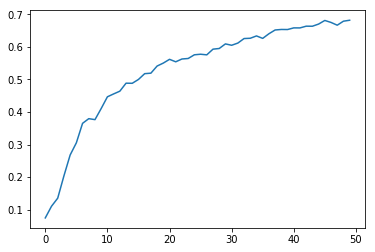

In [31]:
from matplotlib import pyplot as plt
from keras.callbacks import ModelCheckpoint  
modelSpec = get_model3()
checkpointer = ModelCheckpoint(filepath='./models/'+'modelSpec.h5', verbose=0)t
history=modelSpec.fit(X_train, y_train_hot, batch_size=10, epochs=50, verbose=verbose, validaion_data=(X_test, y_test_hot),callbacks=[checkpointer])
plt.plot(history.history['acc'])

In [38]:
y_predmod3 = model3.predict(X_test)
#y_pred = (y_pred > 0.5)
y_predmod3=np.argmax(y_predmod3,axis=1)
y_predmod3T= model3.predict(X_train)
y_predmod3T=np.argmax(y_predmod3T,axis=1)

In [37]:
model3.save('modelFinal3.h5');

In [39]:
def acc(y_true, y_pred):
    return np.equal(y_true,y_pred).mean()
print("Train accuracy: " + str(acc(y_train, y_predmod3T)))
print("Test accuracy : " + str(acc(y_test, y_predmod3)))

Train accuracy: 0.967353876037436
Test accuracy : 0.871813359427306


In [27]:
def predict(filepath, model):
    sample = wav2mfcc(filepath)
    sample_reshaped = sample.reshape(1, 40, 22, channel)
    print(model.predict(sample_reshaped))
    #print(get_labels()[0])
    return get_labels()[0][
            np.argmax(model.predict(sample_reshaped))
    ]

In [57]:
from keras.models import load_model
model3H=load_model('./models/model3H.h5')
from preprocess import *
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras import metrics
from keras.models import load_model
feature_dim_1 = 40
channel = 1
epochs = 30
batch_size = 30
verbose = 1
num_classes = 30
feature_dim_2 =32

In [32]:
print(predict('./test/bed/00f0204f_nohash_0.wav', model=model3H8))

[[2.4335860e-01 5.2453579e-06 7.3902136e-01 7.0699178e-05 1.9987649e-03
  8.6021163e-03 3.7683903e-03 2.8712900e-06 4.5627974e-05 3.1262273e-03]]
cat


In [ ]:
print(predict('./test/no.wav', model=model3))

In [17]:
%load_ext autoreload
%autoreload 2

from preprocess import *
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras import metrics
from keras.models import load_model
feature_dim_1 = 40
feature_dim_2 = 1000
channel = 1
epochs = 30
batch_size = 30
verbose = 1
num_classes = 30
model3=load_model('model3.h5')
print(predict('./data/cat/testcat.wav', model=model3))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
48000
./data/cat/testcat.wav
30
six


In [93]:
print(predict('./test/test.wav', model=modelLessTr))  

./test/test.wav
30
marvin


In [34]:
print(predict('./test/one/okxotln2zj4p6pccu11qj.wav', model=modelSpec))

[[0.00956664 0.00047873 0.00450239 0.00096532 0.00554117 0.09607369
  0.00654126 0.04812859 0.01626639 0.00136389 0.00138598 0.01530157
  0.00032286 0.00207691 0.00491569 0.04764513 0.02100251 0.01001009
  0.00616588 0.04292997 0.00142012 0.09914806 0.03977716 0.13807648
  0.00480816 0.273786   0.07601909 0.00069899 0.02257541 0.00250601]]
30
two


In [26]:
weight_save_callback = keras.callbacks.ModelCheckpoint('./weights.{epoch:02d}-{val_loss:.2f}.hdf5', monitor='val_loss', verbose=0, save_best_only=False, mode='auto')

In [31]:
model3.save_weights('model3.hdf5')

In [57]:
def get_model31():
    model31 = Sequential()
    model31.add(Conv2D(128, kernel_size=(2, 2),padding='same', input_shape=(feature_dim_1, feature_dim_2, channel)))
    model31.add(Conv2D(68, kernel_size=(2, 2),padding='same'))
    model31.add(MaxPooling2D(pool_size=(2, 2)))
    model31.add(Conv2D(256, kernel_size=(2, 2),padding='same'))
    model31.add(Conv2D(162, kernel_size=(2, 2),padding='same'))
    model31.add(Dropout(0.25))
    model31.add(MaxPooling2D(pool_size=(2, 2)))
    model31.add(Conv2D(80, kernel_size=(2, 2),padding='same'))
    model31.add(Conv2D(120, kernel_size=(2, 2),padding='same'))
    model31.add(MaxPooling2D(pool_size=(2,2)))
    model31.add(Flatten())
    model31.add(Dropout(0.3))
    model31.add(Dense(128, activation='sigmoid'))
    model31.add(Dense(30, activation='softmax'))
    model31.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(lr=0.1),
                  metrics=[metrics.categorical_accuracy])
    return model31


In [59]:
from matplotlib import pyplot as plt
from keras.callbacks import ModelCheckpoint  
model31 = get_model31()
checkpointer = ModelCheckpoint(filepath='./test/'+'model.h5', verbose=0)
history=model31.fit(X_train, y_train_hot, batch_size=30, epochs=35, verbose=verbose, validation_data=(X_test, y_test_hot),callbacks=[checkpointer])
plt.plot(history.history['val_categorical_accuracy'])

ValueError: Error when checking target: expected dense_80 to have shape (30,) but got array with shape (13,)

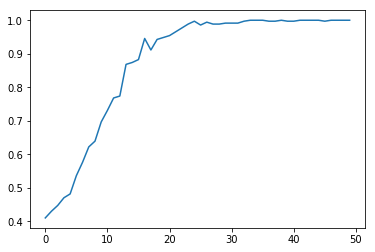

In [19]:
plt.plot(history.history['categorical_accuracy'])

In [ ]:
from matplotlib import pyplot as plt
from keras.callbacks import ModelCheckpoint  
modelLessTr = get_model31()
checkpointer = ModelCheckpoint(filepath='./test/'+'modelLessTr.h5', verbose=0)
history=modelLessTr.fit(X_train, y_train_hot, batch_size=30, epochs=20, verbose=verbose, validation_data=(X_test, y_test_hot),callbacks=[checkpointer])
plt.plot(history.history['val_categorical_accuracy'])

Train on 45304 samples, validate on 19417 samples
Epoch 1/20


 4050/45304 [=>............................] - ETA: 1:24:25 - loss: 3.3831 - categorical_accuracy: 0.100 - ETA: 1:14:05 - loss: 3.4437 - categorical_accuracy: 0.083 - ETA: 1:11:42 - loss: 3.4619 - categorical_accuracy: 0.066 - ETA: 1:10:25 - loss: 3.4520 - categorical_accuracy: 0.066 - ETA: 1:09:18 - loss: 3.4876 - categorical_accuracy: 0.060 - ETA: 1:08:35 - loss: 3.4945 - categorical_accuracy: 0.055 - ETA: 1:08:22 - loss: 3.4843 - categorical_accuracy: 0.057 - ETA: 1:08:04 - loss: 3.4804 - categorical_accuracy: 0.050 - ETA: 1:07:47 - loss: 3.4812 - categorical_accuracy: 0.051 - ETA: 1:07:26 - loss: 3.4888 - categorical_accuracy: 0.046 - ETA: 1:07:09 - loss: 3.4918 - categorical_accuracy: 0.045 - ETA: 1:06:48 - loss: 3.4943 - categorical_accuracy: 0.044 - ETA: 1:06:33 - loss: 3.4880 - categorical_accuracy: 0.043 - ETA: 1:06:22 - loss: 3.4869 - categorical_accuracy: 0.042 - ETA: 1:06:09 - loss: 3.4889 - categorical_accuracy: 0.040 - ETA: 1:05:59 - loss: 3.4858 - categorical_accuracy: 0

 4080/45304 [=>............................] - ETA: 1:06:16 - loss: 3.2056 - categorical_accuracy: 0.066 - ETA: 1:05:28 - loss: 3.2209 - categorical_accuracy: 0.083 - ETA: 1:05:04 - loss: 3.2116 - categorical_accuracy: 0.088 - ETA: 1:04:59 - loss: 3.2356 - categorical_accuracy: 0.091 - ETA: 1:05:05 - loss: 3.2479 - categorical_accuracy: 0.080 - ETA: 1:05:01 - loss: 3.2482 - categorical_accuracy: 0.077 - ETA: 1:04:54 - loss: 3.2579 - categorical_accuracy: 0.066 - ETA: 1:04:52 - loss: 3.2555 - categorical_accuracy: 0.075 - ETA: 1:04:40 - loss: 3.2517 - categorical_accuracy: 0.074 - ETA: 1:04:30 - loss: 3.2447 - categorical_accuracy: 0.076 - ETA: 1:04:56 - loss: 3.2453 - categorical_accuracy: 0.072 - ETA: 1:04:55 - loss: 3.2424 - categorical_accuracy: 0.069 - ETA: 1:04:56 - loss: 3.2389 - categorical_accuracy: 0.071 - ETA: 1:04:55 - loss: 3.2374 - categorical_accuracy: 0.078 - ETA: 1:04:49 - loss: 3.2386 - categorical_accuracy: 0.077 - ETA: 1:04:47 - loss: 3.2393 - categorical_accuracy: 0

45304/45304 [==============================] - ETA: 4:27 - loss: 3.0226 - categorical_accuracy: 0.13 - ETA: 4:24 - loss: 3.0224 - categorical_accuracy: 0.13 - ETA: 4:21 - loss: 3.0222 - categorical_accuracy: 0.13 - ETA: 4:19 - loss: 3.0220 - categorical_accuracy: 0.13 - ETA: 4:16 - loss: 3.0218 - categorical_accuracy: 0.13 - ETA: 4:13 - loss: 3.0216 - categorical_accuracy: 0.13 - ETA: 4:11 - loss: 3.0214 - categorical_accuracy: 0.13 - ETA: 4:08 - loss: 3.0213 - categorical_accuracy: 0.13 - ETA: 4:05 - loss: 3.0211 - categorical_accuracy: 0.13 - ETA: 4:03 - loss: 3.0209 - categorical_accuracy: 0.13 - ETA: 4:00 - loss: 3.0208 - categorical_accuracy: 0.13 - ETA: 3:57 - loss: 3.0205 - categorical_accuracy: 0.13 - ETA: 3:55 - loss: 3.0204 - categorical_accuracy: 0.13 - ETA: 3:52 - loss: 3.0202 - categorical_accuracy: 0.13 - ETA: 3:49 - loss: 3.0202 - categorical_accuracy: 0.13 - ETA: 3:47 - loss: 3.0200 - categorical_accuracy: 0.13 - ETA: 3:44 - loss: 3.0197 - categorical_accuracy: 0.13 - E

In [107]:
def get_model():
    model = Sequential()
    model.add(Conv2D(16, kernel_size=(3, 3),padding='same', input_shape=(feature_dim_1, feature_dim_2, channel)))
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Conv2D(32, kernel_size=(3, 3),padding='same'))
    model.add(Conv2D(32, kernel_size=(3, 3),padding='same'))
    model.add(Conv2D(64, kernel_size=(3, 3),padding='same'))
    model.add(Conv2D(64, kernel_size=(3, 3),padding='same'))
    model.add(Conv2D(128, kernel_size=(3, 3),padding='same'))
    model.add(Conv2D(128, kernel_size=(3, 3),padding='same'))
    model.add(Conv2D(512, kernel_size=(3, 3),padding='same'))
    model.add(Conv2D(512, kernel_size=(3, 3),padding='same'))
    model.add(Conv2D(1024, kernel_size=(3, 3),padding='same'))
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Flatten()) 
    model.add(Dropout(0.25))
    model.add(Dense(1024, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(30, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(lr=0.01),
                  metrics=[metrics.categorical_accuracy])
    return model

In [13]:
plt.plot(history.history['val_categorical_accuracy'])

NameError: name 'history' is not defined

In [118]:
def get_model3H():
    model3 = Sequential()
    model3.add(Conv2D(16, kernel_size=(2, 2),padding='same', input_shape=(feature_dim_1, feature_dim_2, channel)))
    model3.add(Conv2D(32, kernel_size=(2, 2),padding='same'))
    model3.add(MaxPooling2D(pool_size=(2, 2)))
    model3.add(Conv2D(64, kernel_size=(2, 2),padding='same'))
    model3.add(Conv2D(128, kernel_size=(2, 2),padding='same'))
    model3.add(Dropout(0.25))
    model3.add(MaxPooling2D(pool_size=(2, 2)))
    model3.add(Conv2D(256, kernel_size=(2, 2),padding='same'))
    model3.add(Conv2D(512, kernel_size=(2, 2),padding='same'))
    model3.add(MaxPooling2D(pool_size=(2,2)))
    model3.add(Flatten()) 
    model3.add(Dense(128, activation='relu'))
    model3.add(Dense(64, activation='relu'))
    model3.add(Dropout(0.25))
    model3.add(Dense(48, activation='relu'))
    model3.add(Dense(30, activation='softmax'))
    model3.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(lr=0.01),
                  metrics=[metrics.categorical_accuracy])
    return model3

Train on 13802 samples, validate on 13802 samples
Epoch 1/10


 1450/13802 [==>...........................] - ETA: 27:29 - loss: 3.7096 - categorical_accuracy: 0.0000e+0 - ETA: 14:48 - loss: 3.6537 - categorical_accuracy: 0.0500    - ETA: 10:32 - loss: 3.6035 - categorical_accuracy: 0.100 - ETA: 8:25 - loss: 3.5482 - categorical_accuracy: 0.125 - ETA: 7:09 - loss: 3.6320 - categorical_accuracy: 0.10 - ETA: 6:17 - loss: 3.6195 - categorical_accuracy: 0.11 - ETA: 5:40 - loss: 3.6116 - categorical_accuracy: 0.11 - ETA: 5:12 - loss: 3.6363 - categorical_accuracy: 0.11 - ETA: 4:51 - loss: 3.6276 - categorical_accuracy: 0.10 - ETA: 4:33 - loss: 3.5996 - categorical_accuracy: 0.10 - ETA: 4:19 - loss: 3.5844 - categorical_accuracy: 0.09 - ETA: 4:08 - loss: 3.5791 - categorical_accuracy: 0.08 - ETA: 3:58 - loss: 3.5782 - categorical_accuracy: 0.08 - ETA: 3:49 - loss: 3.5856 - categorical_accuracy: 0.07 - ETA: 3:43 - loss: 3.6052 - categorical_accuracy: 0.07 - ETA: 3:37 - loss: 3.6263 - categorical_accuracy: 0.06 - ETA: 3:31 - loss: 3.6164 - categorical_acc

 8750/13802 [==================>...........] - ETA: 1:01 - loss: 3.3812 - categorical_accuracy: 0.06 - ETA: 1:01 - loss: 3.3808 - categorical_accuracy: 0.06 - ETA: 1:01 - loss: 3.3808 - categorical_accuracy: 0.06 - ETA: 1:00 - loss: 3.3807 - categorical_accuracy: 0.06 - ETA: 1:00 - loss: 3.3805 - categorical_accuracy: 0.06 - ETA: 1:00 - loss: 3.3803 - categorical_accuracy: 0.06 - ETA: 1:00 - loss: 3.3802 - categorical_accuracy: 0.06 - ETA: 1:00 - loss: 3.3803 - categorical_accuracy: 0.06 - ETA: 1:00 - loss: 3.3802 - categorical_accuracy: 0.06 - ETA: 1:00 - loss: 3.3796 - categorical_accuracy: 0.06 - ETA: 1:00 - loss: 3.3797 - categorical_accuracy: 0.06 - ETA: 1:00 - loss: 3.3798 - categorical_accuracy: 0.06 - ETA: 1:00 - loss: 3.3799 - categorical_accuracy: 0.06 - ETA: 1:00 - loss: 3.3798 - categorical_accuracy: 0.06 - ETA: 1:00 - loss: 3.3799 - categorical_accuracy: 0.06 - ETA: 59s - loss: 3.3798 - categorical_accuracy: 0.0608 - ETA: 59s - loss: 3.3796 - categorical_accuracy: 0.060 - 

10210/13802 [=====================>........] - ETA: 47s - loss: 3.3667 - categorical_accuracy: 0.064 - ETA: 47s - loss: 3.3666 - categorical_accuracy: 0.064 - ETA: 47s - loss: 3.3664 - categorical_accuracy: 0.064 - ETA: 47s - loss: 3.3663 - categorical_accuracy: 0.065 - ETA: 47s - loss: 3.3663 - categorical_accuracy: 0.065 - ETA: 47s - loss: 3.3663 - categorical_accuracy: 0.064 - ETA: 46s - loss: 3.3661 - categorical_accuracy: 0.065 - ETA: 46s - loss: 3.3660 - categorical_accuracy: 0.064 - ETA: 46s - loss: 3.3657 - categorical_accuracy: 0.065 - ETA: 46s - loss: 3.3657 - categorical_accuracy: 0.065 - ETA: 46s - loss: 3.3657 - categorical_accuracy: 0.065 - ETA: 46s - loss: 3.3654 - categorical_accuracy: 0.065 - ETA: 46s - loss: 3.3650 - categorical_accuracy: 0.065 - ETA: 46s - loss: 3.3649 - categorical_accuracy: 0.065 - ETA: 46s - loss: 3.3647 - categorical_accuracy: 0.065 - ETA: 46s - loss: 3.3648 - categorical_accuracy: 0.065 - ETA: 45s - loss: 3.3644 - categorical_accuracy: 0.065 - E

11670/13802 [========================>.....] - ETA: 33s - loss: 3.3532 - categorical_accuracy: 0.067 - ETA: 33s - loss: 3.3528 - categorical_accuracy: 0.067 - ETA: 33s - loss: 3.3525 - categorical_accuracy: 0.067 - ETA: 33s - loss: 3.3523 - categorical_accuracy: 0.067 - ETA: 33s - loss: 3.3522 - categorical_accuracy: 0.067 - ETA: 32s - loss: 3.3520 - categorical_accuracy: 0.067 - ETA: 32s - loss: 3.3520 - categorical_accuracy: 0.067 - ETA: 32s - loss: 3.3521 - categorical_accuracy: 0.067 - ETA: 32s - loss: 3.3518 - categorical_accuracy: 0.068 - ETA: 32s - loss: 3.3519 - categorical_accuracy: 0.067 - ETA: 32s - loss: 3.3519 - categorical_accuracy: 0.067 - ETA: 32s - loss: 3.3516 - categorical_accuracy: 0.068 - ETA: 32s - loss: 3.3514 - categorical_accuracy: 0.068 - ETA: 32s - loss: 3.3510 - categorical_accuracy: 0.068 - ETA: 32s - loss: 3.3508 - categorical_accuracy: 0.068 - ETA: 32s - loss: 3.3505 - categorical_accuracy: 0.068 - ETA: 31s - loss: 3.3507 - categorical_accuracy: 0.068 - E

13140/13802 [===========================>..] - ETA: 19s - loss: 3.3364 - categorical_accuracy: 0.071 - ETA: 19s - loss: 3.3361 - categorical_accuracy: 0.071 - ETA: 19s - loss: 3.3358 - categorical_accuracy: 0.071 - ETA: 19s - loss: 3.3356 - categorical_accuracy: 0.071 - ETA: 19s - loss: 3.3353 - categorical_accuracy: 0.071 - ETA: 19s - loss: 3.3352 - categorical_accuracy: 0.071 - ETA: 19s - loss: 3.3352 - categorical_accuracy: 0.071 - ETA: 19s - loss: 3.3350 - categorical_accuracy: 0.071 - ETA: 18s - loss: 3.3348 - categorical_accuracy: 0.071 - ETA: 18s - loss: 3.3350 - categorical_accuracy: 0.071 - ETA: 18s - loss: 3.3348 - categorical_accuracy: 0.072 - ETA: 18s - loss: 3.3348 - categorical_accuracy: 0.072 - ETA: 18s - loss: 3.3348 - categorical_accuracy: 0.072 - ETA: 18s - loss: 3.3345 - categorical_accuracy: 0.072 - ETA: 18s - loss: 3.3344 - categorical_accuracy: 0.072 - ETA: 18s - loss: 3.3344 - categorical_accuracy: 0.072 - ETA: 18s - loss: 3.3343 - categorical_accuracy: 0.072 - E

13802/13802 [==============================] - ETA: 6s - loss: 3.3221 - categorical_accuracy: 0.07 - ETA: 5s - loss: 3.3220 - categorical_accuracy: 0.07 - ETA: 5s - loss: 3.3219 - categorical_accuracy: 0.07 - ETA: 5s - loss: 3.3220 - categorical_accuracy: 0.07 - ETA: 5s - loss: 3.3219 - categorical_accuracy: 0.07 - ETA: 5s - loss: 3.3216 - categorical_accuracy: 0.07 - ETA: 5s - loss: 3.3214 - categorical_accuracy: 0.07 - ETA: 5s - loss: 3.3213 - categorical_accuracy: 0.07 - ETA: 5s - loss: 3.3212 - categorical_accuracy: 0.07 - ETA: 5s - loss: 3.3210 - categorical_accuracy: 0.07 - ETA: 5s - loss: 3.3207 - categorical_accuracy: 0.07 - ETA: 5s - loss: 3.3206 - categorical_accuracy: 0.07 - ETA: 4s - loss: 3.3207 - categorical_accuracy: 0.07 - ETA: 4s - loss: 3.3204 - categorical_accuracy: 0.07 - ETA: 4s - loss: 3.3205 - categorical_accuracy: 0.07 - ETA: 4s - loss: 3.3203 - categorical_accuracy: 0.07 - ETA: 4s - loss: 3.3206 - categorical_accuracy: 0.07 - ETA: 4s - loss: 3.3205 - categorica

 1460/13802 [==>...........................] - ETA: 2:08 - loss: 3.2872 - categorical_accuracy: 0.0000e+ - ETA: 2:03 - loss: 3.2623 - categorical_accuracy: 0.0500   - ETA: 2:01 - loss: 3.2386 - categorical_accuracy: 0.06 - ETA: 2:02 - loss: 3.1231 - categorical_accuracy: 0.10 - ETA: 2:02 - loss: 3.1401 - categorical_accuracy: 0.08 - ETA: 2:01 - loss: 3.1642 - categorical_accuracy: 0.08 - ETA: 2:02 - loss: 3.1076 - categorical_accuracy: 0.11 - ETA: 2:02 - loss: 3.0928 - categorical_accuracy: 0.10 - ETA: 2:02 - loss: 3.0731 - categorical_accuracy: 0.11 - ETA: 2:01 - loss: 3.1160 - categorical_accuracy: 0.10 - ETA: 2:02 - loss: 3.1040 - categorical_accuracy: 0.10 - ETA: 2:02 - loss: 3.1120 - categorical_accuracy: 0.10 - ETA: 2:02 - loss: 3.1287 - categorical_accuracy: 0.10 - ETA: 2:04 - loss: 3.1402 - categorical_accuracy: 0.10 - ETA: 2:03 - loss: 3.1198 - categorical_accuracy: 0.10 - ETA: 2:03 - loss: 3.1263 - categorical_accuracy: 0.10 - ETA: 2:03 - loss: 3.1305 - categorical_accuracy: 

 8760/13802 [==================>...........] - ETA: 58s - loss: 3.1020 - categorical_accuracy: 0.123 - ETA: 58s - loss: 3.1021 - categorical_accuracy: 0.123 - ETA: 58s - loss: 3.1019 - categorical_accuracy: 0.123 - ETA: 58s - loss: 3.1016 - categorical_accuracy: 0.123 - ETA: 58s - loss: 3.1016 - categorical_accuracy: 0.123 - ETA: 58s - loss: 3.1014 - categorical_accuracy: 0.123 - ETA: 58s - loss: 3.1015 - categorical_accuracy: 0.122 - ETA: 58s - loss: 3.1012 - categorical_accuracy: 0.122 - ETA: 58s - loss: 3.1015 - categorical_accuracy: 0.122 - ETA: 58s - loss: 3.1014 - categorical_accuracy: 0.123 - ETA: 58s - loss: 3.1016 - categorical_accuracy: 0.122 - ETA: 57s - loss: 3.1025 - categorical_accuracy: 0.122 - ETA: 57s - loss: 3.1022 - categorical_accuracy: 0.122 - ETA: 57s - loss: 3.1017 - categorical_accuracy: 0.122 - ETA: 57s - loss: 3.1015 - categorical_accuracy: 0.122 - ETA: 57s - loss: 3.1017 - categorical_accuracy: 0.122 - ETA: 57s - loss: 3.1015 - categorical_accuracy: 0.122 - E

10220/13802 [=====================>........] - ETA: 45s - loss: 3.0841 - categorical_accuracy: 0.127 - ETA: 45s - loss: 3.0841 - categorical_accuracy: 0.127 - ETA: 45s - loss: 3.0840 - categorical_accuracy: 0.127 - ETA: 45s - loss: 3.0838 - categorical_accuracy: 0.128 - ETA: 45s - loss: 3.0841 - categorical_accuracy: 0.127 - ETA: 45s - loss: 3.0840 - categorical_accuracy: 0.128 - ETA: 45s - loss: 3.0844 - categorical_accuracy: 0.127 - ETA: 45s - loss: 3.0846 - categorical_accuracy: 0.127 - ETA: 44s - loss: 3.0844 - categorical_accuracy: 0.127 - ETA: 44s - loss: 3.0837 - categorical_accuracy: 0.128 - ETA: 44s - loss: 3.0839 - categorical_accuracy: 0.128 - ETA: 44s - loss: 3.0841 - categorical_accuracy: 0.128 - ETA: 44s - loss: 3.0840 - categorical_accuracy: 0.128 - ETA: 44s - loss: 3.0839 - categorical_accuracy: 0.128 - ETA: 44s - loss: 3.0836 - categorical_accuracy: 0.128 - ETA: 44s - loss: 3.0830 - categorical_accuracy: 0.128 - ETA: 44s - loss: 3.0832 - categorical_accuracy: 0.128 - E

11680/13802 [========================>.....] - ETA: 32s - loss: 3.0704 - categorical_accuracy: 0.132 - ETA: 32s - loss: 3.0700 - categorical_accuracy: 0.132 - ETA: 32s - loss: 3.0694 - categorical_accuracy: 0.132 - ETA: 32s - loss: 3.0694 - categorical_accuracy: 0.132 - ETA: 31s - loss: 3.0694 - categorical_accuracy: 0.132 - ETA: 31s - loss: 3.0692 - categorical_accuracy: 0.132 - ETA: 31s - loss: 3.0692 - categorical_accuracy: 0.132 - ETA: 31s - loss: 3.0690 - categorical_accuracy: 0.132 - ETA: 31s - loss: 3.0694 - categorical_accuracy: 0.132 - ETA: 31s - loss: 3.0695 - categorical_accuracy: 0.132 - ETA: 31s - loss: 3.0698 - categorical_accuracy: 0.132 - ETA: 31s - loss: 3.0698 - categorical_accuracy: 0.132 - ETA: 31s - loss: 3.0700 - categorical_accuracy: 0.131 - ETA: 31s - loss: 3.0700 - categorical_accuracy: 0.131 - ETA: 31s - loss: 3.0695 - categorical_accuracy: 0.132 - ETA: 30s - loss: 3.0691 - categorical_accuracy: 0.132 - ETA: 30s - loss: 3.0692 - categorical_accuracy: 0.132 - E

13160/13802 [===========================>..] - ETA: 19s - loss: 3.0567 - categorical_accuracy: 0.135 - ETA: 19s - loss: 3.0566 - categorical_accuracy: 0.135 - ETA: 18s - loss: 3.0566 - categorical_accuracy: 0.135 - ETA: 18s - loss: 3.0568 - categorical_accuracy: 0.135 - ETA: 18s - loss: 3.0565 - categorical_accuracy: 0.135 - ETA: 18s - loss: 3.0567 - categorical_accuracy: 0.135 - ETA: 18s - loss: 3.0564 - categorical_accuracy: 0.135 - ETA: 18s - loss: 3.0566 - categorical_accuracy: 0.135 - ETA: 18s - loss: 3.0565 - categorical_accuracy: 0.135 - ETA: 18s - loss: 3.0561 - categorical_accuracy: 0.136 - ETA: 18s - loss: 3.0557 - categorical_accuracy: 0.136 - ETA: 18s - loss: 3.0556 - categorical_accuracy: 0.136 - ETA: 18s - loss: 3.0552 - categorical_accuracy: 0.136 - ETA: 17s - loss: 3.0552 - categorical_accuracy: 0.136 - ETA: 17s - loss: 3.0551 - categorical_accuracy: 0.136 - ETA: 17s - loss: 3.0549 - categorical_accuracy: 0.136 - ETA: 17s - loss: 3.0548 - categorical_accuracy: 0.136 - E

13802/13802 [==============================] - ETA: 5s - loss: 3.0421 - categorical_accuracy: 0.14 - ETA: 5s - loss: 3.0418 - categorical_accuracy: 0.14 - ETA: 5s - loss: 3.0416 - categorical_accuracy: 0.14 - ETA: 5s - loss: 3.0418 - categorical_accuracy: 0.14 - ETA: 5s - loss: 3.0414 - categorical_accuracy: 0.14 - ETA: 5s - loss: 3.0411 - categorical_accuracy: 0.14 - ETA: 5s - loss: 3.0415 - categorical_accuracy: 0.14 - ETA: 5s - loss: 3.0416 - categorical_accuracy: 0.14 - ETA: 4s - loss: 3.0415 - categorical_accuracy: 0.14 - ETA: 4s - loss: 3.0418 - categorical_accuracy: 0.14 - ETA: 4s - loss: 3.0413 - categorical_accuracy: 0.14 - ETA: 4s - loss: 3.0411 - categorical_accuracy: 0.14 - ETA: 4s - loss: 3.0413 - categorical_accuracy: 0.14 - ETA: 4s - loss: 3.0410 - categorical_accuracy: 0.14 - ETA: 4s - loss: 3.0411 - categorical_accuracy: 0.14 - ETA: 4s - loss: 3.0410 - categorical_accuracy: 0.14 - ETA: 4s - loss: 3.0413 - categorical_accuracy: 0.14 - ETA: 4s - loss: 3.0412 - categorica

 1460/13802 [==>...........................] - ETA: 1:59 - loss: 2.9978 - categorical_accuracy: 0.10 - ETA: 2:00 - loss: 2.7803 - categorical_accuracy: 0.20 - ETA: 1:59 - loss: 2.8373 - categorical_accuracy: 0.16 - ETA: 2:00 - loss: 2.8693 - categorical_accuracy: 0.17 - ETA: 1:59 - loss: 2.8318 - categorical_accuracy: 0.18 - ETA: 1:59 - loss: 2.7977 - categorical_accuracy: 0.18 - ETA: 1:59 - loss: 2.7939 - categorical_accuracy: 0.18 - ETA: 1:59 - loss: 2.8340 - categorical_accuracy: 0.17 - ETA: 1:58 - loss: 2.8459 - categorical_accuracy: 0.16 - ETA: 1:58 - loss: 2.8277 - categorical_accuracy: 0.16 - ETA: 1:58 - loss: 2.7950 - categorical_accuracy: 0.17 - ETA: 1:58 - loss: 2.8118 - categorical_accuracy: 0.16 - ETA: 1:58 - loss: 2.8512 - categorical_accuracy: 0.15 - ETA: 1:58 - loss: 2.8651 - categorical_accuracy: 0.14 - ETA: 1:58 - loss: 2.8782 - categorical_accuracy: 0.14 - ETA: 1:58 - loss: 2.8691 - categorical_accuracy: 0.14 - ETA: 1:59 - loss: 2.8672 - categorical_accuracy: 0.14 - E

 8760/13802 [==================>...........] - ETA: 58s - loss: 2.8444 - categorical_accuracy: 0.177 - ETA: 58s - loss: 2.8447 - categorical_accuracy: 0.177 - ETA: 58s - loss: 2.8447 - categorical_accuracy: 0.177 - ETA: 58s - loss: 2.8448 - categorical_accuracy: 0.177 - ETA: 58s - loss: 2.8447 - categorical_accuracy: 0.177 - ETA: 57s - loss: 2.8447 - categorical_accuracy: 0.177 - ETA: 57s - loss: 2.8448 - categorical_accuracy: 0.177 - ETA: 57s - loss: 2.8453 - categorical_accuracy: 0.177 - ETA: 57s - loss: 2.8451 - categorical_accuracy: 0.177 - ETA: 57s - loss: 2.8451 - categorical_accuracy: 0.177 - ETA: 57s - loss: 2.8454 - categorical_accuracy: 0.177 - ETA: 57s - loss: 2.8451 - categorical_accuracy: 0.177 - ETA: 57s - loss: 2.8449 - categorical_accuracy: 0.177 - ETA: 57s - loss: 2.8444 - categorical_accuracy: 0.177 - ETA: 57s - loss: 2.8434 - categorical_accuracy: 0.178 - ETA: 57s - loss: 2.8431 - categorical_accuracy: 0.178 - ETA: 57s - loss: 2.8430 - categorical_accuracy: 0.178 - E

10220/13802 [=====================>........] - ETA: 45s - loss: 2.8353 - categorical_accuracy: 0.182 - ETA: 45s - loss: 2.8355 - categorical_accuracy: 0.182 - ETA: 45s - loss: 2.8353 - categorical_accuracy: 0.182 - ETA: 45s - loss: 2.8358 - categorical_accuracy: 0.182 - ETA: 44s - loss: 2.8353 - categorical_accuracy: 0.182 - ETA: 44s - loss: 2.8353 - categorical_accuracy: 0.182 - ETA: 44s - loss: 2.8354 - categorical_accuracy: 0.182 - ETA: 44s - loss: 2.8345 - categorical_accuracy: 0.183 - ETA: 44s - loss: 2.8342 - categorical_accuracy: 0.183 - ETA: 44s - loss: 2.8342 - categorical_accuracy: 0.183 - ETA: 44s - loss: 2.8345 - categorical_accuracy: 0.183 - ETA: 44s - loss: 2.8343 - categorical_accuracy: 0.182 - ETA: 44s - loss: 2.8344 - categorical_accuracy: 0.182 - ETA: 44s - loss: 2.8339 - categorical_accuracy: 0.182 - ETA: 44s - loss: 2.8340 - categorical_accuracy: 0.183 - ETA: 43s - loss: 2.8347 - categorical_accuracy: 0.183 - ETA: 43s - loss: 2.8350 - categorical_accuracy: 0.182 - E

11680/13802 [========================>.....] - ETA: 32s - loss: 2.8259 - categorical_accuracy: 0.189 - ETA: 32s - loss: 2.8256 - categorical_accuracy: 0.189 - ETA: 31s - loss: 2.8256 - categorical_accuracy: 0.189 - ETA: 31s - loss: 2.8258 - categorical_accuracy: 0.189 - ETA: 31s - loss: 2.8258 - categorical_accuracy: 0.189 - ETA: 31s - loss: 2.8261 - categorical_accuracy: 0.189 - ETA: 31s - loss: 2.8261 - categorical_accuracy: 0.189 - ETA: 31s - loss: 2.8258 - categorical_accuracy: 0.189 - ETA: 31s - loss: 2.8253 - categorical_accuracy: 0.189 - ETA: 31s - loss: 2.8249 - categorical_accuracy: 0.189 - ETA: 31s - loss: 2.8252 - categorical_accuracy: 0.189 - ETA: 31s - loss: 2.8252 - categorical_accuracy: 0.189 - ETA: 31s - loss: 2.8255 - categorical_accuracy: 0.189 - ETA: 30s - loss: 2.8255 - categorical_accuracy: 0.189 - ETA: 30s - loss: 2.8257 - categorical_accuracy: 0.189 - ETA: 30s - loss: 2.8253 - categorical_accuracy: 0.189 - ETA: 30s - loss: 2.8256 - categorical_accuracy: 0.189 - E

13160/13802 [===========================>..] - ETA: 19s - loss: 2.8176 - categorical_accuracy: 0.190 - ETA: 18s - loss: 2.8172 - categorical_accuracy: 0.190 - ETA: 18s - loss: 2.8171 - categorical_accuracy: 0.190 - ETA: 18s - loss: 2.8176 - categorical_accuracy: 0.190 - ETA: 18s - loss: 2.8173 - categorical_accuracy: 0.190 - ETA: 18s - loss: 2.8170 - categorical_accuracy: 0.190 - ETA: 18s - loss: 2.8170 - categorical_accuracy: 0.190 - ETA: 18s - loss: 2.8171 - categorical_accuracy: 0.190 - ETA: 18s - loss: 2.8165 - categorical_accuracy: 0.190 - ETA: 18s - loss: 2.8167 - categorical_accuracy: 0.190 - ETA: 18s - loss: 2.8166 - categorical_accuracy: 0.190 - ETA: 18s - loss: 2.8163 - categorical_accuracy: 0.190 - ETA: 18s - loss: 2.8162 - categorical_accuracy: 0.190 - ETA: 17s - loss: 2.8162 - categorical_accuracy: 0.190 - ETA: 17s - loss: 2.8165 - categorical_accuracy: 0.190 - ETA: 17s - loss: 2.8162 - categorical_accuracy: 0.190 - ETA: 17s - loss: 2.8160 - categorical_accuracy: 0.190 - E

13802/13802 [==============================] - ETA: 5s - loss: 2.8072 - categorical_accuracy: 0.19 - ETA: 5s - loss: 2.8072 - categorical_accuracy: 0.19 - ETA: 5s - loss: 2.8074 - categorical_accuracy: 0.19 - ETA: 5s - loss: 2.8077 - categorical_accuracy: 0.19 - ETA: 5s - loss: 2.8075 - categorical_accuracy: 0.19 - ETA: 5s - loss: 2.8075 - categorical_accuracy: 0.19 - ETA: 5s - loss: 2.8075 - categorical_accuracy: 0.19 - ETA: 5s - loss: 2.8073 - categorical_accuracy: 0.19 - ETA: 5s - loss: 2.8073 - categorical_accuracy: 0.19 - ETA: 4s - loss: 2.8072 - categorical_accuracy: 0.19 - ETA: 4s - loss: 2.8068 - categorical_accuracy: 0.19 - ETA: 4s - loss: 2.8067 - categorical_accuracy: 0.19 - ETA: 4s - loss: 2.8062 - categorical_accuracy: 0.19 - ETA: 4s - loss: 2.8059 - categorical_accuracy: 0.19 - ETA: 4s - loss: 2.8057 - categorical_accuracy: 0.19 - ETA: 4s - loss: 2.8052 - categorical_accuracy: 0.19 - ETA: 4s - loss: 2.8054 - categorical_accuracy: 0.19 - ETA: 4s - loss: 2.8054 - categorica

 1460/13802 [==>...........................] - ETA: 2:10 - loss: 3.1278 - categorical_accuracy: 0.0000e+ - ETA: 2:06 - loss: 2.6307 - categorical_accuracy: 0.2500   - ETA: 2:04 - loss: 2.7370 - categorical_accuracy: 0.26 - ETA: 2:02 - loss: 2.7767 - categorical_accuracy: 0.25 - ETA: 2:01 - loss: 2.6385 - categorical_accuracy: 0.28 - ETA: 2:01 - loss: 2.6472 - categorical_accuracy: 0.25 - ETA: 2:01 - loss: 2.6283 - categorical_accuracy: 0.25 - ETA: 2:00 - loss: 2.6478 - categorical_accuracy: 0.25 - ETA: 2:00 - loss: 2.5929 - categorical_accuracy: 0.26 - ETA: 2:00 - loss: 2.6059 - categorical_accuracy: 0.26 - ETA: 2:00 - loss: 2.6108 - categorical_accuracy: 0.26 - ETA: 2:00 - loss: 2.6378 - categorical_accuracy: 0.25 - ETA: 1:59 - loss: 2.6428 - categorical_accuracy: 0.23 - ETA: 2:00 - loss: 2.6306 - categorical_accuracy: 0.23 - ETA: 2:00 - loss: 2.6285 - categorical_accuracy: 0.23 - ETA: 1:59 - loss: 2.6151 - categorical_accuracy: 0.23 - ETA: 1:59 - loss: 2.5822 - categorical_accuracy: 

 8760/13802 [==================>...........] - ETA: 58s - loss: 2.6285 - categorical_accuracy: 0.238 - ETA: 58s - loss: 2.6290 - categorical_accuracy: 0.238 - ETA: 58s - loss: 2.6293 - categorical_accuracy: 0.238 - ETA: 58s - loss: 2.6299 - categorical_accuracy: 0.238 - ETA: 57s - loss: 2.6293 - categorical_accuracy: 0.239 - ETA: 57s - loss: 2.6286 - categorical_accuracy: 0.239 - ETA: 57s - loss: 2.6285 - categorical_accuracy: 0.239 - ETA: 57s - loss: 2.6280 - categorical_accuracy: 0.239 - ETA: 57s - loss: 2.6274 - categorical_accuracy: 0.240 - ETA: 57s - loss: 2.6276 - categorical_accuracy: 0.240 - ETA: 57s - loss: 2.6286 - categorical_accuracy: 0.239 - ETA: 57s - loss: 2.6284 - categorical_accuracy: 0.240 - ETA: 57s - loss: 2.6284 - categorical_accuracy: 0.240 - ETA: 57s - loss: 2.6286 - categorical_accuracy: 0.240 - ETA: 57s - loss: 2.6283 - categorical_accuracy: 0.240 - ETA: 56s - loss: 2.6292 - categorical_accuracy: 0.239 - ETA: 56s - loss: 2.6288 - categorical_accuracy: 0.240 - E

10220/13802 [=====================>........] - ETA: 45s - loss: 2.6215 - categorical_accuracy: 0.241 - ETA: 45s - loss: 2.6216 - categorical_accuracy: 0.241 - ETA: 44s - loss: 2.6212 - categorical_accuracy: 0.241 - ETA: 44s - loss: 2.6210 - categorical_accuracy: 0.240 - ETA: 44s - loss: 2.6210 - categorical_accuracy: 0.240 - ETA: 44s - loss: 2.6210 - categorical_accuracy: 0.240 - ETA: 44s - loss: 2.6206 - categorical_accuracy: 0.240 - ETA: 44s - loss: 2.6205 - categorical_accuracy: 0.240 - ETA: 44s - loss: 2.6206 - categorical_accuracy: 0.240 - ETA: 44s - loss: 2.6210 - categorical_accuracy: 0.240 - ETA: 44s - loss: 2.6211 - categorical_accuracy: 0.240 - ETA: 44s - loss: 2.6216 - categorical_accuracy: 0.240 - ETA: 44s - loss: 2.6215 - categorical_accuracy: 0.240 - ETA: 43s - loss: 2.6215 - categorical_accuracy: 0.240 - ETA: 43s - loss: 2.6214 - categorical_accuracy: 0.240 - ETA: 43s - loss: 2.6205 - categorical_accuracy: 0.241 - ETA: 43s - loss: 2.6202 - categorical_accuracy: 0.241 - E

11680/13802 [========================>.....] - ETA: 31s - loss: 2.6108 - categorical_accuracy: 0.243 - ETA: 31s - loss: 2.6111 - categorical_accuracy: 0.243 - ETA: 31s - loss: 2.6109 - categorical_accuracy: 0.243 - ETA: 31s - loss: 2.6104 - categorical_accuracy: 0.243 - ETA: 31s - loss: 2.6099 - categorical_accuracy: 0.244 - ETA: 31s - loss: 2.6104 - categorical_accuracy: 0.243 - ETA: 31s - loss: 2.6104 - categorical_accuracy: 0.243 - ETA: 31s - loss: 2.6106 - categorical_accuracy: 0.243 - ETA: 31s - loss: 2.6111 - categorical_accuracy: 0.243 - ETA: 31s - loss: 2.6110 - categorical_accuracy: 0.243 - ETA: 31s - loss: 2.6107 - categorical_accuracy: 0.243 - ETA: 30s - loss: 2.6108 - categorical_accuracy: 0.243 - ETA: 30s - loss: 2.6105 - categorical_accuracy: 0.243 - ETA: 30s - loss: 2.6104 - categorical_accuracy: 0.243 - ETA: 30s - loss: 2.6106 - categorical_accuracy: 0.243 - ETA: 30s - loss: 2.6109 - categorical_accuracy: 0.243 - ETA: 30s - loss: 2.6106 - categorical_accuracy: 0.243 - E

13160/13802 [===========================>..] - ETA: 18s - loss: 2.6094 - categorical_accuracy: 0.244 - ETA: 18s - loss: 2.6101 - categorical_accuracy: 0.244 - ETA: 18s - loss: 2.6099 - categorical_accuracy: 0.244 - ETA: 18s - loss: 2.6103 - categorical_accuracy: 0.244 - ETA: 18s - loss: 2.6105 - categorical_accuracy: 0.244 - ETA: 18s - loss: 2.6100 - categorical_accuracy: 0.244 - ETA: 18s - loss: 2.6098 - categorical_accuracy: 0.244 - ETA: 18s - loss: 2.6100 - categorical_accuracy: 0.244 - ETA: 18s - loss: 2.6102 - categorical_accuracy: 0.244 - ETA: 18s - loss: 2.6102 - categorical_accuracy: 0.244 - ETA: 17s - loss: 2.6103 - categorical_accuracy: 0.244 - ETA: 17s - loss: 2.6108 - categorical_accuracy: 0.244 - ETA: 17s - loss: 2.6106 - categorical_accuracy: 0.244 - ETA: 17s - loss: 2.6103 - categorical_accuracy: 0.244 - ETA: 17s - loss: 2.6105 - categorical_accuracy: 0.244 - ETA: 17s - loss: 2.6107 - categorical_accuracy: 0.244 - ETA: 17s - loss: 2.6105 - categorical_accuracy: 0.244 - E

13802/13802 [==============================] - ETA: 5s - loss: 2.5960 - categorical_accuracy: 0.24 - ETA: 5s - loss: 2.5960 - categorical_accuracy: 0.24 - ETA: 5s - loss: 2.5956 - categorical_accuracy: 0.24 - ETA: 5s - loss: 2.5954 - categorical_accuracy: 0.24 - ETA: 5s - loss: 2.5961 - categorical_accuracy: 0.24 - ETA: 5s - loss: 2.5958 - categorical_accuracy: 0.24 - ETA: 5s - loss: 2.5954 - categorical_accuracy: 0.24 - ETA: 5s - loss: 2.5954 - categorical_accuracy: 0.24 - ETA: 4s - loss: 2.5951 - categorical_accuracy: 0.24 - ETA: 4s - loss: 2.5955 - categorical_accuracy: 0.24 - ETA: 4s - loss: 2.5952 - categorical_accuracy: 0.24 - ETA: 4s - loss: 2.5954 - categorical_accuracy: 0.24 - ETA: 4s - loss: 2.5952 - categorical_accuracy: 0.24 - ETA: 4s - loss: 2.5955 - categorical_accuracy: 0.24 - ETA: 4s - loss: 2.5961 - categorical_accuracy: 0.24 - ETA: 4s - loss: 2.5960 - categorical_accuracy: 0.24 - ETA: 4s - loss: 2.5959 - categorical_accuracy: 0.24 - ETA: 4s - loss: 2.5958 - categorica

 1460/13802 [==>...........................] - ETA: 1:58 - loss: 2.7969 - categorical_accuracy: 0.30 - ETA: 2:01 - loss: 2.6183 - categorical_accuracy: 0.25 - ETA: 2:01 - loss: 2.6652 - categorical_accuracy: 0.30 - ETA: 2:00 - loss: 2.5470 - categorical_accuracy: 0.30 - ETA: 2:00 - loss: 2.5535 - categorical_accuracy: 0.28 - ETA: 2:00 - loss: 2.5148 - categorical_accuracy: 0.30 - ETA: 2:01 - loss: 2.5155 - categorical_accuracy: 0.28 - ETA: 2:00 - loss: 2.4994 - categorical_accuracy: 0.28 - ETA: 2:00 - loss: 2.5064 - categorical_accuracy: 0.27 - ETA: 2:00 - loss: 2.5193 - categorical_accuracy: 0.27 - ETA: 2:00 - loss: 2.5211 - categorical_accuracy: 0.27 - ETA: 2:00 - loss: 2.4708 - categorical_accuracy: 0.28 - ETA: 2:00 - loss: 2.4578 - categorical_accuracy: 0.29 - ETA: 2:00 - loss: 2.4646 - categorical_accuracy: 0.28 - ETA: 2:00 - loss: 2.4487 - categorical_accuracy: 0.30 - ETA: 2:00 - loss: 2.4580 - categorical_accuracy: 0.29 - ETA: 1:59 - loss: 2.4789 - categorical_accuracy: 0.28 - E

 8760/13802 [==================>...........] - ETA: 57s - loss: 2.4584 - categorical_accuracy: 0.286 - ETA: 57s - loss: 2.4591 - categorical_accuracy: 0.286 - ETA: 57s - loss: 2.4589 - categorical_accuracy: 0.286 - ETA: 57s - loss: 2.4586 - categorical_accuracy: 0.287 - ETA: 57s - loss: 2.4593 - categorical_accuracy: 0.287 - ETA: 57s - loss: 2.4598 - categorical_accuracy: 0.287 - ETA: 57s - loss: 2.4590 - categorical_accuracy: 0.287 - ETA: 56s - loss: 2.4595 - categorical_accuracy: 0.287 - ETA: 56s - loss: 2.4596 - categorical_accuracy: 0.287 - ETA: 56s - loss: 2.4594 - categorical_accuracy: 0.287 - ETA: 56s - loss: 2.4588 - categorical_accuracy: 0.287 - ETA: 56s - loss: 2.4589 - categorical_accuracy: 0.287 - ETA: 56s - loss: 2.4602 - categorical_accuracy: 0.286 - ETA: 56s - loss: 2.4598 - categorical_accuracy: 0.286 - ETA: 56s - loss: 2.4603 - categorical_accuracy: 0.286 - ETA: 56s - loss: 2.4603 - categorical_accuracy: 0.286 - ETA: 56s - loss: 2.4598 - categorical_accuracy: 0.286 - E

10220/13802 [=====================>........] - ETA: 44s - loss: 2.4551 - categorical_accuracy: 0.291 - ETA: 44s - loss: 2.4552 - categorical_accuracy: 0.290 - ETA: 44s - loss: 2.4556 - categorical_accuracy: 0.291 - ETA: 44s - loss: 2.4561 - categorical_accuracy: 0.290 - ETA: 44s - loss: 2.4557 - categorical_accuracy: 0.291 - ETA: 44s - loss: 2.4557 - categorical_accuracy: 0.291 - ETA: 44s - loss: 2.4547 - categorical_accuracy: 0.291 - ETA: 44s - loss: 2.4540 - categorical_accuracy: 0.291 - ETA: 43s - loss: 2.4541 - categorical_accuracy: 0.292 - ETA: 43s - loss: 2.4540 - categorical_accuracy: 0.292 - ETA: 43s - loss: 2.4531 - categorical_accuracy: 0.292 - ETA: 43s - loss: 2.4521 - categorical_accuracy: 0.292 - ETA: 43s - loss: 2.4523 - categorical_accuracy: 0.292 - ETA: 43s - loss: 2.4525 - categorical_accuracy: 0.292 - ETA: 43s - loss: 2.4531 - categorical_accuracy: 0.292 - ETA: 43s - loss: 2.4533 - categorical_accuracy: 0.292 - ETA: 43s - loss: 2.4531 - categorical_accuracy: 0.292 - E

11680/13802 [========================>.....] - ETA: 31s - loss: 2.4382 - categorical_accuracy: 0.294 - ETA: 31s - loss: 2.4383 - categorical_accuracy: 0.294 - ETA: 31s - loss: 2.4384 - categorical_accuracy: 0.294 - ETA: 31s - loss: 2.4387 - categorical_accuracy: 0.294 - ETA: 31s - loss: 2.4388 - categorical_accuracy: 0.294 - ETA: 31s - loss: 2.4387 - categorical_accuracy: 0.294 - ETA: 31s - loss: 2.4384 - categorical_accuracy: 0.295 - ETA: 31s - loss: 2.4391 - categorical_accuracy: 0.295 - ETA: 30s - loss: 2.4391 - categorical_accuracy: 0.295 - ETA: 30s - loss: 2.4389 - categorical_accuracy: 0.295 - ETA: 30s - loss: 2.4392 - categorical_accuracy: 0.294 - ETA: 30s - loss: 2.4393 - categorical_accuracy: 0.294 - ETA: 30s - loss: 2.4387 - categorical_accuracy: 0.295 - ETA: 30s - loss: 2.4390 - categorical_accuracy: 0.294 - ETA: 30s - loss: 2.4385 - categorical_accuracy: 0.295 - ETA: 30s - loss: 2.4385 - categorical_accuracy: 0.295 - ETA: 30s - loss: 2.4387 - categorical_accuracy: 0.295 - E

13160/13802 [===========================>..] - ETA: 18s - loss: 2.4264 - categorical_accuracy: 0.297 - ETA: 18s - loss: 2.4268 - categorical_accuracy: 0.297 - ETA: 18s - loss: 2.4269 - categorical_accuracy: 0.297 - ETA: 18s - loss: 2.4268 - categorical_accuracy: 0.297 - ETA: 18s - loss: 2.4266 - categorical_accuracy: 0.297 - ETA: 18s - loss: 2.4265 - categorical_accuracy: 0.297 - ETA: 18s - loss: 2.4262 - categorical_accuracy: 0.297 - ETA: 18s - loss: 2.4266 - categorical_accuracy: 0.297 - ETA: 18s - loss: 2.4263 - categorical_accuracy: 0.297 - ETA: 17s - loss: 2.4260 - categorical_accuracy: 0.297 - ETA: 17s - loss: 2.4261 - categorical_accuracy: 0.297 - ETA: 17s - loss: 2.4258 - categorical_accuracy: 0.297 - ETA: 17s - loss: 2.4256 - categorical_accuracy: 0.297 - ETA: 17s - loss: 2.4255 - categorical_accuracy: 0.297 - ETA: 17s - loss: 2.4253 - categorical_accuracy: 0.297 - ETA: 17s - loss: 2.4255 - categorical_accuracy: 0.297 - ETA: 17s - loss: 2.4259 - categorical_accuracy: 0.297 - E

13802/13802 [==============================] - ETA: 5s - loss: 2.4144 - categorical_accuracy: 0.29 - ETA: 5s - loss: 2.4142 - categorical_accuracy: 0.29 - ETA: 5s - loss: 2.4138 - categorical_accuracy: 0.29 - ETA: 5s - loss: 2.4136 - categorical_accuracy: 0.29 - ETA: 5s - loss: 2.4133 - categorical_accuracy: 0.29 - ETA: 5s - loss: 2.4137 - categorical_accuracy: 0.29 - ETA: 5s - loss: 2.4134 - categorical_accuracy: 0.29 - ETA: 4s - loss: 2.4129 - categorical_accuracy: 0.29 - ETA: 4s - loss: 2.4129 - categorical_accuracy: 0.29 - ETA: 4s - loss: 2.4131 - categorical_accuracy: 0.29 - ETA: 4s - loss: 2.4127 - categorical_accuracy: 0.29 - ETA: 4s - loss: 2.4121 - categorical_accuracy: 0.29 - ETA: 4s - loss: 2.4122 - categorical_accuracy: 0.29 - ETA: 4s - loss: 2.4120 - categorical_accuracy: 0.29 - ETA: 4s - loss: 2.4123 - categorical_accuracy: 0.29 - ETA: 4s - loss: 2.4126 - categorical_accuracy: 0.29 - ETA: 4s - loss: 2.4124 - categorical_accuracy: 0.29 - ETA: 4s - loss: 2.4121 - categorica

 1460/13802 [==>...........................] - ETA: 2:01 - loss: 1.8891 - categorical_accuracy: 0.40 - ETA: 2:03 - loss: 2.1553 - categorical_accuracy: 0.20 - ETA: 2:04 - loss: 2.0898 - categorical_accuracy: 0.30 - ETA: 2:06 - loss: 1.9834 - categorical_accuracy: 0.35 - ETA: 2:07 - loss: 2.0667 - categorical_accuracy: 0.32 - ETA: 2:09 - loss: 2.1157 - categorical_accuracy: 0.31 - ETA: 2:12 - loss: 2.0707 - categorical_accuracy: 0.38 - ETA: 2:11 - loss: 2.0368 - categorical_accuracy: 0.40 - ETA: 2:10 - loss: 2.0341 - categorical_accuracy: 0.41 - ETA: 2:09 - loss: 2.0056 - categorical_accuracy: 0.41 - ETA: 2:10 - loss: 2.0732 - categorical_accuracy: 0.40 - ETA: 2:09 - loss: 2.0550 - categorical_accuracy: 0.40 - ETA: 2:10 - loss: 2.0620 - categorical_accuracy: 0.39 - ETA: 2:11 - loss: 2.0685 - categorical_accuracy: 0.38 - ETA: 2:11 - loss: 2.1194 - categorical_accuracy: 0.37 - ETA: 2:11 - loss: 2.1212 - categorical_accuracy: 0.36 - ETA: 2:10 - loss: 2.1428 - categorical_accuracy: 0.35 - E

 8760/13802 [==================>...........] - ETA: 58s - loss: 2.2617 - categorical_accuracy: 0.339 - ETA: 58s - loss: 2.2619 - categorical_accuracy: 0.339 - ETA: 58s - loss: 2.2617 - categorical_accuracy: 0.339 - ETA: 58s - loss: 2.2618 - categorical_accuracy: 0.339 - ETA: 57s - loss: 2.2620 - categorical_accuracy: 0.338 - ETA: 57s - loss: 2.2622 - categorical_accuracy: 0.338 - ETA: 57s - loss: 2.2621 - categorical_accuracy: 0.338 - ETA: 57s - loss: 2.2627 - categorical_accuracy: 0.338 - ETA: 57s - loss: 2.2633 - categorical_accuracy: 0.338 - ETA: 57s - loss: 2.2630 - categorical_accuracy: 0.338 - ETA: 57s - loss: 2.2624 - categorical_accuracy: 0.337 - ETA: 57s - loss: 2.2625 - categorical_accuracy: 0.338 - ETA: 57s - loss: 2.2629 - categorical_accuracy: 0.338 - ETA: 57s - loss: 2.2631 - categorical_accuracy: 0.338 - ETA: 57s - loss: 2.2634 - categorical_accuracy: 0.337 - ETA: 56s - loss: 2.2648 - categorical_accuracy: 0.337 - ETA: 56s - loss: 2.2658 - categorical_accuracy: 0.337 - E

10220/13802 [=====================>........] - ETA: 45s - loss: 2.2586 - categorical_accuracy: 0.339 - ETA: 45s - loss: 2.2588 - categorical_accuracy: 0.339 - ETA: 44s - loss: 2.2590 - categorical_accuracy: 0.339 - ETA: 44s - loss: 2.2595 - categorical_accuracy: 0.339 - ETA: 44s - loss: 2.2592 - categorical_accuracy: 0.339 - ETA: 44s - loss: 2.2599 - categorical_accuracy: 0.339 - ETA: 44s - loss: 2.2597 - categorical_accuracy: 0.339 - ETA: 44s - loss: 2.2597 - categorical_accuracy: 0.339 - ETA: 44s - loss: 2.2598 - categorical_accuracy: 0.339 - ETA: 44s - loss: 2.2591 - categorical_accuracy: 0.339 - ETA: 44s - loss: 2.2596 - categorical_accuracy: 0.339 - ETA: 44s - loss: 2.2598 - categorical_accuracy: 0.339 - ETA: 44s - loss: 2.2601 - categorical_accuracy: 0.338 - ETA: 43s - loss: 2.2605 - categorical_accuracy: 0.339 - ETA: 43s - loss: 2.2603 - categorical_accuracy: 0.339 - ETA: 43s - loss: 2.2602 - categorical_accuracy: 0.339 - ETA: 43s - loss: 2.2601 - categorical_accuracy: 0.339 - E

11680/13802 [========================>.....] - ETA: 32s - loss: 2.2510 - categorical_accuracy: 0.344 - ETA: 31s - loss: 2.2506 - categorical_accuracy: 0.344 - ETA: 31s - loss: 2.2506 - categorical_accuracy: 0.344 - ETA: 31s - loss: 2.2505 - categorical_accuracy: 0.344 - ETA: 31s - loss: 2.2497 - categorical_accuracy: 0.344 - ETA: 31s - loss: 2.2494 - categorical_accuracy: 0.344 - ETA: 31s - loss: 2.2490 - categorical_accuracy: 0.344 - ETA: 31s - loss: 2.2486 - categorical_accuracy: 0.344 - ETA: 31s - loss: 2.2488 - categorical_accuracy: 0.344 - ETA: 31s - loss: 2.2487 - categorical_accuracy: 0.344 - ETA: 31s - loss: 2.2486 - categorical_accuracy: 0.344 - ETA: 31s - loss: 2.2486 - categorical_accuracy: 0.344 - ETA: 30s - loss: 2.2489 - categorical_accuracy: 0.344 - ETA: 30s - loss: 2.2492 - categorical_accuracy: 0.344 - ETA: 30s - loss: 2.2491 - categorical_accuracy: 0.344 - ETA: 30s - loss: 2.2484 - categorical_accuracy: 0.344 - ETA: 30s - loss: 2.2487 - categorical_accuracy: 0.344 - E

13160/13802 [===========================>..] - ETA: 18s - loss: 2.2490 - categorical_accuracy: 0.345 - ETA: 18s - loss: 2.2491 - categorical_accuracy: 0.345 - ETA: 18s - loss: 2.2491 - categorical_accuracy: 0.345 - ETA: 18s - loss: 2.2488 - categorical_accuracy: 0.345 - ETA: 18s - loss: 2.2486 - categorical_accuracy: 0.345 - ETA: 18s - loss: 2.2484 - categorical_accuracy: 0.345 - ETA: 18s - loss: 2.2481 - categorical_accuracy: 0.345 - ETA: 18s - loss: 2.2479 - categorical_accuracy: 0.345 - ETA: 18s - loss: 2.2479 - categorical_accuracy: 0.345 - ETA: 18s - loss: 2.2482 - categorical_accuracy: 0.345 - ETA: 18s - loss: 2.2480 - categorical_accuracy: 0.345 - ETA: 17s - loss: 2.2478 - categorical_accuracy: 0.345 - ETA: 17s - loss: 2.2479 - categorical_accuracy: 0.345 - ETA: 17s - loss: 2.2478 - categorical_accuracy: 0.345 - ETA: 17s - loss: 2.2475 - categorical_accuracy: 0.345 - ETA: 17s - loss: 2.2476 - categorical_accuracy: 0.344 - ETA: 17s - loss: 2.2471 - categorical_accuracy: 0.345 - E

13802/13802 [==============================] - ETA: 5s - loss: 2.2413 - categorical_accuracy: 0.34 - ETA: 5s - loss: 2.2414 - categorical_accuracy: 0.34 - ETA: 5s - loss: 2.2418 - categorical_accuracy: 0.34 - ETA: 5s - loss: 2.2420 - categorical_accuracy: 0.34 - ETA: 5s - loss: 2.2419 - categorical_accuracy: 0.34 - ETA: 5s - loss: 2.2412 - categorical_accuracy: 0.34 - ETA: 5s - loss: 2.2410 - categorical_accuracy: 0.34 - ETA: 5s - loss: 2.2411 - categorical_accuracy: 0.34 - ETA: 4s - loss: 2.2408 - categorical_accuracy: 0.35 - ETA: 4s - loss: 2.2409 - categorical_accuracy: 0.34 - ETA: 4s - loss: 2.2409 - categorical_accuracy: 0.35 - ETA: 4s - loss: 2.2411 - categorical_accuracy: 0.34 - ETA: 4s - loss: 2.2409 - categorical_accuracy: 0.34 - ETA: 4s - loss: 2.2407 - categorical_accuracy: 0.34 - ETA: 4s - loss: 2.2412 - categorical_accuracy: 0.34 - ETA: 4s - loss: 2.2410 - categorical_accuracy: 0.34 - ETA: 4s - loss: 2.2405 - categorical_accuracy: 0.35 - ETA: 4s - loss: 2.2404 - categorica

 1460/13802 [==>...........................] - ETA: 2:05 - loss: 2.9180 - categorical_accuracy: 0.20 - ETA: 2:02 - loss: 2.5314 - categorical_accuracy: 0.35 - ETA: 2:03 - loss: 2.2197 - categorical_accuracy: 0.43 - ETA: 2:04 - loss: 2.2982 - categorical_accuracy: 0.40 - ETA: 2:06 - loss: 2.4354 - categorical_accuracy: 0.36 - ETA: 2:09 - loss: 2.3689 - categorical_accuracy: 0.36 - ETA: 2:10 - loss: 2.3698 - categorical_accuracy: 0.35 - ETA: 2:11 - loss: 2.3367 - categorical_accuracy: 0.35 - ETA: 2:09 - loss: 2.2592 - categorical_accuracy: 0.36 - ETA: 2:08 - loss: 2.2056 - categorical_accuracy: 0.38 - ETA: 2:08 - loss: 2.2113 - categorical_accuracy: 0.38 - ETA: 2:08 - loss: 2.1831 - categorical_accuracy: 0.39 - ETA: 2:07 - loss: 2.1416 - categorical_accuracy: 0.40 - ETA: 2:06 - loss: 2.1827 - categorical_accuracy: 0.40 - ETA: 2:06 - loss: 2.2163 - categorical_accuracy: 0.38 - ETA: 2:05 - loss: 2.2095 - categorical_accuracy: 0.36 - ETA: 2:06 - loss: 2.2111 - categorical_accuracy: 0.36 - E

 8760/13802 [==================>...........] - ETA: 59s - loss: 2.1269 - categorical_accuracy: 0.373 - ETA: 59s - loss: 2.1268 - categorical_accuracy: 0.373 - ETA: 58s - loss: 2.1272 - categorical_accuracy: 0.373 - ETA: 58s - loss: 2.1268 - categorical_accuracy: 0.373 - ETA: 58s - loss: 2.1267 - categorical_accuracy: 0.372 - ETA: 58s - loss: 2.1256 - categorical_accuracy: 0.373 - ETA: 58s - loss: 2.1251 - categorical_accuracy: 0.373 - ETA: 58s - loss: 2.1249 - categorical_accuracy: 0.373 - ETA: 58s - loss: 2.1250 - categorical_accuracy: 0.373 - ETA: 58s - loss: 2.1249 - categorical_accuracy: 0.373 - ETA: 58s - loss: 2.1249 - categorical_accuracy: 0.373 - ETA: 58s - loss: 2.1245 - categorical_accuracy: 0.373 - ETA: 58s - loss: 2.1247 - categorical_accuracy: 0.373 - ETA: 57s - loss: 2.1237 - categorical_accuracy: 0.374 - ETA: 57s - loss: 2.1239 - categorical_accuracy: 0.374 - ETA: 57s - loss: 2.1239 - categorical_accuracy: 0.373 - ETA: 57s - loss: 2.1240 - categorical_accuracy: 0.373 - E

10220/13802 [=====================>........] - ETA: 45s - loss: 2.1206 - categorical_accuracy: 0.377 - ETA: 45s - loss: 2.1211 - categorical_accuracy: 0.377 - ETA: 45s - loss: 2.1217 - categorical_accuracy: 0.377 - ETA: 45s - loss: 2.1216 - categorical_accuracy: 0.377 - ETA: 45s - loss: 2.1211 - categorical_accuracy: 0.377 - ETA: 45s - loss: 2.1206 - categorical_accuracy: 0.377 - ETA: 45s - loss: 2.1197 - categorical_accuracy: 0.377 - ETA: 45s - loss: 2.1202 - categorical_accuracy: 0.377 - ETA: 45s - loss: 2.1204 - categorical_accuracy: 0.377 - ETA: 45s - loss: 2.1202 - categorical_accuracy: 0.377 - ETA: 44s - loss: 2.1214 - categorical_accuracy: 0.377 - ETA: 44s - loss: 2.1204 - categorical_accuracy: 0.378 - ETA: 44s - loss: 2.1209 - categorical_accuracy: 0.378 - ETA: 44s - loss: 2.1214 - categorical_accuracy: 0.378 - ETA: 44s - loss: 2.1210 - categorical_accuracy: 0.378 - ETA: 44s - loss: 2.1211 - categorical_accuracy: 0.378 - ETA: 44s - loss: 2.1217 - categorical_accuracy: 0.377 - E

11680/13802 [========================>.....] - ETA: 32s - loss: 2.1127 - categorical_accuracy: 0.381 - ETA: 32s - loss: 2.1122 - categorical_accuracy: 0.381 - ETA: 32s - loss: 2.1120 - categorical_accuracy: 0.381 - ETA: 32s - loss: 2.1127 - categorical_accuracy: 0.381 - ETA: 32s - loss: 2.1120 - categorical_accuracy: 0.381 - ETA: 32s - loss: 2.1120 - categorical_accuracy: 0.381 - ETA: 31s - loss: 2.1127 - categorical_accuracy: 0.381 - ETA: 31s - loss: 2.1124 - categorical_accuracy: 0.381 - ETA: 31s - loss: 2.1124 - categorical_accuracy: 0.381 - ETA: 31s - loss: 2.1127 - categorical_accuracy: 0.381 - ETA: 31s - loss: 2.1120 - categorical_accuracy: 0.381 - ETA: 31s - loss: 2.1118 - categorical_accuracy: 0.381 - ETA: 31s - loss: 2.1123 - categorical_accuracy: 0.381 - ETA: 31s - loss: 2.1122 - categorical_accuracy: 0.381 - ETA: 31s - loss: 2.1124 - categorical_accuracy: 0.380 - ETA: 31s - loss: 2.1127 - categorical_accuracy: 0.380 - ETA: 31s - loss: 2.1129 - categorical_accuracy: 0.380 - E

13160/13802 [===========================>..] - ETA: 19s - loss: 2.1038 - categorical_accuracy: 0.384 - ETA: 19s - loss: 2.1048 - categorical_accuracy: 0.383 - ETA: 19s - loss: 2.1053 - categorical_accuracy: 0.383 - ETA: 18s - loss: 2.1051 - categorical_accuracy: 0.384 - ETA: 18s - loss: 2.1047 - categorical_accuracy: 0.384 - ETA: 18s - loss: 2.1041 - categorical_accuracy: 0.384 - ETA: 18s - loss: 2.1036 - categorical_accuracy: 0.384 - ETA: 18s - loss: 2.1035 - categorical_accuracy: 0.384 - ETA: 18s - loss: 2.1038 - categorical_accuracy: 0.384 - ETA: 18s - loss: 2.1032 - categorical_accuracy: 0.384 - ETA: 18s - loss: 2.1027 - categorical_accuracy: 0.384 - ETA: 18s - loss: 2.1027 - categorical_accuracy: 0.384 - ETA: 18s - loss: 2.1030 - categorical_accuracy: 0.384 - ETA: 18s - loss: 2.1031 - categorical_accuracy: 0.384 - ETA: 17s - loss: 2.1025 - categorical_accuracy: 0.384 - ETA: 17s - loss: 2.1025 - categorical_accuracy: 0.384 - ETA: 17s - loss: 2.1023 - categorical_accuracy: 0.385 - E

13802/13802 [==============================] - ETA: 5s - loss: 2.0955 - categorical_accuracy: 0.38 - ETA: 5s - loss: 2.0955 - categorical_accuracy: 0.38 - ETA: 5s - loss: 2.0953 - categorical_accuracy: 0.38 - ETA: 5s - loss: 2.0957 - categorical_accuracy: 0.38 - ETA: 5s - loss: 2.0959 - categorical_accuracy: 0.38 - ETA: 5s - loss: 2.0956 - categorical_accuracy: 0.38 - ETA: 5s - loss: 2.0953 - categorical_accuracy: 0.38 - ETA: 5s - loss: 2.0954 - categorical_accuracy: 0.38 - ETA: 5s - loss: 2.0951 - categorical_accuracy: 0.38 - ETA: 4s - loss: 2.0953 - categorical_accuracy: 0.38 - ETA: 4s - loss: 2.0952 - categorical_accuracy: 0.38 - ETA: 4s - loss: 2.0955 - categorical_accuracy: 0.38 - ETA: 4s - loss: 2.0956 - categorical_accuracy: 0.38 - ETA: 4s - loss: 2.0955 - categorical_accuracy: 0.38 - ETA: 4s - loss: 2.0953 - categorical_accuracy: 0.38 - ETA: 4s - loss: 2.0949 - categorical_accuracy: 0.38 - ETA: 4s - loss: 2.0953 - categorical_accuracy: 0.38 - ETA: 4s - loss: 2.0950 - categorica

 1460/13802 [==>...........................] - ETA: 1:58 - loss: 1.3675 - categorical_accuracy: 0.60 - ETA: 2:00 - loss: 1.9794 - categorical_accuracy: 0.50 - ETA: 2:00 - loss: 1.7757 - categorical_accuracy: 0.53 - ETA: 2:00 - loss: 2.0040 - categorical_accuracy: 0.42 - ETA: 2:00 - loss: 2.0510 - categorical_accuracy: 0.40 - ETA: 2:00 - loss: 2.0828 - categorical_accuracy: 0.36 - ETA: 2:00 - loss: 2.1279 - categorical_accuracy: 0.32 - ETA: 2:00 - loss: 2.1032 - categorical_accuracy: 0.32 - ETA: 2:01 - loss: 2.0895 - categorical_accuracy: 0.34 - ETA: 2:00 - loss: 2.1243 - categorical_accuracy: 0.32 - ETA: 2:00 - loss: 2.0772 - categorical_accuracy: 0.32 - ETA: 2:02 - loss: 2.1195 - categorical_accuracy: 0.32 - ETA: 2:02 - loss: 2.1260 - categorical_accuracy: 0.33 - ETA: 2:02 - loss: 2.1045 - categorical_accuracy: 0.34 - ETA: 2:02 - loss: 2.1174 - categorical_accuracy: 0.34 - ETA: 2:02 - loss: 2.1391 - categorical_accuracy: 0.34 - ETA: 2:03 - loss: 2.1443 - categorical_accuracy: 0.35 - E

 8760/13802 [==================>...........] - ETA: 59s - loss: 1.9855 - categorical_accuracy: 0.421 - ETA: 59s - loss: 1.9842 - categorical_accuracy: 0.422 - ETA: 59s - loss: 1.9851 - categorical_accuracy: 0.422 - ETA: 59s - loss: 1.9852 - categorical_accuracy: 0.421 - ETA: 59s - loss: 1.9847 - categorical_accuracy: 0.422 - ETA: 59s - loss: 1.9851 - categorical_accuracy: 0.422 - ETA: 59s - loss: 1.9858 - categorical_accuracy: 0.421 - ETA: 58s - loss: 1.9848 - categorical_accuracy: 0.422 - ETA: 58s - loss: 1.9852 - categorical_accuracy: 0.421 - ETA: 58s - loss: 1.9843 - categorical_accuracy: 0.422 - ETA: 58s - loss: 1.9834 - categorical_accuracy: 0.422 - ETA: 58s - loss: 1.9836 - categorical_accuracy: 0.422 - ETA: 58s - loss: 1.9837 - categorical_accuracy: 0.422 - ETA: 58s - loss: 1.9844 - categorical_accuracy: 0.422 - ETA: 58s - loss: 1.9842 - categorical_accuracy: 0.422 - ETA: 58s - loss: 1.9838 - categorical_accuracy: 0.422 - ETA: 58s - loss: 1.9835 - categorical_accuracy: 0.422 - E

10220/13802 [=====================>........] - ETA: 45s - loss: 1.9781 - categorical_accuracy: 0.422 - ETA: 45s - loss: 1.9780 - categorical_accuracy: 0.422 - ETA: 45s - loss: 1.9776 - categorical_accuracy: 0.422 - ETA: 45s - loss: 1.9781 - categorical_accuracy: 0.422 - ETA: 45s - loss: 1.9780 - categorical_accuracy: 0.422 - ETA: 45s - loss: 1.9773 - categorical_accuracy: 0.422 - ETA: 45s - loss: 1.9772 - categorical_accuracy: 0.422 - ETA: 45s - loss: 1.9767 - categorical_accuracy: 0.422 - ETA: 45s - loss: 1.9771 - categorical_accuracy: 0.422 - ETA: 45s - loss: 1.9774 - categorical_accuracy: 0.422 - ETA: 44s - loss: 1.9772 - categorical_accuracy: 0.422 - ETA: 44s - loss: 1.9768 - categorical_accuracy: 0.423 - ETA: 44s - loss: 1.9758 - categorical_accuracy: 0.423 - ETA: 44s - loss: 1.9762 - categorical_accuracy: 0.423 - ETA: 44s - loss: 1.9769 - categorical_accuracy: 0.423 - ETA: 44s - loss: 1.9766 - categorical_accuracy: 0.423 - ETA: 44s - loss: 1.9768 - categorical_accuracy: 0.423 - E

11680/13802 [========================>.....] - ETA: 32s - loss: 1.9753 - categorical_accuracy: 0.425 - ETA: 32s - loss: 1.9755 - categorical_accuracy: 0.424 - ETA: 32s - loss: 1.9756 - categorical_accuracy: 0.424 - ETA: 32s - loss: 1.9758 - categorical_accuracy: 0.424 - ETA: 32s - loss: 1.9756 - categorical_accuracy: 0.424 - ETA: 32s - loss: 1.9751 - categorical_accuracy: 0.424 - ETA: 32s - loss: 1.9751 - categorical_accuracy: 0.424 - ETA: 32s - loss: 1.9749 - categorical_accuracy: 0.425 - ETA: 32s - loss: 1.9745 - categorical_accuracy: 0.425 - ETA: 31s - loss: 1.9744 - categorical_accuracy: 0.425 - ETA: 31s - loss: 1.9744 - categorical_accuracy: 0.425 - ETA: 31s - loss: 1.9738 - categorical_accuracy: 0.425 - ETA: 31s - loss: 1.9751 - categorical_accuracy: 0.424 - ETA: 31s - loss: 1.9744 - categorical_accuracy: 0.425 - ETA: 31s - loss: 1.9742 - categorical_accuracy: 0.425 - ETA: 31s - loss: 1.9746 - categorical_accuracy: 0.425 - ETA: 31s - loss: 1.9755 - categorical_accuracy: 0.424 - E

13160/13802 [===========================>..] - ETA: 19s - loss: 1.9622 - categorical_accuracy: 0.427 - ETA: 19s - loss: 1.9618 - categorical_accuracy: 0.427 - ETA: 19s - loss: 1.9617 - categorical_accuracy: 0.427 - ETA: 19s - loss: 1.9622 - categorical_accuracy: 0.427 - ETA: 19s - loss: 1.9625 - categorical_accuracy: 0.426 - ETA: 18s - loss: 1.9622 - categorical_accuracy: 0.426 - ETA: 18s - loss: 1.9617 - categorical_accuracy: 0.427 - ETA: 18s - loss: 1.9611 - categorical_accuracy: 0.427 - ETA: 18s - loss: 1.9613 - categorical_accuracy: 0.427 - ETA: 18s - loss: 1.9612 - categorical_accuracy: 0.427 - ETA: 18s - loss: 1.9612 - categorical_accuracy: 0.427 - ETA: 18s - loss: 1.9609 - categorical_accuracy: 0.427 - ETA: 18s - loss: 1.9605 - categorical_accuracy: 0.427 - ETA: 18s - loss: 1.9605 - categorical_accuracy: 0.427 - ETA: 18s - loss: 1.9602 - categorical_accuracy: 0.427 - ETA: 18s - loss: 1.9598 - categorical_accuracy: 0.428 - ETA: 17s - loss: 1.9594 - categorical_accuracy: 0.428 - E

13802/13802 [==============================] - ETA: 5s - loss: 1.9534 - categorical_accuracy: 0.43 - ETA: 5s - loss: 1.9533 - categorical_accuracy: 0.43 - ETA: 5s - loss: 1.9531 - categorical_accuracy: 0.43 - ETA: 5s - loss: 1.9530 - categorical_accuracy: 0.43 - ETA: 5s - loss: 1.9530 - categorical_accuracy: 0.43 - ETA: 5s - loss: 1.9530 - categorical_accuracy: 0.43 - ETA: 5s - loss: 1.9535 - categorical_accuracy: 0.43 - ETA: 5s - loss: 1.9529 - categorical_accuracy: 0.43 - ETA: 5s - loss: 1.9530 - categorical_accuracy: 0.43 - ETA: 4s - loss: 1.9527 - categorical_accuracy: 0.43 - ETA: 4s - loss: 1.9532 - categorical_accuracy: 0.43 - ETA: 4s - loss: 1.9530 - categorical_accuracy: 0.43 - ETA: 4s - loss: 1.9529 - categorical_accuracy: 0.43 - ETA: 4s - loss: 1.9530 - categorical_accuracy: 0.43 - ETA: 4s - loss: 1.9527 - categorical_accuracy: 0.43 - ETA: 4s - loss: 1.9525 - categorical_accuracy: 0.43 - ETA: 4s - loss: 1.9524 - categorical_accuracy: 0.43 - ETA: 4s - loss: 1.9525 - categorica

 1460/13802 [==>...........................] - ETA: 2:05 - loss: 2.1788 - categorical_accuracy: 0.20 - ETA: 1:59 - loss: 2.0457 - categorical_accuracy: 0.25 - ETA: 1:59 - loss: 2.1676 - categorical_accuracy: 0.26 - ETA: 1:58 - loss: 2.2980 - categorical_accuracy: 0.27 - ETA: 1:59 - loss: 2.2357 - categorical_accuracy: 0.28 - ETA: 2:00 - loss: 2.1642 - categorical_accuracy: 0.35 - ETA: 2:00 - loss: 2.0637 - categorical_accuracy: 0.40 - ETA: 1:59 - loss: 2.0697 - categorical_accuracy: 0.38 - ETA: 2:00 - loss: 1.9882 - categorical_accuracy: 0.42 - ETA: 2:01 - loss: 1.9800 - categorical_accuracy: 0.42 - ETA: 2:02 - loss: 1.9687 - categorical_accuracy: 0.42 - ETA: 2:02 - loss: 1.9333 - categorical_accuracy: 0.43 - ETA: 2:03 - loss: 1.9071 - categorical_accuracy: 0.44 - ETA: 2:03 - loss: 1.9116 - categorical_accuracy: 0.45 - ETA: 2:03 - loss: 1.9054 - categorical_accuracy: 0.44 - ETA: 2:03 - loss: 1.9101 - categorical_accuracy: 0.45 - ETA: 2:04 - loss: 1.8863 - categorical_accuracy: 0.46 - E

 8760/13802 [==================>...........] - ETA: 58s - loss: 1.8298 - categorical_accuracy: 0.468 - ETA: 58s - loss: 1.8293 - categorical_accuracy: 0.468 - ETA: 58s - loss: 1.8297 - categorical_accuracy: 0.468 - ETA: 58s - loss: 1.8298 - categorical_accuracy: 0.468 - ETA: 58s - loss: 1.8294 - categorical_accuracy: 0.468 - ETA: 58s - loss: 1.8296 - categorical_accuracy: 0.468 - ETA: 58s - loss: 1.8291 - categorical_accuracy: 0.468 - ETA: 58s - loss: 1.8294 - categorical_accuracy: 0.468 - ETA: 58s - loss: 1.8295 - categorical_accuracy: 0.468 - ETA: 57s - loss: 1.8307 - categorical_accuracy: 0.468 - ETA: 57s - loss: 1.8311 - categorical_accuracy: 0.467 - ETA: 57s - loss: 1.8314 - categorical_accuracy: 0.467 - ETA: 57s - loss: 1.8307 - categorical_accuracy: 0.468 - ETA: 57s - loss: 1.8313 - categorical_accuracy: 0.468 - ETA: 57s - loss: 1.8305 - categorical_accuracy: 0.468 - ETA: 57s - loss: 1.8306 - categorical_accuracy: 0.467 - ETA: 57s - loss: 1.8312 - categorical_accuracy: 0.467 - E

10220/13802 [=====================>........] - ETA: 45s - loss: 1.8317 - categorical_accuracy: 0.464 - ETA: 45s - loss: 1.8325 - categorical_accuracy: 0.464 - ETA: 45s - loss: 1.8327 - categorical_accuracy: 0.464 - ETA: 45s - loss: 1.8328 - categorical_accuracy: 0.464 - ETA: 45s - loss: 1.8326 - categorical_accuracy: 0.464 - ETA: 45s - loss: 1.8325 - categorical_accuracy: 0.464 - ETA: 45s - loss: 1.8324 - categorical_accuracy: 0.464 - ETA: 45s - loss: 1.8323 - categorical_accuracy: 0.464 - ETA: 44s - loss: 1.8322 - categorical_accuracy: 0.464 - ETA: 44s - loss: 1.8314 - categorical_accuracy: 0.464 - ETA: 44s - loss: 1.8312 - categorical_accuracy: 0.464 - ETA: 44s - loss: 1.8310 - categorical_accuracy: 0.464 - ETA: 44s - loss: 1.8311 - categorical_accuracy: 0.464 - ETA: 44s - loss: 1.8312 - categorical_accuracy: 0.464 - ETA: 44s - loss: 1.8320 - categorical_accuracy: 0.464 - ETA: 44s - loss: 1.8310 - categorical_accuracy: 0.464 - ETA: 44s - loss: 1.8309 - categorical_accuracy: 0.464 - E

11680/13802 [========================>.....] - ETA: 32s - loss: 1.8267 - categorical_accuracy: 0.465 - ETA: 32s - loss: 1.8269 - categorical_accuracy: 0.465 - ETA: 32s - loss: 1.8264 - categorical_accuracy: 0.466 - ETA: 32s - loss: 1.8262 - categorical_accuracy: 0.466 - ETA: 32s - loss: 1.8267 - categorical_accuracy: 0.466 - ETA: 31s - loss: 1.8263 - categorical_accuracy: 0.466 - ETA: 31s - loss: 1.8265 - categorical_accuracy: 0.466 - ETA: 31s - loss: 1.8270 - categorical_accuracy: 0.465 - ETA: 31s - loss: 1.8272 - categorical_accuracy: 0.465 - ETA: 31s - loss: 1.8272 - categorical_accuracy: 0.465 - ETA: 31s - loss: 1.8284 - categorical_accuracy: 0.465 - ETA: 31s - loss: 1.8284 - categorical_accuracy: 0.465 - ETA: 31s - loss: 1.8283 - categorical_accuracy: 0.465 - ETA: 31s - loss: 1.8284 - categorical_accuracy: 0.465 - ETA: 31s - loss: 1.8285 - categorical_accuracy: 0.465 - ETA: 31s - loss: 1.8278 - categorical_accuracy: 0.465 - ETA: 30s - loss: 1.8273 - categorical_accuracy: 0.465 - E

13160/13802 [===========================>..] - ETA: 19s - loss: 1.8314 - categorical_accuracy: 0.466 - ETA: 19s - loss: 1.8313 - categorical_accuracy: 0.466 - ETA: 19s - loss: 1.8314 - categorical_accuracy: 0.466 - ETA: 18s - loss: 1.8312 - categorical_accuracy: 0.466 - ETA: 18s - loss: 1.8313 - categorical_accuracy: 0.466 - ETA: 18s - loss: 1.8311 - categorical_accuracy: 0.466 - ETA: 18s - loss: 1.8311 - categorical_accuracy: 0.466 - ETA: 18s - loss: 1.8311 - categorical_accuracy: 0.466 - ETA: 18s - loss: 1.8306 - categorical_accuracy: 0.466 - ETA: 18s - loss: 1.8311 - categorical_accuracy: 0.466 - ETA: 18s - loss: 1.8307 - categorical_accuracy: 0.466 - ETA: 18s - loss: 1.8305 - categorical_accuracy: 0.466 - ETA: 18s - loss: 1.8302 - categorical_accuracy: 0.466 - ETA: 18s - loss: 1.8311 - categorical_accuracy: 0.466 - ETA: 17s - loss: 1.8312 - categorical_accuracy: 0.466 - ETA: 17s - loss: 1.8317 - categorical_accuracy: 0.466 - ETA: 17s - loss: 1.8322 - categorical_accuracy: 0.466 - E

13802/13802 [==============================] - ETA: 5s - loss: 1.8304 - categorical_accuracy: 0.46 - ETA: 5s - loss: 1.8301 - categorical_accuracy: 0.46 - ETA: 5s - loss: 1.8304 - categorical_accuracy: 0.46 - ETA: 5s - loss: 1.8300 - categorical_accuracy: 0.46 - ETA: 5s - loss: 1.8299 - categorical_accuracy: 0.46 - ETA: 5s - loss: 1.8303 - categorical_accuracy: 0.46 - ETA: 5s - loss: 1.8306 - categorical_accuracy: 0.46 - ETA: 5s - loss: 1.8304 - categorical_accuracy: 0.46 - ETA: 5s - loss: 1.8307 - categorical_accuracy: 0.46 - ETA: 4s - loss: 1.8305 - categorical_accuracy: 0.46 - ETA: 4s - loss: 1.8308 - categorical_accuracy: 0.46 - ETA: 4s - loss: 1.8308 - categorical_accuracy: 0.46 - ETA: 4s - loss: 1.8312 - categorical_accuracy: 0.46 - ETA: 4s - loss: 1.8306 - categorical_accuracy: 0.46 - ETA: 4s - loss: 1.8307 - categorical_accuracy: 0.46 - ETA: 4s - loss: 1.8307 - categorical_accuracy: 0.46 - ETA: 4s - loss: 1.8308 - categorical_accuracy: 0.46 - ETA: 4s - loss: 1.8309 - categorica

 1460/13802 [==>...........................] - ETA: 1:56 - loss: 1.4308 - categorical_accuracy: 0.60 - ETA: 1:57 - loss: 1.2611 - categorical_accuracy: 0.70 - ETA: 1:59 - loss: 1.4162 - categorical_accuracy: 0.56 - ETA: 1:58 - loss: 1.4527 - categorical_accuracy: 0.55 - ETA: 1:59 - loss: 1.4929 - categorical_accuracy: 0.56 - ETA: 1:59 - loss: 1.5849 - categorical_accuracy: 0.53 - ETA: 1:58 - loss: 1.7640 - categorical_accuracy: 0.50 - ETA: 1:58 - loss: 1.7157 - categorical_accuracy: 0.48 - ETA: 1:58 - loss: 1.7225 - categorical_accuracy: 0.45 - ETA: 1:59 - loss: 1.6876 - categorical_accuracy: 0.47 - ETA: 1:59 - loss: 1.7172 - categorical_accuracy: 0.45 - ETA: 1:59 - loss: 1.7757 - categorical_accuracy: 0.45 - ETA: 2:00 - loss: 1.7557 - categorical_accuracy: 0.46 - ETA: 2:00 - loss: 1.7604 - categorical_accuracy: 0.47 - ETA: 2:00 - loss: 1.7212 - categorical_accuracy: 0.48 - ETA: 2:00 - loss: 1.7302 - categorical_accuracy: 0.48 - ETA: 2:00 - loss: 1.7257 - categorical_accuracy: 0.48 - E

 8760/13802 [==================>...........] - ETA: 58s - loss: 1.7356 - categorical_accuracy: 0.495 - ETA: 58s - loss: 1.7357 - categorical_accuracy: 0.495 - ETA: 58s - loss: 1.7352 - categorical_accuracy: 0.495 - ETA: 58s - loss: 1.7350 - categorical_accuracy: 0.495 - ETA: 58s - loss: 1.7363 - categorical_accuracy: 0.495 - ETA: 57s - loss: 1.7369 - categorical_accuracy: 0.495 - ETA: 57s - loss: 1.7365 - categorical_accuracy: 0.495 - ETA: 57s - loss: 1.7356 - categorical_accuracy: 0.496 - ETA: 57s - loss: 1.7364 - categorical_accuracy: 0.495 - ETA: 57s - loss: 1.7361 - categorical_accuracy: 0.495 - ETA: 57s - loss: 1.7358 - categorical_accuracy: 0.495 - ETA: 57s - loss: 1.7359 - categorical_accuracy: 0.495 - ETA: 57s - loss: 1.7360 - categorical_accuracy: 0.495 - ETA: 57s - loss: 1.7352 - categorical_accuracy: 0.495 - ETA: 57s - loss: 1.7346 - categorical_accuracy: 0.496 - ETA: 57s - loss: 1.7349 - categorical_accuracy: 0.495 - ETA: 56s - loss: 1.7360 - categorical_accuracy: 0.495 - E

10220/13802 [=====================>........] - ETA: 45s - loss: 1.7372 - categorical_accuracy: 0.498 - ETA: 45s - loss: 1.7368 - categorical_accuracy: 0.498 - ETA: 44s - loss: 1.7360 - categorical_accuracy: 0.499 - ETA: 44s - loss: 1.7358 - categorical_accuracy: 0.498 - ETA: 44s - loss: 1.7360 - categorical_accuracy: 0.498 - ETA: 44s - loss: 1.7360 - categorical_accuracy: 0.498 - ETA: 44s - loss: 1.7365 - categorical_accuracy: 0.498 - ETA: 44s - loss: 1.7358 - categorical_accuracy: 0.498 - ETA: 44s - loss: 1.7362 - categorical_accuracy: 0.498 - ETA: 44s - loss: 1.7373 - categorical_accuracy: 0.498 - ETA: 44s - loss: 1.7376 - categorical_accuracy: 0.498 - ETA: 44s - loss: 1.7384 - categorical_accuracy: 0.498 - ETA: 44s - loss: 1.7379 - categorical_accuracy: 0.498 - ETA: 44s - loss: 1.7387 - categorical_accuracy: 0.498 - ETA: 43s - loss: 1.7402 - categorical_accuracy: 0.497 - ETA: 43s - loss: 1.7396 - categorical_accuracy: 0.497 - ETA: 43s - loss: 1.7399 - categorical_accuracy: 0.497 - E

11680/13802 [========================>.....] - ETA: 32s - loss: 1.7352 - categorical_accuracy: 0.499 - ETA: 32s - loss: 1.7354 - categorical_accuracy: 0.499 - ETA: 31s - loss: 1.7353 - categorical_accuracy: 0.499 - ETA: 31s - loss: 1.7356 - categorical_accuracy: 0.499 - ETA: 31s - loss: 1.7350 - categorical_accuracy: 0.499 - ETA: 31s - loss: 1.7351 - categorical_accuracy: 0.499 - ETA: 31s - loss: 1.7354 - categorical_accuracy: 0.498 - ETA: 31s - loss: 1.7362 - categorical_accuracy: 0.498 - ETA: 31s - loss: 1.7365 - categorical_accuracy: 0.498 - ETA: 31s - loss: 1.7364 - categorical_accuracy: 0.498 - ETA: 31s - loss: 1.7360 - categorical_accuracy: 0.498 - ETA: 31s - loss: 1.7363 - categorical_accuracy: 0.498 - ETA: 31s - loss: 1.7362 - categorical_accuracy: 0.498 - ETA: 30s - loss: 1.7352 - categorical_accuracy: 0.499 - ETA: 30s - loss: 1.7345 - categorical_accuracy: 0.499 - ETA: 30s - loss: 1.7343 - categorical_accuracy: 0.499 - ETA: 30s - loss: 1.7345 - categorical_accuracy: 0.499 - E

13160/13802 [===========================>..] - ETA: 19s - loss: 1.7320 - categorical_accuracy: 0.500 - ETA: 18s - loss: 1.7315 - categorical_accuracy: 0.500 - ETA: 18s - loss: 1.7313 - categorical_accuracy: 0.500 - ETA: 18s - loss: 1.7314 - categorical_accuracy: 0.500 - ETA: 18s - loss: 1.7326 - categorical_accuracy: 0.500 - ETA: 18s - loss: 1.7326 - categorical_accuracy: 0.500 - ETA: 18s - loss: 1.7323 - categorical_accuracy: 0.500 - ETA: 18s - loss: 1.7318 - categorical_accuracy: 0.500 - ETA: 18s - loss: 1.7323 - categorical_accuracy: 0.500 - ETA: 18s - loss: 1.7325 - categorical_accuracy: 0.500 - ETA: 18s - loss: 1.7325 - categorical_accuracy: 0.500 - ETA: 18s - loss: 1.7325 - categorical_accuracy: 0.500 - ETA: 17s - loss: 1.7323 - categorical_accuracy: 0.500 - ETA: 17s - loss: 1.7326 - categorical_accuracy: 0.500 - ETA: 17s - loss: 1.7327 - categorical_accuracy: 0.500 - ETA: 17s - loss: 1.7326 - categorical_accuracy: 0.500 - ETA: 17s - loss: 1.7324 - categorical_accuracy: 0.500 - E

13802/13802 [==============================] - ETA: 5s - loss: 1.7295 - categorical_accuracy: 0.50 - ETA: 5s - loss: 1.7297 - categorical_accuracy: 0.50 - ETA: 5s - loss: 1.7299 - categorical_accuracy: 0.50 - ETA: 5s - loss: 1.7296 - categorical_accuracy: 0.50 - ETA: 5s - loss: 1.7304 - categorical_accuracy: 0.50 - ETA: 5s - loss: 1.7296 - categorical_accuracy: 0.50 - ETA: 5s - loss: 1.7293 - categorical_accuracy: 0.50 - ETA: 5s - loss: 1.7297 - categorical_accuracy: 0.50 - ETA: 4s - loss: 1.7294 - categorical_accuracy: 0.50 - ETA: 4s - loss: 1.7288 - categorical_accuracy: 0.50 - ETA: 4s - loss: 1.7289 - categorical_accuracy: 0.50 - ETA: 4s - loss: 1.7292 - categorical_accuracy: 0.50 - ETA: 4s - loss: 1.7301 - categorical_accuracy: 0.50 - ETA: 4s - loss: 1.7301 - categorical_accuracy: 0.50 - ETA: 4s - loss: 1.7298 - categorical_accuracy: 0.50 - ETA: 4s - loss: 1.7296 - categorical_accuracy: 0.50 - ETA: 4s - loss: 1.7292 - categorical_accuracy: 0.50 - ETA: 4s - loss: 1.7290 - categorica

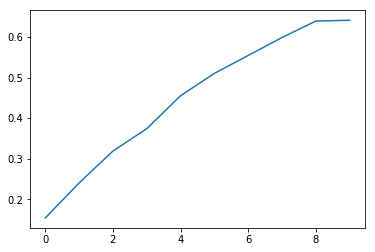

In [119]:
from matplotlib import pyplot as plt
from keras.callbacks import ModelCheckpoint  
model3H = get_model3H()
checkpointer = ModelCheckpoint(filepath='./test/'+'model3H.h5', verbose=0)
history=model3H.fit(X_train, y_train_hot, batch_size=10, epochs=10, validation_data=(X_test, y_test_hot),callbacks=[checkpointer])
plt.plot(history.history['val_categorical_accuracy'])

In [48]:
print(predict('./data/cat/4fd4d073_nohash_0.wav', model=model3H))

ValueError: cannot reshape array of size 1280 into shape (1,40,35,1)

In [91]:
print(predict('./test/no/no.wav', model=modelH))

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Stage\\final project\\test\\no\\no.wav'

In [49]:
print(predict('./data/right/0ac15fe9_nohash_0.wav', model=model3H))

ValueError: cannot reshape array of size 1280 into shape (1,40,35,1)

In [90]:
print(predict('./test/go/go.wav', model=modelH))

30
nine


In [32]:
clip_duration_ms=1000
window_size_ms=30
window_stride_ms=10.0
dct_coefficient_count=40
model_settings = models.prepare_model_settings(
      30,
      sr, clip_duration_ms, window_size_ms,
      window_stride_ms,dct_coefficient_count)

NameError: name 'models' is not defined